In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 8]
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
import scipy.stats
import statsmodels.api as sma
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import statsmodels.stats.multicomp as mc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.metrics as metrics
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy.stats import yeojohnson

# to display the float values upto 6 decimal places


pd.options.display.float_format = '{:.6f}'.format

In [2]:
df=pd.read_csv("diabetic_data.csv")
df

encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                      1  ...          No      No                   No   
1                      3  ...          No      Up                   No   
2                      2  ...          No      No                   No   
3                      2  ...          No      Up                   No   
4                      1  ...          No  Steady                   No   
...                  ...  ...         ...     ...                  ...   
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
0                        No                        No   
1                        No                        No   
2                        No                        No   
3                        No                        No   
4                        No                        No   
...                     ...                       ...   
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
0                            No                      No      No          No   
1                            No                      No      Ch         Yes   
2                            No                      No      No         Yes   
3                            No                      No      Ch         Yes   
4                            No                      No      Ch         Yes   
...                         ...                     ...     ...         ...   
101761                       No

In [3]:
print("Shape of the dataset :",df.shape)
print("No of observations in the dataset :",df.size)


Shape of the dataset : (101766, 50)
No of observations in the dataset : 5088300


THE DATASET HAS 101766 ROWS AND 50 COLUMNS

In [4]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
print("THE NUMBER OF NUMERICAL COLUMNS ARE :",df.select_dtypes(include=np.number).shape[1])
print("THE NUMBER OF CATEGORICAL COLUMNS ARE :",df.select_dtypes(include="object").shape[1])

THE NUMBER OF NUMERICAL COLUMNS ARE : 13
THE NUMBER OF CATEGORICAL COLUMNS ARE : 37


In [6]:
print("DIFFERENT TYPE OF DATA-TYPES : \n",df.dtypes.value_counts())

DIFFERENT TYPE OF DATA-TYPES : 
 object    37
int64     13
Name: count, dtype: int64


In [7]:
df.describe(include="object")

race  gender      age  weight payer_code medical_specialty  \
count      101766  101766   101766  101766     101766            101766   
unique          6       3       10      10         18                73   
top     Caucasian  Female  [70-80)       ?          ?                 ?   
freq        76099   54708    26068   98569      40256             49949   

        diag_1  diag_2  diag_3 max_glu_serum  ... citoglipton insulin  \
count   101766  101766  101766          5346  ...      101766  101766   
unique     717     749     790             3  ...           1       4   
top        428     276     250          Norm  ...          No      No   
freq      6862    6752   11555          2597  ...      101766   47383   

       glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
count               101766              101766                   101766   
unique                   4                   2                        2   
top                     No                  No                       No   
freq                101060              101753                   101765   

       metformin-rosiglitazone metformin-pioglitazone  change diabetesMed  \
count                   101766                 101766  101766      101766   
unique                       2                      2       2           2   
top                         No                     No      No         Yes   
freq                    101764                 101765   54755       78363   

       readmitted  
count      101766  
unique          3  
top            NO  
freq        54864  

[4 rows x 37 columns]

In [8]:
df.describe(include=np.number)


encounter_id      patient_nbr  admission_type_id  \
count    101766.000000    101766.000000      101766.000000   
mean  165201645.622978  54330400.694947           2.024006   
std   102640295.983458  38696359.346534           1.445403   
min       12522.000000       135.000000           1.000000   
25%    84961194.000000  23413221.000000           1.000000   
50%   152388987.000000  45505143.000000           1.000000   
75%   230270887.500000  87545949.750000           3.000000   
max   443867222.000000 189502619.000000           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

PERCENTAGE OF MISSING VALUES

In [10]:
missing_values=pd.DataFrame({"Missing_sum_of_values":df.isna().sum(),"Missing_%_of_vaues":(df.isna().sum()/len(df))*100})
missing_values

Missing_sum_of_values  Missing_%_of_vaues
encounter_id                                  0            0.000000
patient_nbr                                   0            0.000000
race                                          0            0.000000
gender                                        0            0.000000
age                                           0            0.000000
weight                                        0            0.000000
admission_type_id                             0            0.000000
discharge_disposition_id                      0            0.000000
admission_source_id                           0            0.000000
time_in_hospital                              0            0.000000
payer_code                                    0            0.000000
medical_specialty                             0            0.000000
num_lab_procedures                            0            0.000000
num_procedures                                0            0.000000
num_medications                               0            0.000000
number_outpatient                             0            0.000000
number_emergency                              0            0.000000
number_inpatient                              0            0.000000
diag_1                                        0            0.000000
diag_2                                        0            0.000000
diag_3                                        0            0.000000
number_diagnoses                              0            0.000000
max_glu_serum                             96420           94.746772
A1Cresult                                 84748           83.277322
metformin                                     0            0.000000
repaglinide                                   0            0.000000
nateglinide                                   0            0.000000
chlorpropamide                                0            0.000000
glimepiride                                   0            0.000000
acetohexamide                                 0            0.000000
glipizide                                     0            0.000000
glyburide                                     0            0.000000
tolbutamide                                   0            0.000000
pioglitazone                                  0            0.000000
rosiglitazone                                 0            0.000000
acarbose                                      0            0.000000
miglitol                                      0            0.000000
troglitazone                                  0            0.000000
tolazamide                                    0            0.000000
examide                                       0            0.000000
citoglipton                                   0            0.000000
insulin                                       0            0.000000
glyburide-metformin                           0            0.000000
glipizide-metformin                           0            0.000000
glimepiride-pioglitazone                      0            0.000000
metformin-rosiglitazone                       0            0.000000
metformin-pioglitazone                        0            0.000000
change                                        0            0.000000
diabetesMed                                   0            0.000000
readmitted                                    0            0.000000

ONLY 2 COLUMNS CONSISTS OF MISSING VALUES :max_glu_serum and A1CResult

HOW IS THE TARGET VARIABLE DISTRIBUTED

In [11]:
target_value_distribution=pd.DataFrame({"Value_count":df.readmitted.value_counts(),"%_of_distribution":df.readmitted.value_counts(normalize=True)})
target_value_distribution     # not normally distributed

Value_count  %_of_distribution
readmitted                                
NO                54864           0.539119
>30               35545           0.349282
<30               11357           0.111599

The feature of 'readmitted' likely represents whether a patient was readmitted to the hospital within a certain time frame after a previous encounter.

    NO: This category indicates that the patient was not readmitted to the hospital within the specified time frame. There          are 54,864 instances where patients were not readmitted, representing approximately 53.91% of the total.

    >30: This category indicates that the patient was readmitted to the hospital after more than 30 days from the previous           encounter. There are 35,545 instances where patients were readmitted after more than 30 days, accounting for               approximately 34.93% of the total.

    <30: This category indicates that the patient was readmitted to the hospital within 30 days from the previous                    encounter. There are 11,357 instances where patients were readmitted within 30 days, comprising approximately              11.16% of the total.

In [12]:
df1=df.copy()
df1.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

# DATA PRE-PROCESSING

In [13]:
df.patient_nbr.nunique()

71518

encounter_id: A unique identifier for each encounter or interaction between a patient and the healthcare system.

patient_nbr: A unique identifier for each patient within the healthcare system. Multiple encounters may be associated with the same patient number.

 We have observed that Columns "ENCOUNTER_ID", does not help effectively with further analysis and
 Columns "MAXIMUM-GLU-SERUM", "A1CRESULT" Contains more than 50% of missing values,
 
 Hence we have decided to drop these columns before proceeding for further analysis

COLUMNS AFTER DROPPING THE UNNECESSARY COLUMNS=47

DATA CLEANING

In [14]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

CHECK FOR DUPLICATE RECORDS:

In [15]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
101761    False
101762    False
101763    False
101764    False
101765    False
Length: 101766, dtype: bool

In [16]:
df.duplicated().sum()

0

There are no Duplicate Records

We are also dropping Patient number column, as it does not help with further analaysis

In [17]:
df.drop(["encounter_id","max_glu_serum", "A1Cresult","patient_nbr"],axis=1,inplace=True)


max_glu_serum: The result of the patient's maximum blood glucose serum test taken during the encounter.

A1Cresult: The result of the patient's A1C test taken during the encounter.

In [18]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [19]:
df.shape[1]

46

RACE COLUMN

In [20]:
df.race.value_counts(normalize=True)

race
Caucasian         0.747784
AfricanAmerican   0.188766
?                 0.022336
Hispanic          0.020017
Other             0.014799
Asian             0.006299
Name: proportion, dtype: float64

In [21]:
# replacing ? data in the race feature with unknown

df["race"]=df.race.str.replace("?","Unknown")
df.race.value_counts()

race
Caucasian          76099
AfricanAmerican    19210
Unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

GENDER COLUMN

In [22]:
df.gender.value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

Female: This category indicates individuals who identify as female, with a count of 54,708 individuals.

Male: This category represents individuals who identify as male, with a count of 47,055 individuals.

Unknown/Invalid: This category likely includes individuals for whom the gender information is either missing, unknown, or invalid. It comprises only 3 individuals.

In [23]:
df.gender.mode()[0]    # mode

'Female'

In [24]:
df[(df.gender=="Unknown/Invalid")]

race           gender      age weight  admission_type_id  \
30506    Other  Unknown/Invalid  [70-80)      ?                  3   
75551  Unknown  Unknown/Invalid  [60-70)      ?                  1   
82573  Unknown  Unknown/Invalid  [70-80)      ?                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
30506                         1                    1                 1   
75551                         1                    7                 1   
82573                        22                    7                 8   

      payer_code medical_specialty  ...  citoglipton  insulin  \
30506          ?        Cardiology  ...           No       No   
75551         CP                 ?  ...           No       No   
82573         CP                 ?  ...           No       No   

       glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
30506                   No                   No                        No   
75551                   No                   No                        No   
82573                   No                   No                        No   

       metformin-rosiglitazone metformin-pioglitazone change diabetesMed  \
30506                       No                     No     Ch         Yes   
75551                       No                     No     No          No   
82573                       No                     No     Ch         Yes   

       readmitted  
30506          NO  
75551          NO  
82573          NO  

[3 rows x 46 columns]

In [25]:
# since there are only 3 genders, which are unknown, either we can deeter those 3 rows  or 
# we can impute those 3 data with mode of gender feature(which is female)

df['gender'] = df.gender.str.replace('Unknown/Invalid',df.gender.mode()[0])

df.gender.value_counts()

gender
Female    54711
Male      47055
Name: count, dtype: int64

WEIGHT COLUMN

In [26]:
print(df.weight.info())
df.weight.value_counts()   

<class 'pandas.core.series.Series'>
RangeIndex: 101766 entries, 0 to 101765
Series name: weight
Non-Null Count   Dtype 
--------------   ----- 
101766 non-null  object
dtypes: object(1)
memory usage: 795.2+ KB
None


weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

?: This category indicates missing or unknown weight information for a significant portion of the population, with a count of 98,569 individuals.

[75-100): This range represents individuals whose weight falls between 75 and 100 units (the exact unit is not specified), with 1,336 individuals falling into this category.

[50-75): This range includes individuals whose weight falls between 50 and 75 units, with 897 individuals falling into this category.

[100-125): Individuals falling in this range have weights between 100 and 125 units, with 625 individuals in this category.

[125-150): This range covers individuals with weights between 125 and 150 units, including 145 individuals.

[25-50): Individuals whose weight falls between 25 and 50 units are represented in this category, with a count of 97 individuals.

[0-25): This range represents individuals with weights between 0 and 25 units, including 48 individuals.

[150-175): Individuals in this category have weights between 150 and 175 units, with 35 individuals falling into this range.

[175-200): This range includes individuals with weights between 175 and 200 units, comprising 11 individuals.

200: This category represents individuals whose weight exceeds 200 units, with only 3 individuals in this group.

In [27]:
df["weight"]=df.weight.str.replace("?","Unknown")
df["weight"]=df.weight.str.replace("[","",).str.replace(")","")


# REPLACING THE WEIGH COLUMN WITH AVG WEIGHT

mean_weight_range = {'0-25': 12.5,'25-50': 37.5,'50-75':62.5 ,'75-100': 87.5,'100-125': 112.5,'125-150':137.5,
                     '150-175': 162.5, '175-200': 187.5,'>200':200}

df["age"]=df.weight.replace(mean_weight_range)





In [28]:
df.weight.value_counts()

weight
Unknown    98569
75-100      1336
50-75        897
100-125      625
125-150      145
25-50         97
0-25          48
150-175       35
175-200       11
>200           3
Name: count, dtype: int64

ADMISSION TYPE ID

In [29]:
df.admission_type_id.value_counts()       # no missing values

admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

admission_type_id: A numerical identifier indicating the type of admission, such as emergency, urgent, elective, etc.

Admission_type_id description

1.Emergency

2.Urgent

3.Elective

4.Newborn

5.Not Available

6.NULL

7.Trauma Center

8.Not Mapped


DISCHARGE DISPOSITION ID

In [30]:
df.discharge_disposition_id.value_counts()          # no missing values

discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

discharge_disposition_id: A numerical identifier indicating the disposition of the patient after discharge from the hospital, such as discharged to home, transferred to another facility, expired, etc.

discharge_disposition_id description

1	Discharged to home

2	Discharged/transferred to another short term hospital

3	Discharged/transferred to SNF

4	Discharged/transferred to ICF

5	Discharged/transferred to another type of inpatient care institution

6	Discharged/transferred to home with home health service

7	Left AMA

8	Discharged/transferred to home under care of Home IV provider

9	Admitted as an inpatient to this hospital

10	Neonate discharged to another hospital for neonatal aftercare

11	Expired

12	Still patient or expected to return for outpatient services

13	Hospice / home

14	Hospice / medical facility

15	Discharged/transferred within this institution to Medicare approved swing bed

16	Discharged/transferred/referred another institution for outpatient services

17	Discharged/transferred/referred to this institution for outpatient services

18	NULL

19	Expired at home. Medicaid only, hospice.

20	Expired in a medical facility. Medicaid only, hospice.

21	Expired, place unknown. Medicaid only, hospice.

22	Discharged/transferred to another rehab fac including rehab units of a hospital .

23	Discharged/transferred to a long term care hospital.

24	Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.

25	Not Mapped

26	Unknown/Invalid

30	Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

27	Discharged/transferred to a federal health care facility.

28	Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital

29	Discharged/transferred to a Critical Access Hospital (CAH).


ADMISSION SOURCE ID

In [31]:
df.admission_source_id.value_counts()             # no missing values

admission_source_id
7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: count, dtype: int64

admission_source_id: A numerical identifier indicating the source of admission, such as emergency room, physician referral, transfer from another hospital, etc.

admission_source_id description

1	 Physician Referral

2	Clinic Referral

3	HMO Referral

4	Transfer from a hospital

5	 Transfer from a Skilled Nursing Facility (SNF)

6	 Transfer from another health care facility

7	 Emergency Room

8	 Court/Law Enforcement

9	 Not Available

10	 Transfer from critial access hospital

11	Normal Delivery

12	 Premature Delivery

13	 Sick Baby

14	 Extramural Birth

15	Not Available

17	NULL

18	 Transfer From Another Home Health Agency

19	Readmission to Same Home Health Agency

20	 Not Mapped

21	Unknown/Invalid

22	 Transfer from hospital inpt/same fac reslt in a sep claim

23	 Born inside this hospital

24	 Born outside this hospital

25	 Transfer from Ambulatory Surgery Center

26	Transfer from Hospice


TIME IN HOSPITAL

In [32]:
df.time_in_hospital.value_counts()              # no missing values

time_in_hospital
3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64

time_in_hospital: The number of days the patient spent in the hospital during the encounter.

PAYER CODE

In [33]:
df.payer_code.value_counts()           # replacing ? with unknown




payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64

payer_code: A code indicating the type of payer for the patient's healthcare expenses, such as Medicare, Medicaid, private insurance, etc.

identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay

?: This category indicates missing or unknown payer information for a significant portion of the encounters, with 40,256 instances.

MC: This category represents patients whose healthcare expenses are covered by Medicare, with 32,439 instances.

HM: This category likely represents patients whose healthcare expenses are covered by a health maintenance organization (HMO), with 6,274 instances.

SP: This category may indicate patients whose healthcare expenses are covered by a specific private insurance plan, with 5,007 instances.

BC: This category likely represents patients whose healthcare expenses are covered by a specific type of private insurance, with 4,655 instances.

MD: This category may indicate patients whose healthcare expenses are covered by Medicaid, with 3,532 instances.

CP: This category represents patients whose healthcare expenses are covered by a specific commercial payer, with 2,533 instances.

UN: This category represents patients whose healthcare expenses are covered by an unknown payer, with 2,448 instances.

CM: This category likely represents patients whose healthcare expenses are covered by a specific commercial payer, with 1,937 instances.

OG: This category may indicate patients whose healthcare expenses are covered by other government programs, with 1,033 instances.

PO: This category represents patients whose healthcare expenses are covered by a specific insurance plan, with 592 instances.

DM: This category may indicate patients whose healthcare expenses are covered by a specific insurance plan, with 549 instances.

CH: This category represents patients whose healthcare expenses are covered by a specific insurance plan, with 146 instances.

WC: This category likely represents patients whose healthcare expenses are covered by workers' compensation, with 135 instances.

OT: This category represents patients whose healthcare expenses are covered by a specific insurance plan, with 95 instances.

MP: This category likely represents patients whose healthcare expenses are covered by a specific insurance plan, with 79 instances.

SI: This category represents patients whose healthcare expenses are covered by a specific insurance plan, with 55 instances.

FR: This category may indicate patients whose healthcare expenses are covered by a specific insurance plan, with only 1 instance.

In [34]:
df["payer_code"]=df.payer_code.str.replace("?","Unknown")
df.payer_code.value_counts()

payer_code
Unknown    40256
MC         32439
HM          6274
SP          5007
BC          4655
MD          3532
CP          2533
UN          2448
CM          1937
OG          1033
PO           592
DM           549
CH           146
WC           135
OT            95
MP            79
SI            55
FR             1
Name: count, dtype: int64

NUMBER OF DIAGNOSIS ENTERED INTO THE SYSTEM

In [35]:
df.number_diagnoses.value_counts()            # no missing values

number_diagnoses
9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: count, dtype: int64

number_diagnoses: The number of diagnoses entered to describe the patient during the encounter.

RACE COLUMN

In [36]:
df.race.value_counts()

race
Caucasian          76099
AfricanAmerican    19210
Unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

The racial background of the patient, categorized into different groups such as Caucasian, African American, Hispanic, etc.

Caucasian (White): The largest racial group in the population, comprising approximately 74.78% of the total.

African American: The second largest racial group, making up around 18.88% of the population.

? (Unknown): This category represents a portion of the population for which the race information is missing or unknown. It constitutes about 2.23% of the total.

Hispanic: This group represents approximately 2.00% of the population.

Other: This category likely encompasses other racial  groups not explicitly mentioned in the provided categories, contributing about 1.48% to the total.

Asian: The smallest racial group in the dataset, comprising around 0.63% of the population.

In [37]:
df.race.mode()[0]

'Caucasian'

In [38]:
# replacing ? with UNKNOWN

df["race"]=df.race.str.replace("?","Caucasian")

In [39]:
df.race.value_counts()

race
Caucasian          76099
AfricanAmerican    19210
Unknown             2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

AGE COLUMN

In [40]:
df.age.value_counts()

age
 Unknown      98569
87.500000      1336
62.500000       897
112.500000      625
137.500000      145
37.500000        97
12.500000        48
162.500000       35
187.500000       11
 200              3
Name: count, dtype: int64

In [41]:
# since the age of the patients is in a range, imputing with mean of the range will comprehend in achieving precise analysis

mean_age_range = {'[0-10)': 5,'[10-20)': 15,'[20-30)': 25,'[30-40)': 35,'[40-50)': 45,'[50-60)': 55,'[60-70)': 65, 
              '[70-80)': 75,'[80-90)': 85,'[90-100)': 95}

df["age"]=df.age.replace(mean_age_range)


df.age.value_counts()

age
 Unknown      98569
87.500000      1336
62.500000       897
112.500000      625
137.500000      145
37.500000        97
12.500000        48
162.500000       35
187.500000       11
 200              3
Name: count, dtype: int64

MEDICAL SPECIALTY- DOCTORS SPECIALIZATION

In [42]:
df.medical_specialty.value_counts()

medical_specialty
?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: count, Length: 73, dtype: int64

medical_specialty: The specialty or field of medicine of the healthcare provider responsible for the patient's care during the encounter.

identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

In [43]:
df["medical_specialty"]=df.medical_specialty.str.replace("?","Unknown")

In [44]:
df.medical_specialty.value_counts()

medical_specialty
Unknown                          49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: count, Length: 73, dtype: int64

NUMBER OF LAB PROCEDURES COLUMN- Number of lab tests performed during the encounter

In [45]:
df.num_lab_procedures.value_counts()      

num_lab_procedures
1      3208
43     2804
44     2496
45     2376
38     2213
       ... 
120       1
132       1
121       1
126       1
118       1
Name: count, Length: 118, dtype: int64

num_lab_procedures: The number of laboratory procedures performed on the patient during the encounter.

In [46]:
df.num_lab_procedures.unique()

array([ 41,  59,  11,  44,  51,  31,  70,  73,  68,  33,  47,  62,  60,
        55,  49,  75,  45,  29,  35,  42,  66,  36,  19,  64,  25,  53,
        52,  87,  27,  37,  46,  28,  48,  72,  10,   2,  65,  67,  40,
        54,  58,  57,  43,  32,  83,  34,  39,  69,  38,  56,  22,  96,
        78,  61,  88,  50,   1,  18,  82,   9,  63,  24,  71,  77,  81,
        76,  90,  93,   3, 103,  13,  80,  85,  16,  15,  12,  30,  23,
        17,  21,  79,  26,   5,  95,  97,  84,  14,  74, 105,  86,  98,
        20,   6,  94,   8, 102, 100,   7,  89,  91,  92,   4, 101,  99,
       114, 113, 111, 129, 107, 108, 106, 104, 109, 120, 132, 121, 126,
       118], dtype=int64)

In [47]:
df[df.num_lab_procedures=="?"].shape[0]    # no missing values

0

NUMBER OF PROCEDURES COLUMN- Number of procedures (other than lab tests) performed during the encounter

In [48]:
df[df.num_procedures=="?"].shape[0]         # no missing values

0

num_procedures: The number of non-laboratory procedures performed on the patient during the encounter.

In [49]:
df.num_procedures.value_counts()

num_procedures
0    46652
1    20742
2    12717
3     9443
6     4954
4     4180
5     3078
Name: count, dtype: int64

NUMBER OF MEDICATIONS COLUMN- Number of distinct generic names administered during the encounter

In [50]:
df[df.num_medications=="?"].shape[0]       # no missing values

0

In [51]:
df.num_medications.unique()

array([ 1, 18, 13, 16,  8, 21, 12, 28, 17, 11, 15, 31,  2, 23, 19,  7, 20,
       14, 10, 22,  9, 27, 25,  4, 32,  6, 30, 26, 24, 33,  5, 39,  3, 29,
       61, 40, 46, 41, 36, 34, 35, 50, 43, 42, 37, 51, 38, 45, 54, 52, 49,
       62, 55, 47, 44, 53, 48, 57, 59, 56, 60, 63, 58, 70, 67, 64, 69, 65,
       68, 66, 81, 79, 75, 72, 74], dtype=int64)

In [52]:
df.num_medications.value_counts()

num_medications
13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
70       2
75       2
81       1
79       1
74       1
Name: count, Length: 75, dtype: int64

NUMBER OF OUTPATIENT COLUMN- Number of outpatient visits of the patient in the year preceding the encounter

In [53]:
df[df.number_outpatient=="?"].shape[0]      # no missing values

0

In [54]:
df.number_outpatient.value_counts()

number_outpatient
0     85027
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
18        5
22        5
19        3
27        3
24        3
26        2
23        2
25        2
33        2
35        2
36        2
29        2
34        1
39        1
42        1
28        1
37        1
38        1
40        1
Name: count, dtype: int64

NUMBER OF INPATIENT COLUMN- Number of inpatient visits of the patient in the year preceding the encounter

In [55]:
df[df.number_inpatient=="?"].shape[0]      # no missing values

0

In [56]:
df.number_inpatient.value_counts()

number_inpatient
0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
21        1
18        1
Name: count, dtype: int64

NUMBER OF EMERGENCY COLUMN- Number of emergency visits of the patient in the year preceding the encounter

In [57]:
df[df.number_emergency=="?"].shape[0]      # no missing values

0

In [58]:
df.number_emergency.value_counts()

number_emergency
0     90383
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
16        5
18        5
19        4
20        4
15        3
14        3
25        2
21        2
28        1
42        1
46        1
76        1
37        1
64        1
63        1
54        1
24        1
29        1
Name: count, dtype: int64

ALL THE DIAGNOSIS COLUMNS

In [59]:
print(df.diag_1.nunique())
df.diag_1.value_counts()


717


diag_1
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
373       1
314       1
684       1
217       1
V51       1
Name: count, Length: 717, dtype: int64

In [60]:
print(df.diag_2.nunique())
df.diag_2.value_counts()

749


diag_2
276     6752
428     6662
250     6071
427     5036
401     3736
        ... 
E918       1
46         1
V13        1
E850       1
927        1
Name: count, Length: 749, dtype: int64

In [61]:
print(df.diag_3.nunique())
df.diag_3.value_counts()

790


diag_3
250     11555
401      8289
276      5175
428      4577
427      3955
        ...  
657         1
684         1
603         1
E826        1
971         1
Name: count, Length: 790, dtype: int64

In [62]:
print(df.diag_1.mode())
df.diag_1.unique()

0    428
Name: diag_1, dtype: object


array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '250.32', '433', 'V58', '569',
       '185', '536', '255', '250.13', '599', '558', '574', '491', '560',
       '244', '250.03', '577', '730', '188', '824', '250.8', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '250.02', '493',
       '642', '625', '571', '738', '593', '250.42', '807', '456', '446',
       '575', '250.41', '820', '515', '780', '250.22', '995', '235',
       '250.82', '721', '787', '162', '724', '282', '514', 'V55', '281',
       '250.33', '530', '466', '435', '250.12', 'V53', '789', '

diag_1: The primary diagnosis code for the patient during the encounter.This primary diagnosis (coded as first three digits of ICD9); 848 distinct values

In [63]:
print(df.diag_2.mode())
df.diag_2.unique()

0    276
Name: diag_2, dtype: object


array(['?', '250.01', '250', '250.43', '157', '411', '492', '427', '198',
       '403', '288', '998', '507', '174', '425', '456', '401', '715',
       '496', '428', '585', '250.02', '410', '999', '996', '135', '244',
       '41', '571', '276', '997', '599', '424', '491', '553', '707',
       '286', '440', '493', '242', '70', 'V45', '250.03', '357', '511',
       '196', '396', '197', '414', '250.52', '577', '535', '413', '285',
       '53', '780', '518', '150', '566', '250.6', '867', '486', 'V15',
       '8', '788', '340', '574', '581', '228', '530', '250.82', '786',
       '294', '567', '785', '512', '305', '729', '250.51', '280', '648',
       '560', '618', '444', '38', 'V10', '578', '277', '781', '250.42',
       '278', '426', '584', '462', '402', '153', '272', '733', '34',
       '881', '203', '250.41', '250.13', '293', '245', '250.12', '558',
       '787', '342', '573', '626', '303', '250.53', '458', '710', '415',
       'V42', '284', '569', '759', '682', '112', '292', '435', '290'

diag_2: The secondary diagnosis code for the patient during the encounter.Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

In [64]:
print(df.diag_3.mode())
df.diag_3.unique()

0    250
Name: diag_3, dtype: object


array(['?', '255', 'V27', '403', '250', 'V45', '38', '486', '996', '197',
       '250.6', '427', '627', '414', '416', '714', '428', '582', 'V43',
       '250.01', '263', '250.42', '276', '482', '401', '250.41', '585',
       '781', '278', '998', '568', '682', '618', '250.02', '305', '707',
       '496', '599', '715', '424', '518', '553', '794', '411', 'V42',
       '531', '511', '490', '562', '250.8', '250.7', '250.52', '784',
       '491', '581', '420', '8', '724', '730', '789', '131', '250.82',
       '999', '41', '493', '250.03', '753', '786', '529', 'E888', '425',
       '595', '303', '560', '711', '492', '332', '296', '438', '362',
       '250.4', '654', '244', 'V70', '737', '625', '681', '250.51', '404',
       'V10', '810', '280', '440', '785', '588', '569', '272', '997',
       '250.43', '918', '584', '54', '788', '426', '722', '250.92', '196',
       '461', '535', '787', '891', '284', '458', '648', '780', '182',
       '285', '593', '413', '664', '564', '201', '356', 'V15', '2

diag_3: Additional secondary diagnosis code(s) for the patient during the encounter.Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

These diagnosis columns indicates the diseases coded according to International classification of diseases.
By replacing the alphabetic characters with '0',we can treat all the codes consistently as numerical values, 
which can be more suitable for certain types of analysis or machine learning models.

In [65]:
df["diag_1"]=df.diag_1.str.replace("V","0",regex=True).str.replace("E","0",regex=True)
df["diag_2"]=df.diag_2.str.replace("V","0",regex=True).str.replace("E","0",regex=True)
df["diag_3"]=df.diag_3.str.replace("V","0",regex=True).str.replace("E","0",regex=True)

a=(df[df.diag_1=="?"].shape[0]/df.shape[0])*100
b=(df[df.diag_2=="?"].shape[0]/df.shape[0])*100
c=(df[df.diag_3=="?"].shape[0]/df.shape[0])*100
print("percent of missing values is diag1 column :", round(a,2),"%")
print("percent of missing values is diag2 column :", round(b,2),"%")
print("percent of missing values is diag3 column :", round(c,2),"%")

percent of missing values is diag1 column : 0.02 %
percent of missing values is diag2 column : 0.35 %
percent of missing values is diag3 column : 1.4 %


Since the propotion of missing values is relatively small , replacing the missing values with mode, will be a ideal replacement

In [66]:
print("Mode of diag1 column :",df.diag_1.mode()[0])
print("Mode of diag2 column :",df.diag_2.mode()[0])
print("Mode of diag3 column :",df.diag_3.mode()[0])

df["diag_1"]=df.diag_1.str.replace("?",df.diag_1.mode()[0])
df["diag_2"]=df.diag_2.str.replace("?",df.diag_2.mode()[0])
df["diag_3"]=df.diag_3.str.replace("?",df.diag_3.mode()[0])

Mode of diag1 column : 428
Mode of diag2 column : 276
Mode of diag3 column : 250


In [67]:
# check if all the 3 columns contains "?","V","E"

col= df[["diag_1","diag_2","diag_3"]]
results = {}

for i in col:
    # Check if the column contains '?'
    contains_question_mark = df[i].str.contains('\?').any()
    
    # Check if the column contains 'V'
    contains_V = df[i].str.contains('V').any()
    
    # Check if the column contains 'E'
    contains_E = df[i].str.contains('E').any()
    
    # Store results in dictionary
    results[i] = {
        "Contains '?'": contains_question_mark,
        "Contains 'V'": contains_V,
        "Contains 'E'": contains_E
    }

for i, result in results.items():
    print(f"Column '{i}':")
    for key, value in result.items():
        print(f"    {key}: {value}")


Column 'diag_1':
    Contains '?': False
    Contains 'V': False
    Contains 'E': False
Column 'diag_2':
    Contains '?': False
    Contains 'V': False
    Contains 'E': False
Column 'diag_3':
    Contains '?': False
    Contains 'V': False
    Contains 'E': False


NUMBER OF DIAGNOSIS COLUMN- Number of diagnoses entered to the system

In [68]:
df[df.number_diagnoses=="?"].shape[0]      # no missing values

0

In [69]:
df.number_diagnoses.value_counts()

number_diagnoses
9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: count, dtype: int64

ALL DRUG COLUMNS

In [70]:
drugs=df[['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']]

results = {}

for i in drugs:
    # Check if the column contains '?'
    contains_question_mark = df[i].str.contains('\?').any()
    results[i] = {"Contains '?'": contains_question_mark}
for i, result in results.items():
    print(f"Column '{i}':")
    for key, value in result.items():
        print(f"    {key}: {value}")

Column 'metformin':
    Contains '?': False
Column 'repaglinide':
    Contains '?': False
Column 'nateglinide':
    Contains '?': False
Column 'chlorpropamide':
    Contains '?': False
Column 'glimepiride':
    Contains '?': False
Column 'acetohexamide':
    Contains '?': False
Column 'glipizide':
    Contains '?': False
Column 'glyburide':
    Contains '?': False
Column 'tolbutamide':
    Contains '?': False
Column 'pioglitazone':
    Contains '?': False
Column 'rosiglitazone':
    Contains '?': False
Column 'acarbose':
    Contains '?': False
Column 'miglitol':
    Contains '?': False
Column 'troglitazone':
    Contains '?': False
Column 'tolazamide':
    Contains '?': False
Column 'examide':
    Contains '?': False
Column 'citoglipton':
    Contains '?': False
Column 'insulin':
    Contains '?': False
Column 'glyburide-metformin':
    Contains '?': False
Column 'glipizide-metformin':
    Contains '?': False
Column 'glimepiride-pioglitazone':
    Contains '?': False
Column 'metformin

In [71]:
for i in drugs:
    print(df[i].value_counts())            # no missing values

metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64
repaglinide
No        100227
Steady      1384
Up           110
Down          45
Name: count, dtype: int64
nateglinide
No        101063
Steady       668
Up            24
Down          11
Name: count, dtype: int64
chlorpropamide
No        101680
Steady        79
Up             6
Down           1
Name: count, dtype: int64
glimepiride
No        96575
Steady     4670
Up          327
Down        194
Name: count, dtype: int64
acetohexamide
No        101765
Steady         1
Name: count, dtype: int64
glipizide
No        89080
Steady    11356
Up          770
Down        560
Name: count, dtype: int64
glyburide
No        91116
Steady     9274
Up          812
Down        564
Name: count, dtype: int64
tolbutamide
No        101743
Steady        23
Name: count, dtype: int64
pioglitazone
No        94438
Steady     6976
Up          234
Down        118
Name: count, dtype: int64
rosiglitazone
No        9540

CHANGE COLUMN- Indicates if there was a change in diabetic medications (either dosage or generic name).

In [72]:
df.change.value_counts()         # no missing values

change
No    54755
Ch    47011
Name: count, dtype: int64

DIABETICS MDEICATION COLUMN-  Indicates if there was any diabetic medication prescribed. Values: yes and no

In [73]:
df.diabetesMed.value_counts()          # no missing values

diabetesMed
Yes    78363
No     23403
Name: count, dtype: int64

READMITTED COLUMN(TARGET VARIABLE)

In [74]:
df.readmitted.value_counts()         # no missing values

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

# CHANGING DATATYPES ACCORDING TO DATA DESCRIPTION

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    101766 non-null  object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                101766 non-null  object
 9   medical_specialty         101766 non-null  object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

Since majority of observations in Weight and Age column has 'Unknown' values, we consider it as categorical column for EDA

We have consideres diag1,diag2,diag3 column as numerical column for analysis, so it need to be changed to numerical
datatype

In [76]:
print(df.age.value_counts())
print(df.weight.value_counts())

age
 Unknown      98569
87.500000      1336
62.500000       897
112.500000      625
137.500000      145
37.500000        97
12.500000        48
162.500000       35
187.500000       11
 200              3
Name: count, dtype: int64
weight
Unknown    98569
75-100      1336
50-75        897
100-125      625
125-150      145
25-50         97
0-25          48
150-175       35
175-200       11
>200           3
Name: count, dtype: int64


In [77]:
df["diag_1"]=df.diag_1.astype("float")
df["diag_2"]=df.diag_2.astype("float")
df["diag_3"]=df.diag_3.astype("float")


print(df.diag_1.dtype)
print(df.diag_2.dtype)
print(df.diag_3.dtype)

float64
float64
float64


In [78]:
df.diag_1.dtype

dtype('float64')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      101766 non-null  object 
 1   gender                    101766 non-null  object 
 2   age                       101766 non-null  object 
 3   weight                    101766 non-null  object 
 4   admission_type_id         101766 non-null  int64  
 5   discharge_disposition_id  101766 non-null  int64  
 6   admission_source_id       101766 non-null  int64  
 7   time_in_hospital          101766 non-null  int64  
 8   payer_code                101766 non-null  object 
 9   medical_specialty         101766 non-null  object 
 10  num_lab_procedures        101766 non-null  int64  
 11  num_procedures            101766 non-null  int64  
 12  num_medications           101766 non-null  int64  
 13  number_outpatient         101766 non-null  i

In [80]:
print("Number of distinct datatypes after changing :\n", df.dtypes.value_counts())

Number of distinct datatypes after changing :
 object     32
int64      11
float64     3
Name: count, dtype: int64


# SEPERATING NUMERICAL AND CATEGORICAL COLUMNS

In [81]:
num=df.select_dtypes(include=np.number)
print("Numerical columns \n", num.columns,"\n")

cat=df.select_dtypes(include="object")
print("Categorical columns \n",cat.columns)

Numerical columns 
 Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses'],
      dtype='object') 

Categorical columns 
 Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


# EXPLORATORY DATA ANALYSIS

FEATURE ENGINEERING

We can observe that columns num_inpatient, num_outpatient, num_emergency tells us that whether a patient has utilized
the hospital resources effectively, which may help affect the readmission status. Hence we have tried to create a new column "full utilization" and check if it plays
a vital role in patient getting readmitted or not

In [82]:
df["full_utilization"]=df.number_inpatient+df.number_outpatient+df.number_emergency

df.full_utilization.value_counts().sort_values()

full_utilization
41        1
40        1
34        1
61        1
80        1
49        1
48        1
37        2
42        2
68        2
32        2
28        2
38        2
31        2
33        2
23        4
30        4
36        5
29        5
35        5
26        6
25        7
27        9
24        9
21       14
22       15
20       23
19       32
18       32
17       63
16       68
14       87
15       97
13       98
12      136
11      248
10      270
9       430
8       554
7       868
6      1313
5      2036
4      3570
3      5904
2     10062
1     19941
0     55828
Name: count, dtype: int64

In [83]:
df[df.full_utilization==0].shape

(55828, 47)

In [84]:
df[(df.full_utilization<=10)].shape

(100776, 47)

In [85]:
df[(df.full_utilization>=10) & (df.full_utilization>=25)].shape

(64, 47)

In [86]:
df[(df.full_utilization>35) &(df.full_utilization<=80)].shape

(19, 47)

1.The above information tells us that 55828 patients have not visited the hospital atleast once.

2.19941 patients have made atleast once visit(either emergency, or as inpatient or as outpatient)

3.Nearly 64 patients have made a visit between 10 to 25 times , which tells us that they are frequent visitors and may      need care if required.

4.19 patients have visited the hospital more than 35 times, which may put them in alert category and doctors have to provide more care and attention and keep track of those patients after discharge 

In [87]:
# creating 2 dataframes and copying the original dataframe
df_multi=df.copy()
df_bin=df.copy()
df_multi.head()

race  gender      age   weight  admission_type_id  \
0        Caucasian  Female  Unknown  Unknown                  6   
1        Caucasian  Female  Unknown  Unknown                  1   
2  AfricanAmerican  Female  Unknown  Unknown                  1   
3        Caucasian    Male  Unknown  Unknown                  1   
4        Caucasian    Male  Unknown  Unknown                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1    Unknown   
1                         1                    7                 3    Unknown   
2                         1                    7                 2    Unknown   
3                         1                    7                 2    Unknown   
4                         1                    7                 1    Unknown   

          medical_specialty  ...  insulin  glyburide-metformin  \
0  Pediatrics-Endocrinology  ...       No                   No   
1                   Unknown  ...       Up                   No   
2                   Unknown  ...       No                   No   
3                   Unknown  ...       Up                   No   
4                   Unknown  ...   Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change  diabetesMed  readmitted  full_utilization  
0                      No      No           No          NO                 0  
1                      No      Ch          Yes         >30                 0  
2                      No      No          Yes          NO                 3  
3                      No      Ch          Yes          NO                 0  
4                      No      Ch          Yes          NO                 0  

[5 rows x 47 columns]

In [88]:
df_bin.head()

race  gender      age   weight  admission_type_id  \
0        Caucasian  Female  Unknown  Unknown                  6   
1        Caucasian  Female  Unknown  Unknown                  1   
2  AfricanAmerican  Female  Unknown  Unknown                  1   
3        Caucasian    Male  Unknown  Unknown                  1   
4        Caucasian    Male  Unknown  Unknown                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1    Unknown   
1                         1                    7                 3    Unknown   
2                         1                    7                 2    Unknown   
3                         1                    7                 2    Unknown   
4                         1                    7                 1    Unknown   

          medical_specialty  ...  insulin  glyburide-metformin  \
0  Pediatrics-Endocrinology  ...       No                   No   
1                   Unknown  ...       Up                   No   
2                   Unknown  ...       No                   No   
3                   Unknown  ...       Up                   No   
4                   Unknown  ...   Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change  diabetesMed  readmitted  full_utilization  
0                      No      No           No          NO                 0  
1                      No      Ch          Yes         >30                 0  
2                      No      No          Yes          NO                 3  
3                      No      Ch          Yes          NO                 0  
4                      No      Ch          Yes          NO                 0  

[5 rows x 47 columns]

# UNIVARIANT ANALYSIS

In [89]:
df_multi.number_outpatient.unique()

array([ 0,  2,  1,  5,  7,  9,  3,  8,  4, 12, 11,  6, 20, 15, 10, 13, 14,
       16, 21, 35, 17, 29, 36, 18, 19, 27, 22, 24, 42, 39, 34, 26, 33, 25,
       23, 28, 37, 38, 40], dtype=int64)

In [90]:
df_multi.number_inpatient.unique()

array([ 0,  1,  2,  3,  6,  5,  4,  7,  8,  9, 15, 10, 11, 14, 12, 13, 17,
       16, 21, 18, 19], dtype=int64)

In [91]:
df_multi.full_utilization.info()

<class 'pandas.core.series.Series'>
RangeIndex: 101766 entries, 0 to 101765
Series name: full_utilization
Non-Null Count   Dtype
--------------   -----
101766 non-null  int64
dtypes: int64(1)
memory usage: 795.2 KB


In [92]:
# ANALYSIS OF TARGET VARIABLE

target_pie=df_multi.readmitted.value_counts().to_frame().reset_index().rename(columns={"count":"Count"})
target_pie

readmitted  Count
0         NO  54864
1        >30  35545
2        <30  11357

In [93]:
df_multi.readmitted.value_counts(normalize=True)

readmitted
NO    0.539119
>30   0.349282
<30   0.111599
Name: proportion, dtype: float64

In [94]:
0.20*539119

107823.8

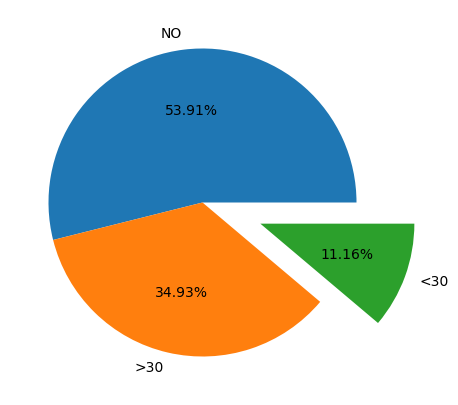

In [95]:
plt.figure(figsize=(7,5))
plt.pie(x=target_pie["Count"],labels=target_pie["readmitted"],autopct="%1.2f%%",explode=[0,0,0.4])
plt.show()

<Axes: xlabel='readmitted', ylabel='Count'>

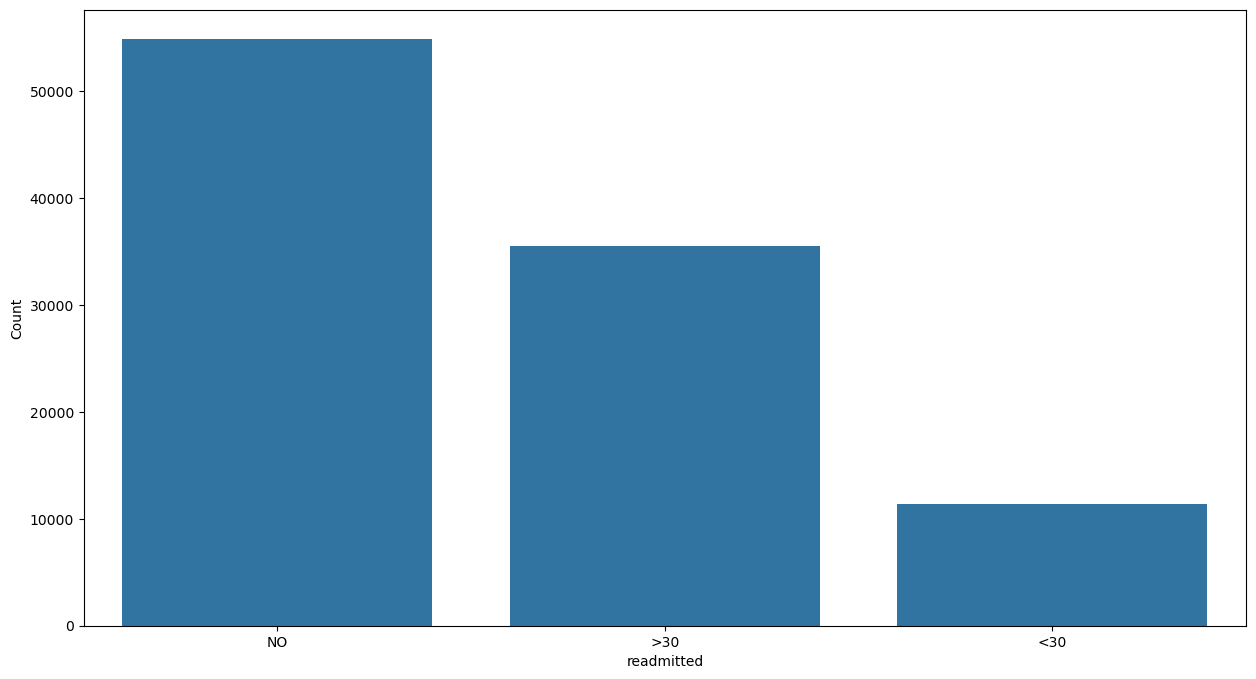

In [96]:
# count plot

sns.barplot(x=target_pie.readmitted,y=target_pie.Count)

FROM THE ABOBE GRAPH WE CAN INFER THAT NEARLY:

1.54864 patients have not been readmitted after getting discharge

2.35545 patients have been readmitted after 30 days of discharge

3.Only 11357 patients have been readmitted before 30 days of discharge - which puts them in alert category

1.5919843274988845


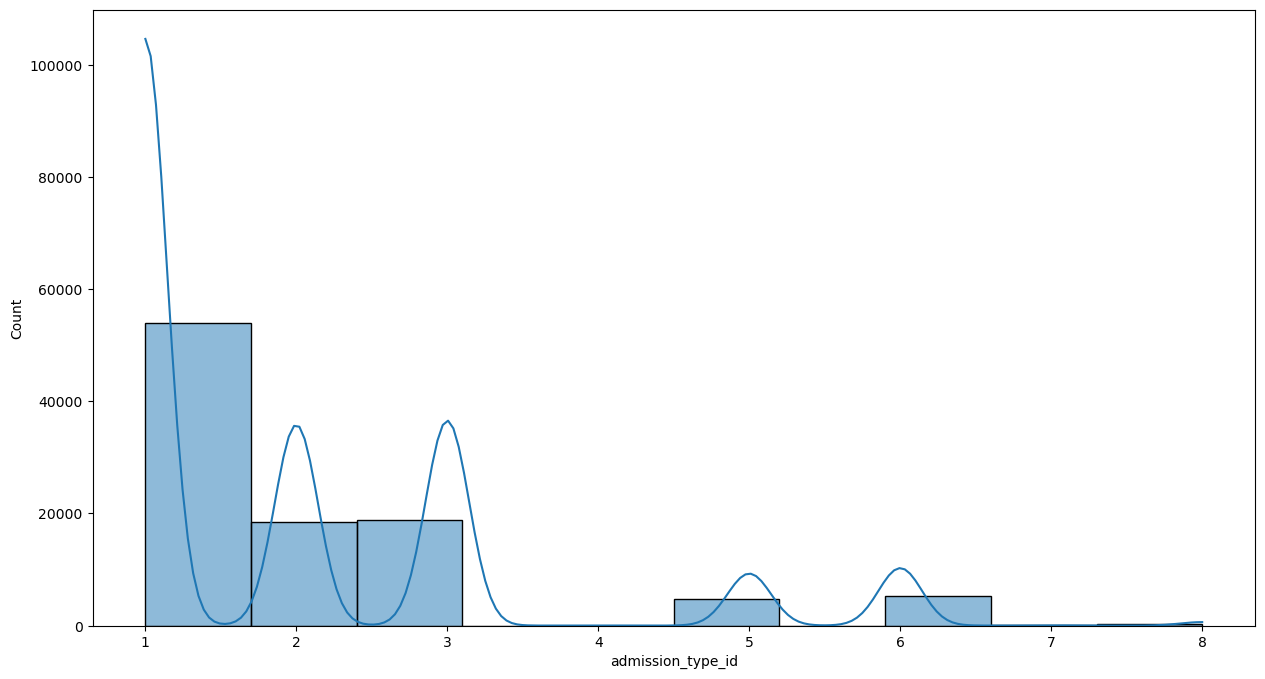

In [97]:
# Anlaysing Admission type id
print(df_multi.admission_type_id.skew())
sns.histplot(df_multi.admission_type_id,bins=10,kde=True)
plt.show()

FROM THE ABOVE PLOT WE CAN INFER THAT:
    
    1. VALUE 1- Patients who had been admitted as emergency patients are the maximum, followed by
    VALUE 3-Patients who have been admitted under "Elective" category( unlike emergency they undergo a preplanned medical
                                                        procedures for essential health care eg: cosmetic surgery)
    VALUE 2-Patients who were admitted in "Urgent" category
    
    2. Nearly 350 patients admission type havent been recorded(not available)
    
    3.10 patients admission type were not mapped

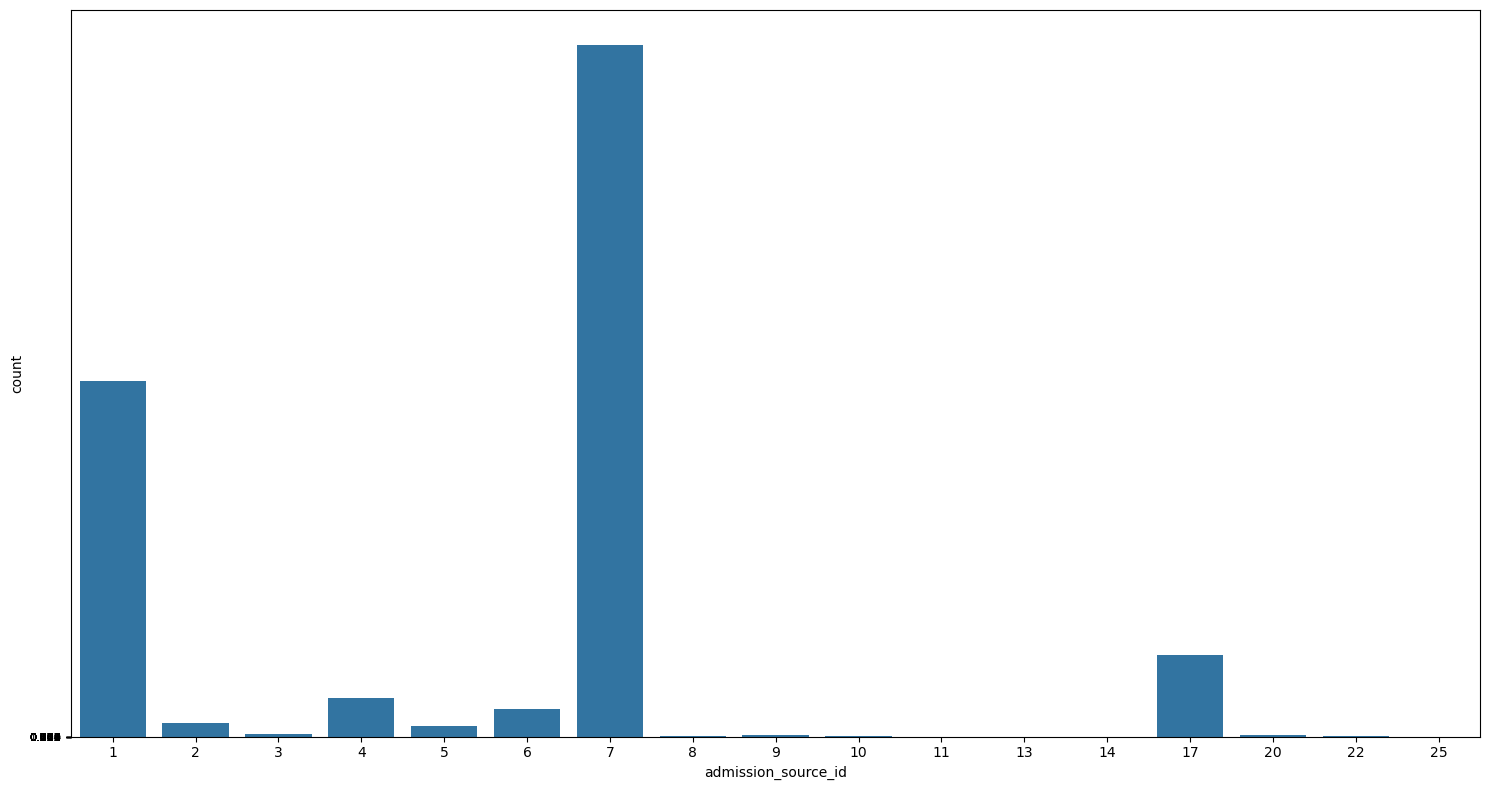

1.0299348778012456


In [98]:
# analysis of admission source id

sns.countplot(x=df_multi.admission_source_id)
plt.yticks(np.linspace(0,1,20),fontsize=8)
plt.tight_layout()
plt.show()
print(df_multi.admission_source_id.skew())

FROM THE ABOVE GRAPH:
1. Nearly 57500 patients have been sourced thorugh emergency room(id=7)- which says emergency room performs well in informing
  patients on importance of healthcare

2. 29565 patients have been referred via physicians(id=1)- they are also doing well in making awareness

3. Only 1 patient - Sick Baby(id=13)  indicate that the baby's admission to the hospital was prompted by health issues rather than being part of a planned procedure or transfer from another facility.

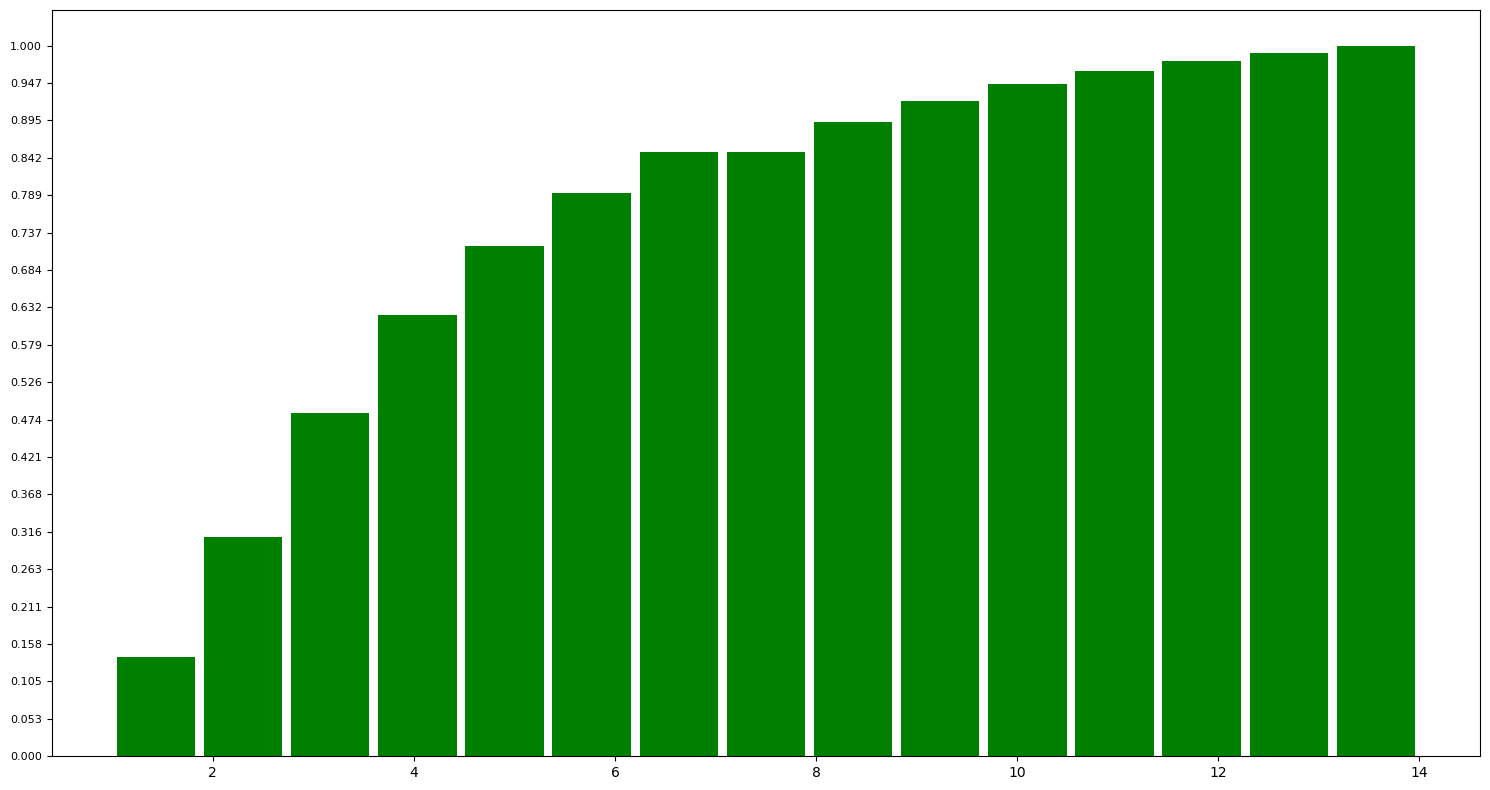

5.458601104494625


In [99]:
# analysis of time in hospital
r=plt.hist(df_multi.time_in_hospital,bins=15,color="green",rwidth=0.9,cumulative=True,density=True)
plt.yticks(np.linspace(0,1,20),fontsize=8)
plt.tight_layout()
plt.show()
#eg:gies the % of  cars have acc<20 in range(0,1)
plt.show()
print((df[df_multi.time_in_hospital>10].shape[0]/len(df_multi)*100))

 We see that:
 
 1. From the data only 5.45% of patients have stayed for more than 10 days- We can see that this may be one of the factors     responsible for readmission
  
  Since these patients had stayed more than 10, they would ungergone intense medical assistance. Which could make them to get readmitted immediately after discharge

In [100]:
num_multi=df_multi.select_dtypes(include=np.number)
num_multi.skew()

admission_type_id           1.591984
discharge_disposition_id    2.563067
admission_source_id         1.029935
time_in_hospital            1.133999
num_lab_procedures         -0.236544
num_procedures              1.316415
num_medications             1.326672
number_outpatient           8.832959
number_emergency           22.855582
number_inpatient            3.614139
diag_1                      0.268349
diag_2                      0.575734
diag_3                      0.674403
number_diagnoses           -0.876746
full_utilization            5.315210
dtype: float64

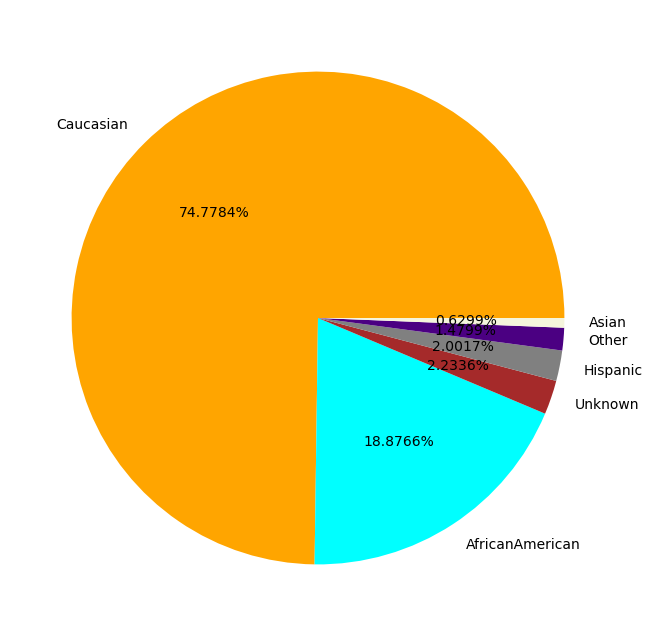

In [101]:
# Analysing the race column

race_df=df_multi.race.value_counts().to_frame().reset_index().rename(columns={"count":"No_of_patients"})
race_df
colors = ("orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
plt.pie(x=race_df["No_of_patients"],labels=race_df["race"],autopct="%2.4f%%",colors=colors)
plt.show()

Nearly 75% of patients are Caucasian-Diabetic People,
18% people are Afro-American,
ONLY 0.5% Patients are Asian




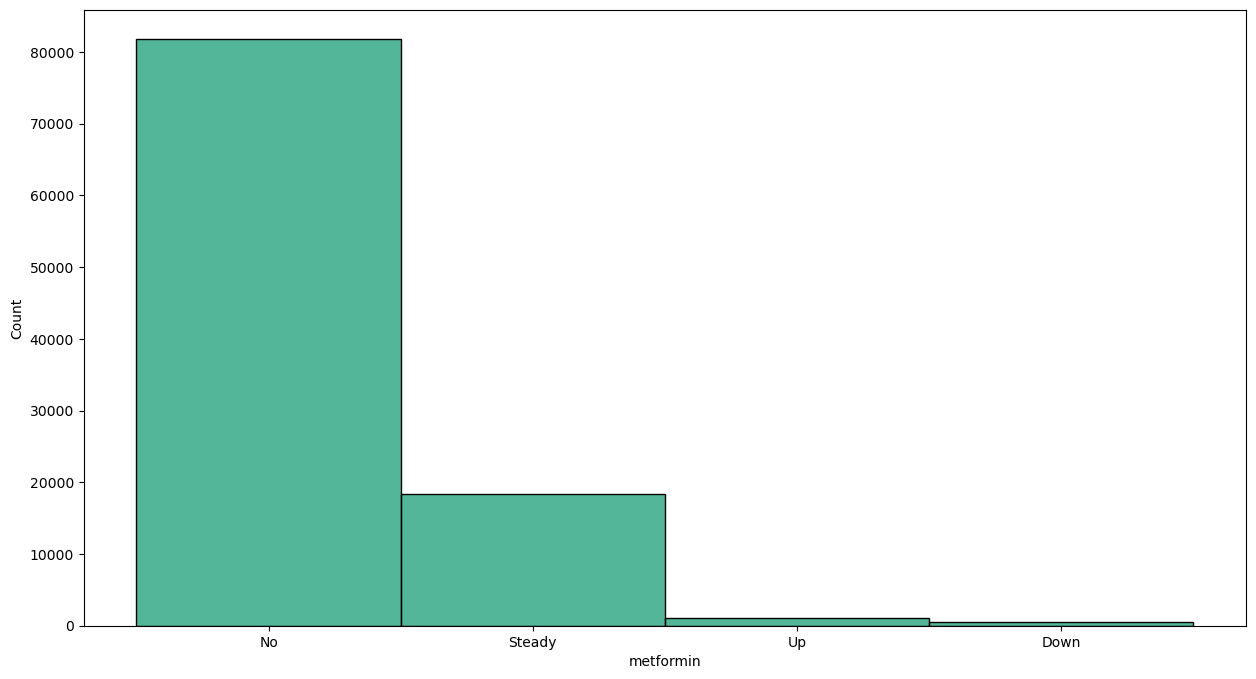

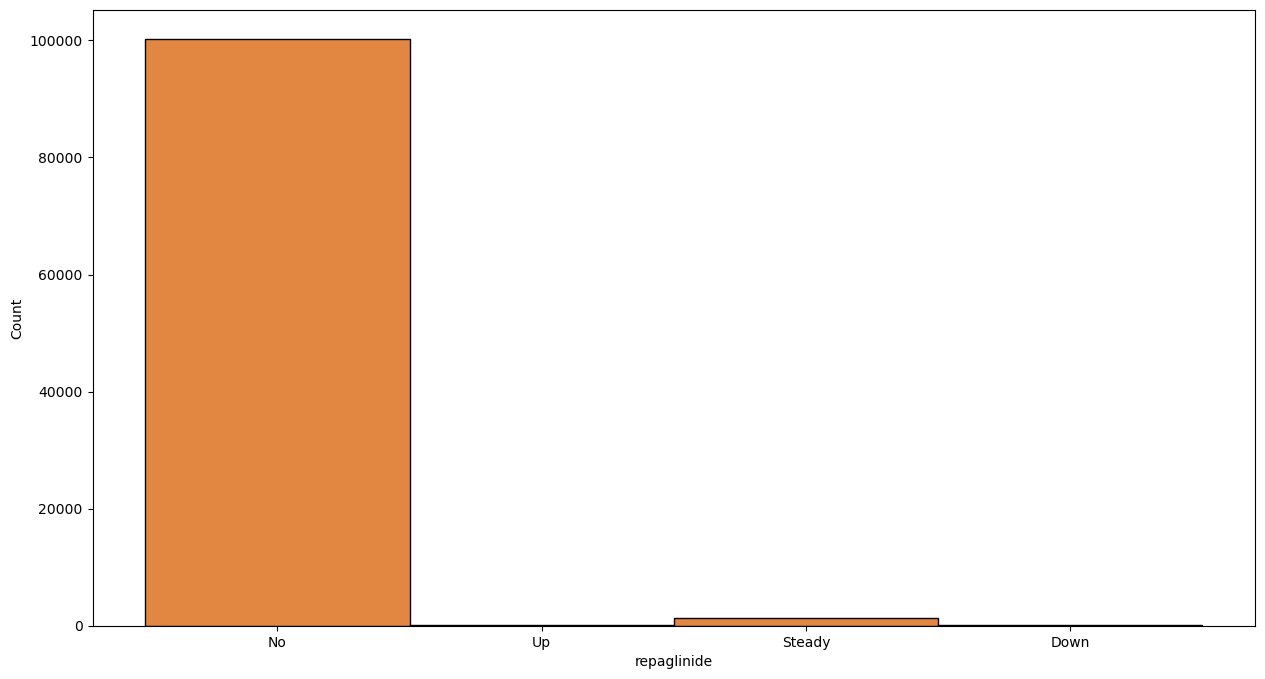

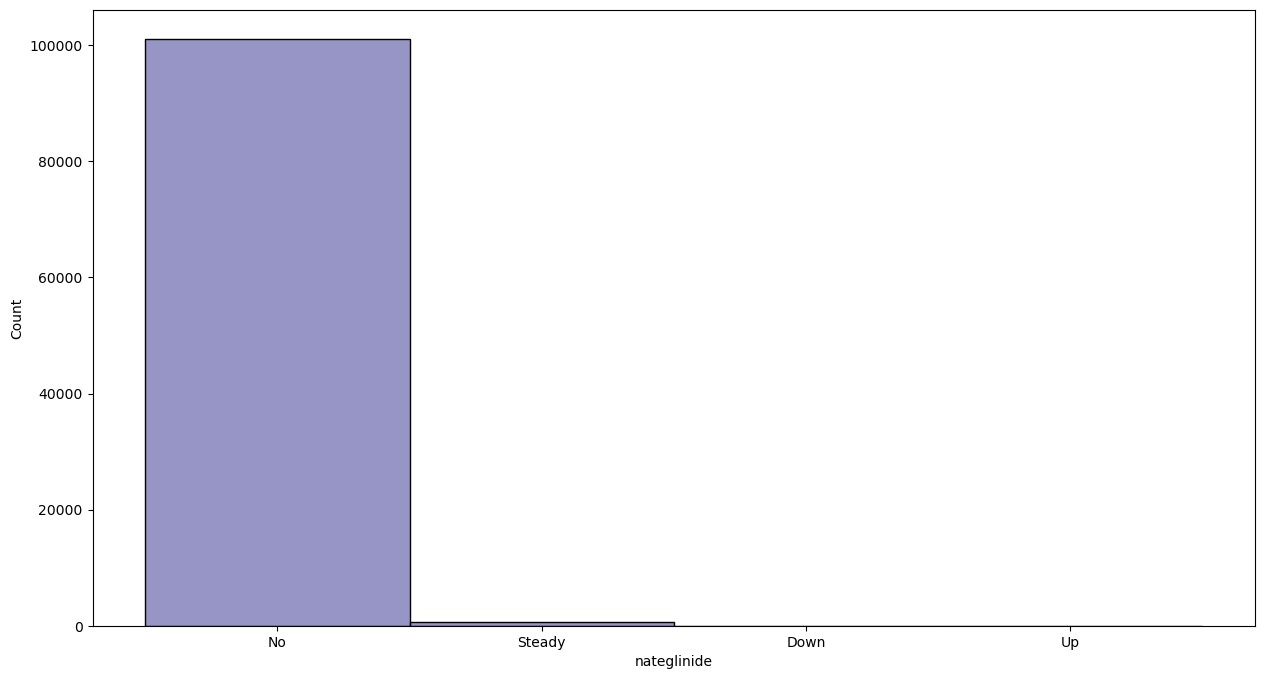

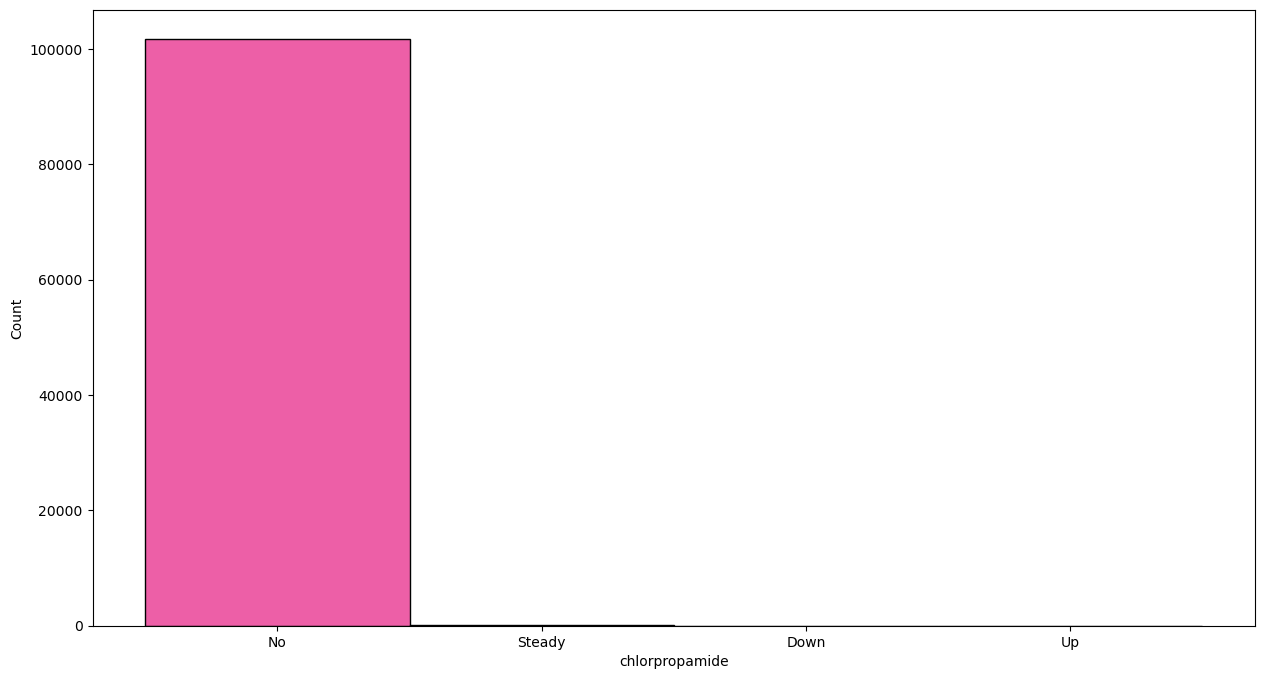

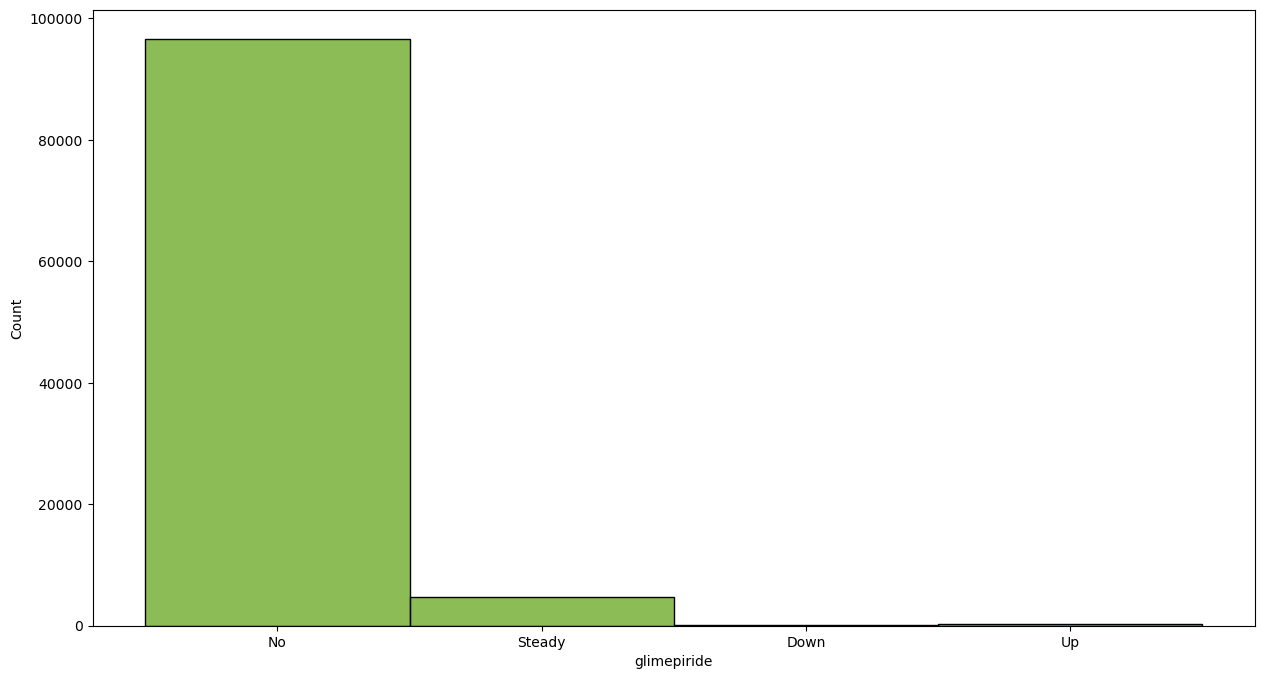

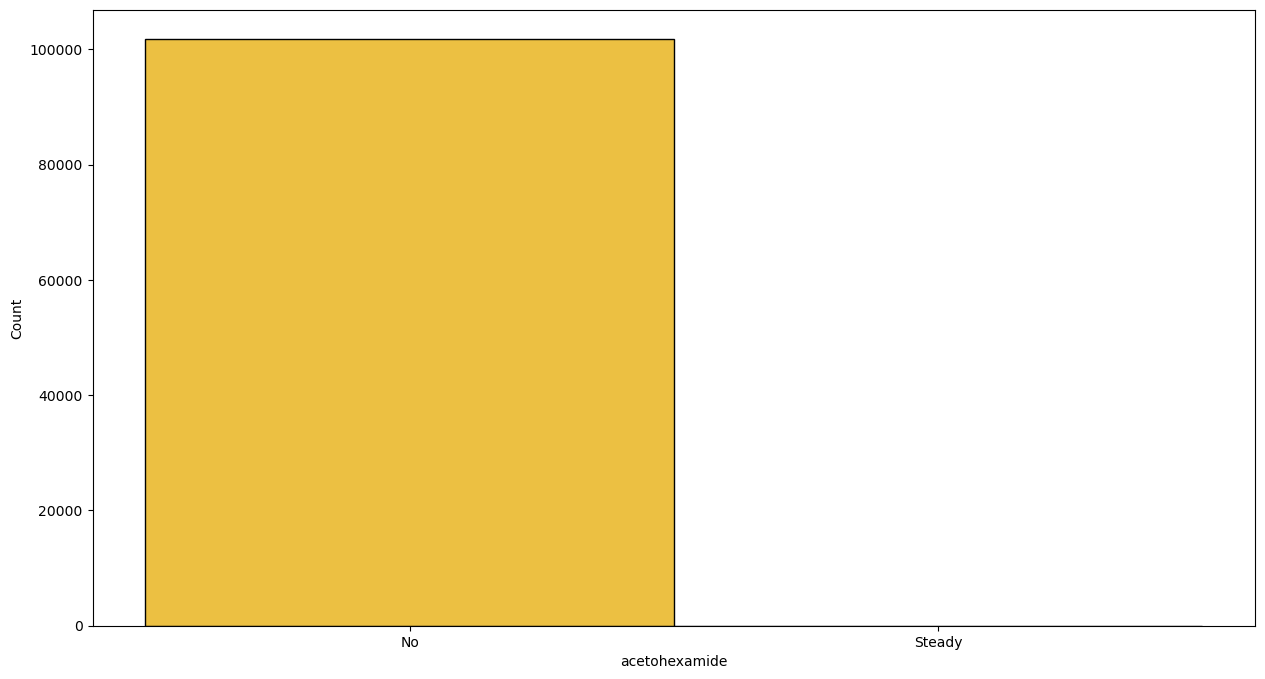

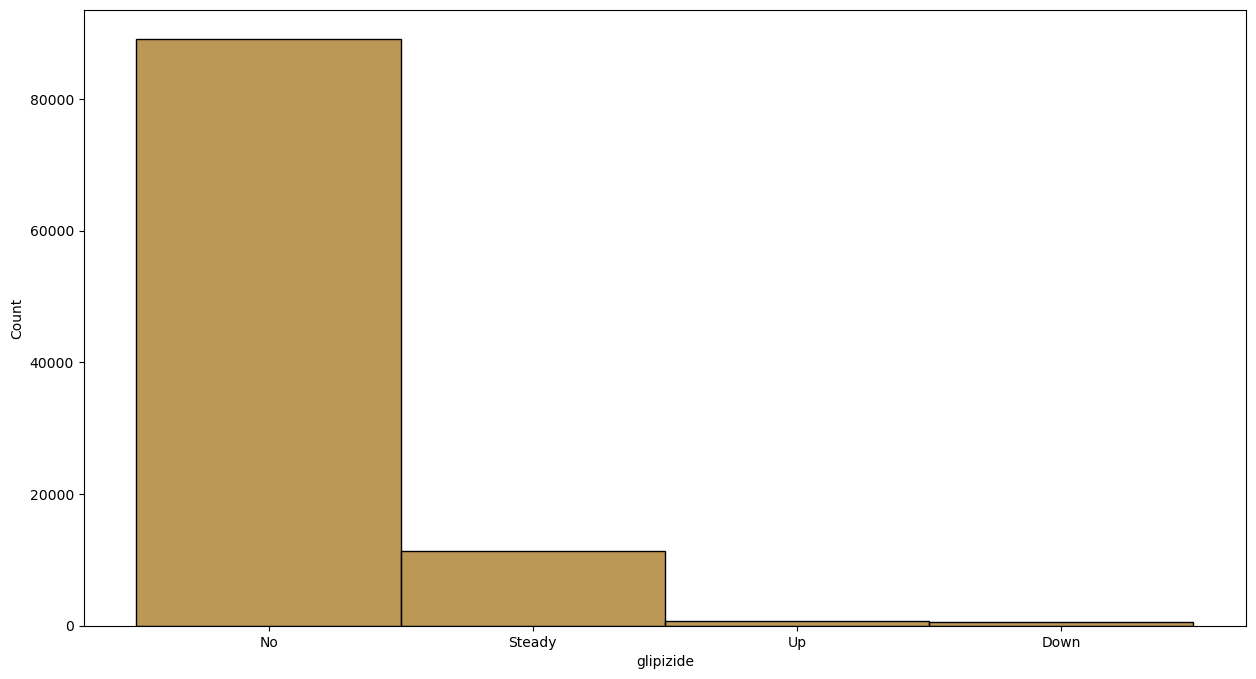

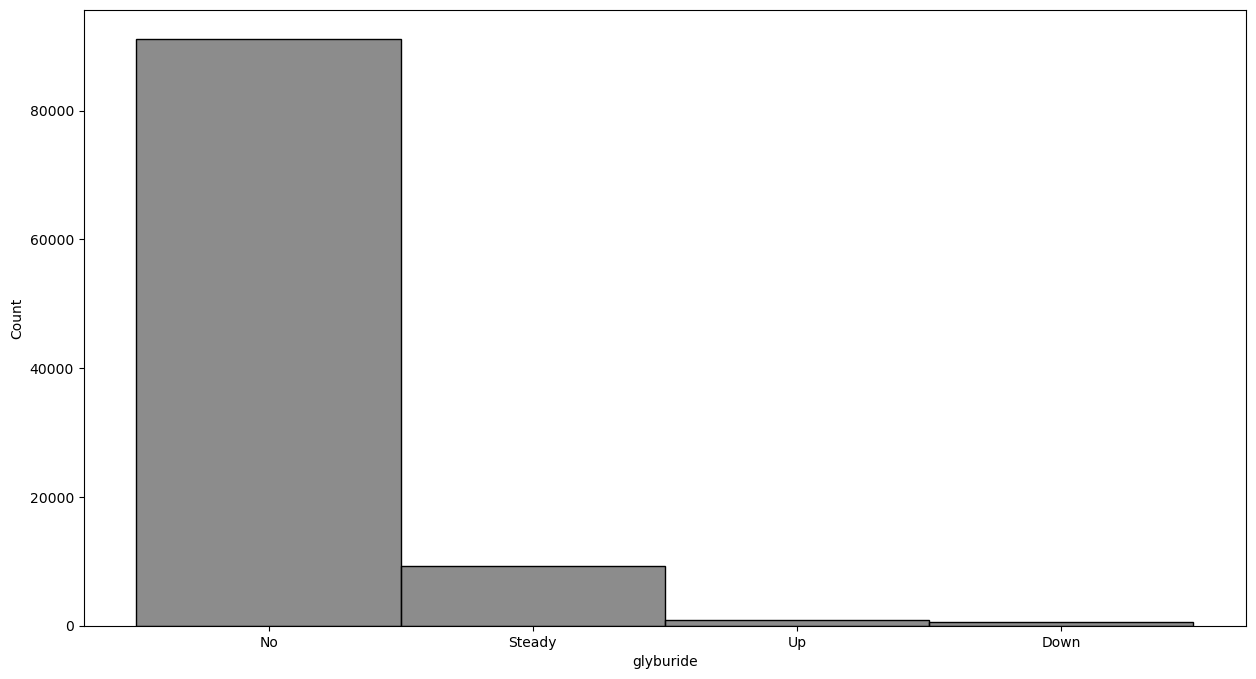

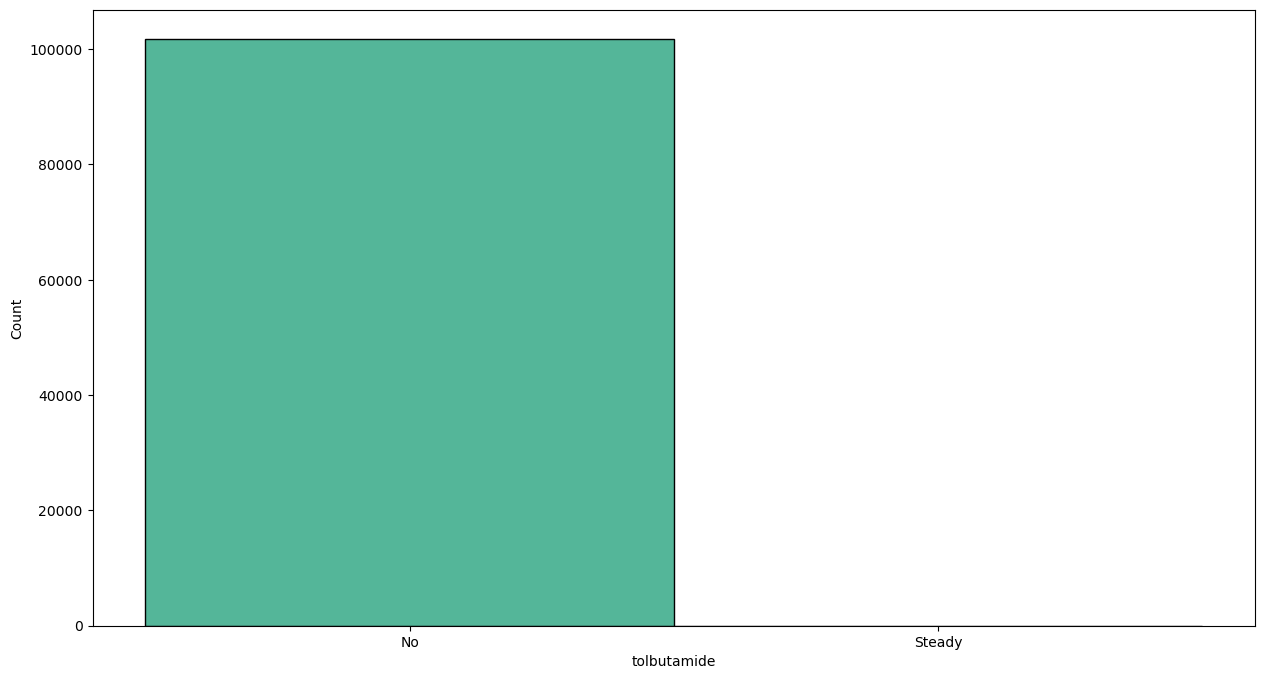

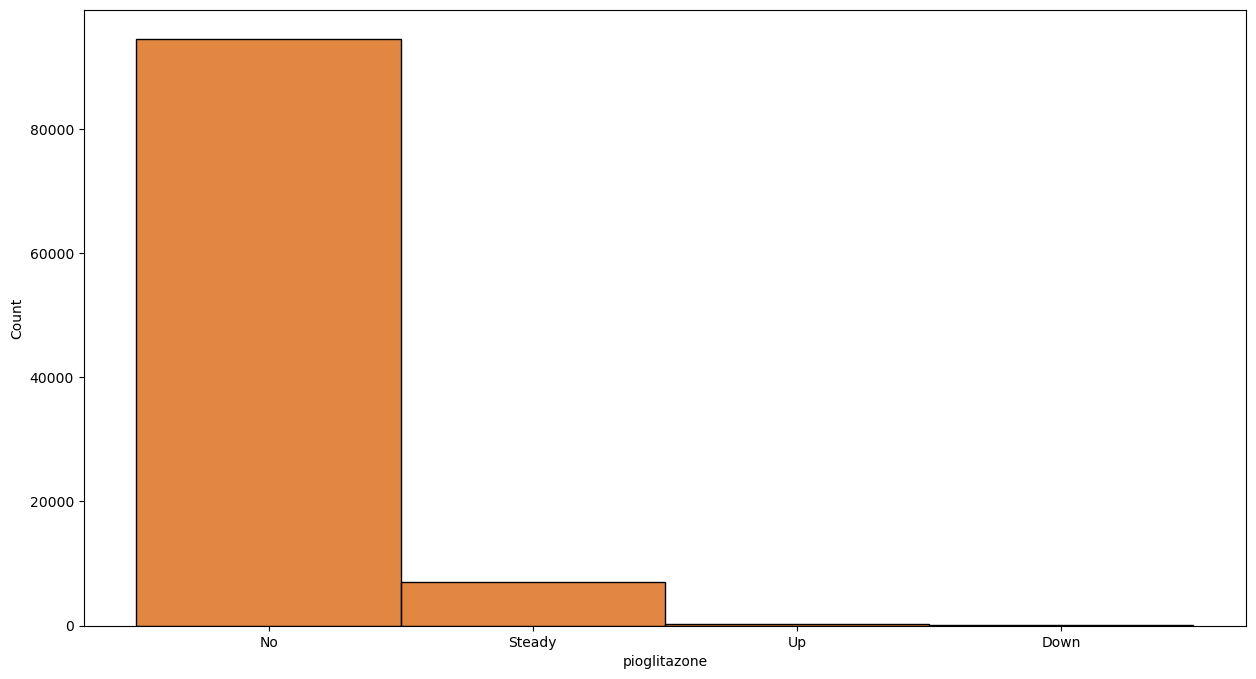

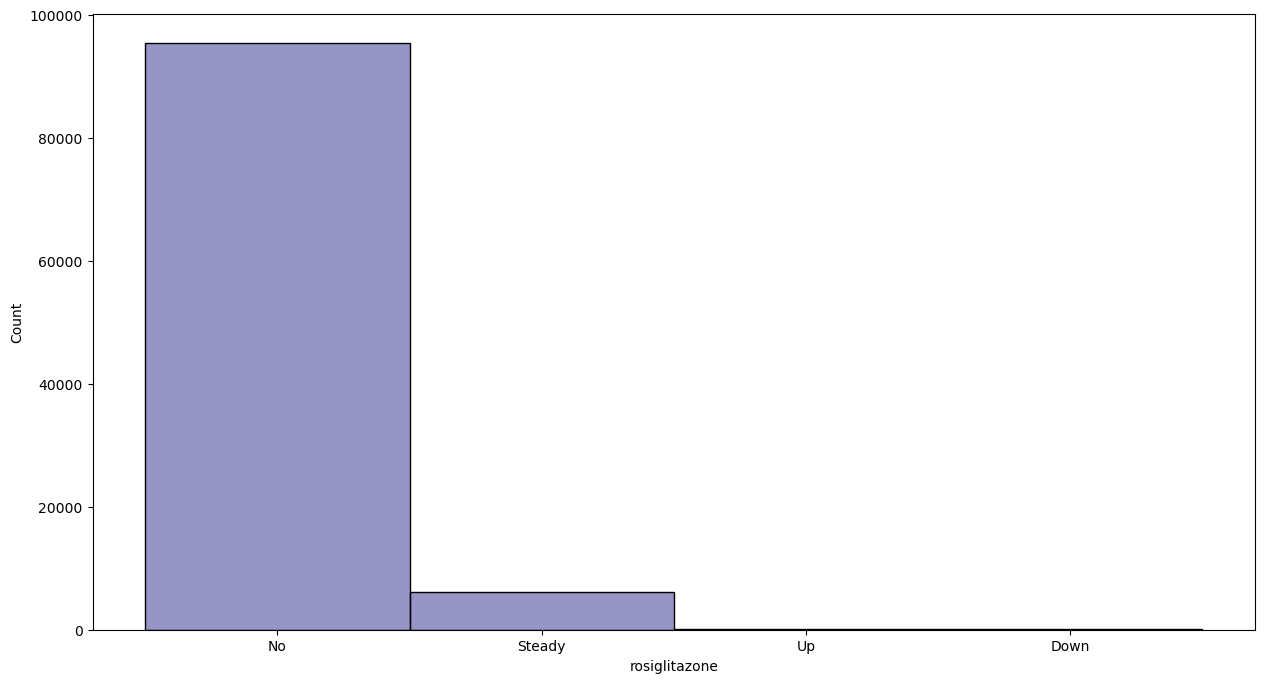

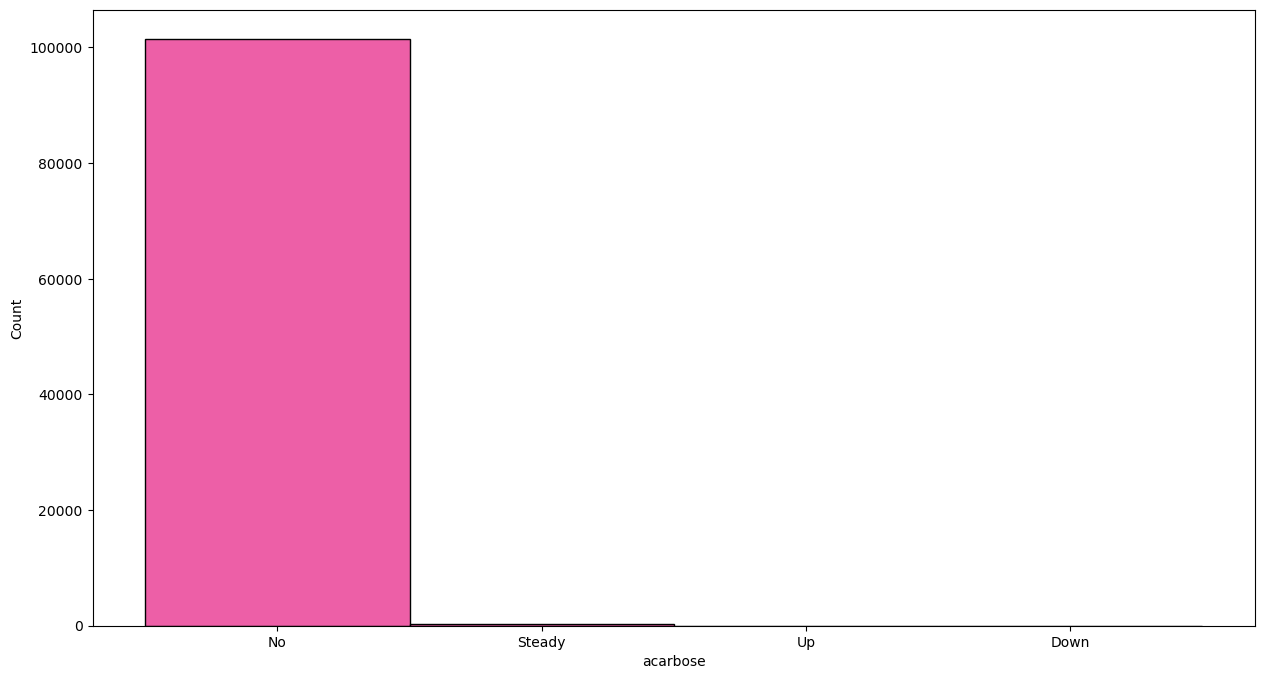

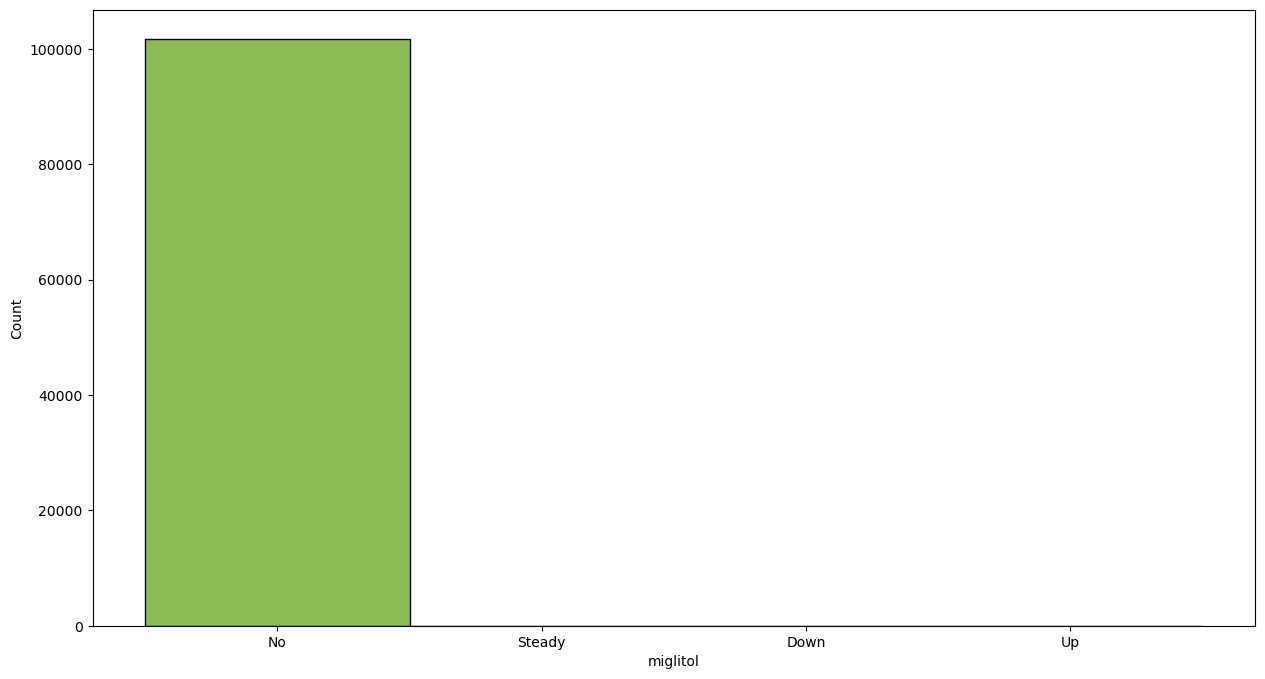

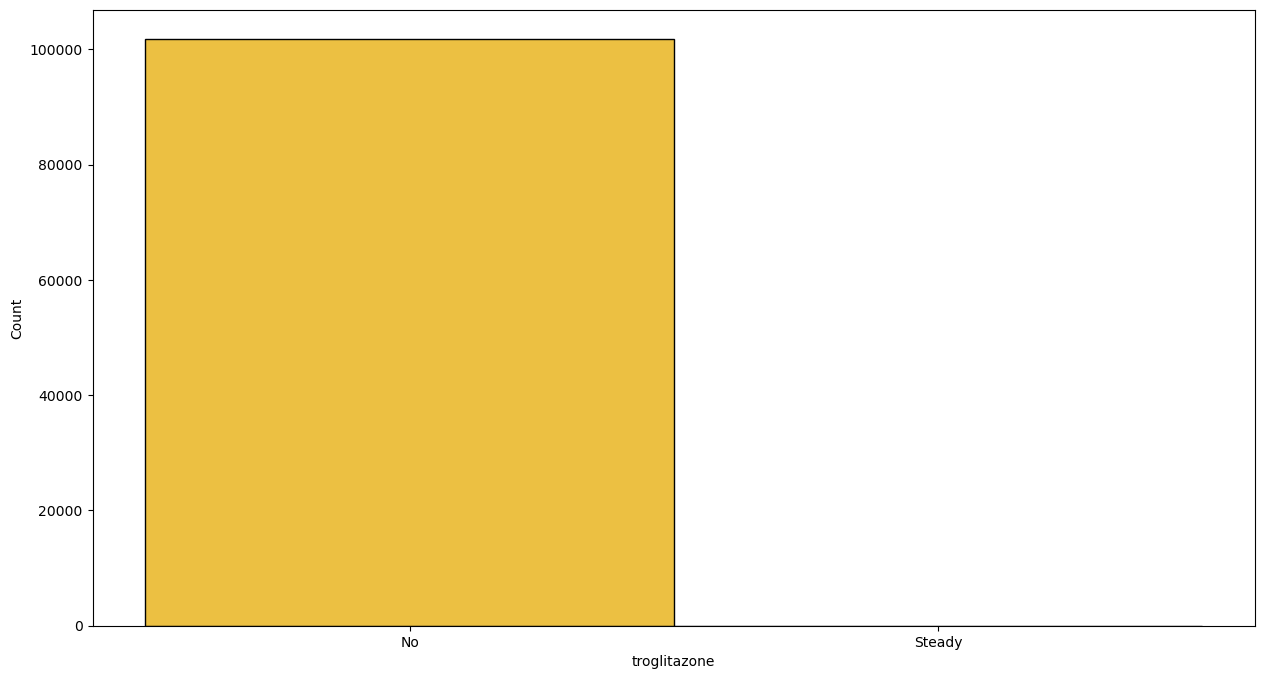

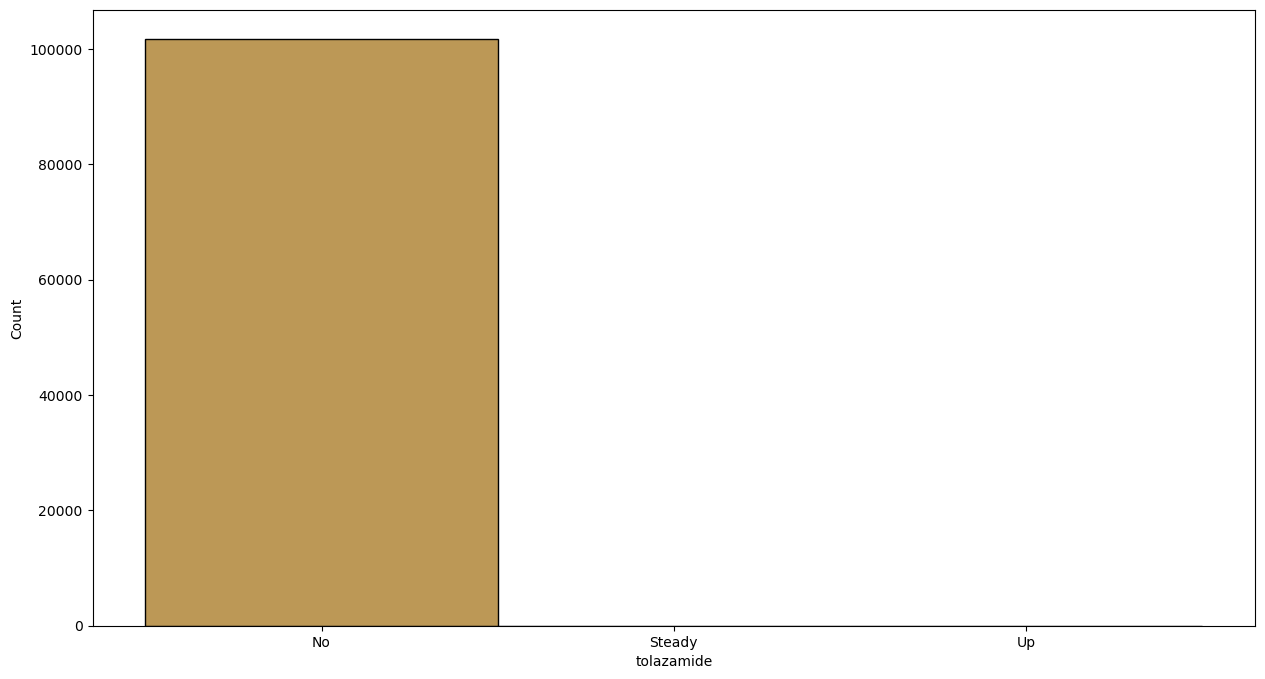

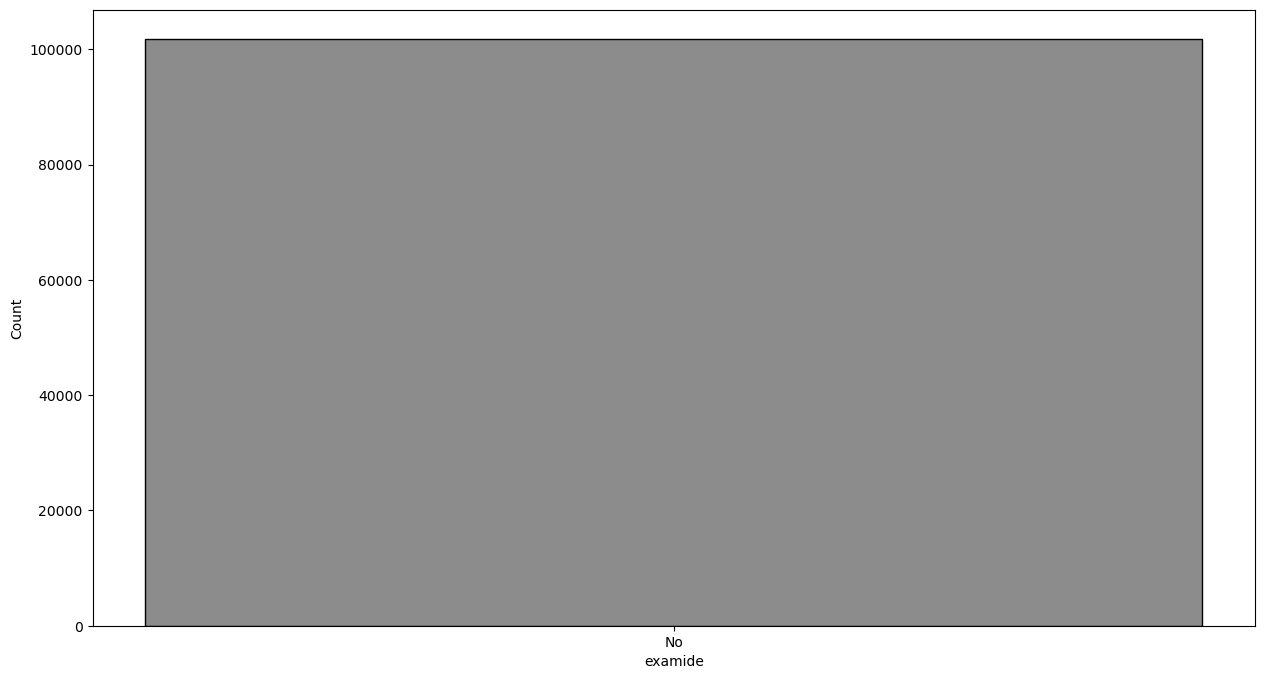

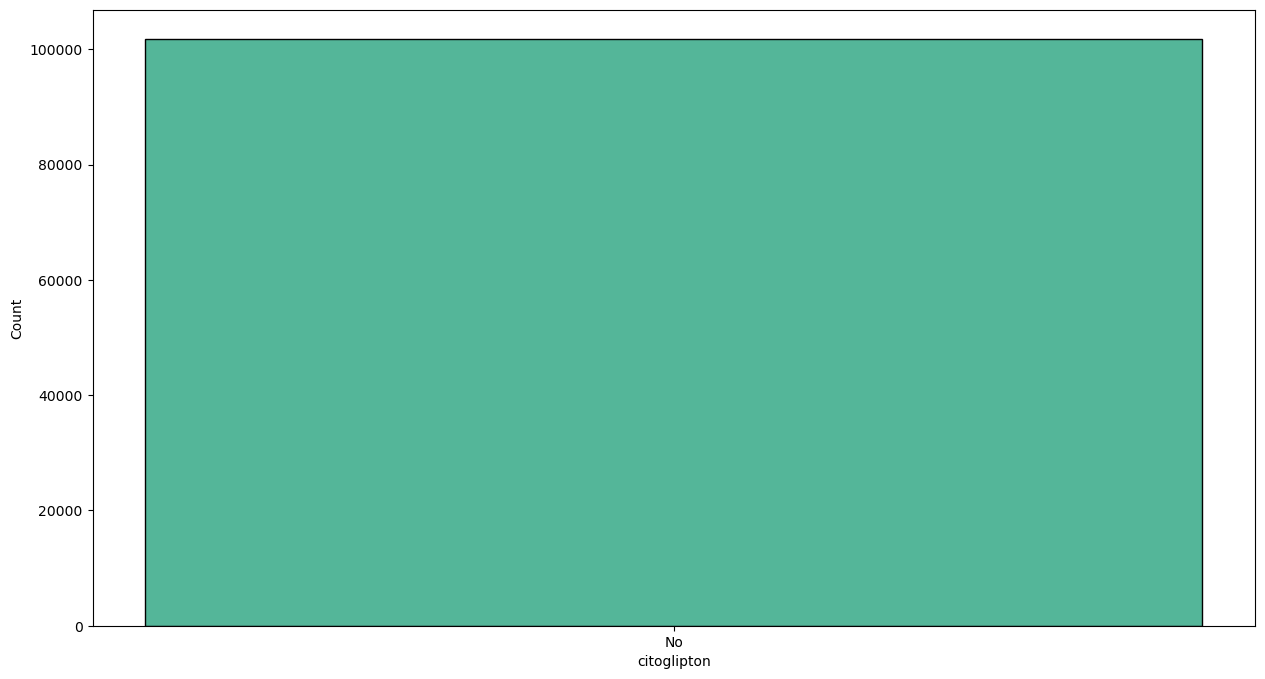

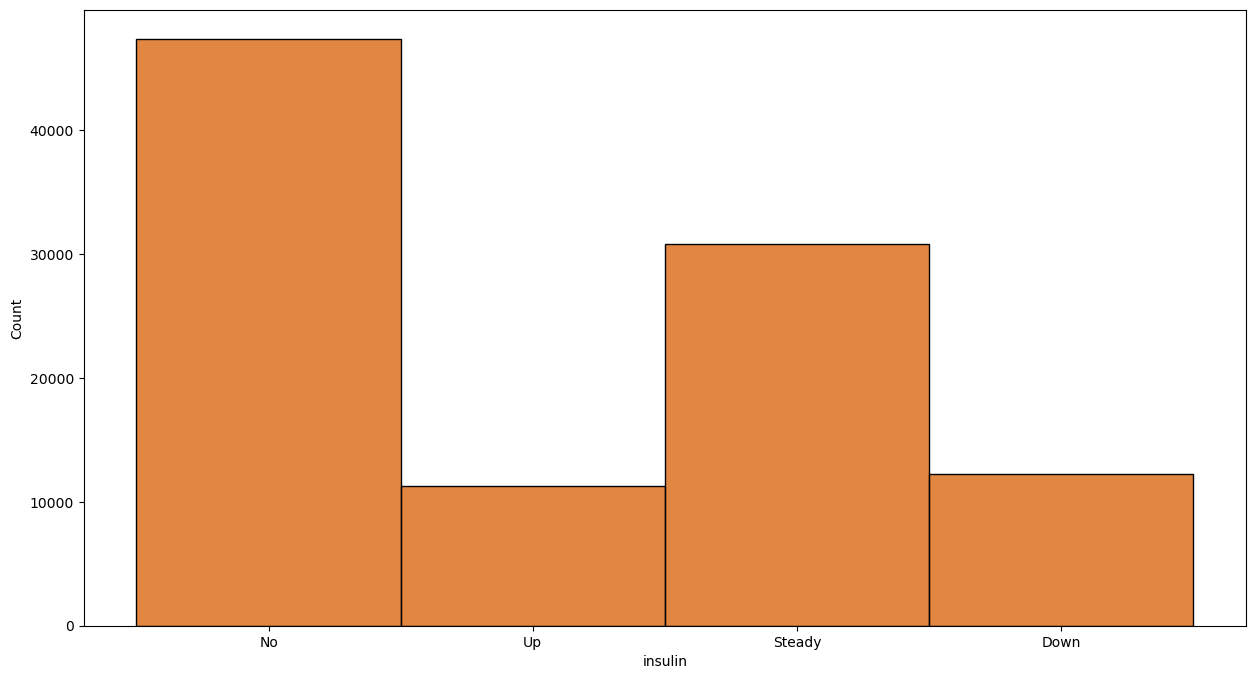

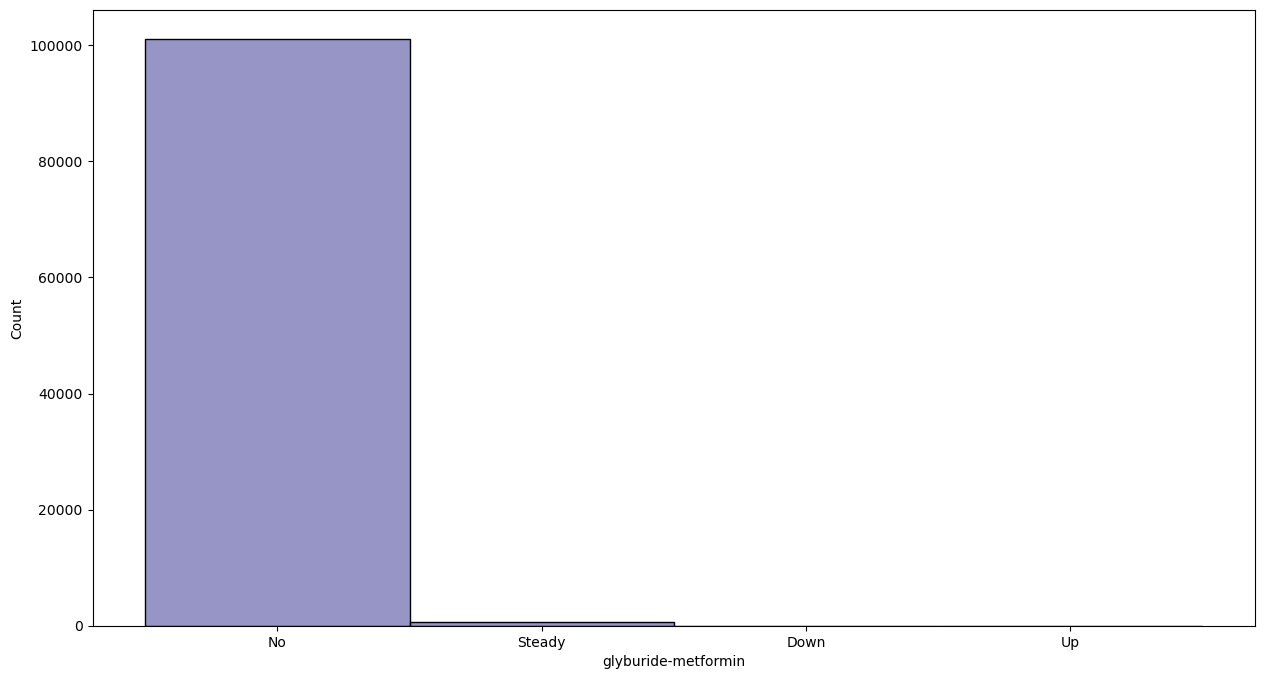

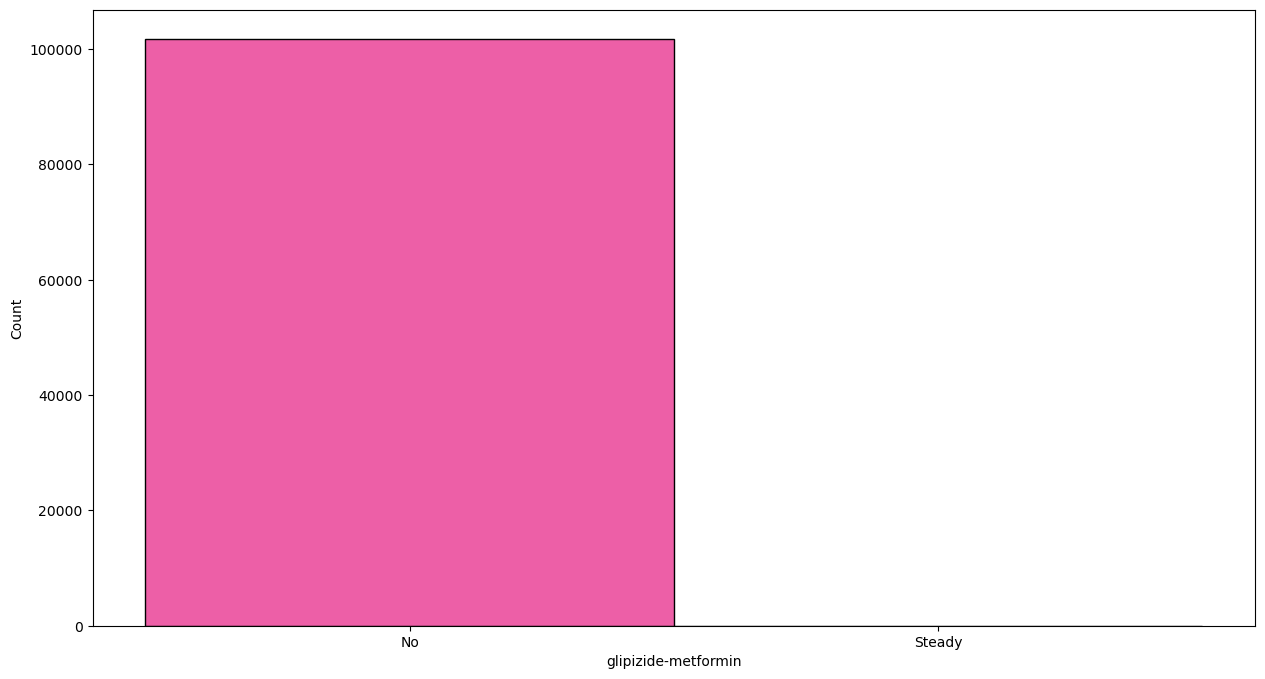

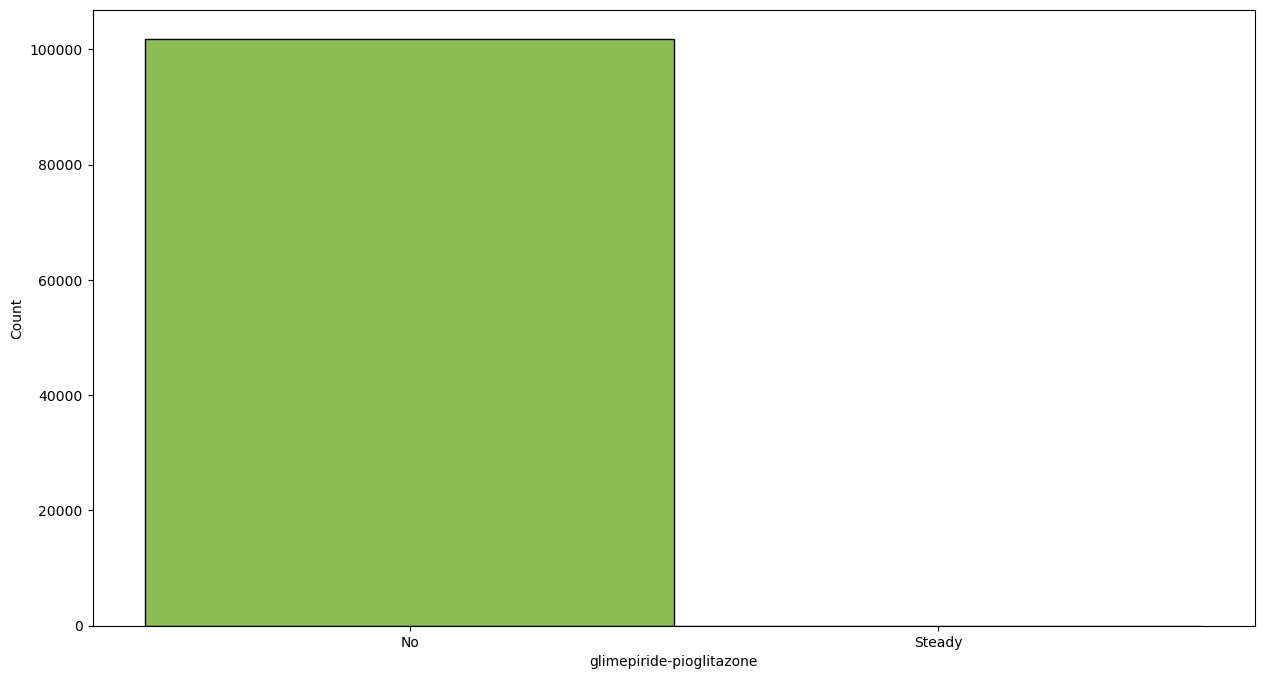

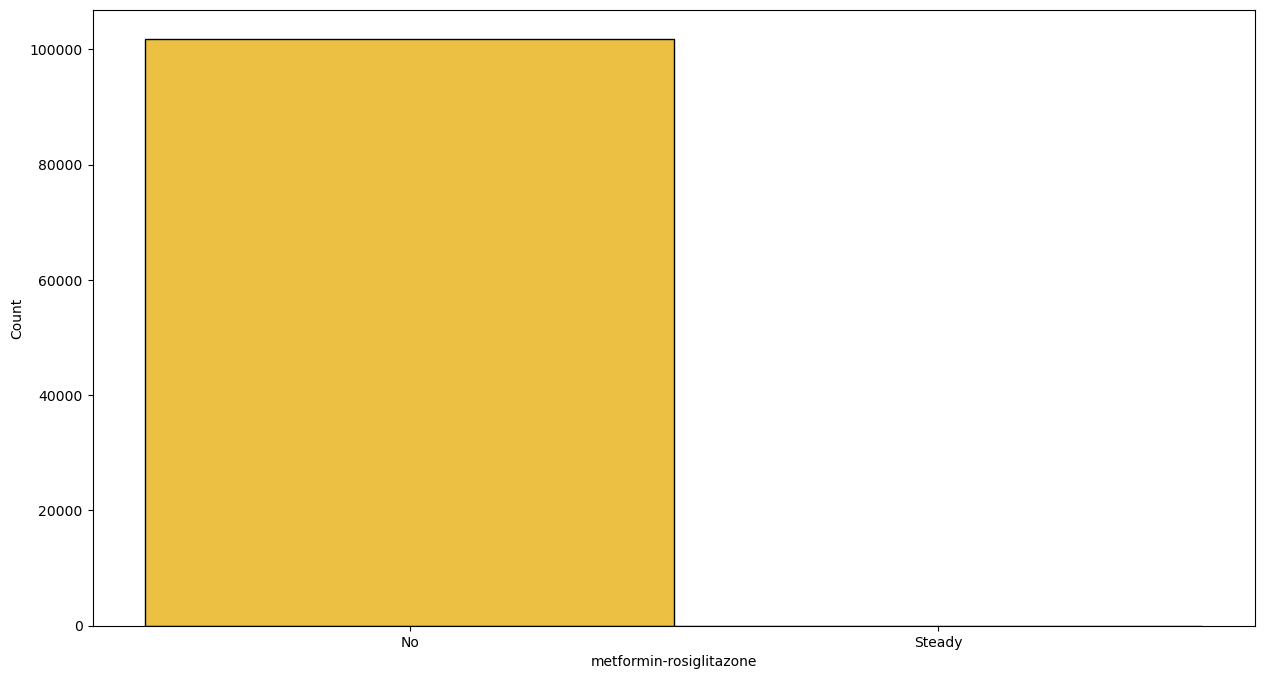

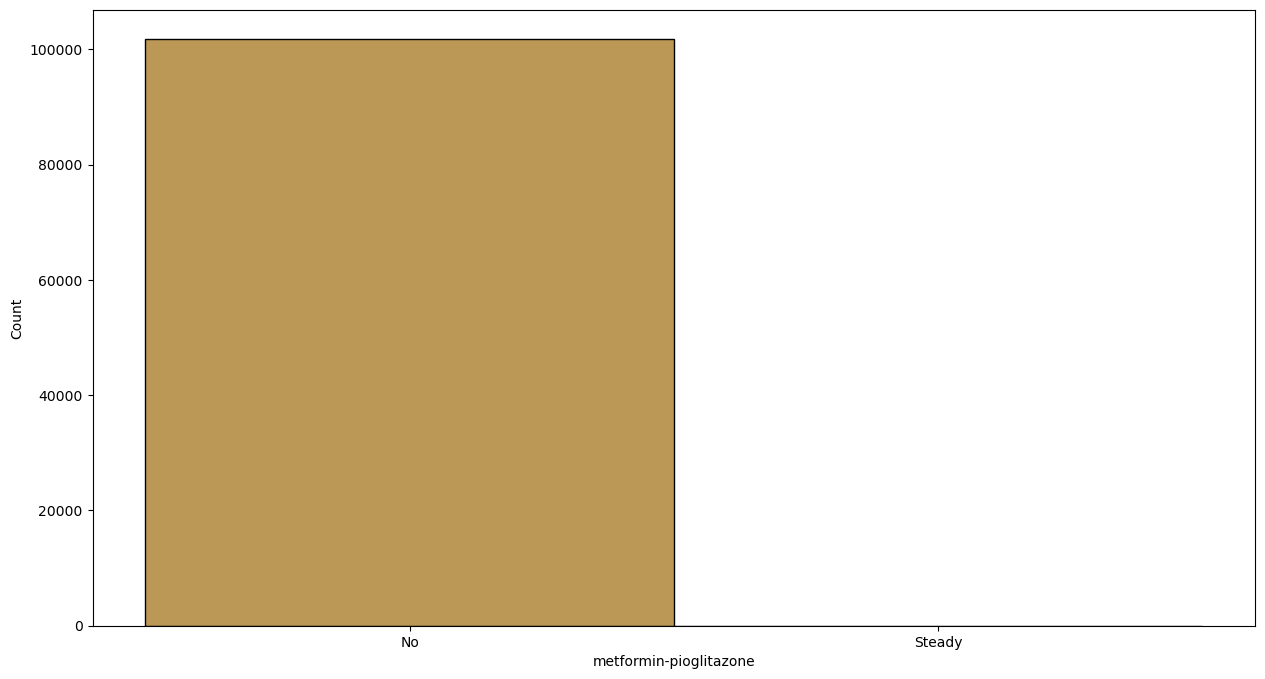

In [102]:
# Druf dosage analysis
colors = sns.color_palette('Dark2', n_colors=len(drugs))

for i,d in enumerate(drugs):
    sns.histplot(df_multi[d],color=colors[i])
    plt.show()

The above drugs generally control the blood sugar level and improve the insulin sensitivity in the tissues.
 Majority of these drigs were not prescribed, which suggests this may or may not  be a possible reason for  readmission.
    Further analysis will show the variation of these drugs with respect to  readmission 
    
    
    
    

In [103]:
not_prescribed_patients =df_multi[(df_multi.metformin=="No") & (df_multi.repaglinide=="No") & (df_multi.nateglinide=="No") &
                                  (df_multi.chlorpropamide=="No") &(df_multi.glimepiride=="No") &(df_multi.acetohexamide=="No") &
                                  (df_multi.glipizide=="No") & (df_multi.glyburide=="No")  & (df_multi.tolbutamide=="No") &
                                  (df_multi.pioglitazone=="No") & (df_multi.rosiglitazone=="No") &(df_multi.acarbose=="No") &
                                  (df_multi.miglitol=="No") & (df_multi.troglitazone=="No") & (df_multi.tolazamide=="No") &
                                  (df_multi.examide=="No")  & (df_multi.citoglipton=="No")  & (df_multi.insulin=="No") &
                                  (df_multi["glipizide-metformin"]=="No") & (df_multi["glipizide-metformin"]=="No") &
                                  (df_multi["glimepiride-pioglitazone"]=="No") & (df_multi["metformin-rosiglitazone"]=="No") &
                                  (df_multi["metformin-pioglitazone"]=="No")]



not_prescribed_patients[not_prescribed_patients["readmitted"]!="NO"]



race  gender      age   weight  admission_type_id  \
23            Caucasian  Female  Unknown  Unknown                  2   
50      AfricanAmerican    Male  Unknown  Unknown                  2   
70            Caucasian  Female  Unknown  Unknown                  1   
89            Caucasian    Male  Unknown  Unknown                  3   
105           Caucasian    Male  Unknown  Unknown                  1   
...                 ...     ...      ...      ...                ...   
101650        Caucasian  Female  Unknown  Unknown                  1   
101655        Caucasian  Female  Unknown  Unknown                  2   
101664        Caucasian    Male  Unknown  Unknown                  1   
101682        Caucasian    Male  Unknown  Unknown                  1   
101711  AfricanAmerican  Female  Unknown  Unknown                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
23                             6                    1                11   
50                             1                    2                 4   
70                             6                    7                 7   
89                             1                    2                 4   
105                            6                    7                 2   
...                          ...                  ...               ...   
101650                         1                    1                 1   
101655                         6                    1                 4   
101664                         1                    7                 4   
101682                         3                    7                 5   
101711                         3                    7                 7   

       payer_code medical_specialty  ...  insulin  glyburide-metformin  \
23        Unknown           Unknown  ...       No                   No   
50        Unknown           Unknown  ...       No                   No   
70        Unknown           Unknown  ...       No                   No   
89        Unknown           Unknown  ...       No                   No   
105       Unknown        Cardiology  ...       No                   No   
...           ...               ...  ...      ...                  ...   
101650         HM           Unknown  ...       No                   No   
101655         MC           Unknown  ...       No                   No   
101664         CH           Unknown  ...       No                   No   
101682         CP           Unknown  ...       No                   No   
101711         MC           Unknown  ...       No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
23                       No                        No   
50                       No                        No   
70                       No                        No   
89                       No                        No   
105                      No                        No   
...                     ...                       ...   
101650                   No                        No   
101655                   No                        No   
101664                   No                        No   
101682                   No                        No   
101711                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  \
23                           No                      No      No           No   
50                           No                      No      No           No   
70                           No                      No      No           No   
89                           No                      No      No           No   
105                          No                      No      No           No   
...                         ...                     ...     ...          ...   
101650                       No                      No      No           No   
101655                       No        

discharge_disposition_id
1    0.591887
3    0.137118
6    0.126781
18   0.036269
2    0.020911
22   0.019584
11   0.016135
5    0.011635
25   0.009718
4    0.008009
7    0.006122
23   0.004049
13   0.003921
14   0.003655
28   0.001366
8    0.001061
15   0.000619
24   0.000472
9    0.000206
17   0.000138
16   0.000108
19   0.000079
10   0.000059
27   0.000049
12   0.000029
20   0.000020
Name: proportion, dtype: float64


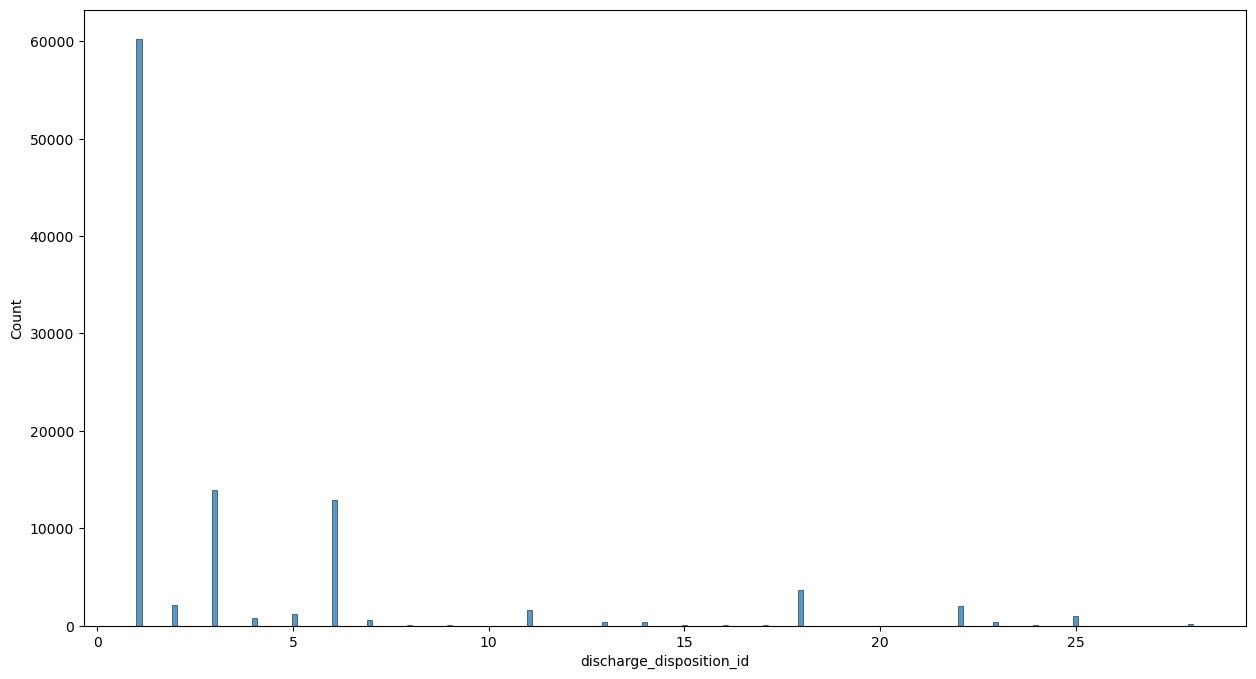

In [104]:
#Discharge Disposition ID

print(df_multi.discharge_disposition_id.value_counts(normalize=True))
sns.histplot(df_multi.discharge_disposition_id)
plt.show()

From the observations:
    Nearly 59 % of patients have been discharged to home once they became stable,
    
    Nealry 14% of patients have been discharged to SNF(Skilled nursing facility) where inpatient rehabilation process is
    done by skillfull nursing professionals
    
    12% of the patients have been transferred to home with home health service, where a caretaker is assigned to a patient,
    
    It is noted that only 0.00002% patients have been expired under medical facility
    
    Highlight: This shows that the hospital management is doing a good job in treating patients with right diagnosis
        and providing ontime,good medications and healthcare.

num_procedures
0   0.458424
1   0.203821
2   0.124963
3   0.092791
6   0.048680
4   0.041075
5   0.030246
Name: proportion, dtype: float64


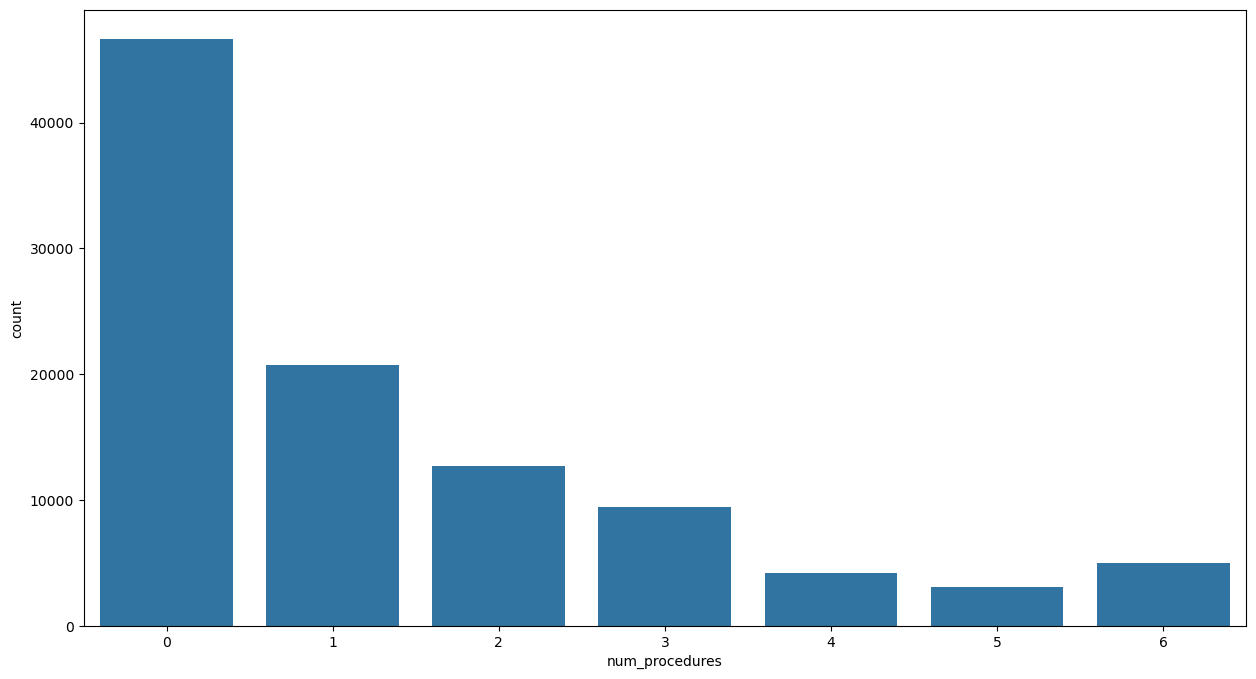

In [105]:
# number of procedures performed during encounter 
print(df_multi.num_procedures.value_counts(normalize=True))
sns.countplot(x=df_multi.num_procedures)
plt.show()

The information tells us that : No lab procedures other than lab test were performed during the encounter
    1. Nearly for 46% patients there were no lab tests performed
    2. 20% of patients underwent 1 lab procedures
    3.12% of patients underwent 2 lab procedures
    
    
    These lab procedures are medical interventions that were not specifically diagnostic tests in a laboratory setting.
    These can be :
        1.Medical Imaging procedures: Xrays, MRI scans etc.
        2.Surgical procedures:  Minor surgeries such as biopsies and wound repair to major surgeries like appendectomies or heart bypass surgery.
        3.Dental Procedures: Fillings, rootcanal treatment, Extractions etc.
    and other Orthopedic or therepeutic Procedures
    
    It is important to higlight, that there is no documentation for what kind of procedures that were done other than 
    lab tests (diabetes.)
    
    This absense may affect:
        1.Quality of care: Without knowing the patients medical history, it wont be effective for doctors to appropriately plan and provide effective treatments
        2.Risk of complications: Some surgical procedures which lead to infections,bleeding or adverse reactions,which gets unnoticed ot untreated may lead to complications and eventually lead the patient to get readmitted
            
        3.Hospital Reputation gets affected.
        4.Reimbursement and Compliance: Proper documentation is also crucial for billing purposes and compliance with regulatory requirements. 
            Inaccurate or incomplete documentation may result in denied claims or penalties for non-compliance, 
            impacting the healthcare facility's financial viability. 

num_lab_procedures
1     0.031523
43    0.027553
44    0.024527
45    0.023348
38    0.021746
        ...   
120   0.000010
132   0.000010
121   0.000010
126   0.000010
118   0.000010
Name: proportion, Length: 118, dtype: float64
num_lab_procedures
1      3208
43     2804
44     2496
45     2376
38     2213
       ... 
120       1
132       1
121       1
126       1
118       1
Name: count, Length: 118, dtype: int64


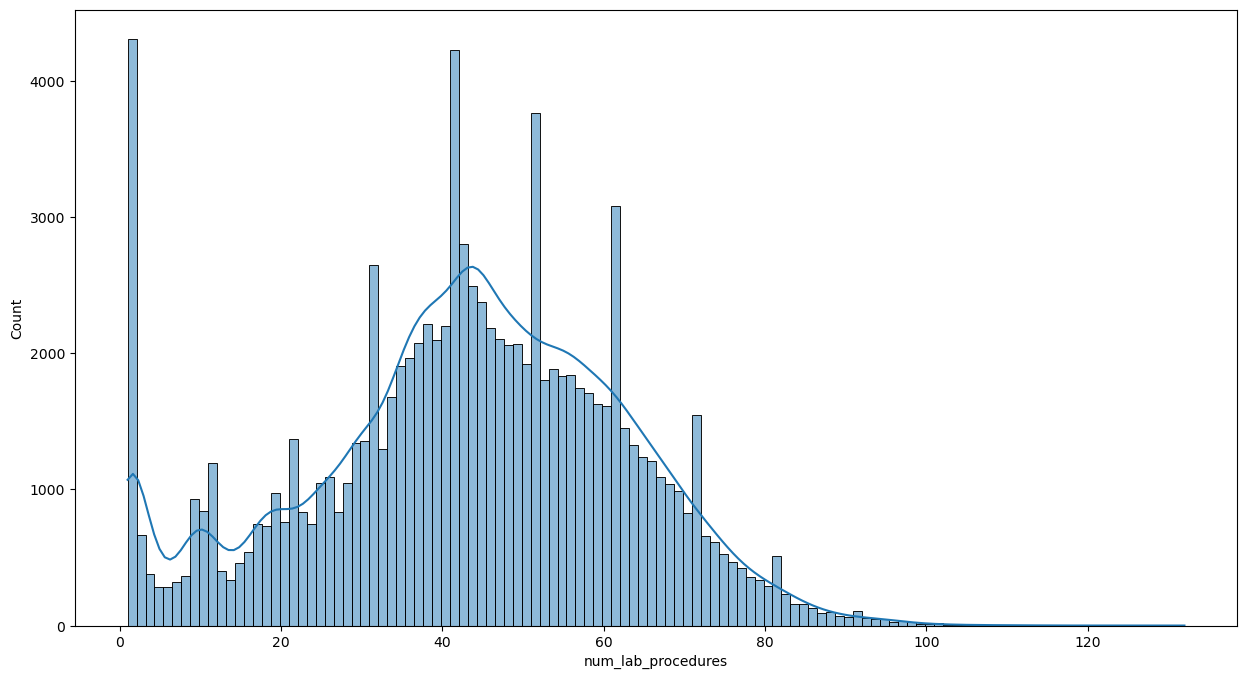

In [106]:
# Number of Lab procedures

print(df_multi.num_lab_procedures.value_counts(normalize=True))
print(df_multi.num_lab_procedures.value_counts())

sns.histplot(df_multi.num_lab_procedures,kde=True)
plt.show()

From the analysis of Number of Lab test performed:
    Nearly 3200 patients have ungergone 1 lab test
    Nealry 10000+ Patients have undergone more than 30 lab tests
    
    It is interesting to note that how these many lab tests can be performed for a diabetic patient.
    The explanation for this question is :
        Many patients not only have diabetes, most of them have been diagnised with "Coronory Arteries"
    "Respiratory Issues",hypertension etc. which are Charaterized by different ICD9 medical codes(diagnosis column).
    We have seen earlier that the hospital management have not recorded the nature of procedures done other than lab test.
    
    If we take both these reasons into account, we can observed that the many procedures could have performed and documented under lab test feature.
    The patient may have a medical history other than diabetes for which respective lab tests could have performed, but not documented.
    In certain cases, diabetic patients may require specialized assessments or investigations based on their clinical presentation or complications. For instance, diabetic foot ulcers may require cultures for bacterial infection.
    Patients suffering from hypertension, hypertremia may require to undergo liver function,serum creatinine test etc.
    
    Hence proper documentation of type of lab test perfomed and why it is perfomed, will give a better picture.


In [107]:
df_multi.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'full_utilization'],
      dtype='object')

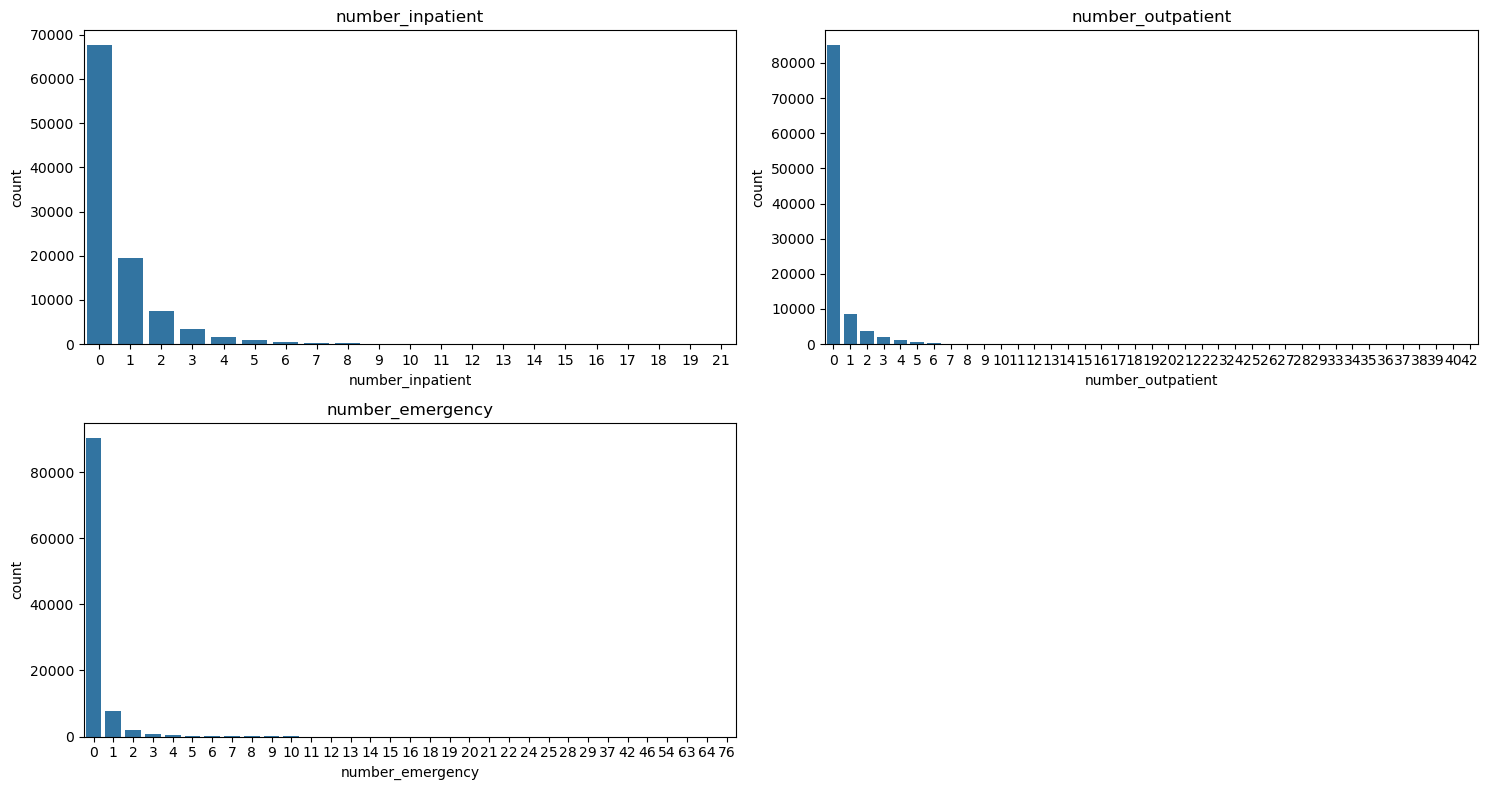

In [108]:
visit=df_multi[["number_inpatient","number_outpatient","number_emergency"]]
t=1

for j in visit:
    plt.subplot(2,2,t)
    sns.countplot(x=df_multi[j])
    plt.title(j)
    t+=1
plt.tight_layout()
plt.show()

From this plot:
    
1.Nearly 60% of the patients have not done any inpatient visits

2.20% patients have done  1 inpatient visit

3.<0.08% of patients have done more than 1 inpatient visit

4.Nealry 83% of patients have not done any outpatient visits

5.<0.09% patients have done more than 1 outpatient visits

6.Nearly 88% patients have not done any emergency visits

7.less than 0.08% patients have made more than 1 emergency visits
    
    

In [109]:
df_multi[df_multi.num_lab_procedures>=95].shape

(217, 47)

# BIVARIANT ANALYSIS

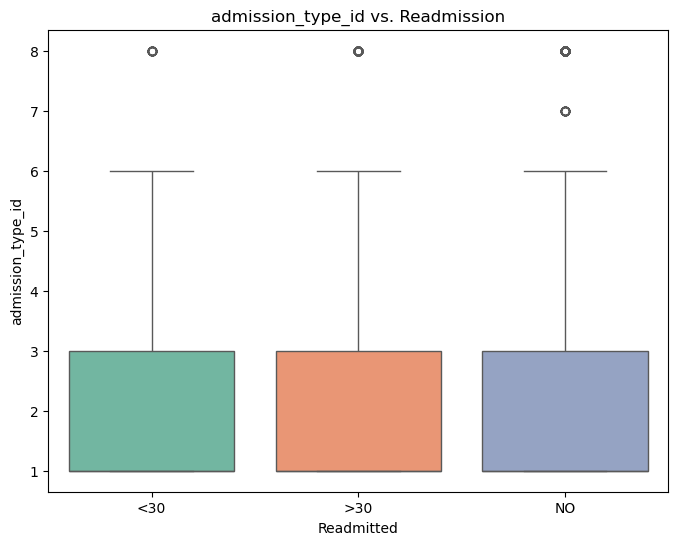

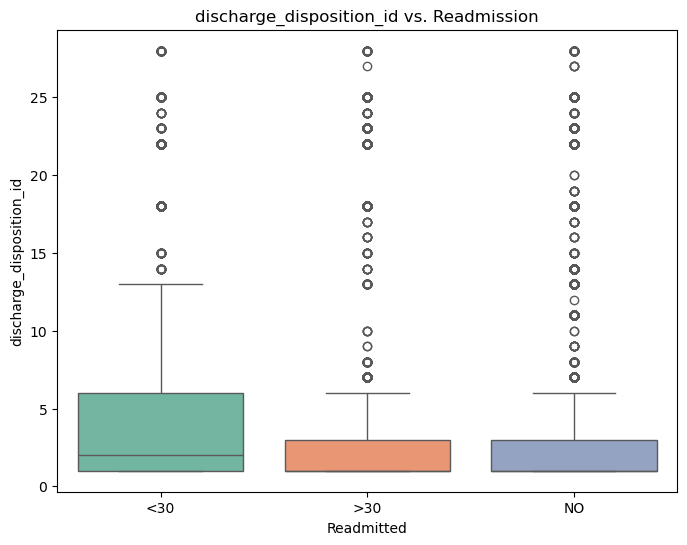

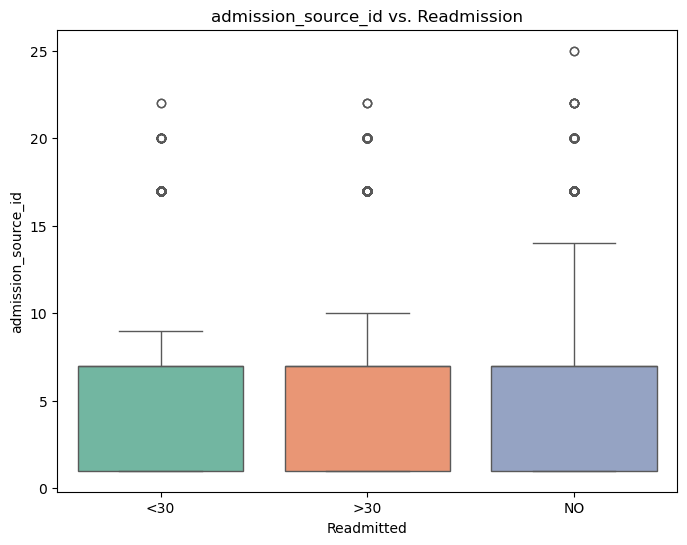

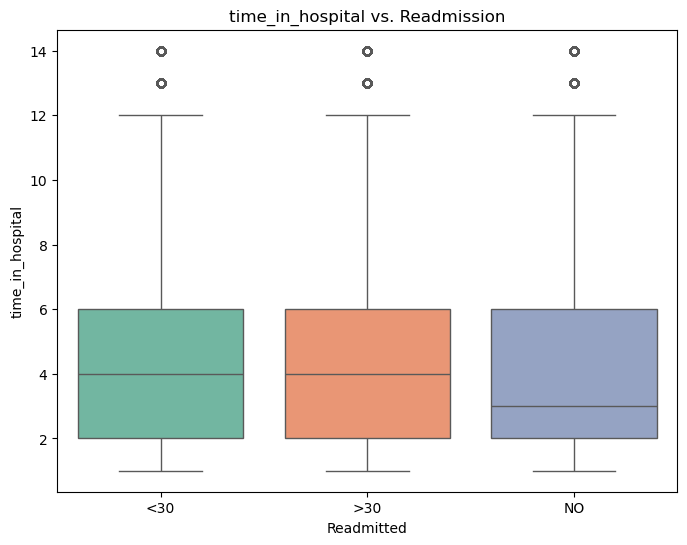

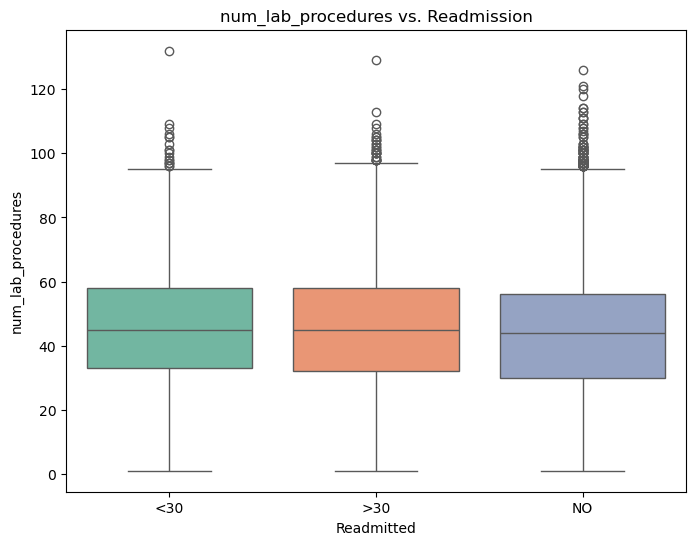

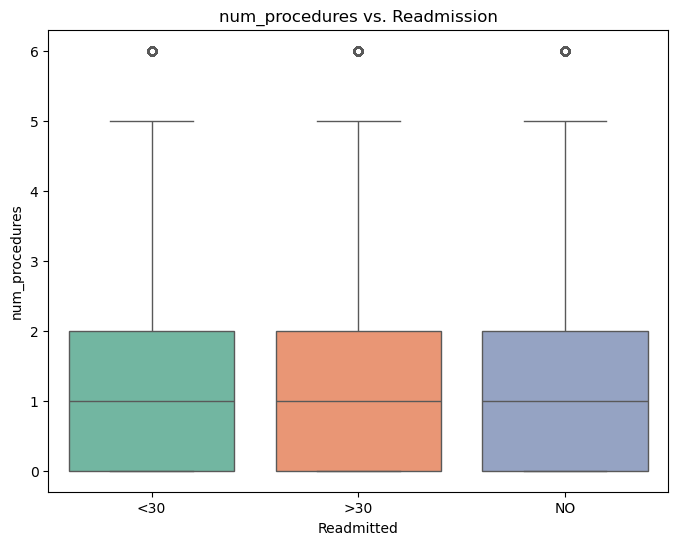

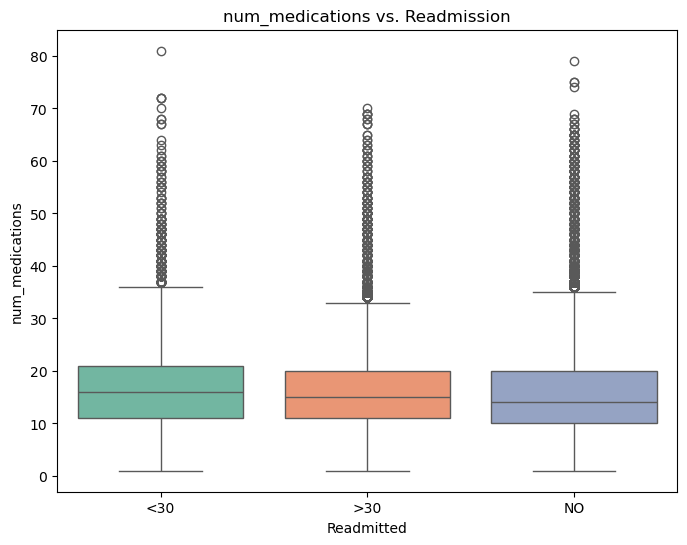

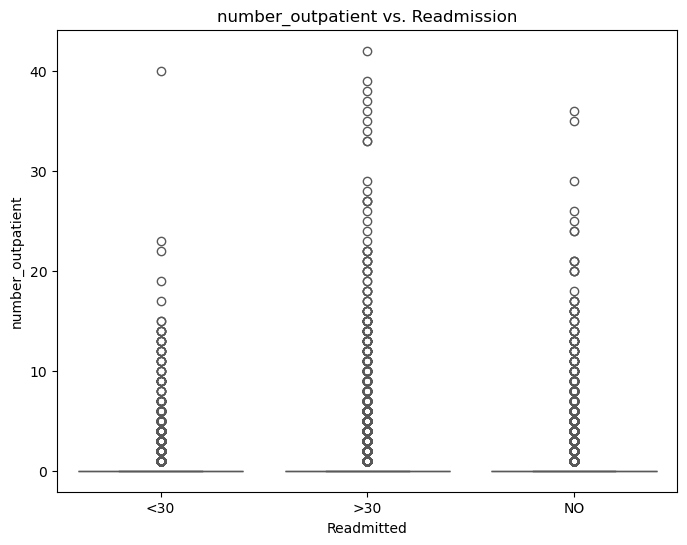

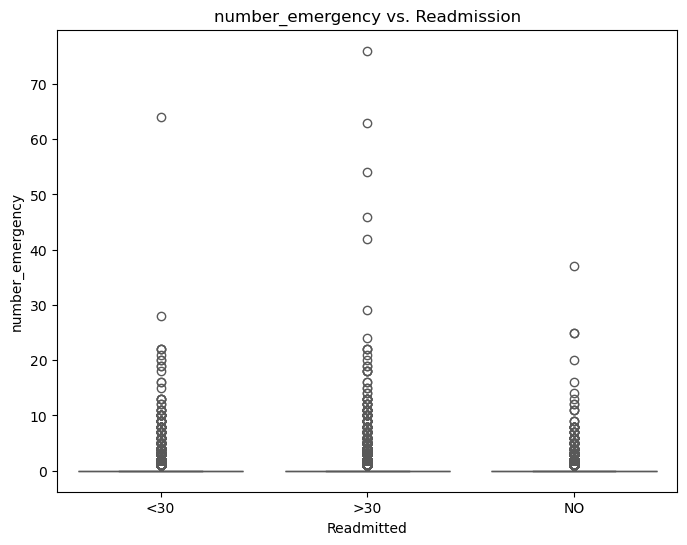

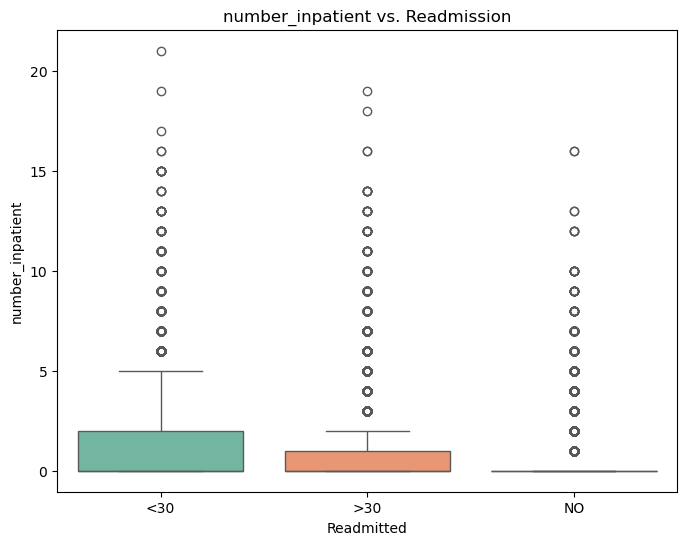

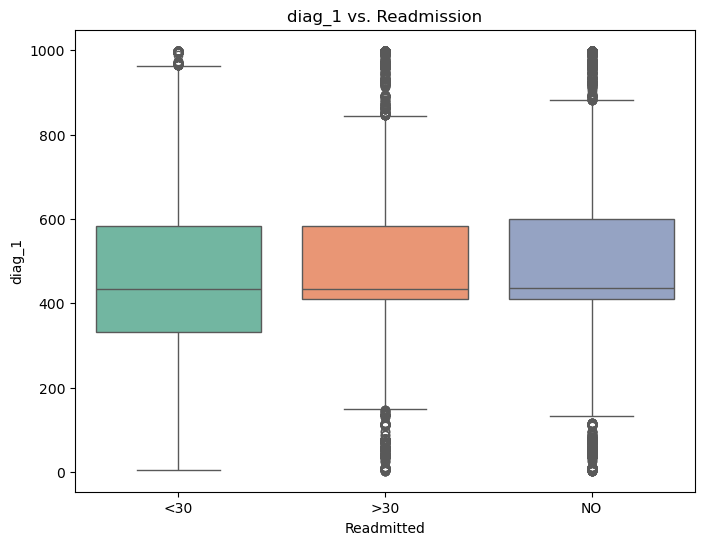

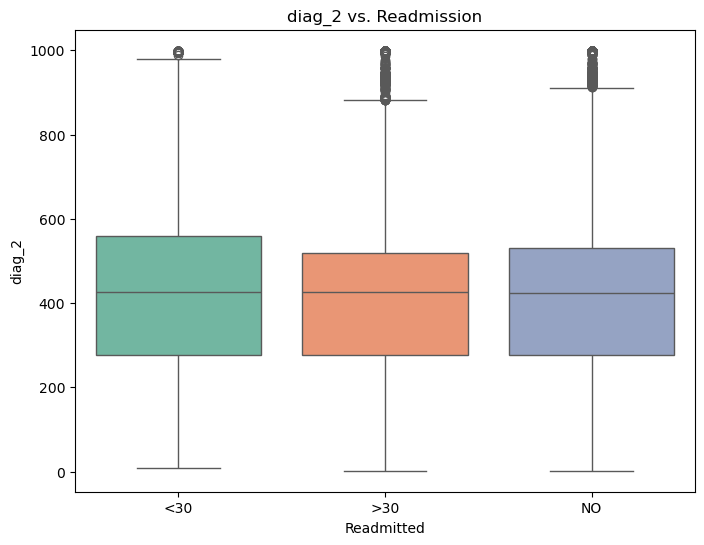

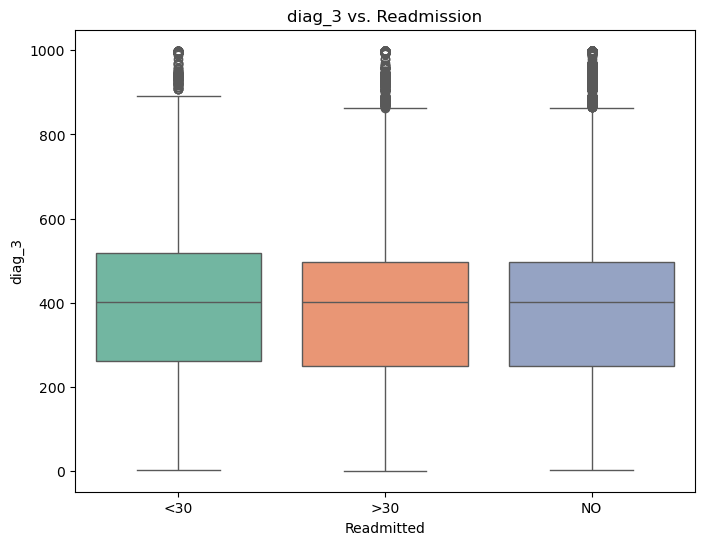

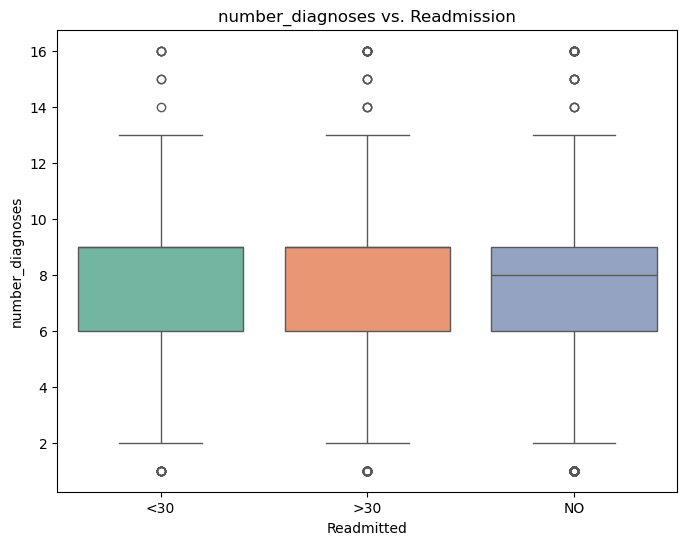

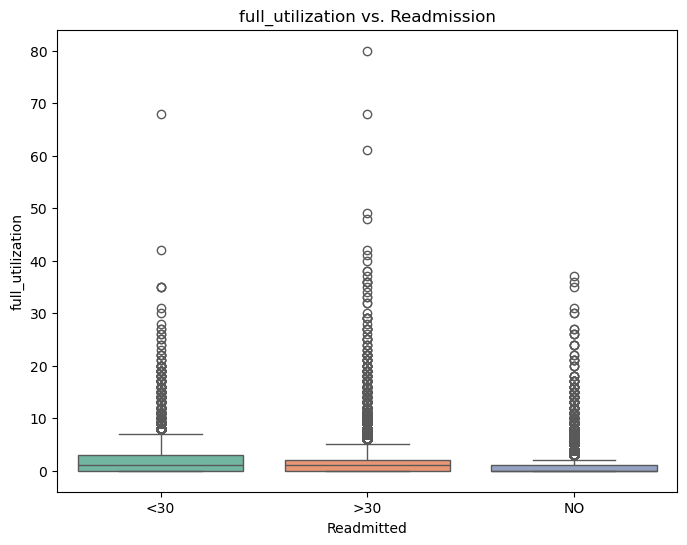

In [110]:
# Bivariate analysis for numerical columns against the target variable "readmitted"
numerical_columns = df_multi.select_dtypes(include='number').columns

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='readmitted', y=col, data=df_multi, palette='Set2', order=['<30', '>30', 'NO'])
    plt.xlabel('Readmitted')
    plt.ylabel(col)
    plt.title(f'{col} vs. Readmission')
    plt.show()

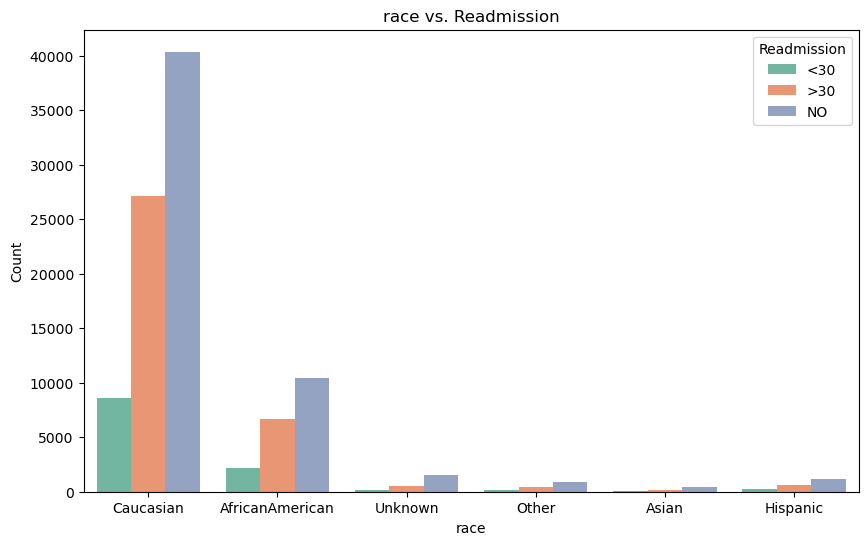

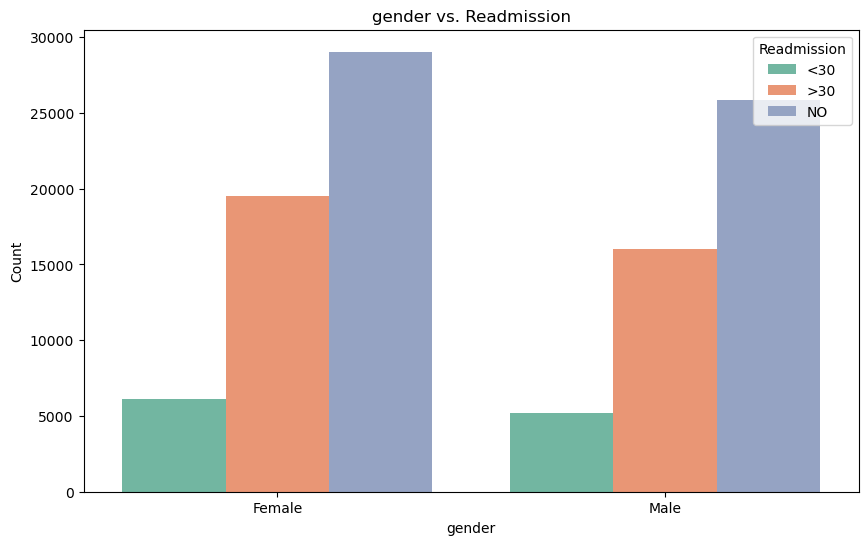

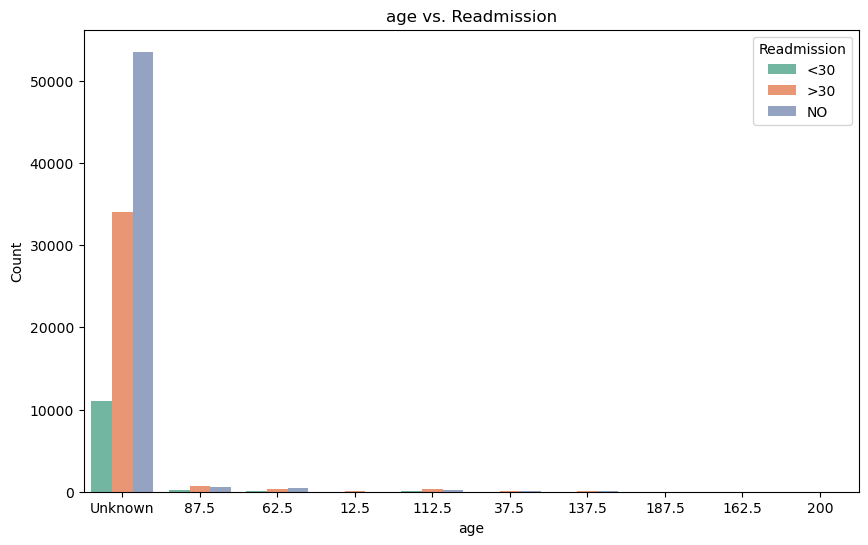

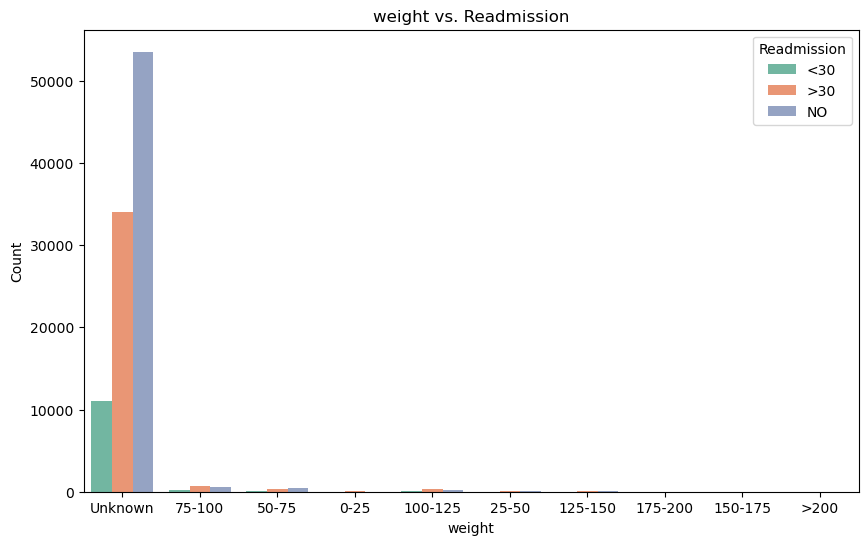

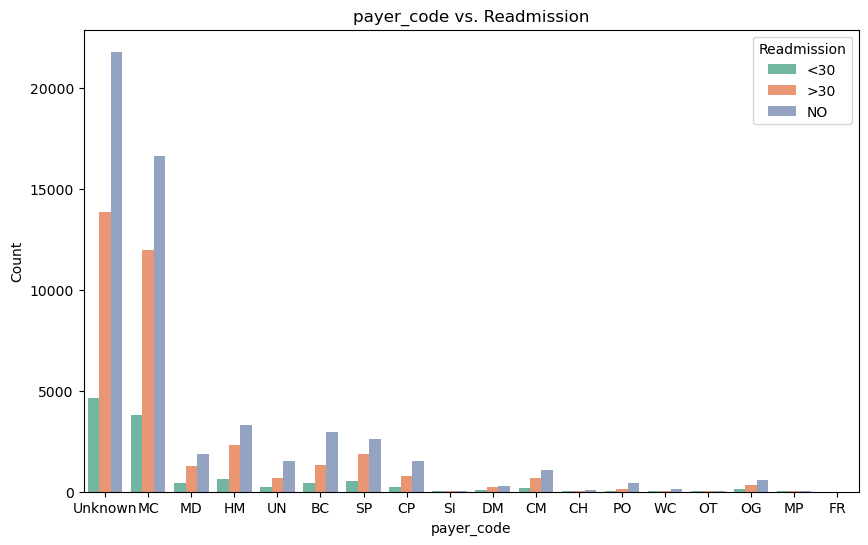

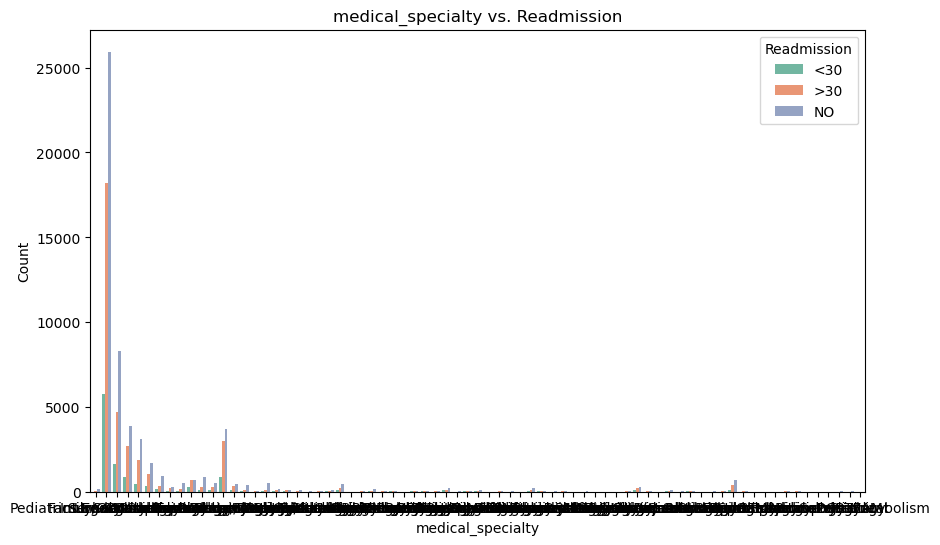

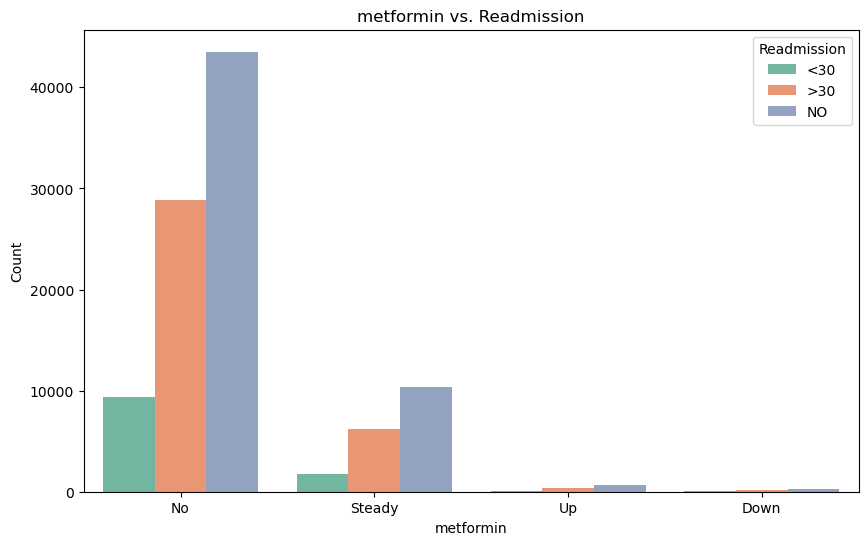

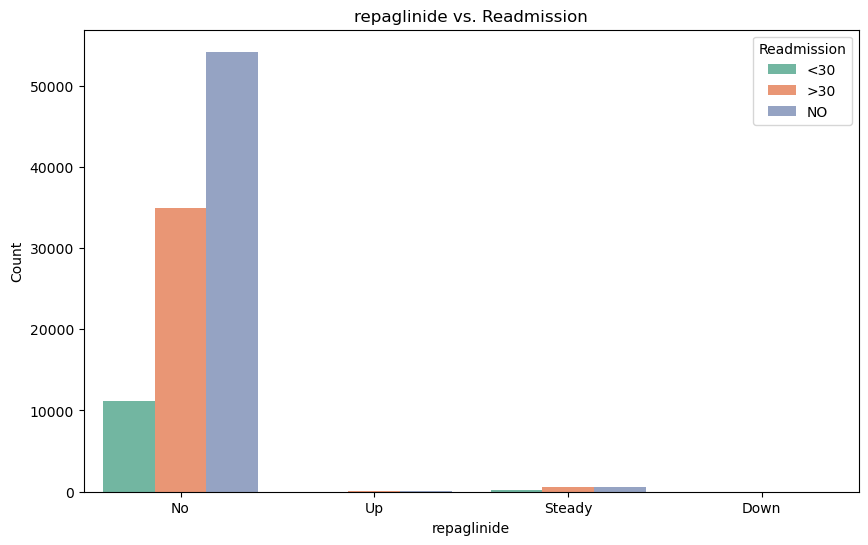

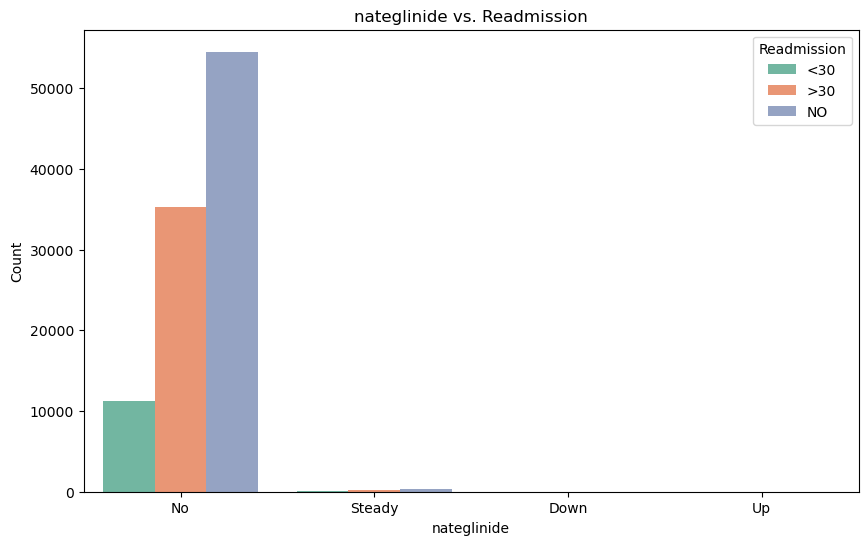

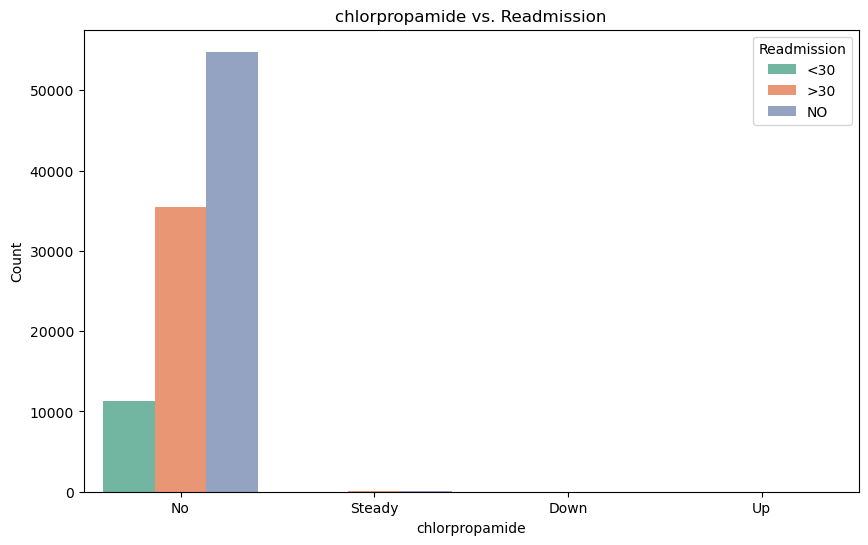

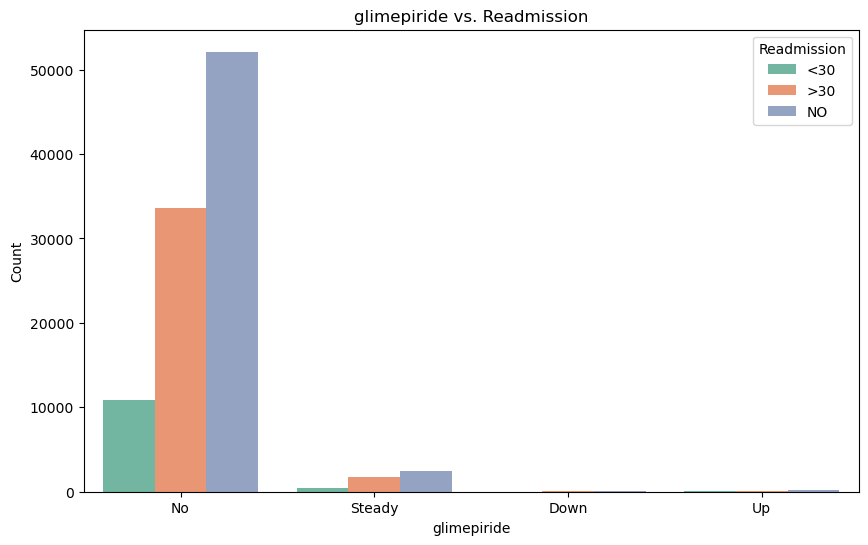

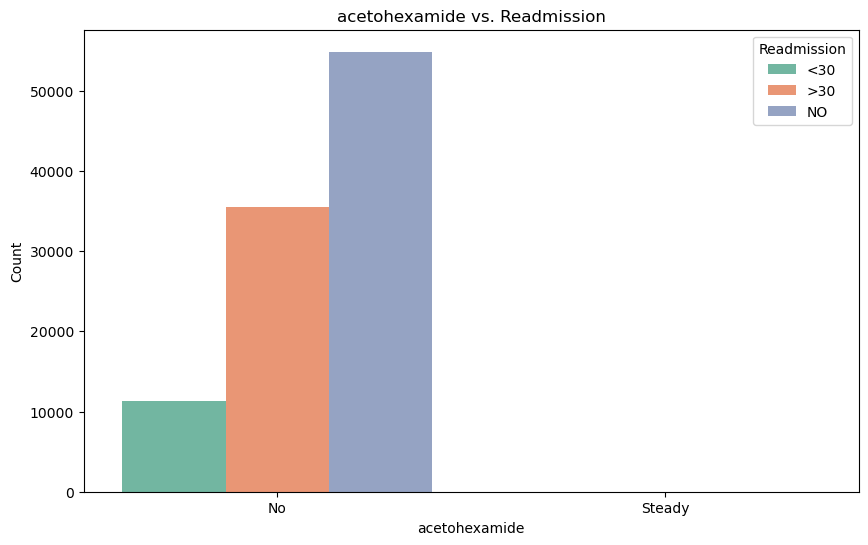

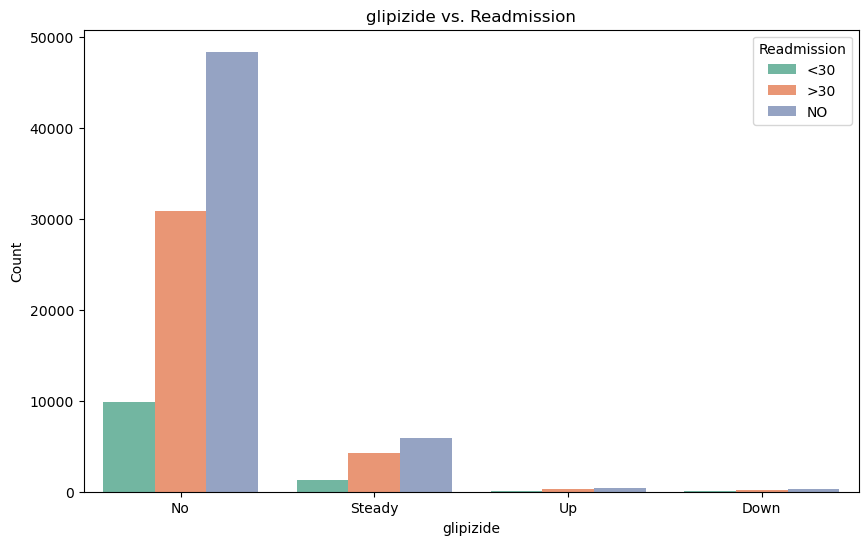

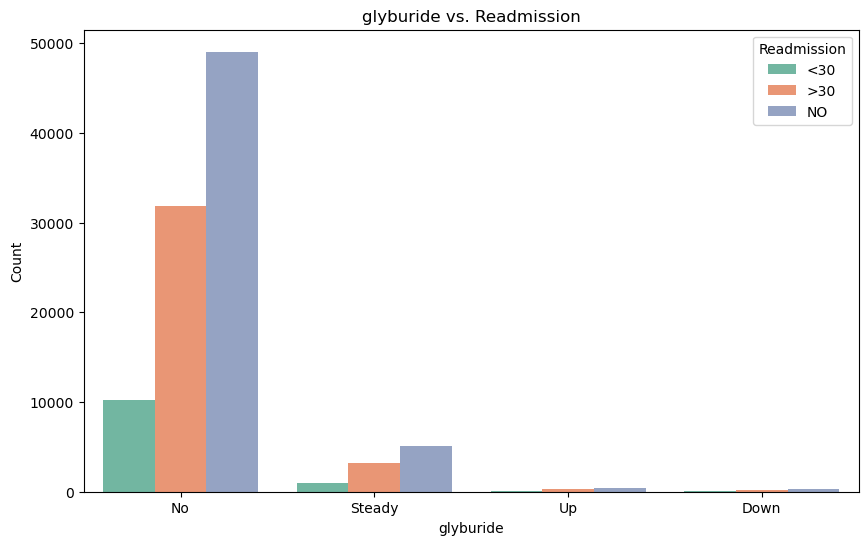

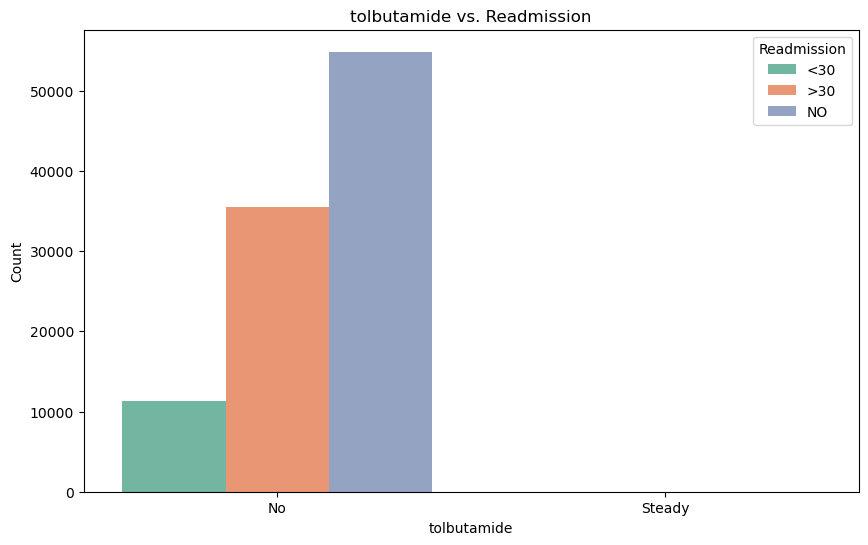

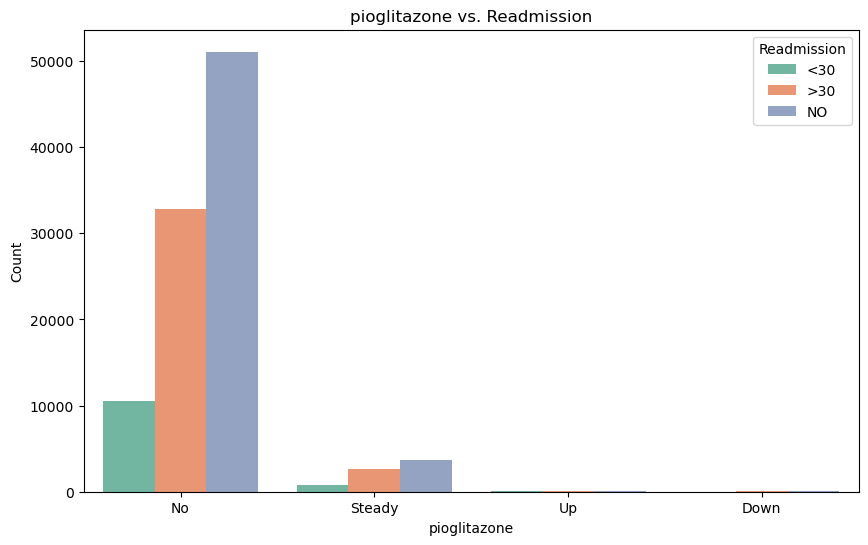

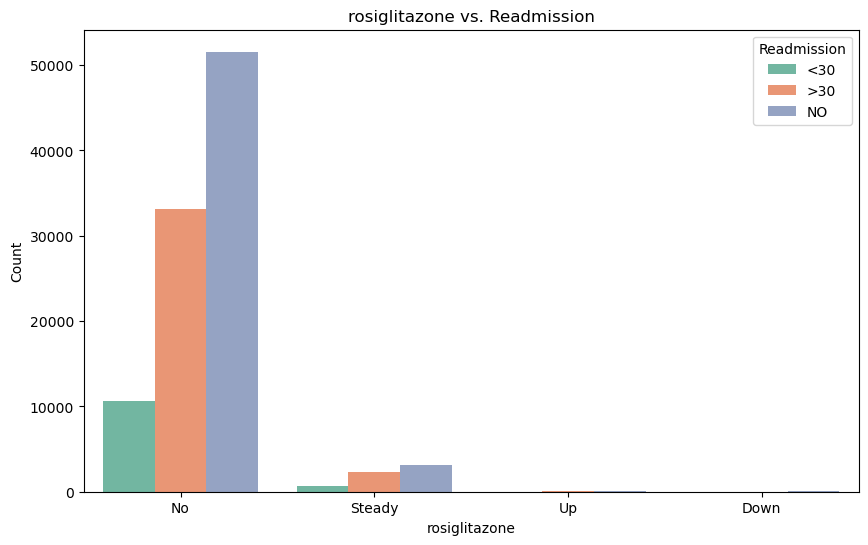

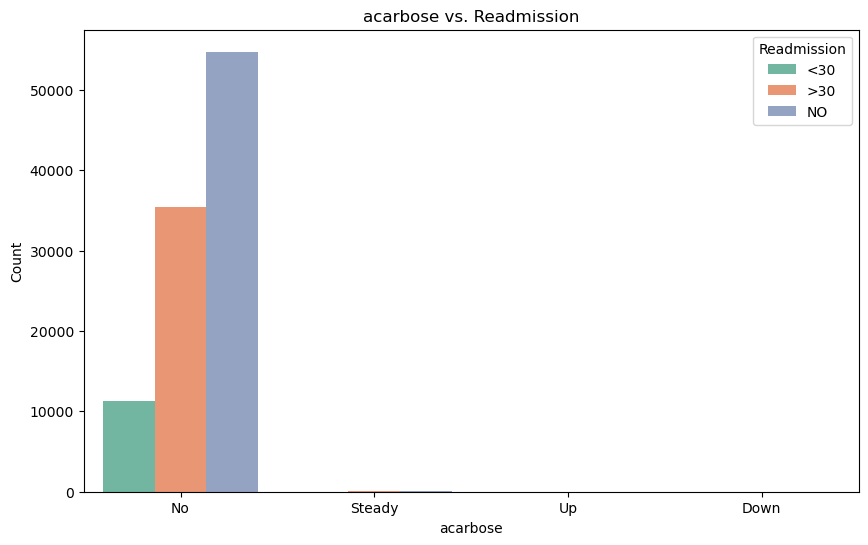

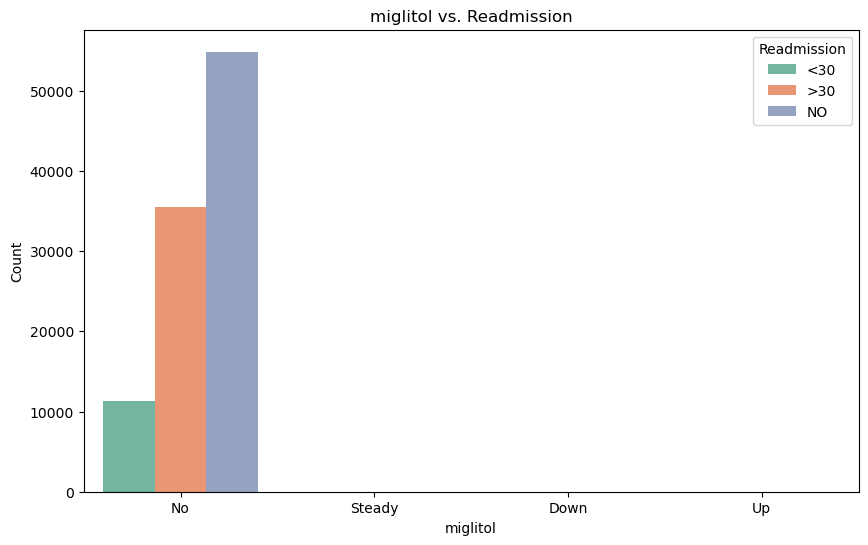

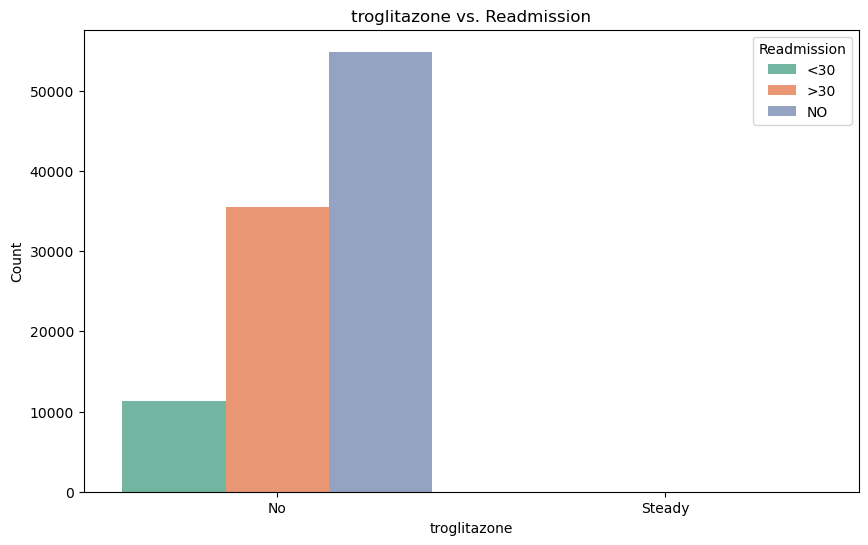

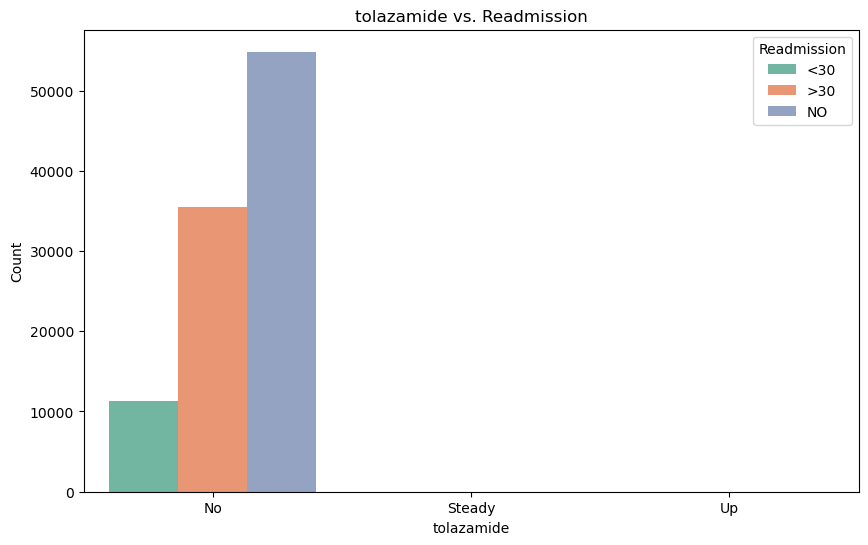

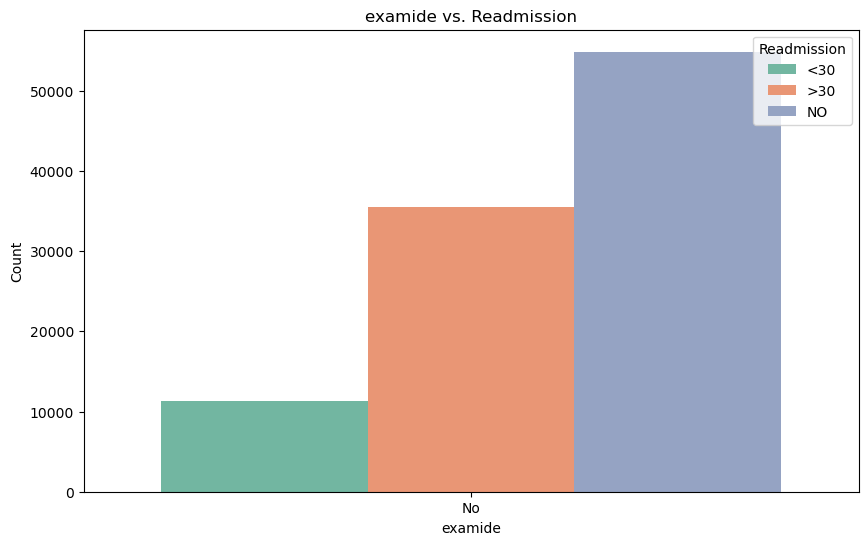

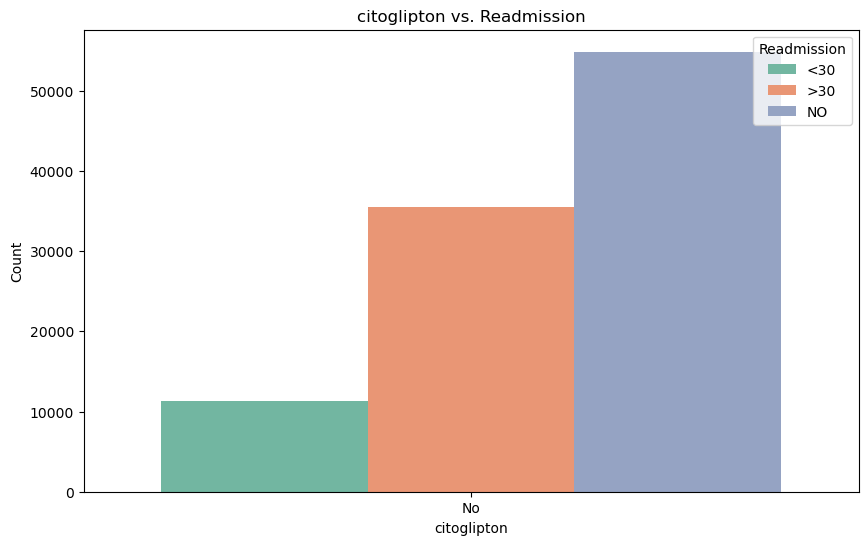

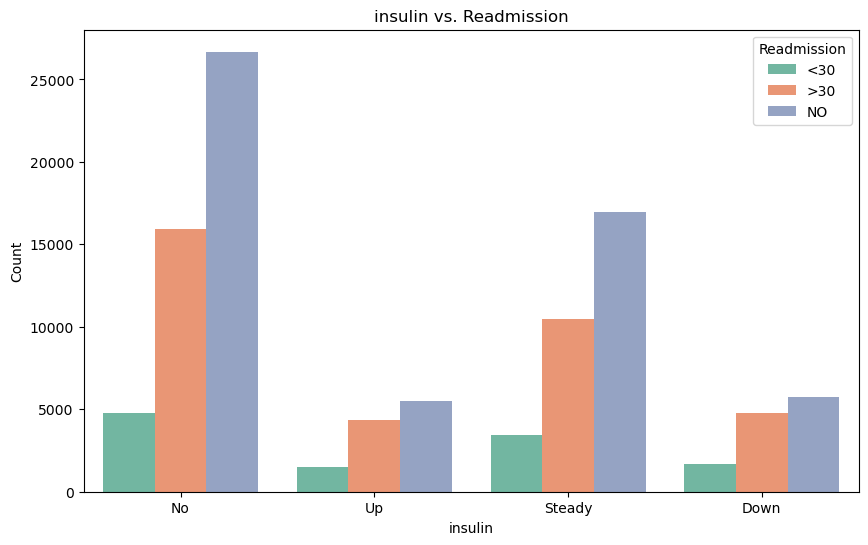

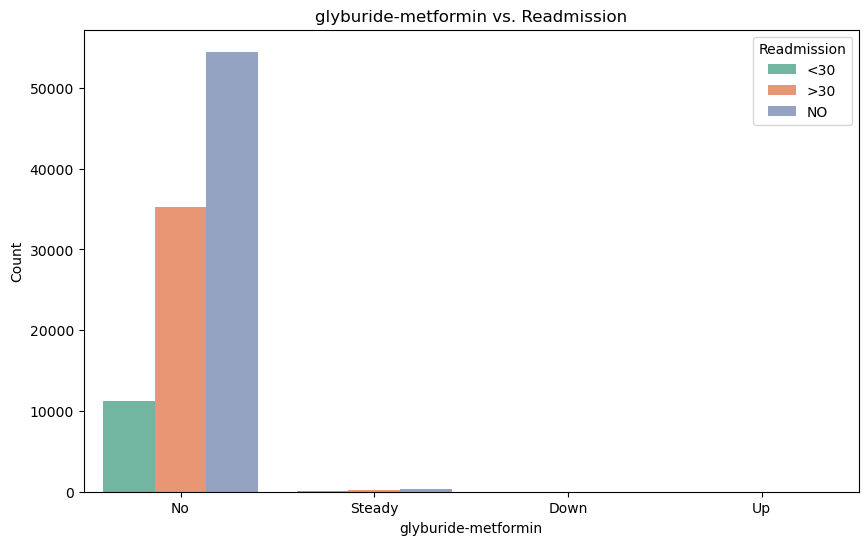

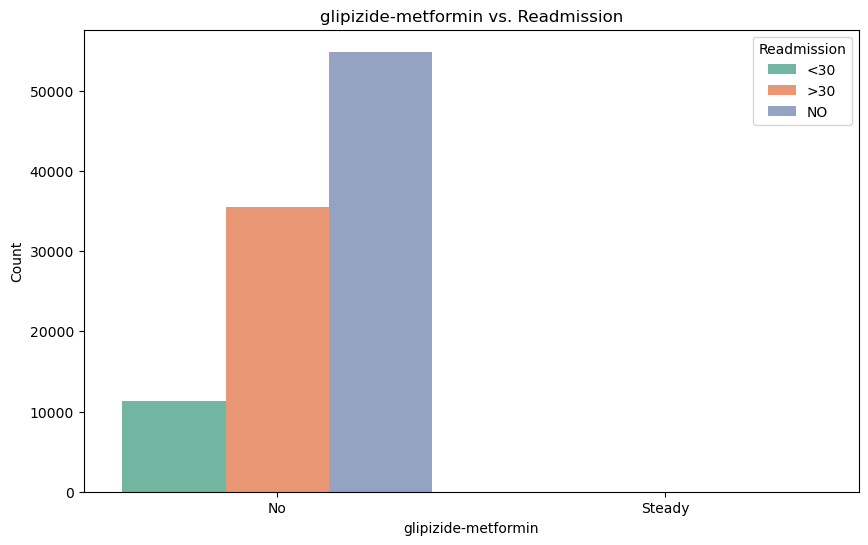

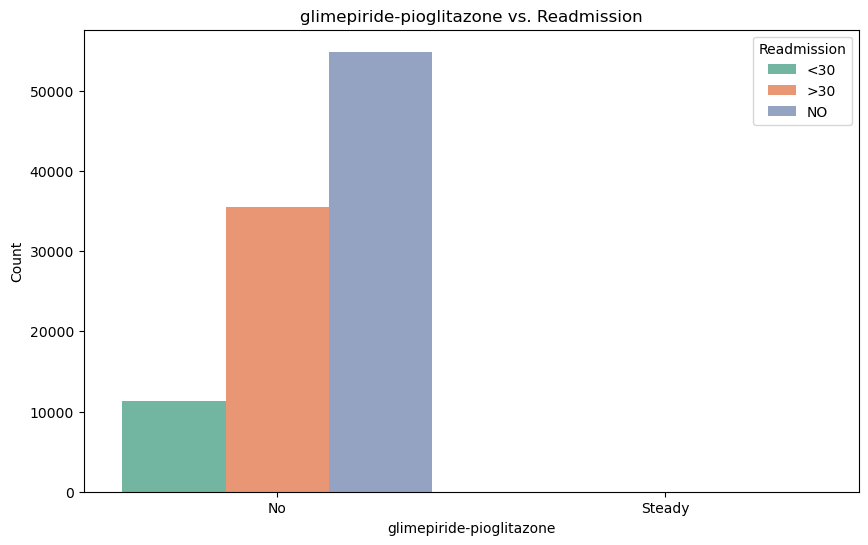

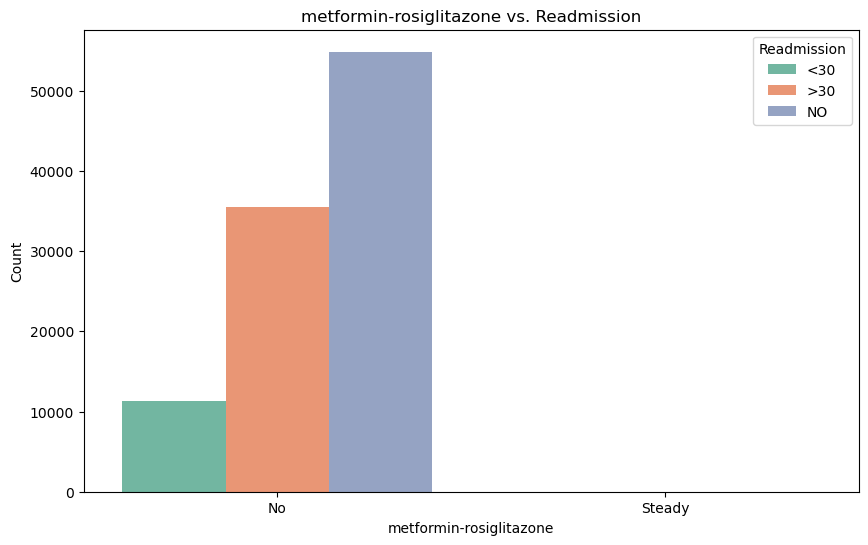

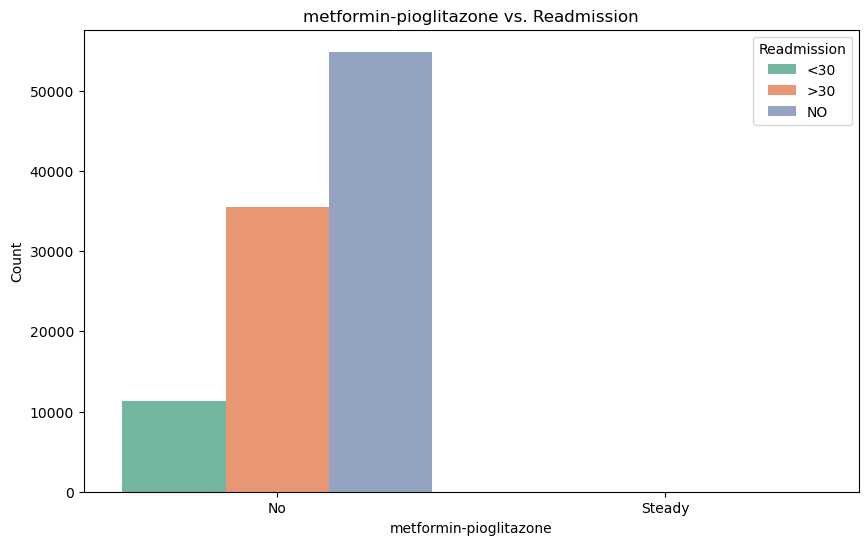

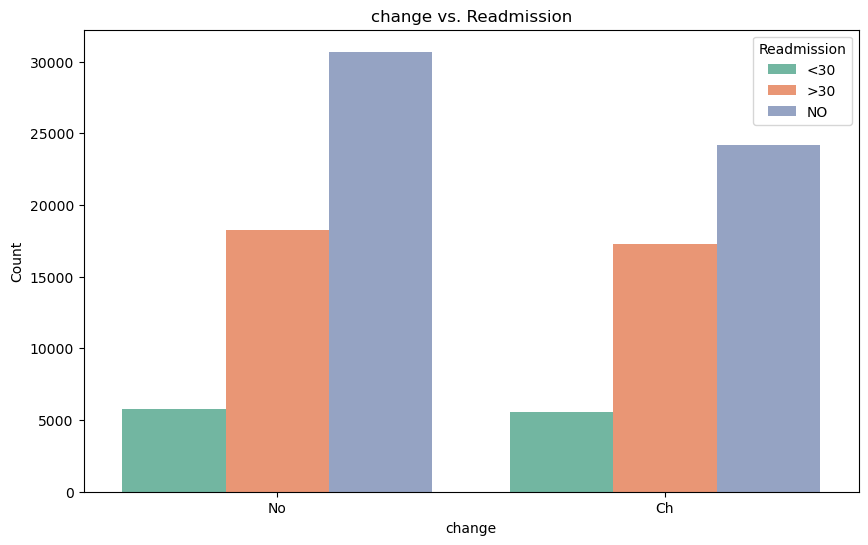

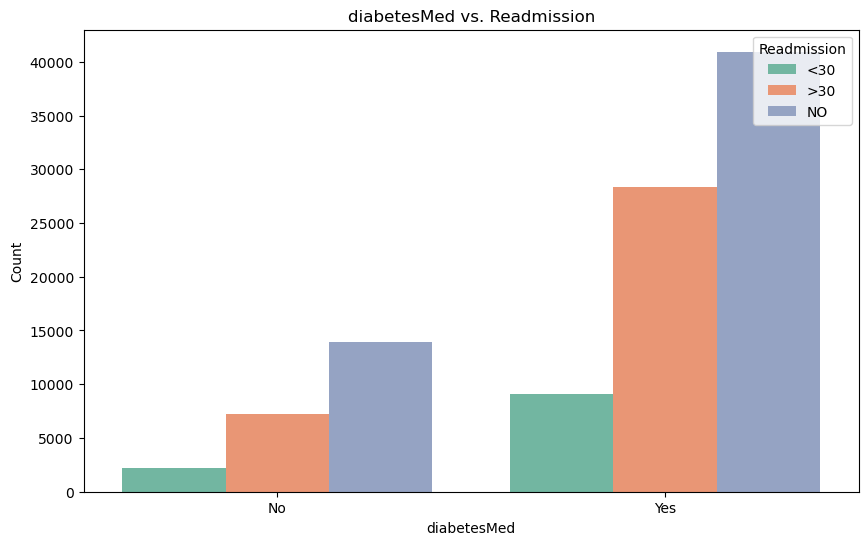

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


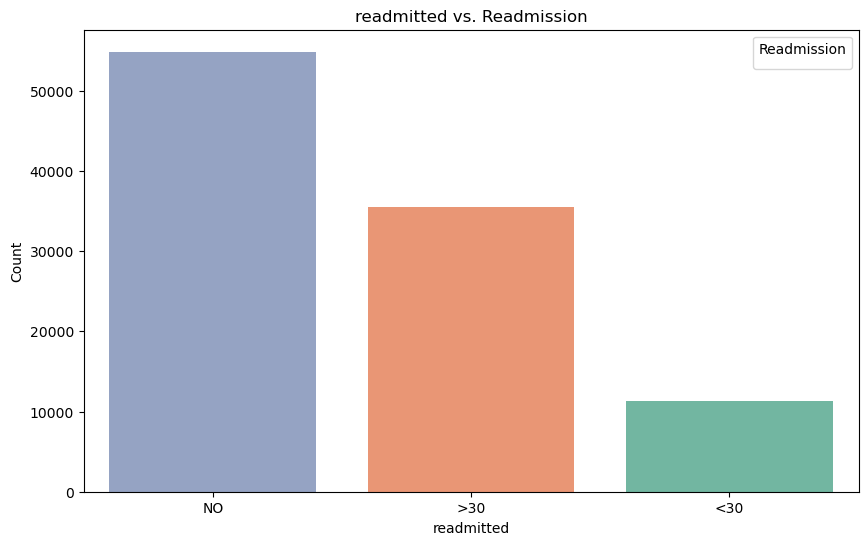

In [111]:
# Bivariate analysis for categorical columns
categorical_columns = df_multi.select_dtypes(include='object').columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='readmitted', data=df_multi, palette='Set2', hue_order=['<30', '>30', 'NO'])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column} vs. Readmission')
    plt.legend(title='Readmission', loc='upper right')
    plt.show()

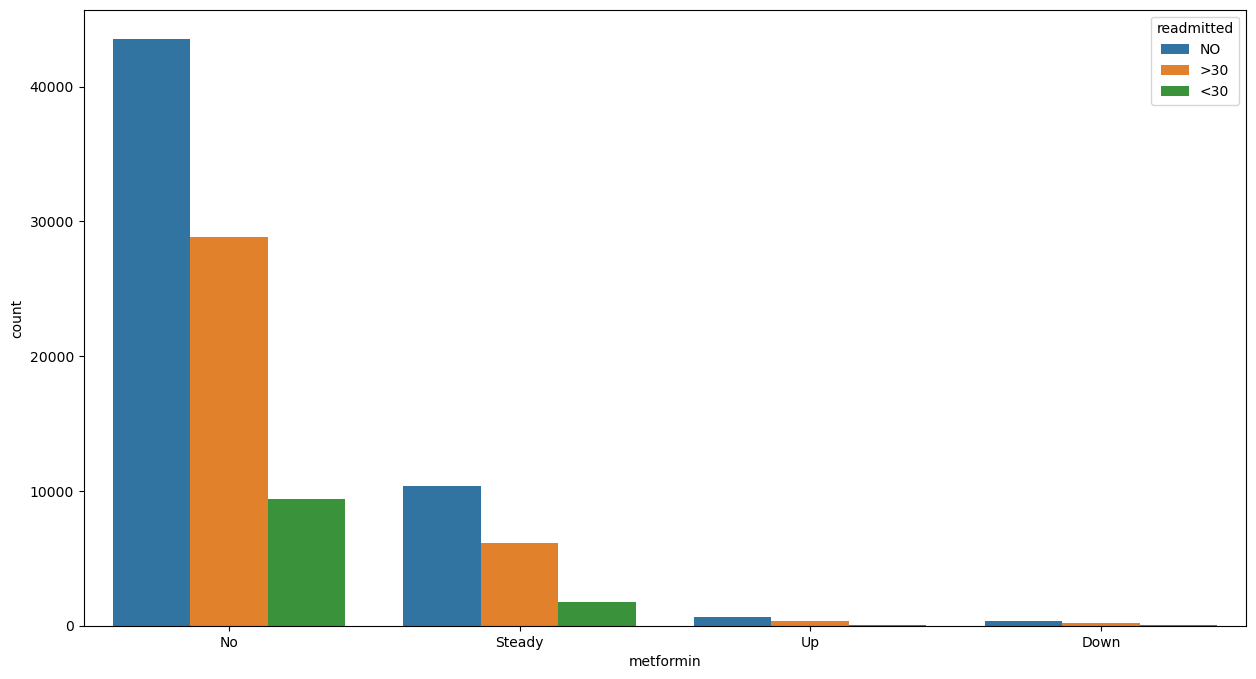

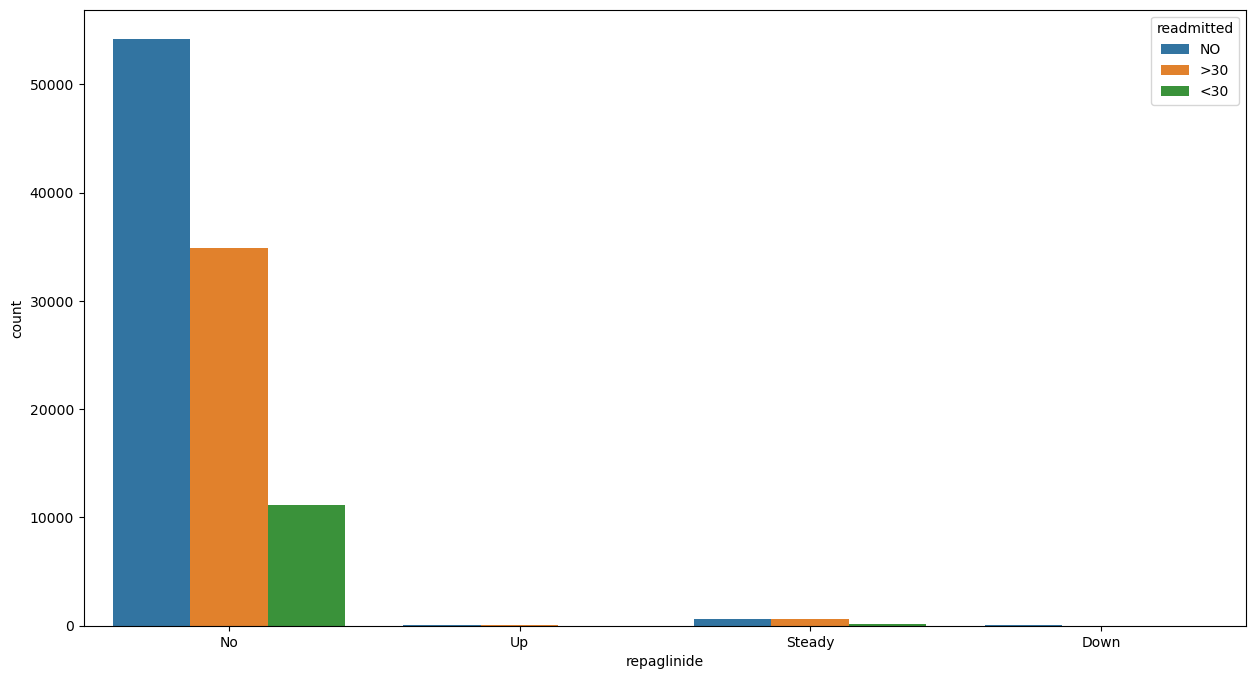

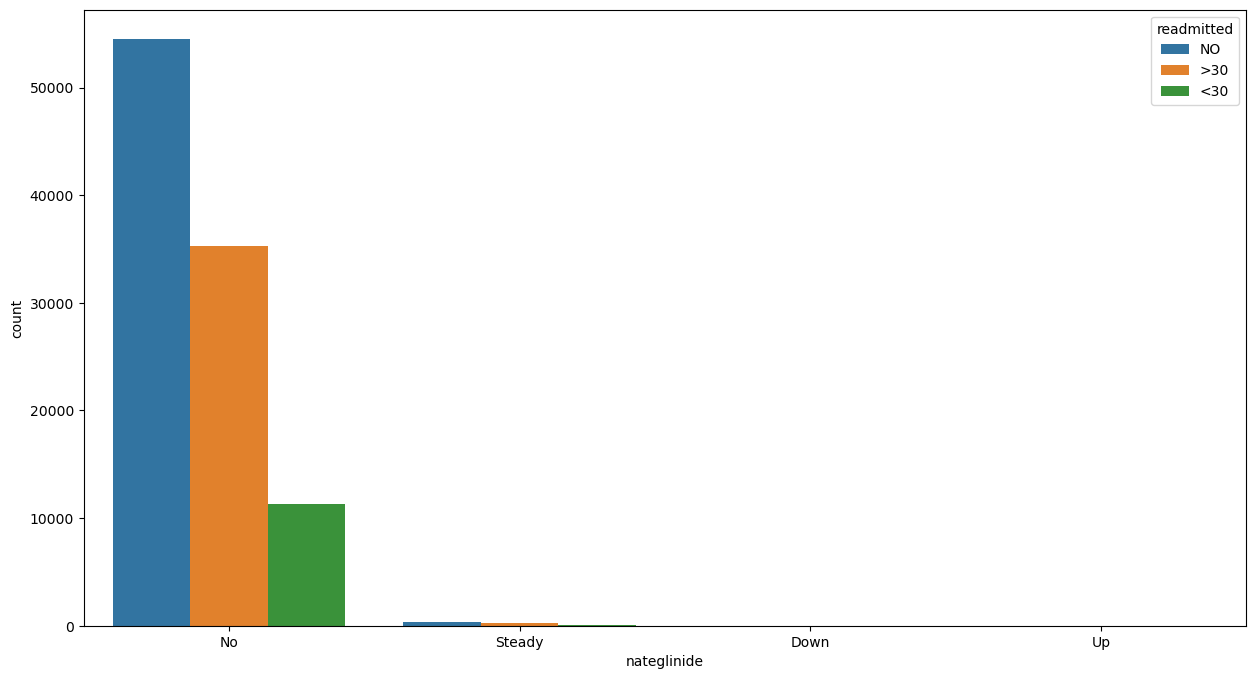

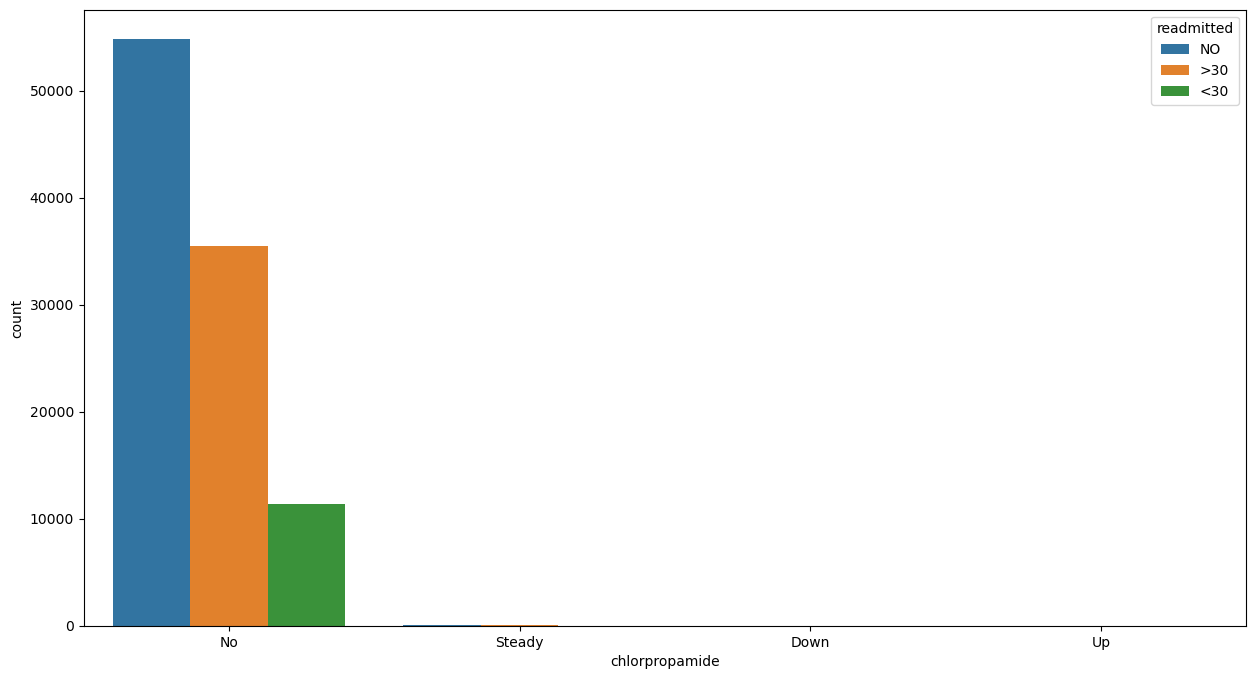

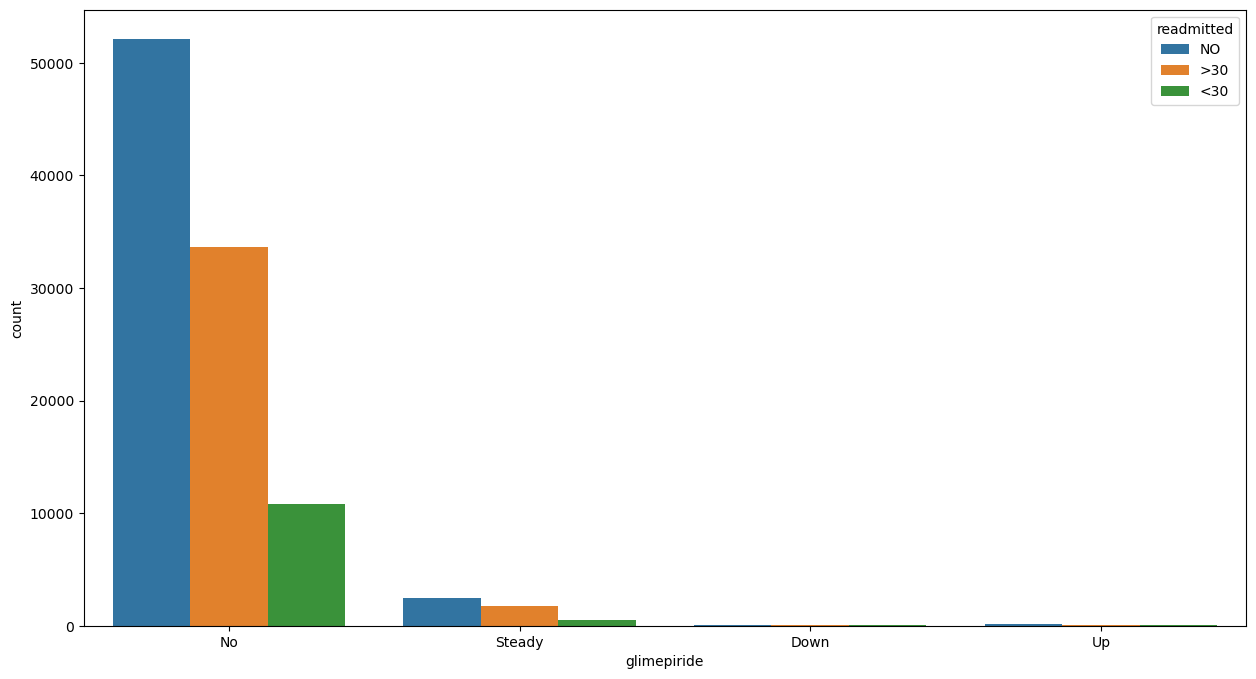

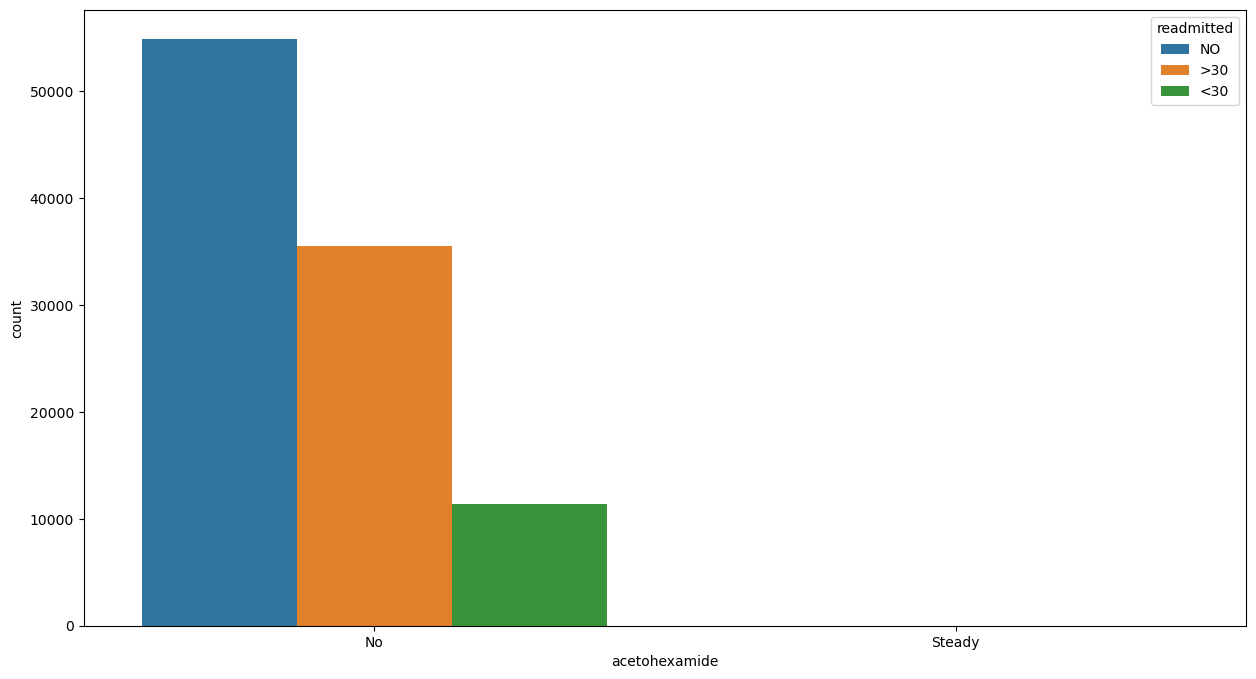

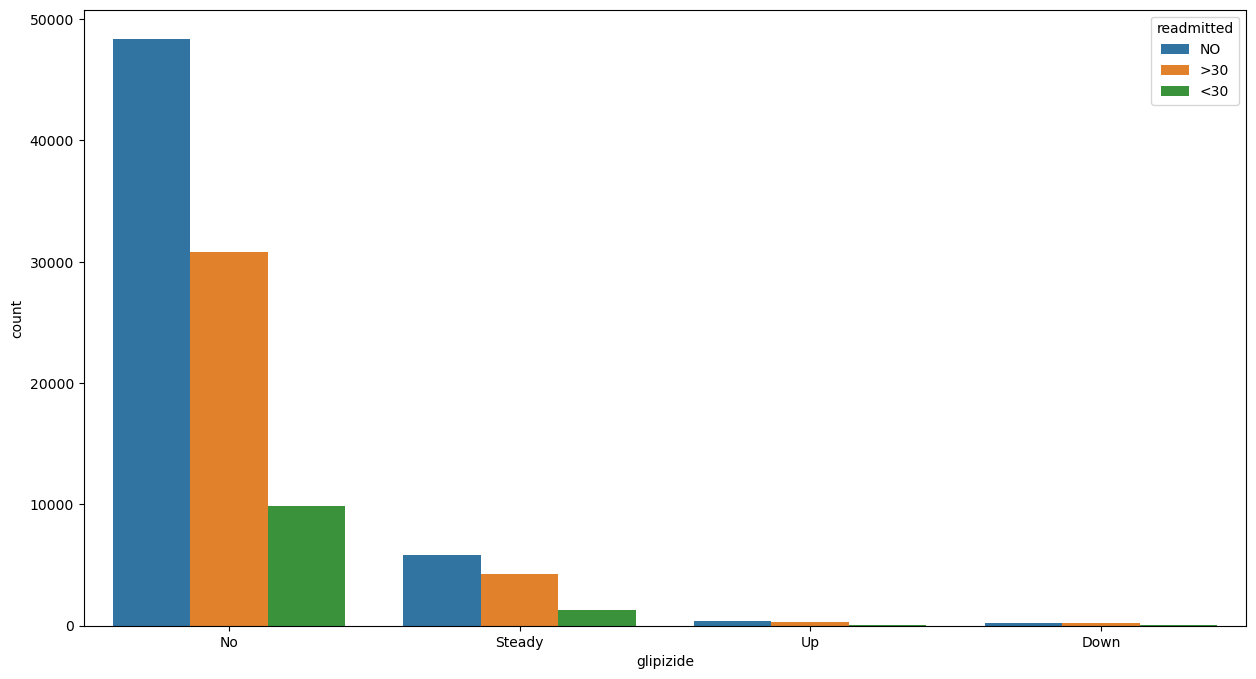

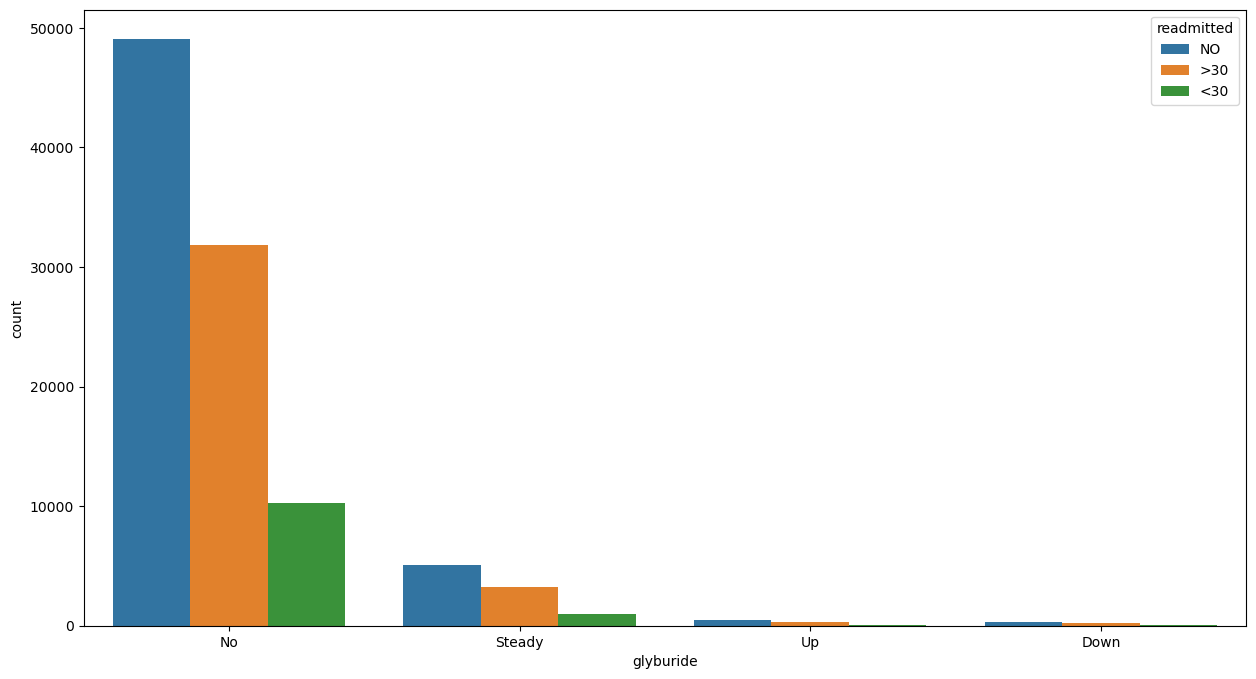

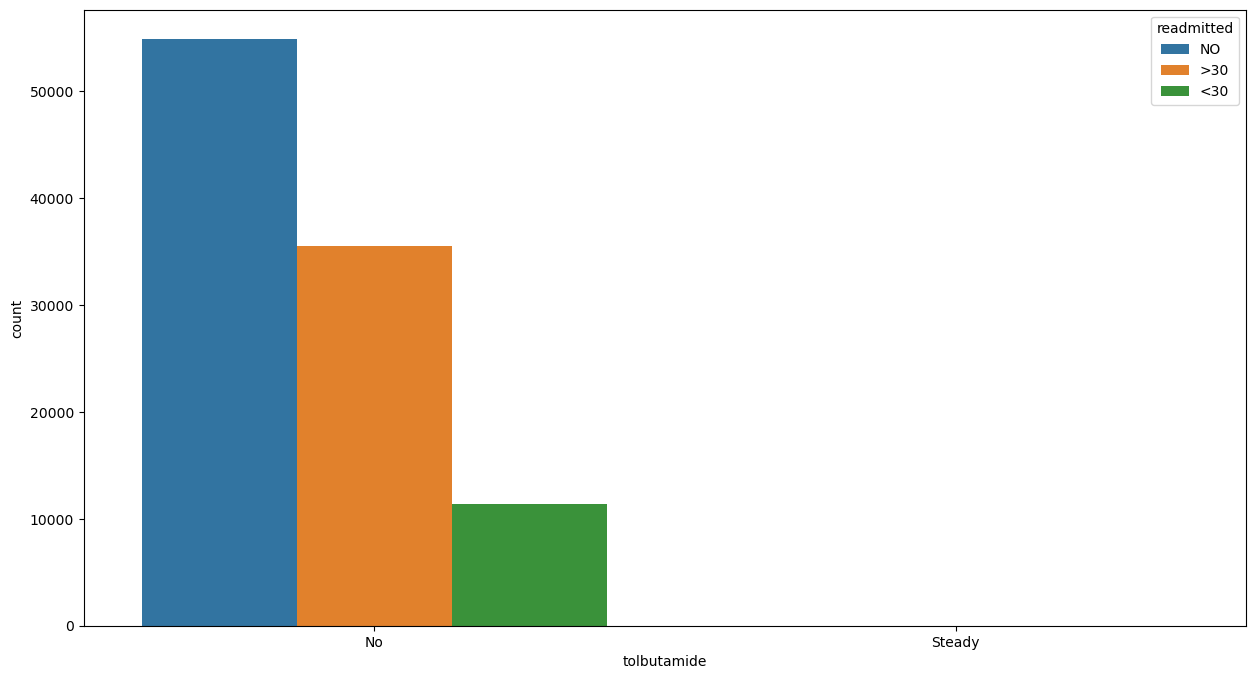

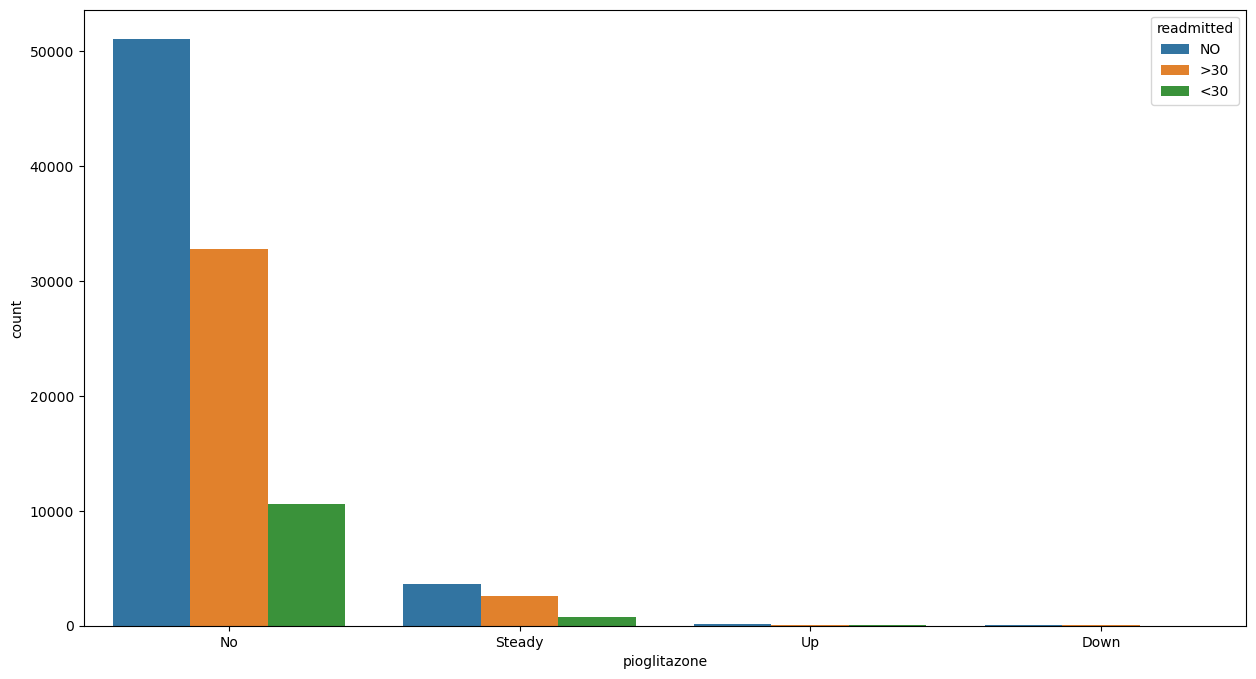

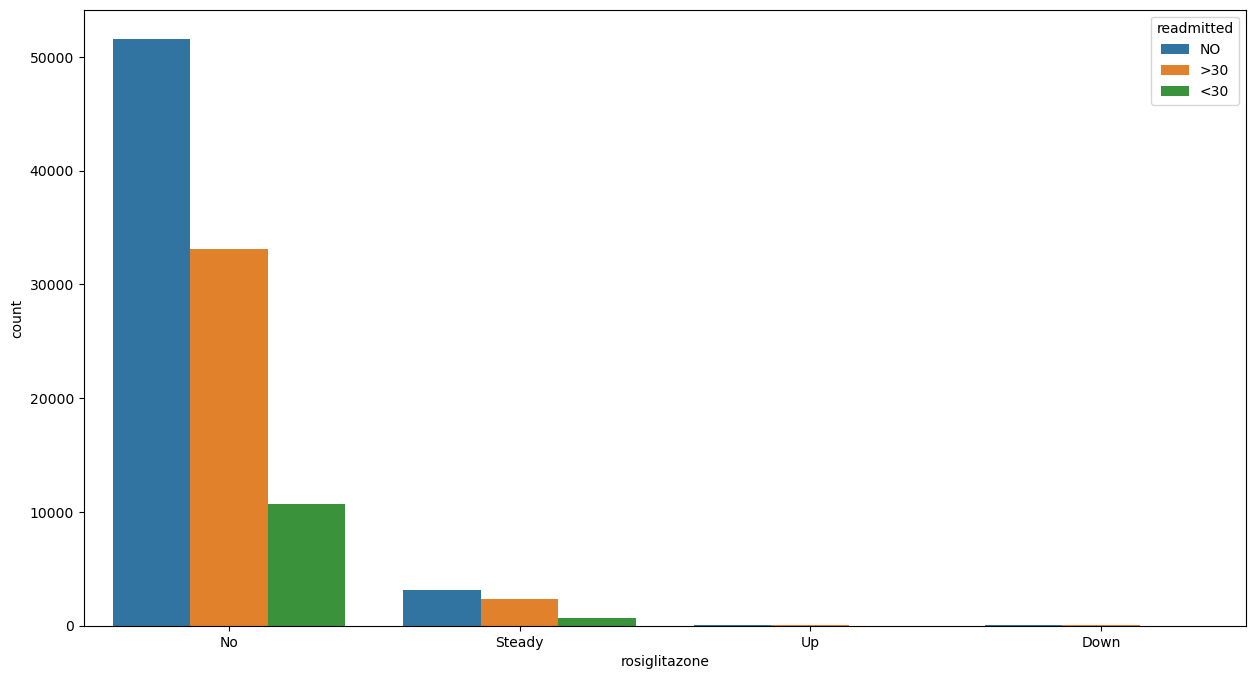

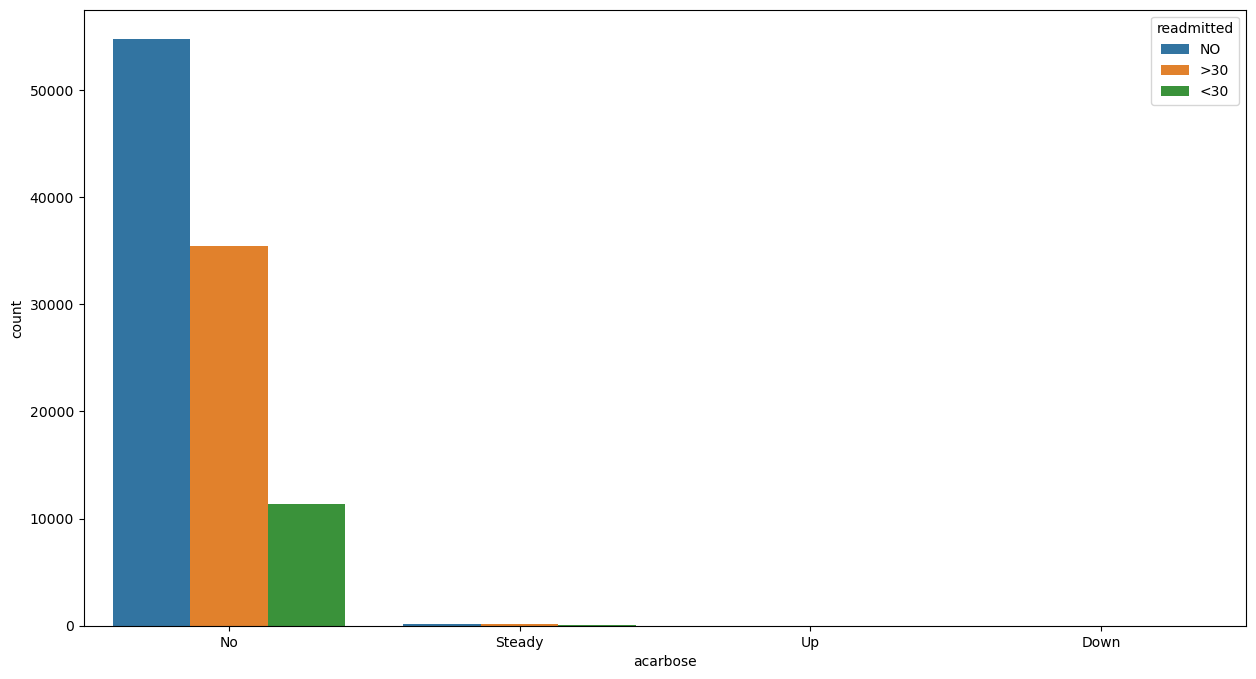

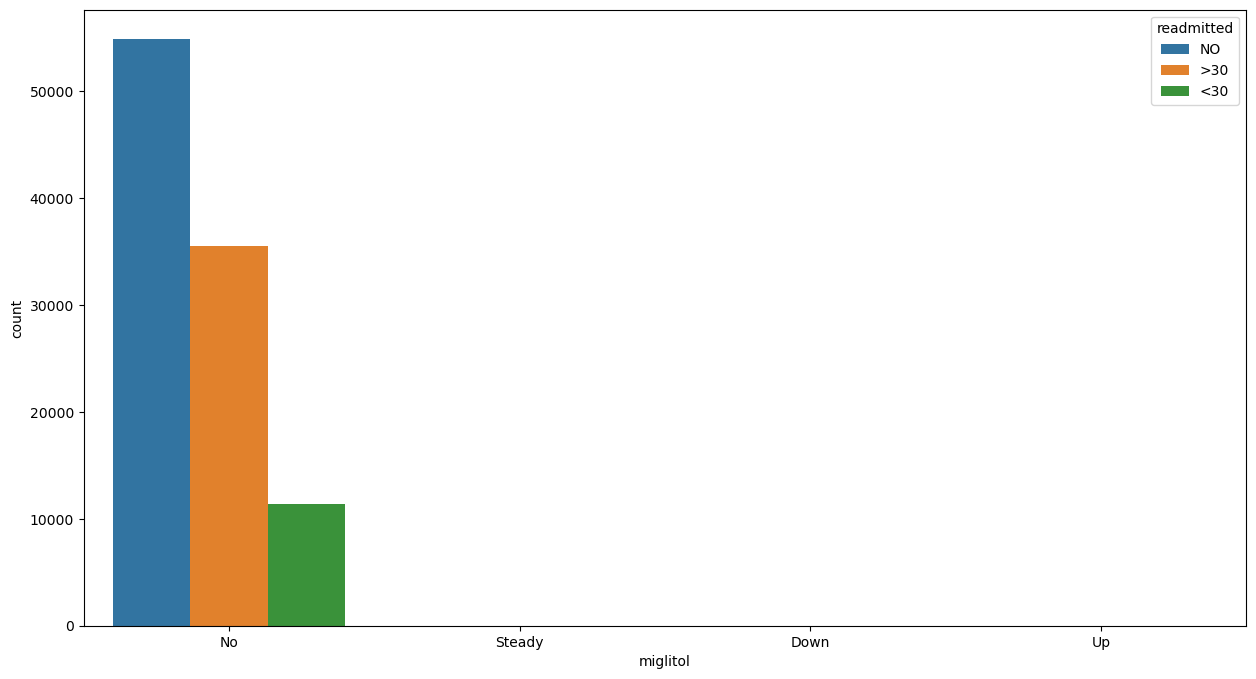

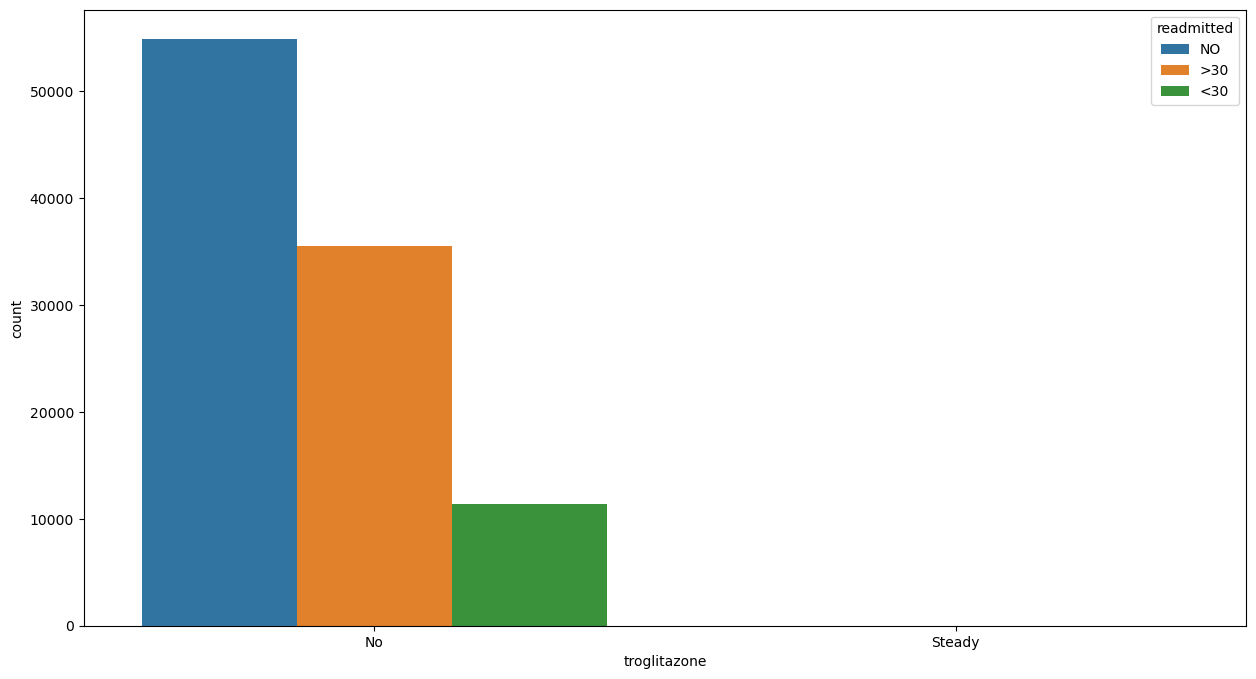

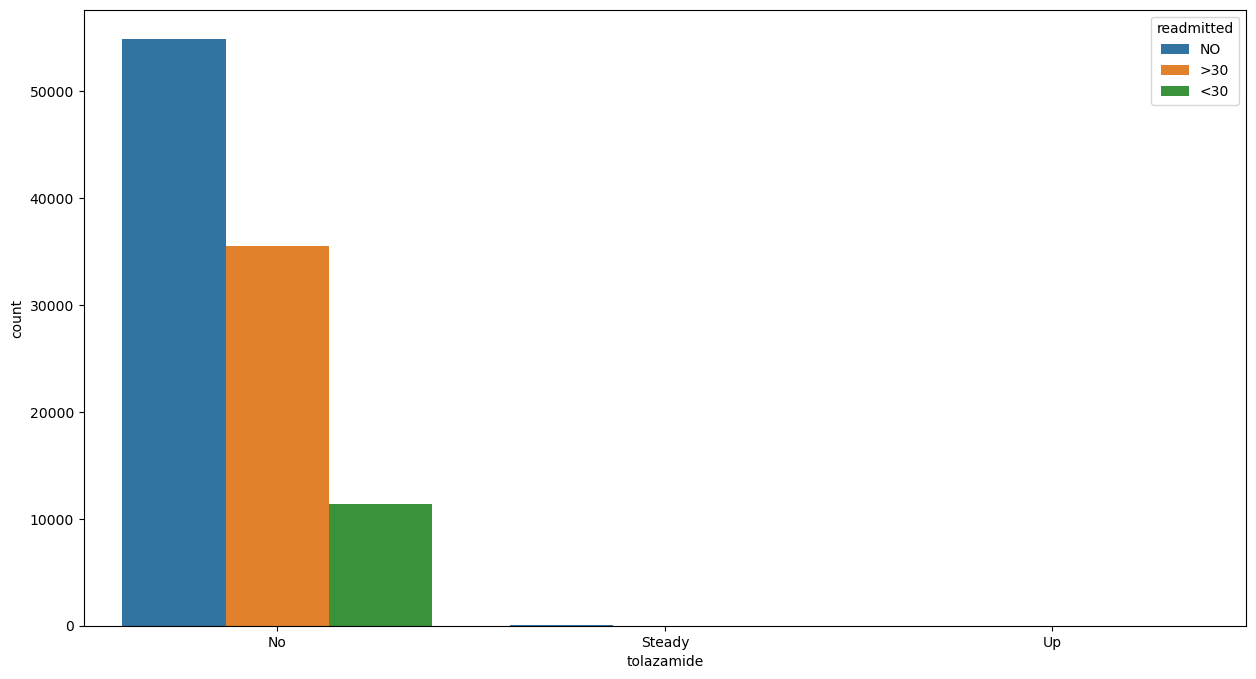

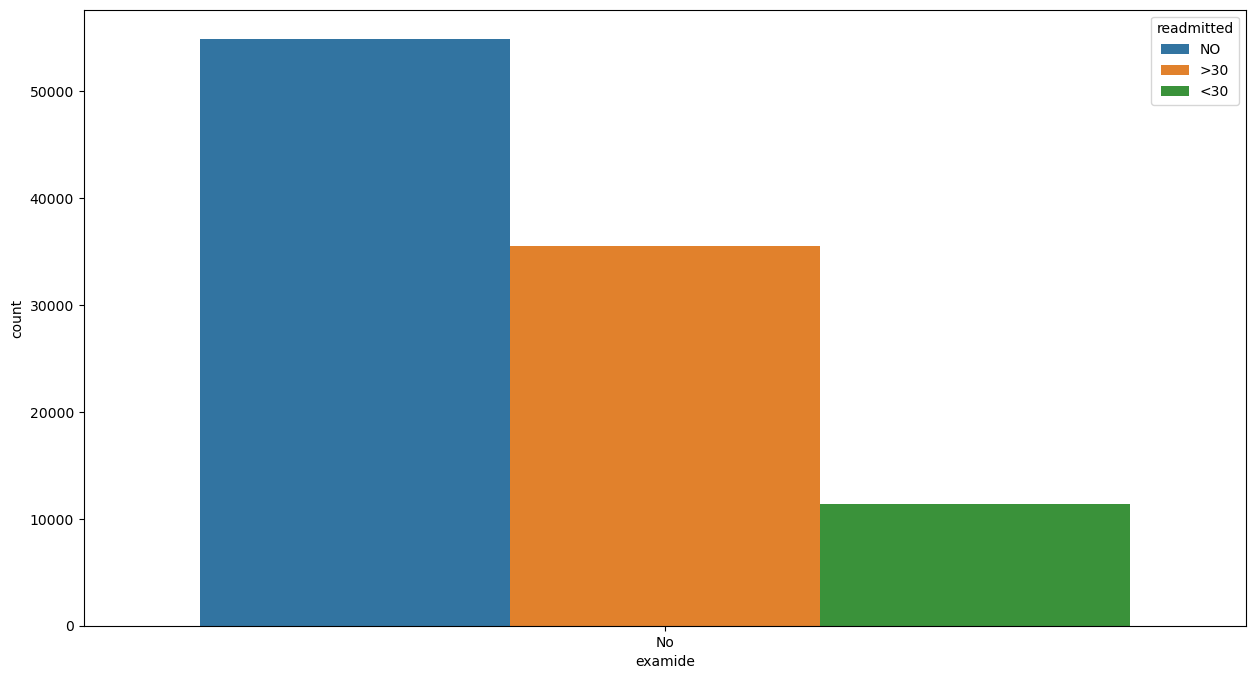

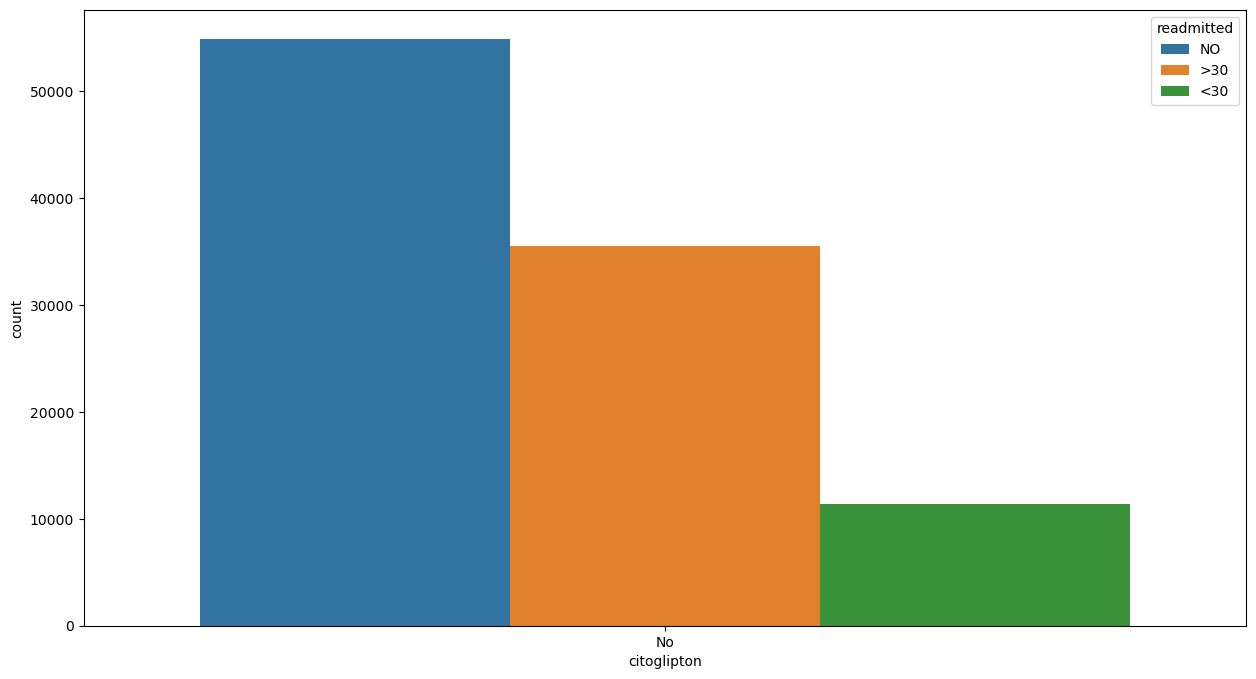

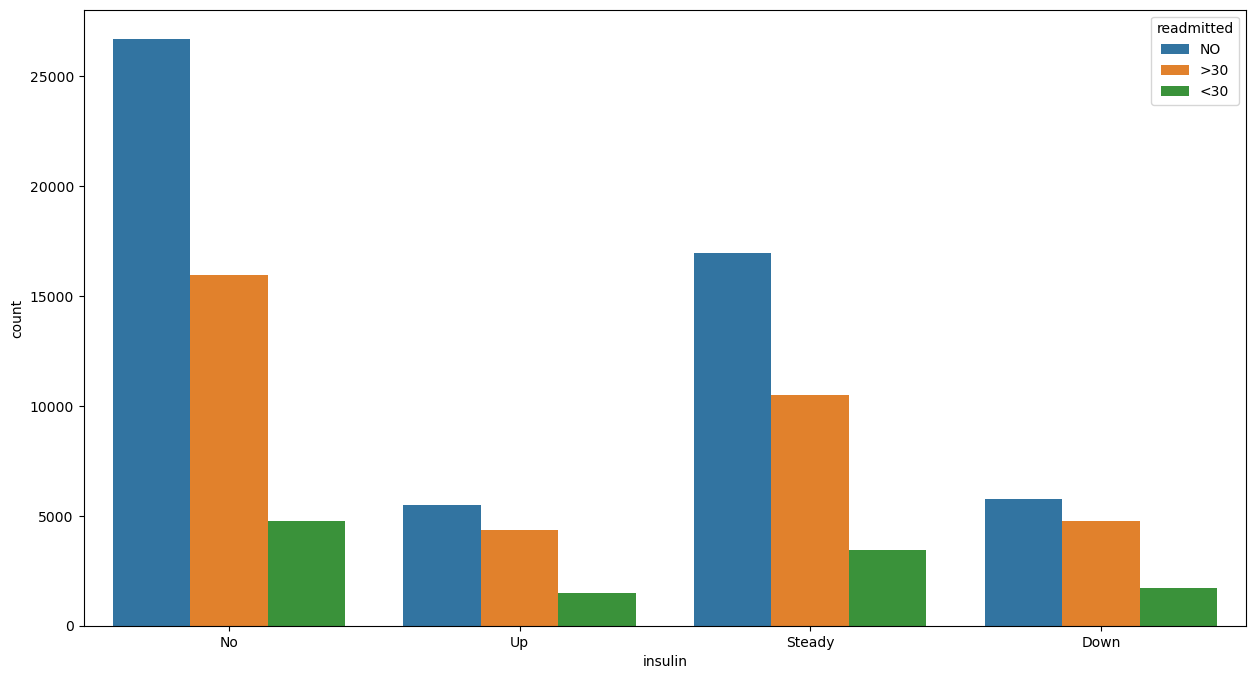

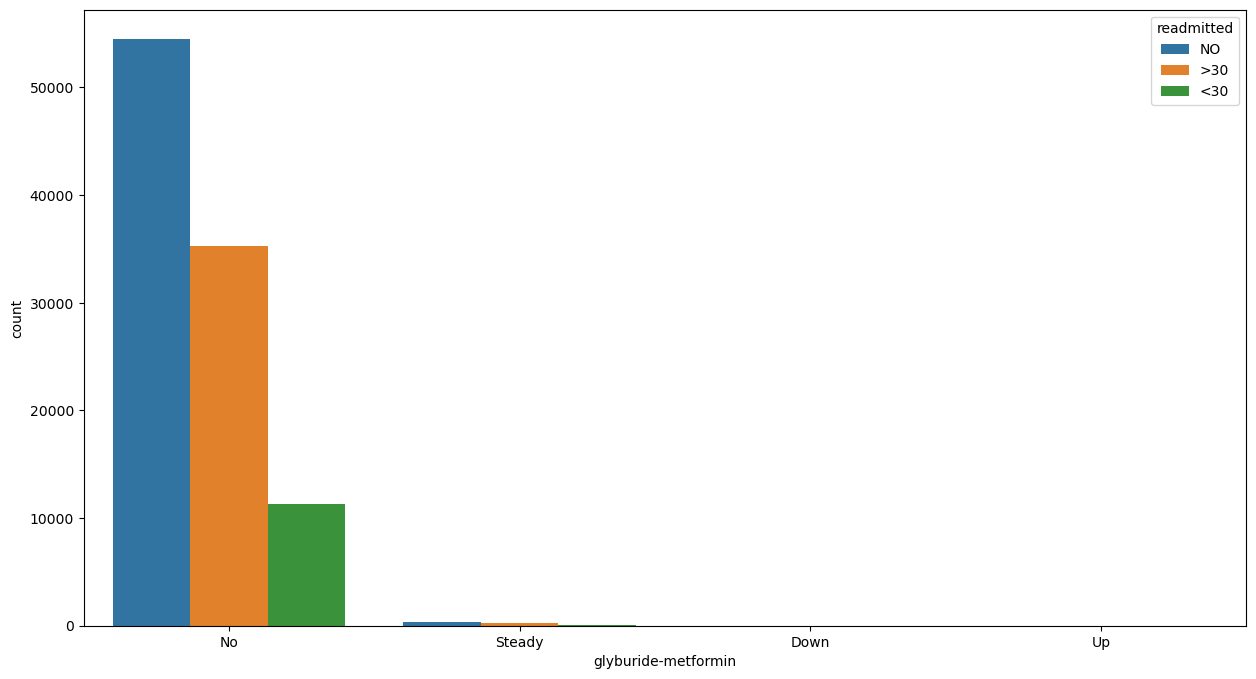

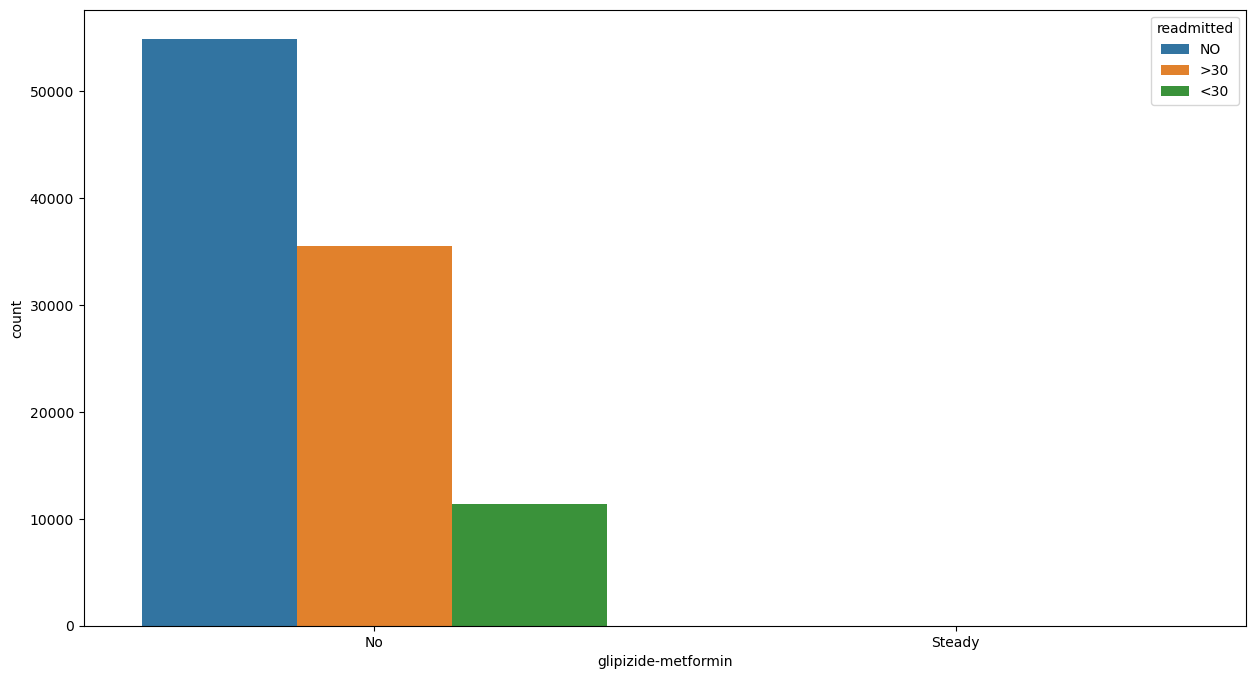

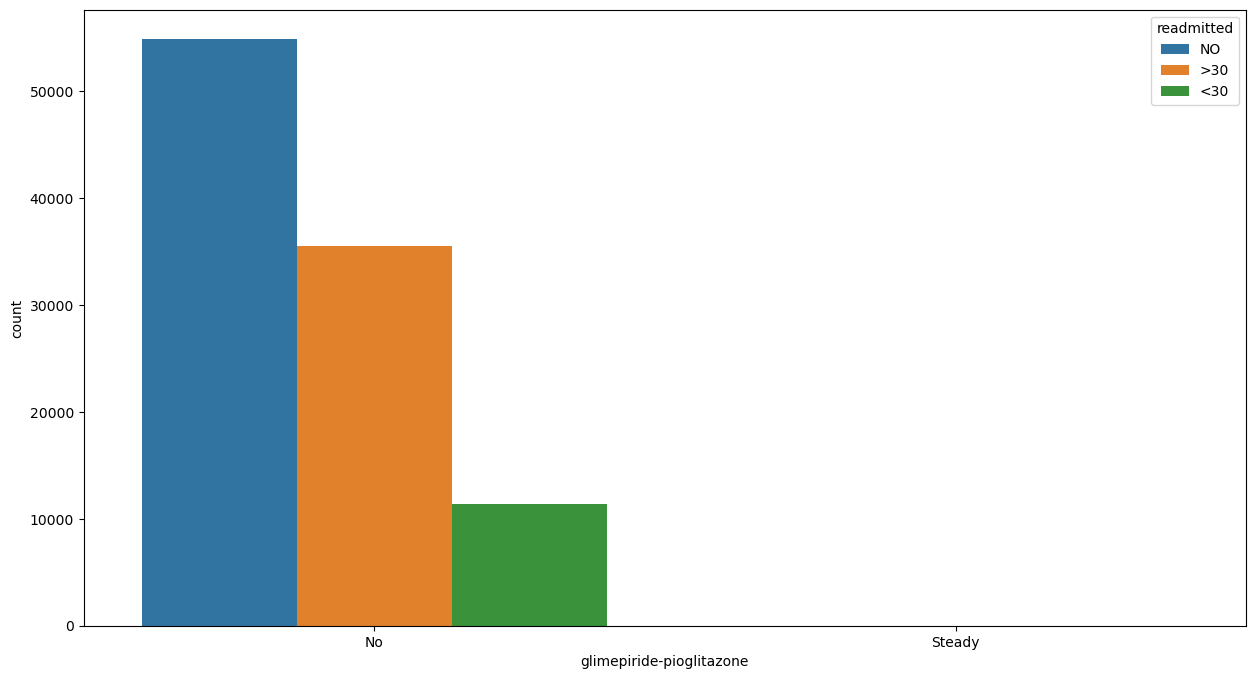

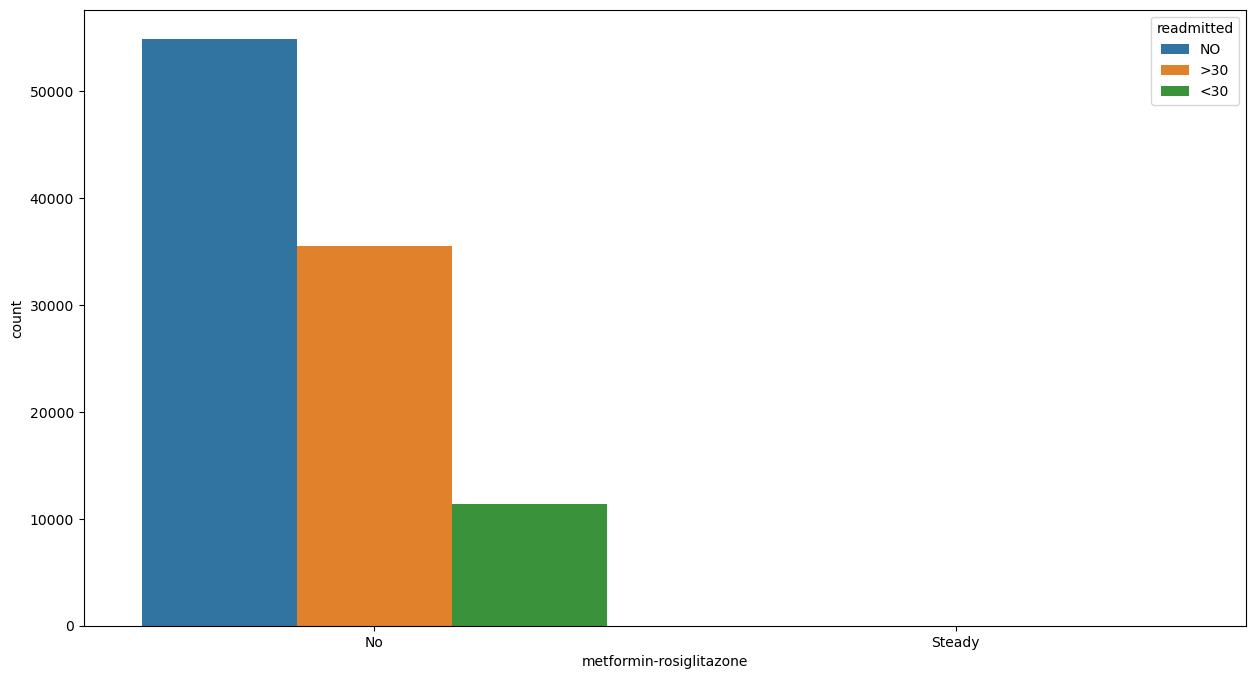

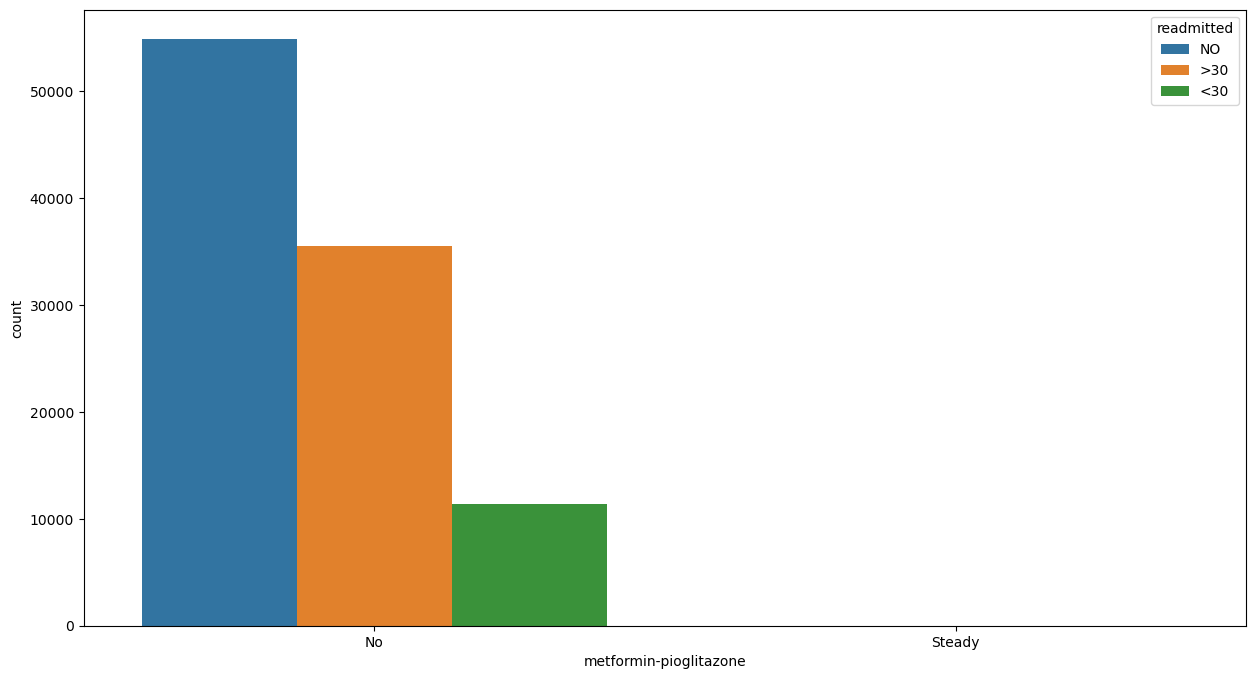

In [112]:
# Drugs vs Readmission

target=df_multi.readmitted
for i in drugs:
    sns.countplot(x=df_multi[i],hue=target)
    plt.show()

Drugs Associated with Reduced Readmission Rates:

Acetazolamide, glipizide (especially when combined with metformin), glimepiride (when combined with pioglitazone), citoglipton, insulin (certain administration strategies), metformin (especially when combined with pioglitazone or rosiglitazone), rosiglitazone, tolazamide, examide, and glyburide-metformin are generally associated with lower readmission rates.
Metformin appears frequently and consistently across summaries, indicating its potential impact on reducing readmissions.

Drugs Associated with Increased Readmission Rates:

No specific drugs were found as increasing readmission rates .

Summary:

Drugs like acetazolamide, glipizide, glimepiride, citoglipton, insulin, metformin, rosiglitazone, tolazamide, examide, and glyburide-metformin are generally associated with reduced readmission rates, especially when used consistently or not at all.
Metformin, in particular, appears frequently across summaries and is generally associated with lower readmission rates.
No specific drugs were identified as increasing readmission rates .Further research and clinical studies would be necessary to establish causal relationships between these medications and readmission rates definitively.

Lets Carefully Analyze the patients who were readmitted alone with different drugs:
    We can see that majority of the patients were not prescribed with these drugs and most of the patients we not readmitted,
    so the default basic medicines may have worked for them.
    
But there are also patients who were not prescribed with these drugs but got readmitted (be it greater or lesser than 30 days).
    There may be lot of reasons for this:
    
   
        1.The patient medical condition may have not required such drugs as part of their treatment protocol
        
        2.Patients may be receiving alternative drugs or medications that are not included in the list provided.
        
        3.The patient may have been prescribed with increase in dosage of other drugs, and that particular drug
        woudnt have worked for him/her
        
        4. The patient personel preference would have played a vital role,it may be due to cost of drug, side effects,
        restricted insurance coverage etc.
        
        5. Prescribing practices may vary among healthcare providers based on individual clinical judgment, experience, 
        and familiarity with different medications.
        
        Provider preferences, guidelines, and hospital management protocols can influence medication prescribing patterns.
        


<Axes: xlabel='readmitted', ylabel='count'>

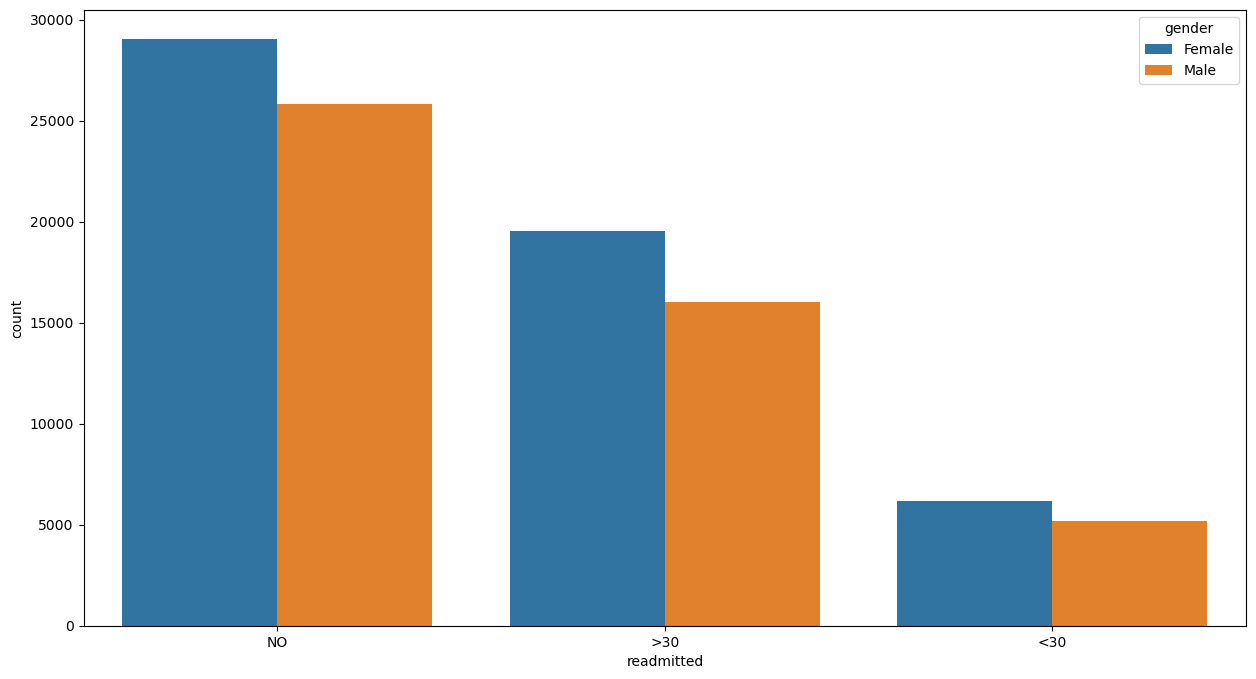

In [113]:
# GENDER VS READMISSION

sns.countplot(hue=df_multi.gender,x=df_multi.readmitted)

Majority of female patients were not readmitted than male patients, which suggest that they underwent a proper 
healthcare regime.

Nearly 16000 males were readmitted after 30days and nearly 5000 males were readmitted before 30 days

Overall Female population is larger in all aspects of readmission than male

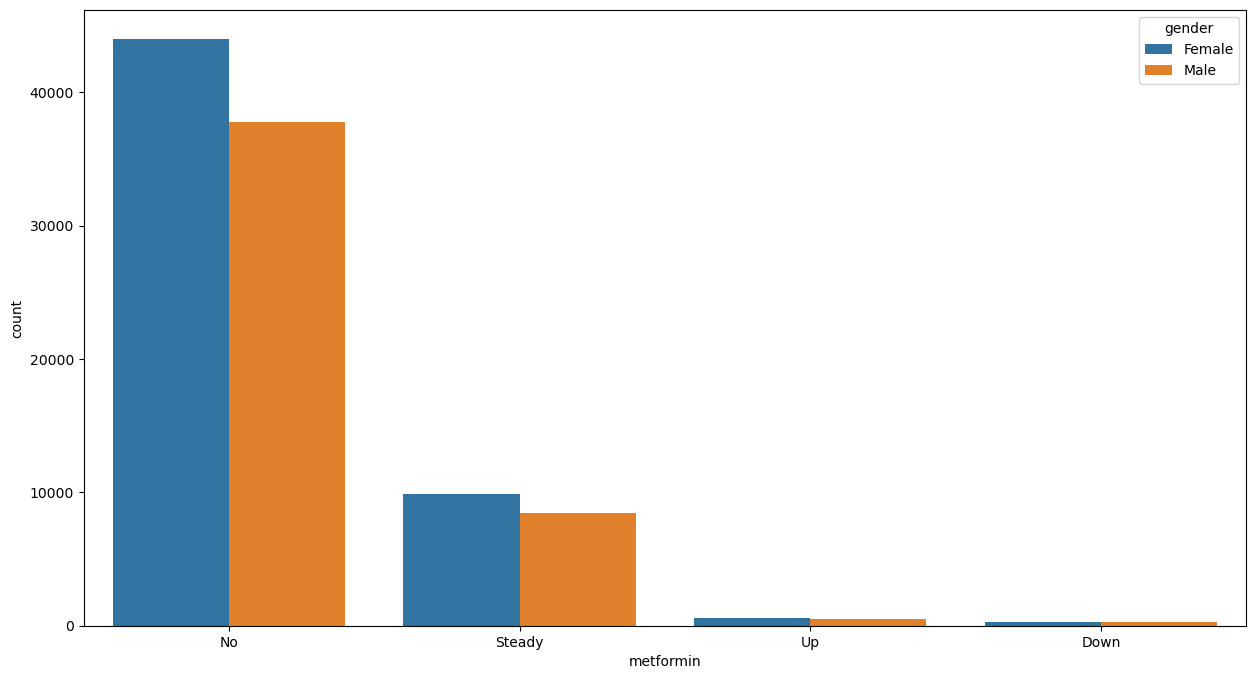

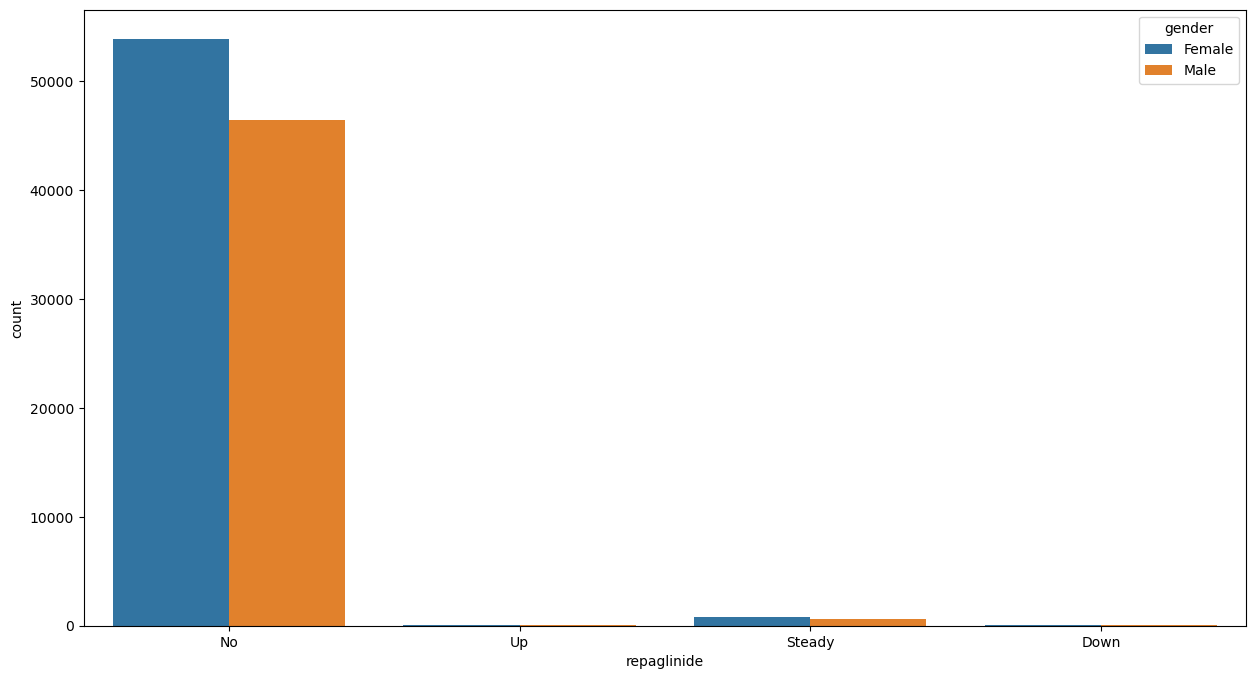

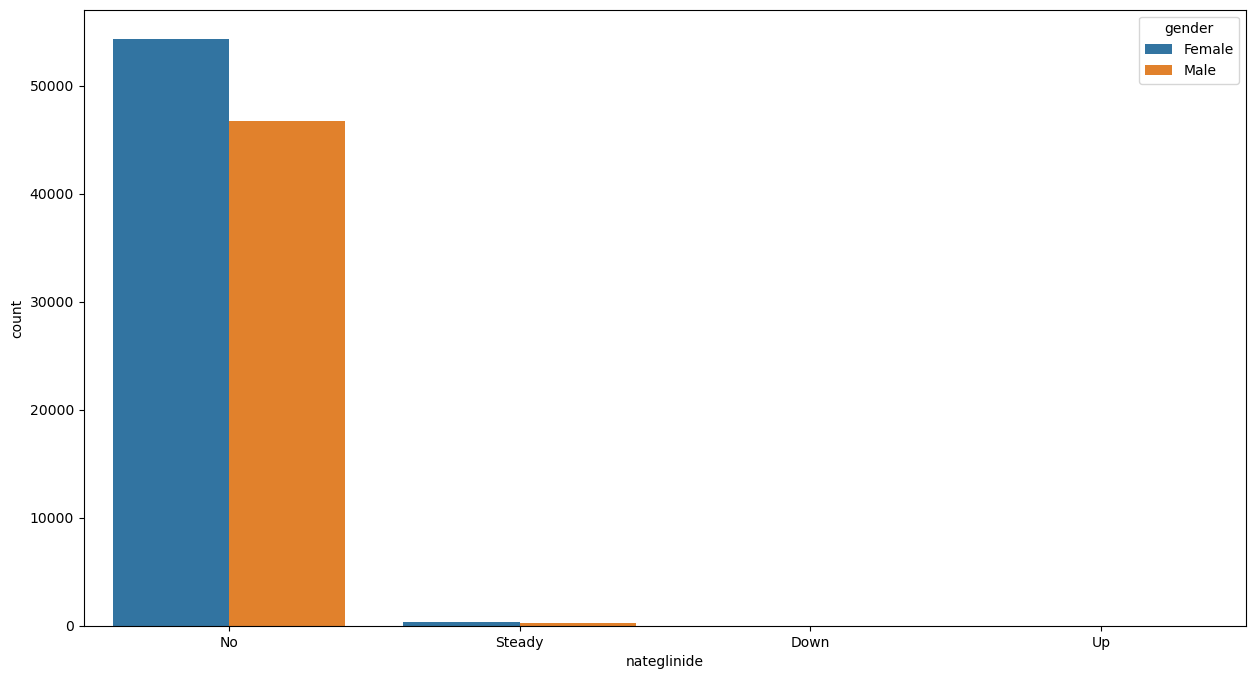

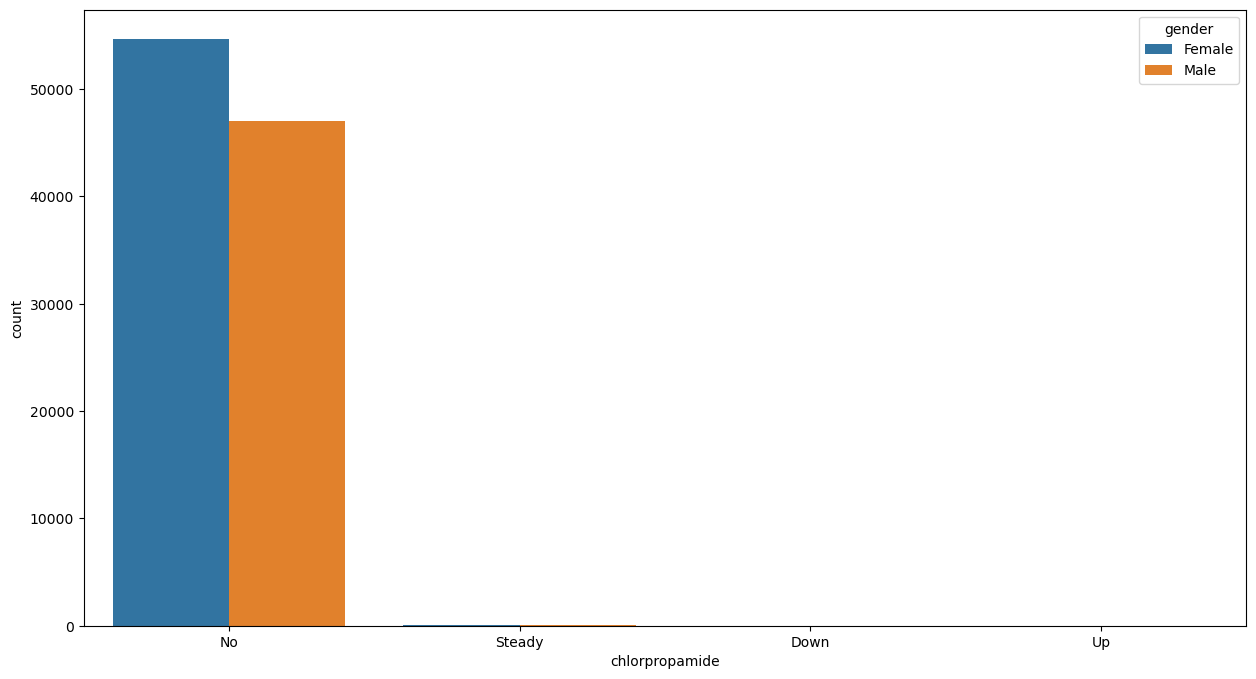

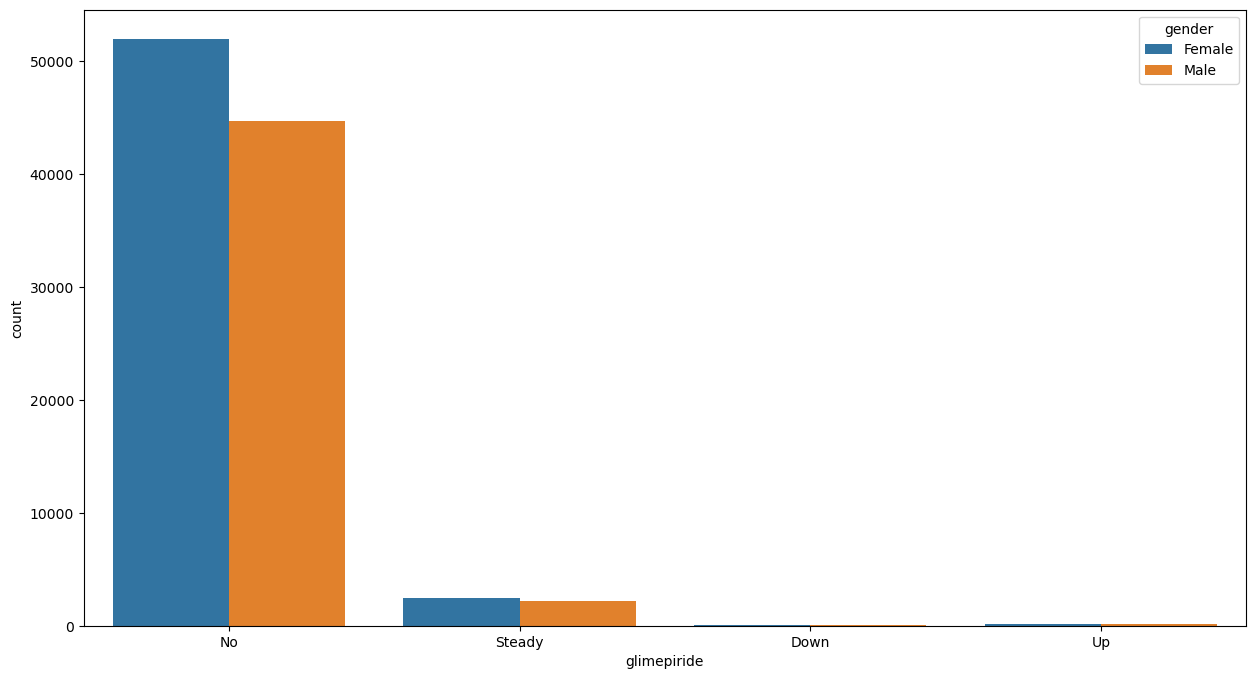

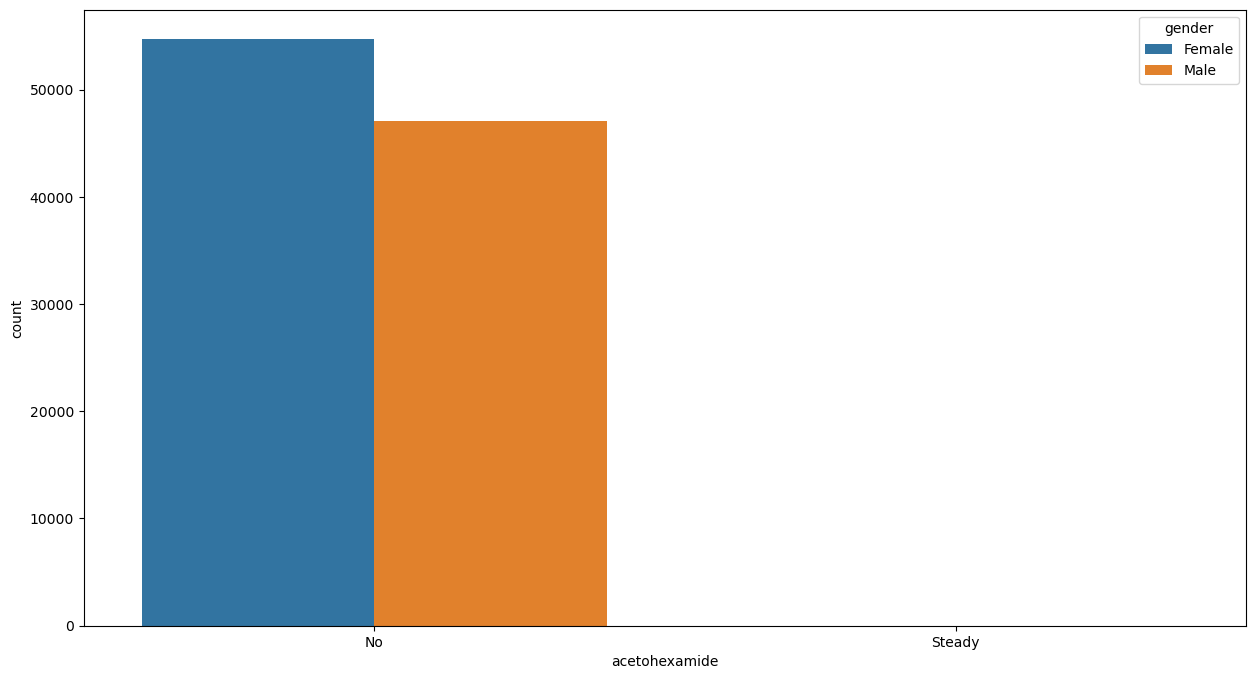

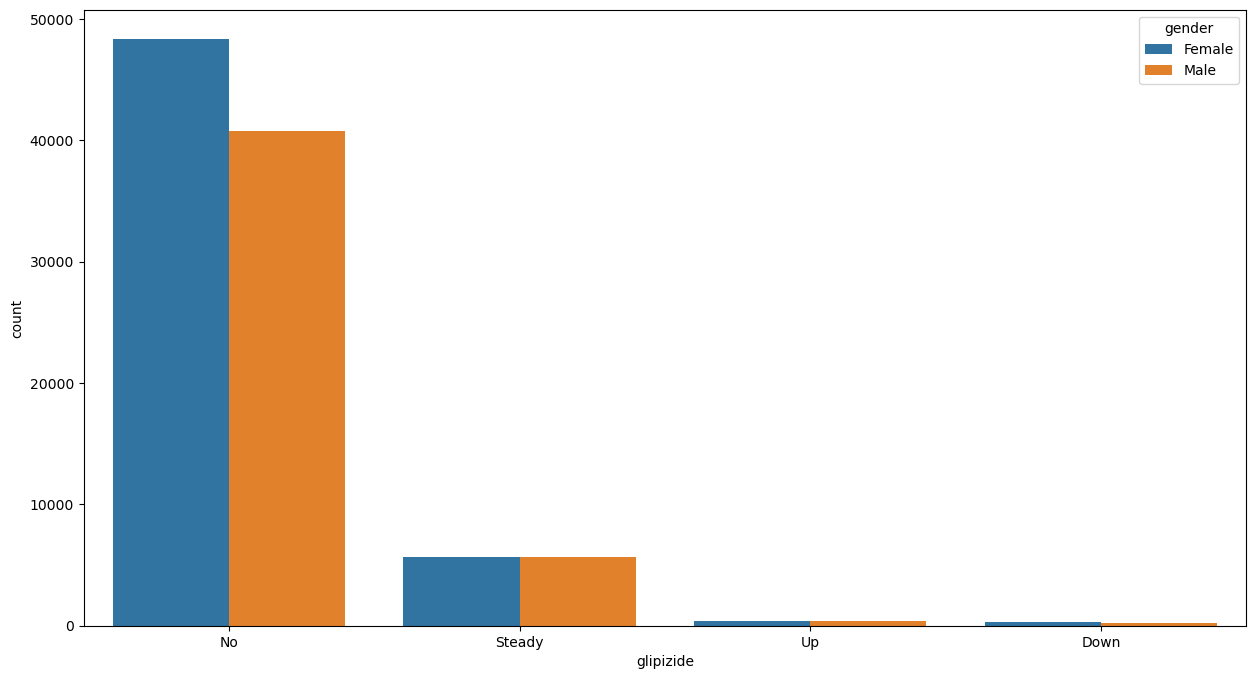

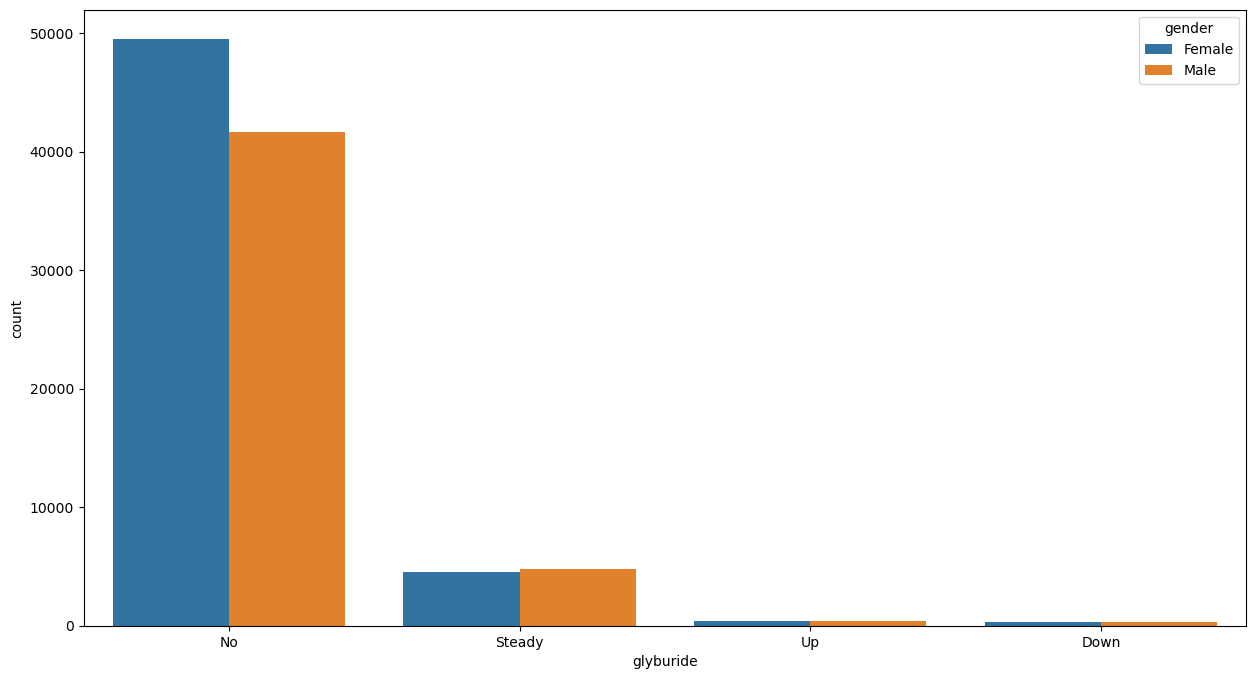

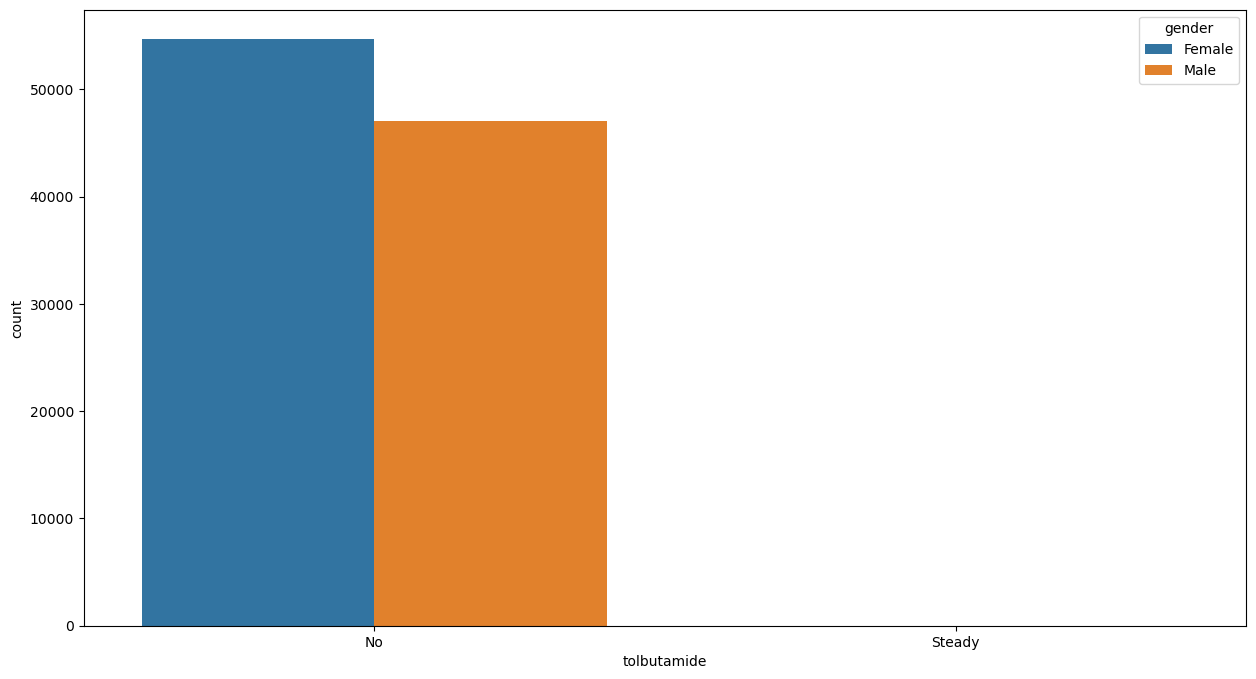

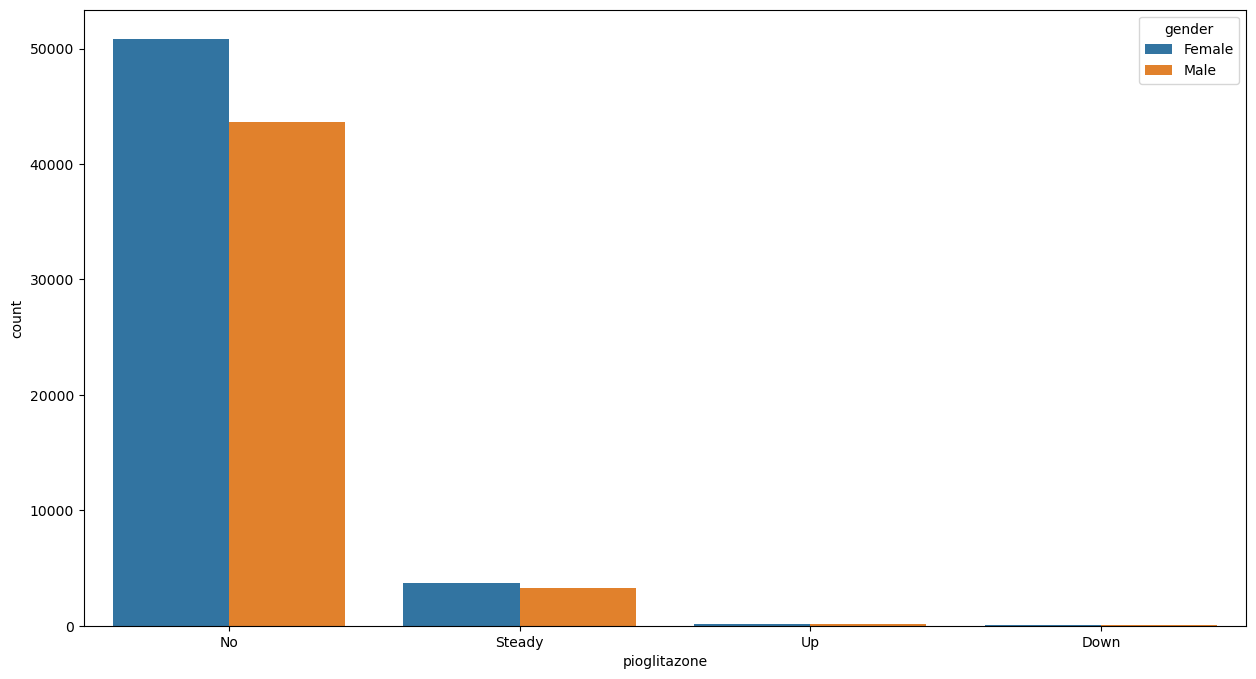

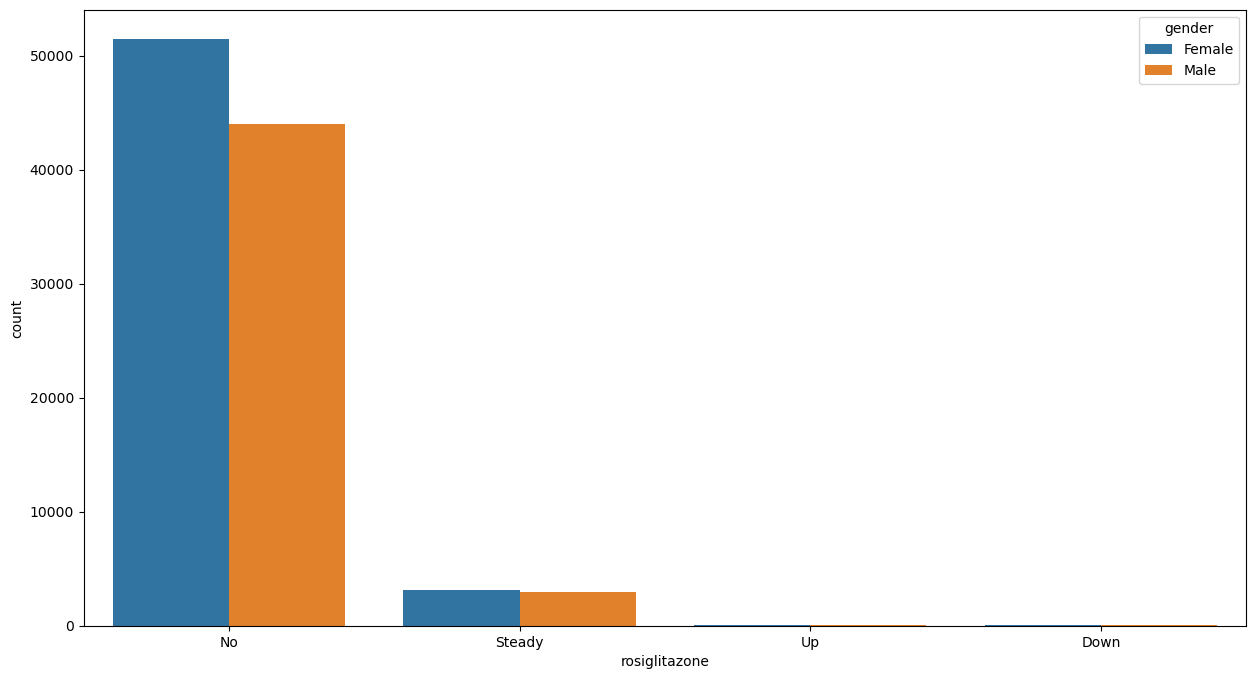

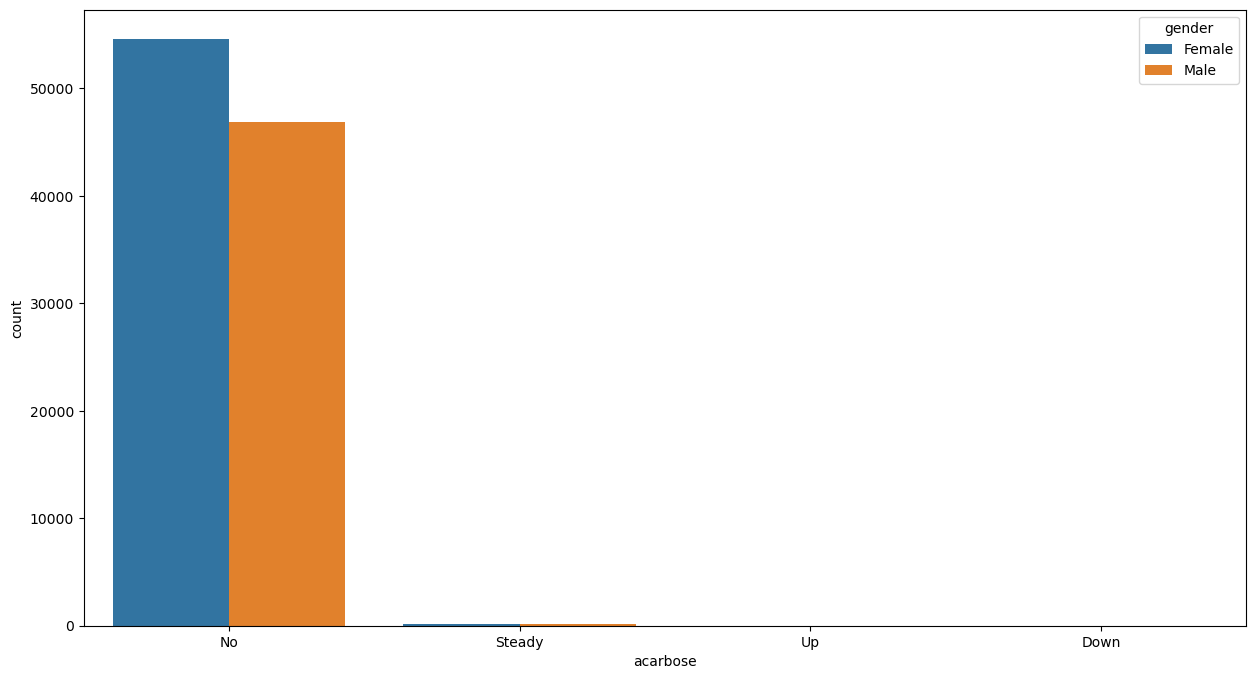

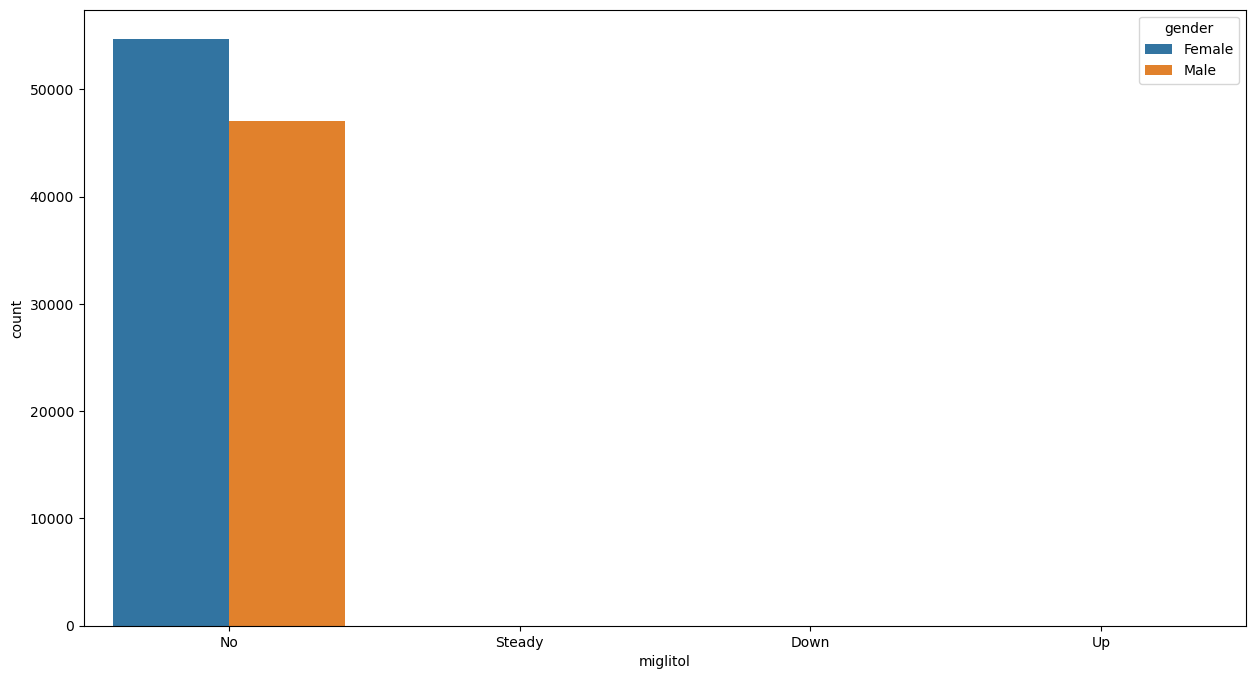

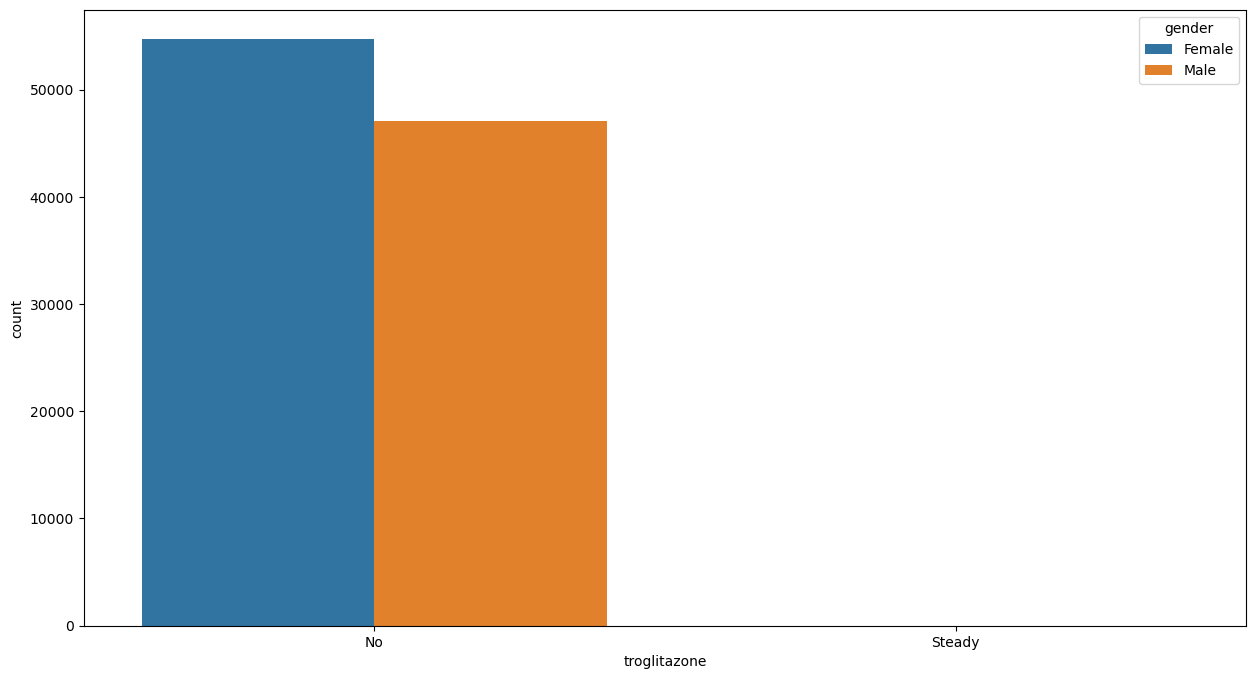

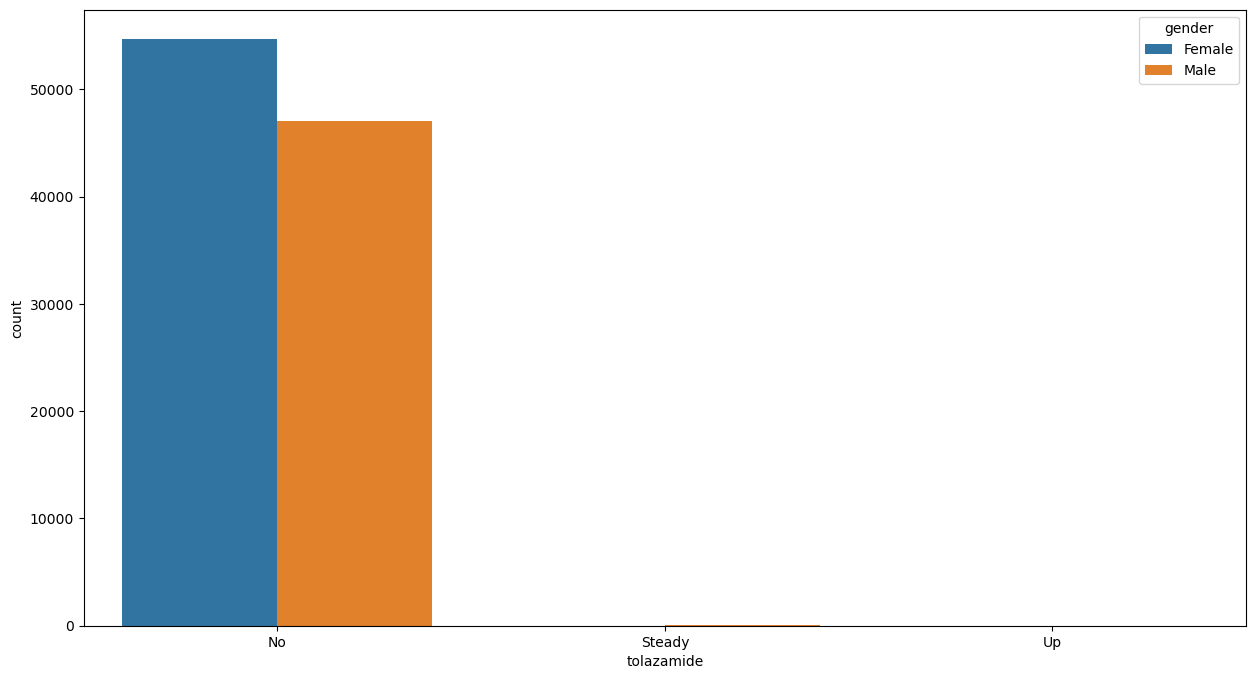

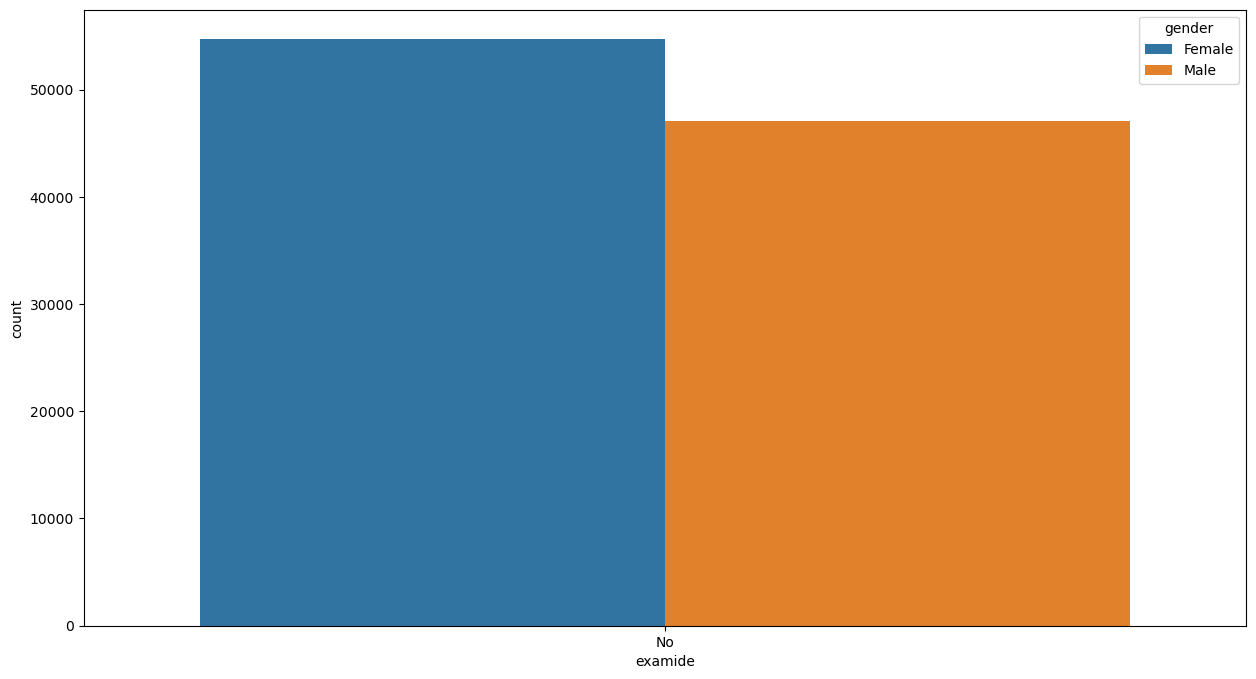

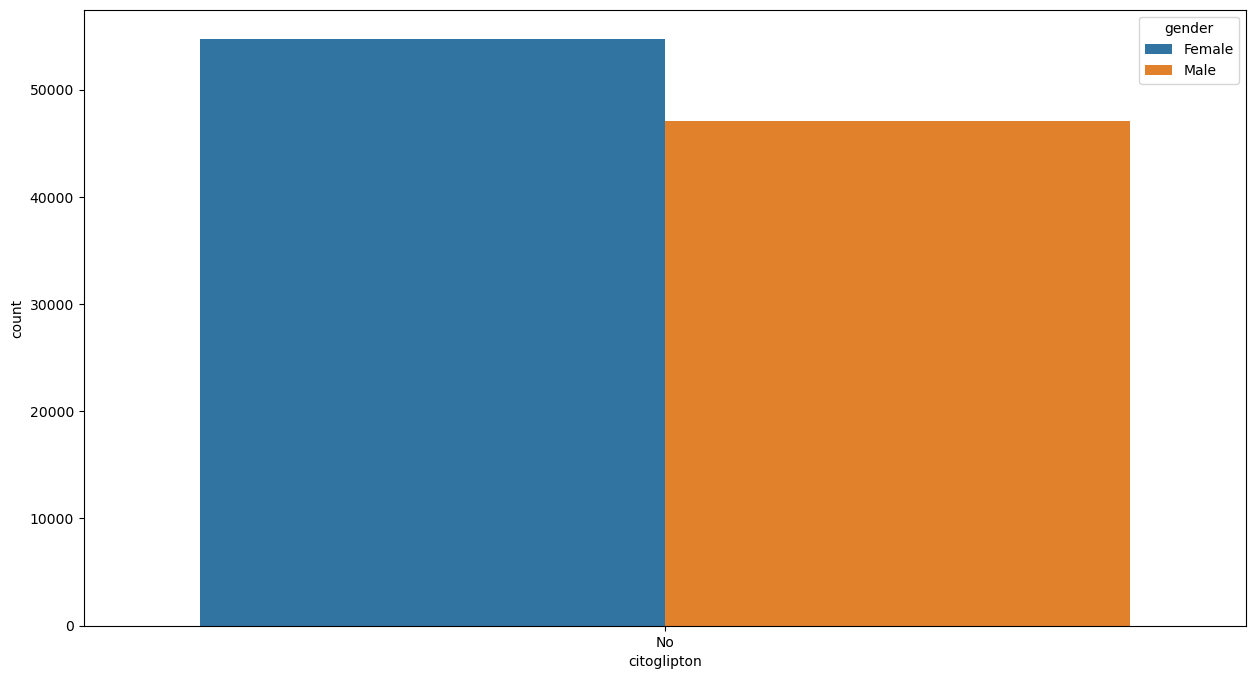

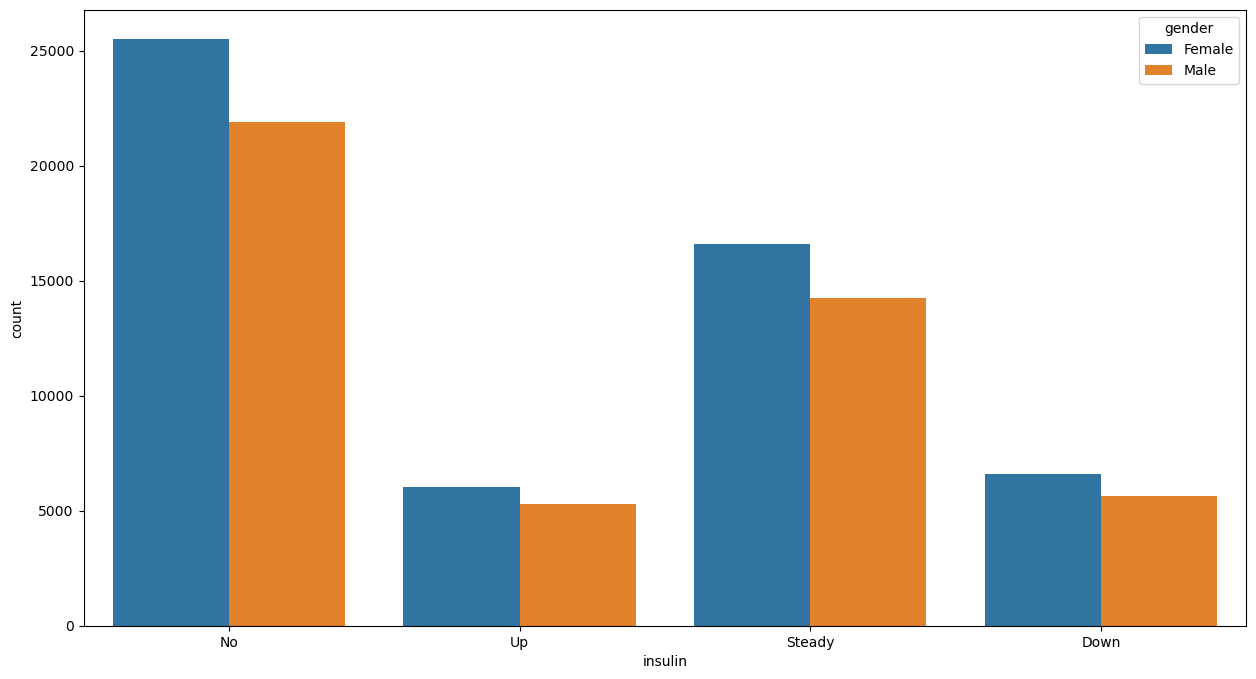

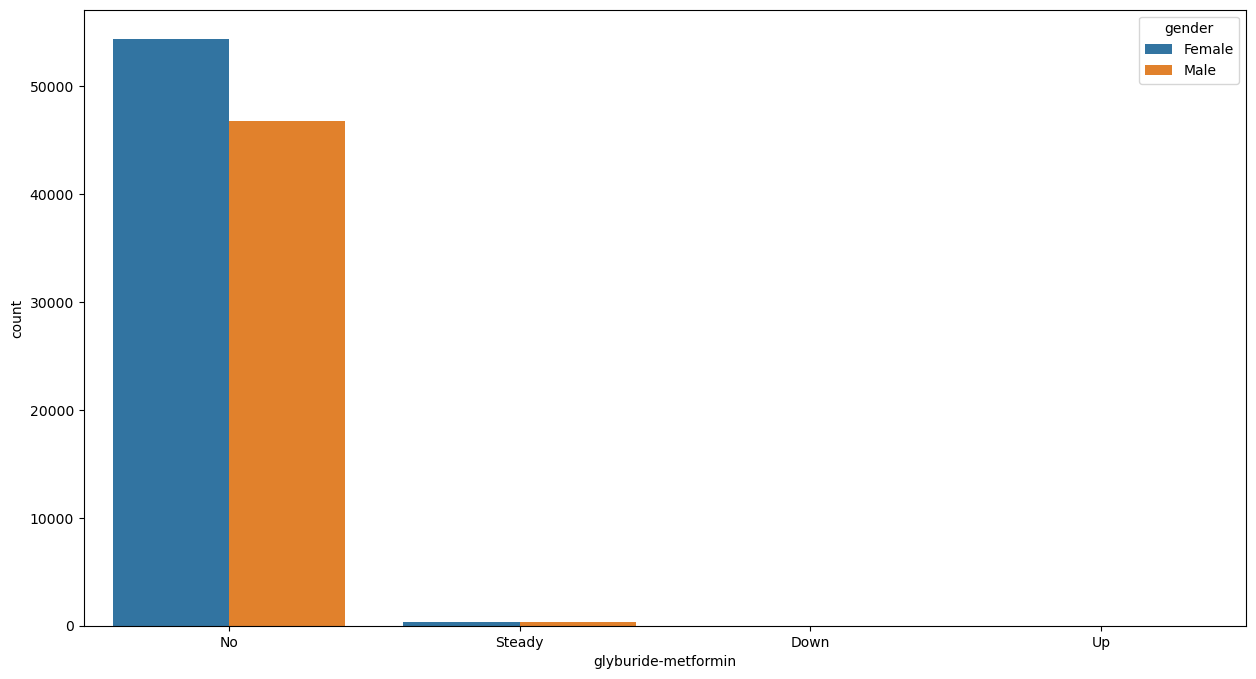

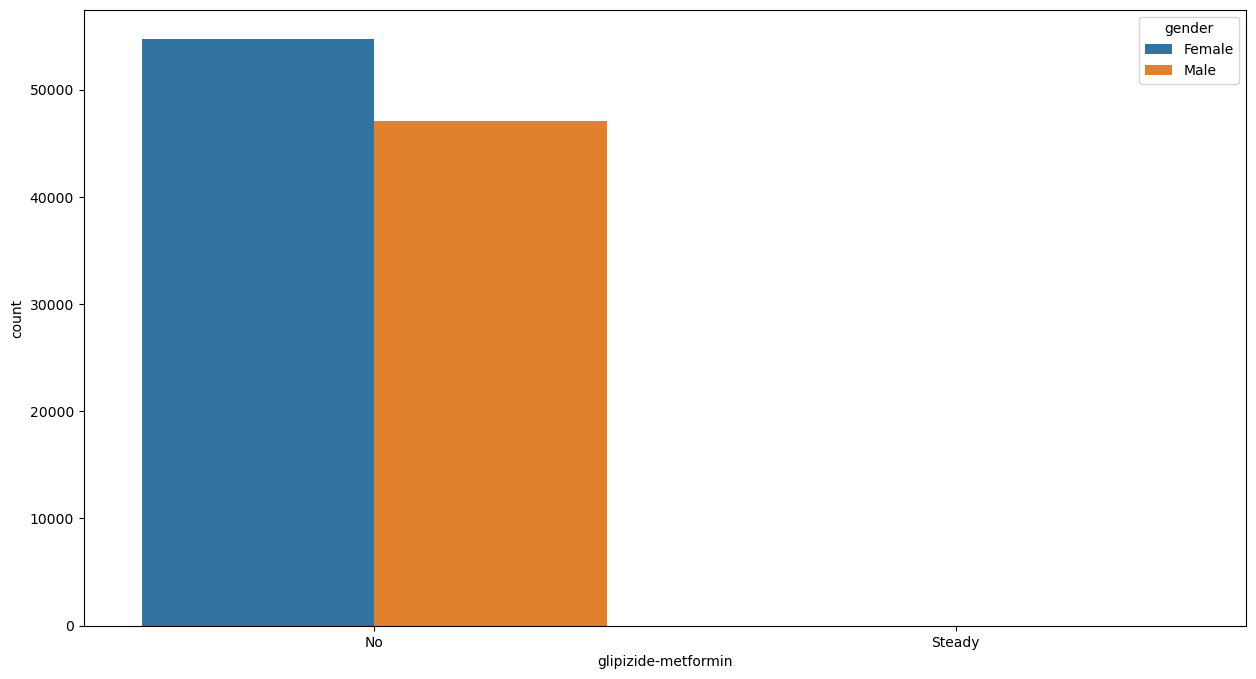

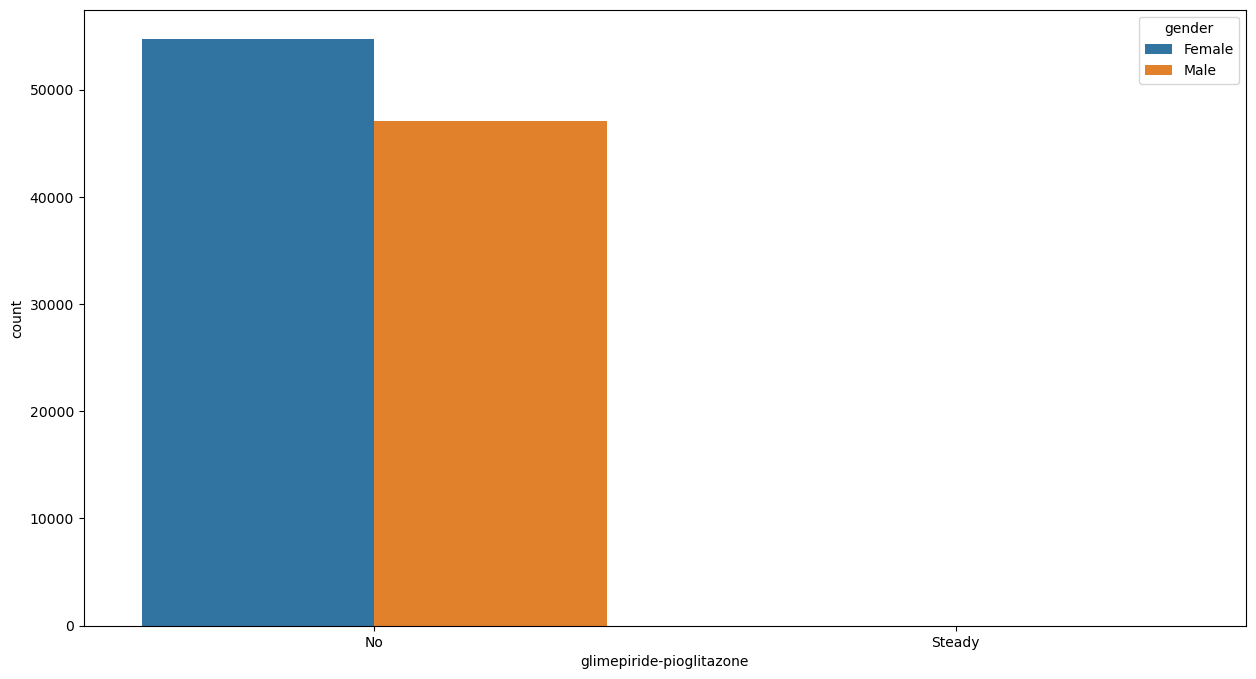

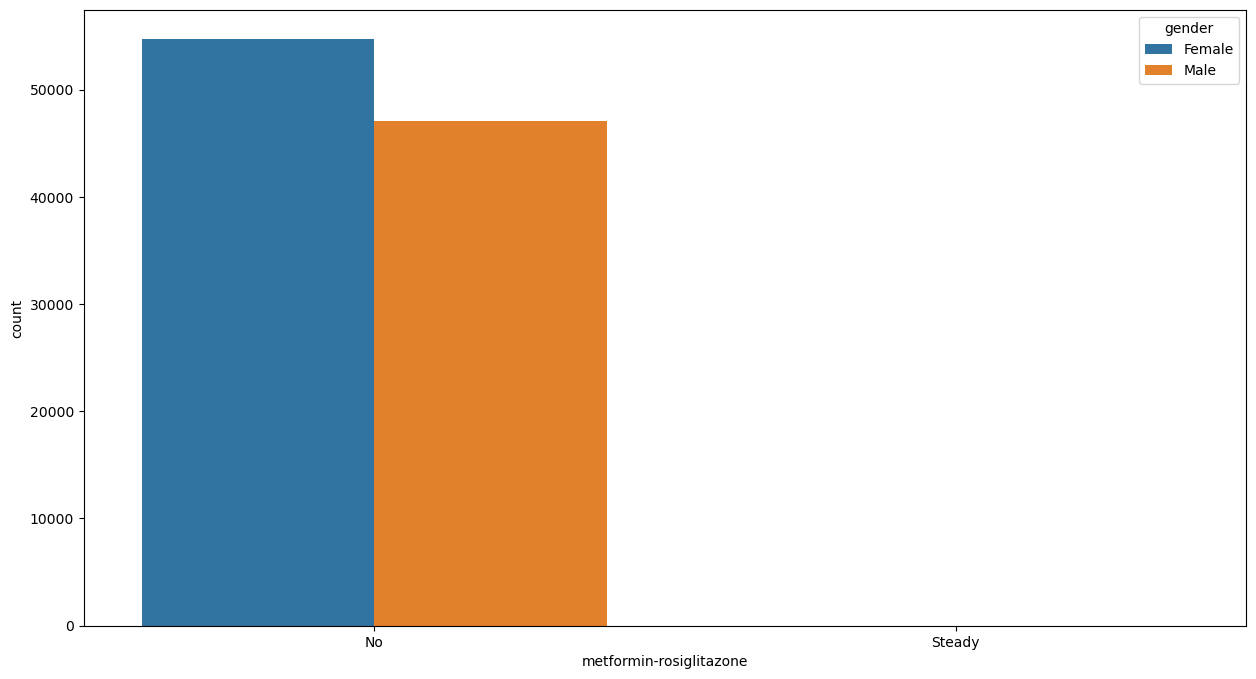

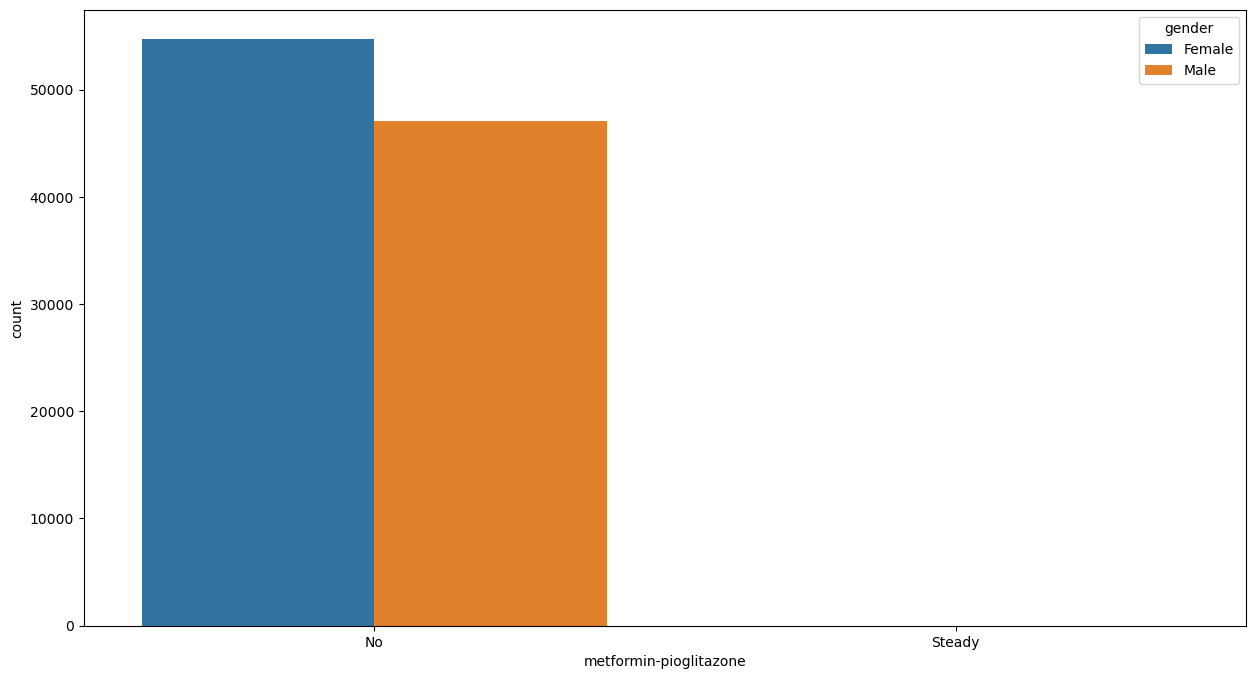

In [114]:
target=df_multi.readmitted
for i in drugs:
    sns.countplot(x=df_multi[i],hue=df_multi.gender)
    plt.show()

An Interesting Observation is Female patients have outnumbered Male patients in all categories of drug dosage. 
It may be due to following reasons:

1. Biological structure: Female body generally has higher absorption rate than male, so they require less
dosage.

2. Importance to Healthcare: Women pay more attention to their body which tend to seek more healthcare and prescription.
This automatically make them interact with healthcare system

<Axes: xlabel='readmitted', ylabel='number_diagnoses'>

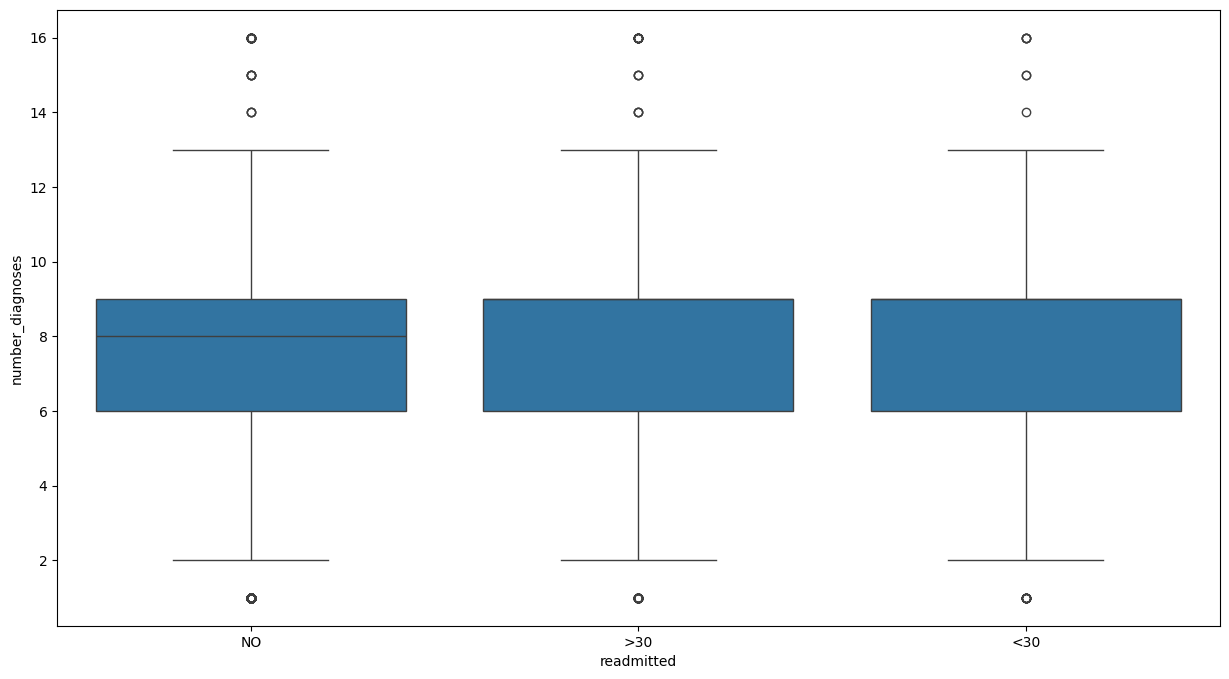

In [115]:
# number of diagnosis vs readmission
sns.boxplot(y=df_multi.number_diagnoses,x=df_multi.readmitted)

A significant relationship between the number of diagnoses and hospital readmission rates. About 22.3% of discharges resulted in a 30-day readmission, with 8.0% of these readmissions considered potentially avoidable. The top primary diagnoses for these avoidable readmissions often relate to complications stemming from underlying comorbidities.

The primary index admission diagnoses most commonly associated with readmissions include septicemia, heart failure, diabetes, and chronic obstructive pulmonary disease (COPD). These conditions accounted for a substantial portion of readmissions, with the top 20 diagnoses representing nearly half of all readmissions.

Overall, the findings emphasize the importance of addressing both the primary admission diagnosis and patients' comorbidities in post-discharge care to effectively manage and reduce readmissions. This holistic approach is essential for optimizing patient outcomes and healthcare resource utilization.

It is Evident from the plot that patients who have been readmitted
their data shows more than 5 diagnoses entered((few patients have more than 12 diagnoses entered),
for which the data is absant(The name of diagnoses is absent).

Type of diagnosis done could potentially help us in further analysis and can bring more insights.
Management should be informed about the absence of these diagnoses


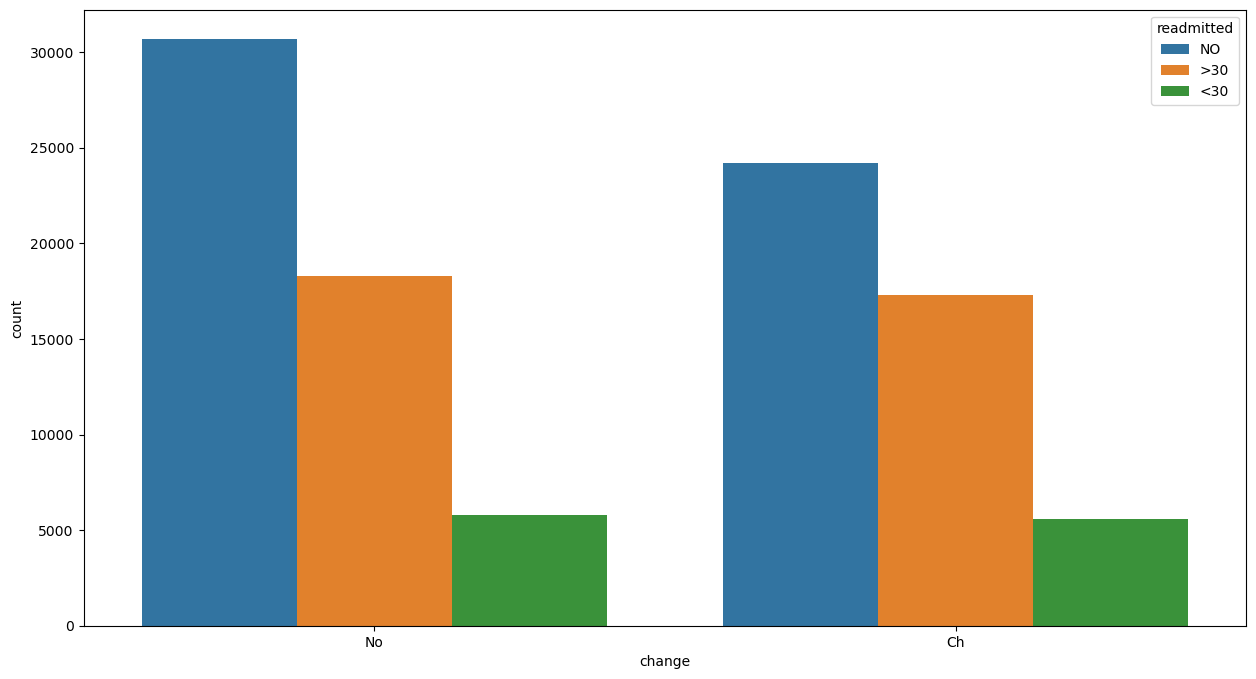

In [116]:
# change vs readmission

sns.countplot(x=df_multi.change,hue=df_multi.readmitted)
plt.show()

The comparison between "change" and "no change" in medication or treatment suggests that patients with no change are less likely to be readmitted within 30 days. However, patients with a change in medication or treatment have similar readmission rates after 30 days compared to those with no change. The lowest readmission rate occurs within 30 days for both groups. This implies that stability in medication or treatment may contribute to a lower likelihood of early readmission, but the impact on longer-term readmission rates is less significant.

From the graph we can infer that:
    There are more number of patients who have not been readmitted ,when there is no change in diabetic medications(either dosage or generic) than patients who have a change in medications
    
There is no big difference in patients who got readmitted <30 or >30 days, be it any change in dosage

<Axes: xlabel='diabetesMed', ylabel='count'>

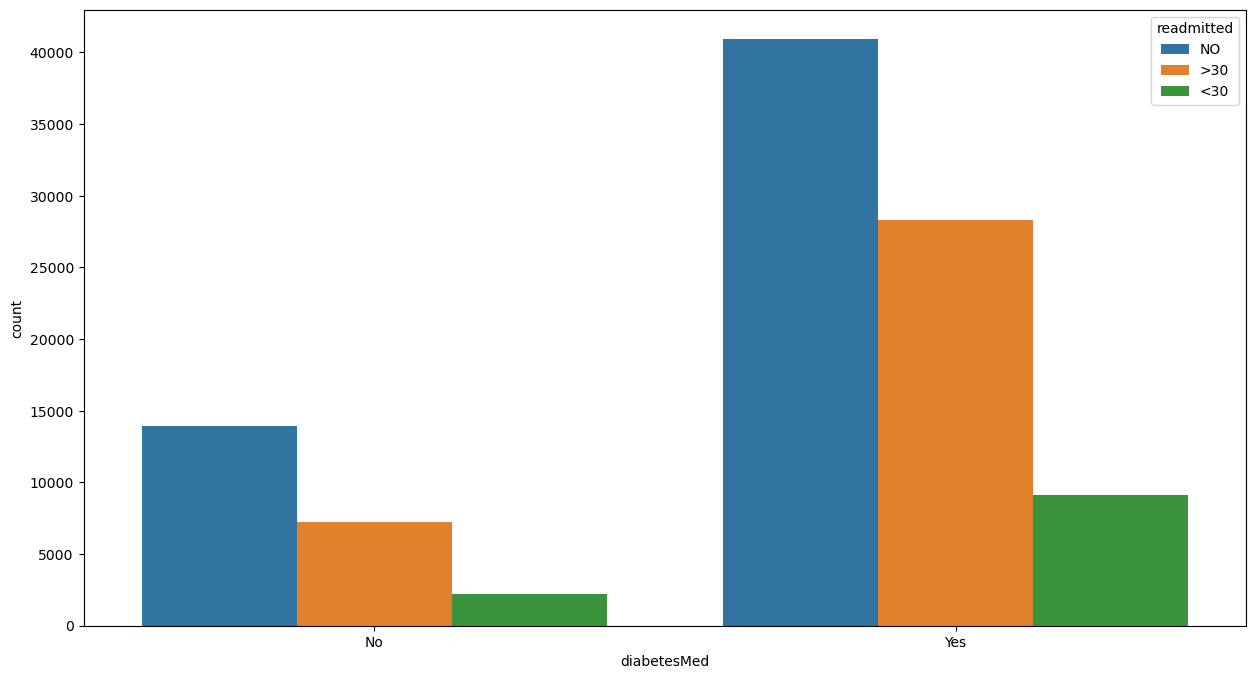

In [117]:
# diabetes medications vs readmission

sns.countplot(x=df_multi.diabetesMed,hue=df_multi.readmitted)

It is obvious from the graph that: 

    Patients who have prescribed medications for diabetes are more than patints who dont take medications for diabetes.
    Nearly 52% of patients were not readmitted,48% patients have been readmitted (when they take medications)

Patients with diabetes med face a higher risk of hospital readmission, particularly if they have comorbidities like heart failure or renal disease, are on insulin therapy, or have specific insurance types. Targeted self-management education based on these factors can help reduce readmission rates. Additionally, medication changes upon admission have been linked to lower readmission rates, emphasizing the importance of continuity of care and proper disease management. Overall, addressing patient-related factors and optimizing medication management are crucial steps in indicating hospital readmissions in diabetic patients.

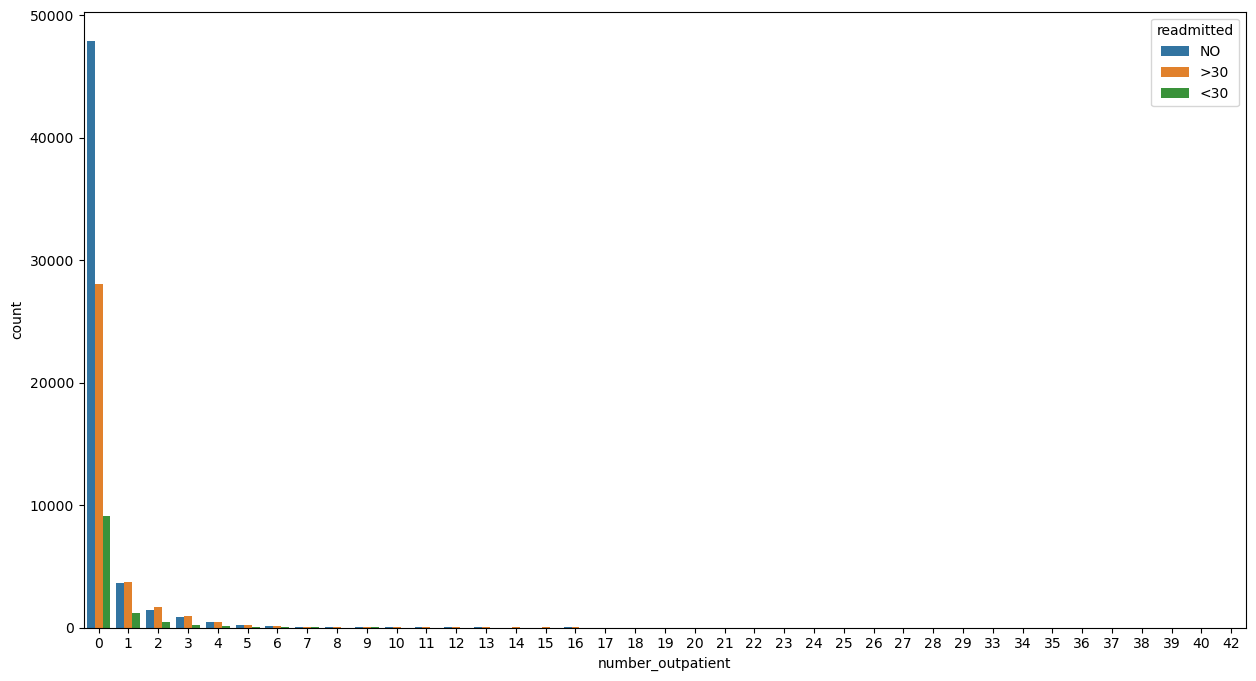

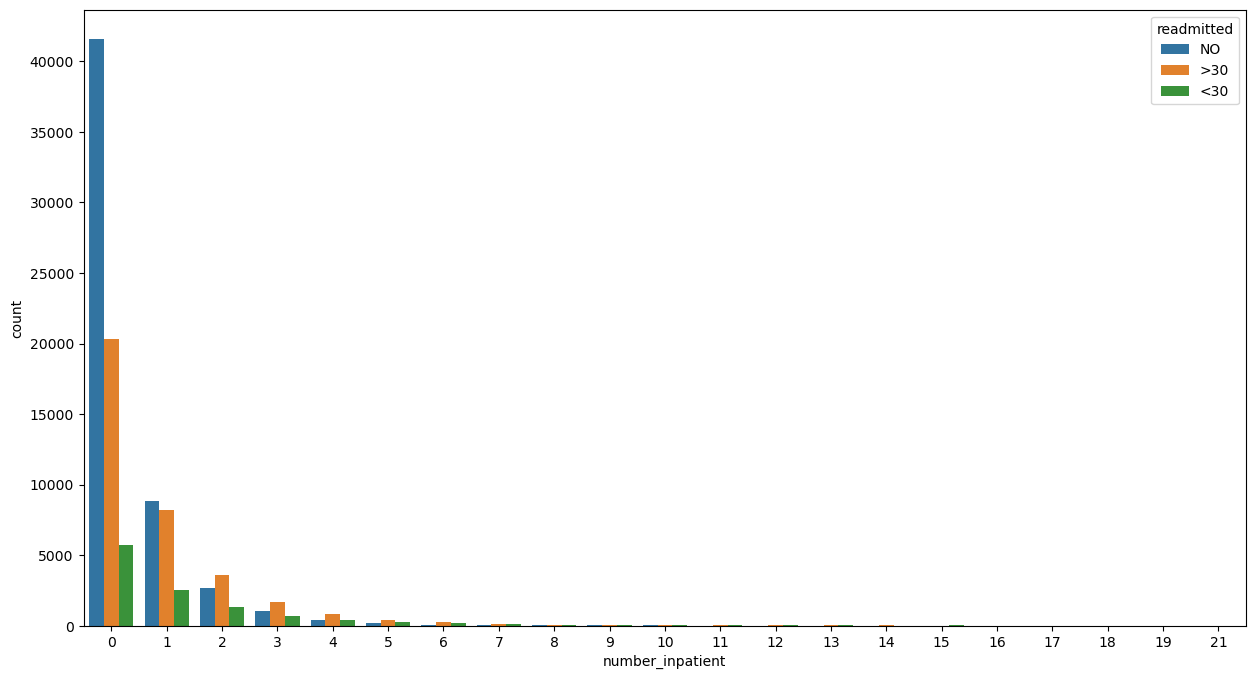

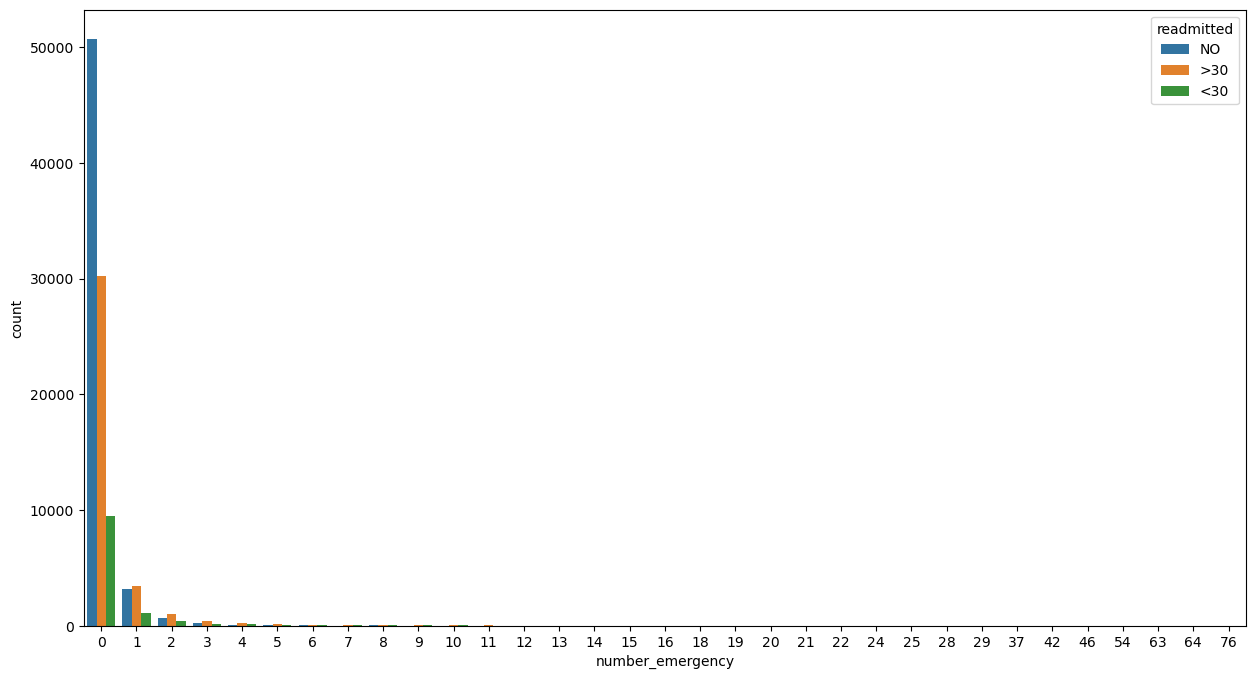

In [118]:
# diagnosis vs readmission
diag=df_multi[["number_outpatient","number_inpatient","number_emergency"]]
for i in diag:
    sns.countplot(x=df_multi[i],hue=df_multi.readmitted)
    plt.show()

1.Nearly 64% of patients who have not made any hospital visits dint require any readmission

2.40% of patients were readmitted in less than 30 days when they havnt made any type of visits

3.43% of patients were readmitted after 30days when they havnt made any type of visits

<Axes: xlabel='admission_source_id', ylabel='count'>

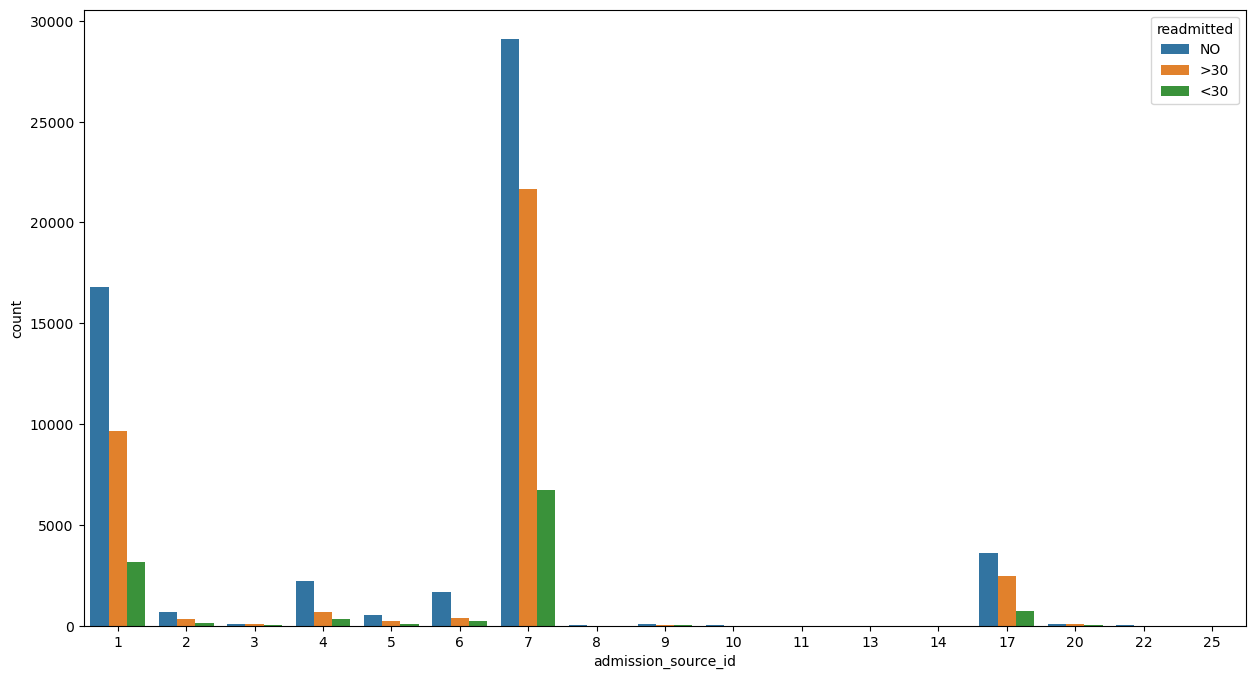

In [119]:
# admission source id vs readmission
sns.countplot(x=df_multi.admission_source_id,hue=df_multi.readmitted)

WE CAN SEE THAT EMERGENCY ROOM(7) AND PHYSICIAN REFERRAL(1) ARE THE MAJORITY CLASS.

1.Many patients have been admitted thorugh these 2 categories

2.In that many were not readmited

3.But who were readmitted < 30 days are less when compared to patients who were readmitted >30 days

<Axes: xlabel='admission_type_id', ylabel='count'>

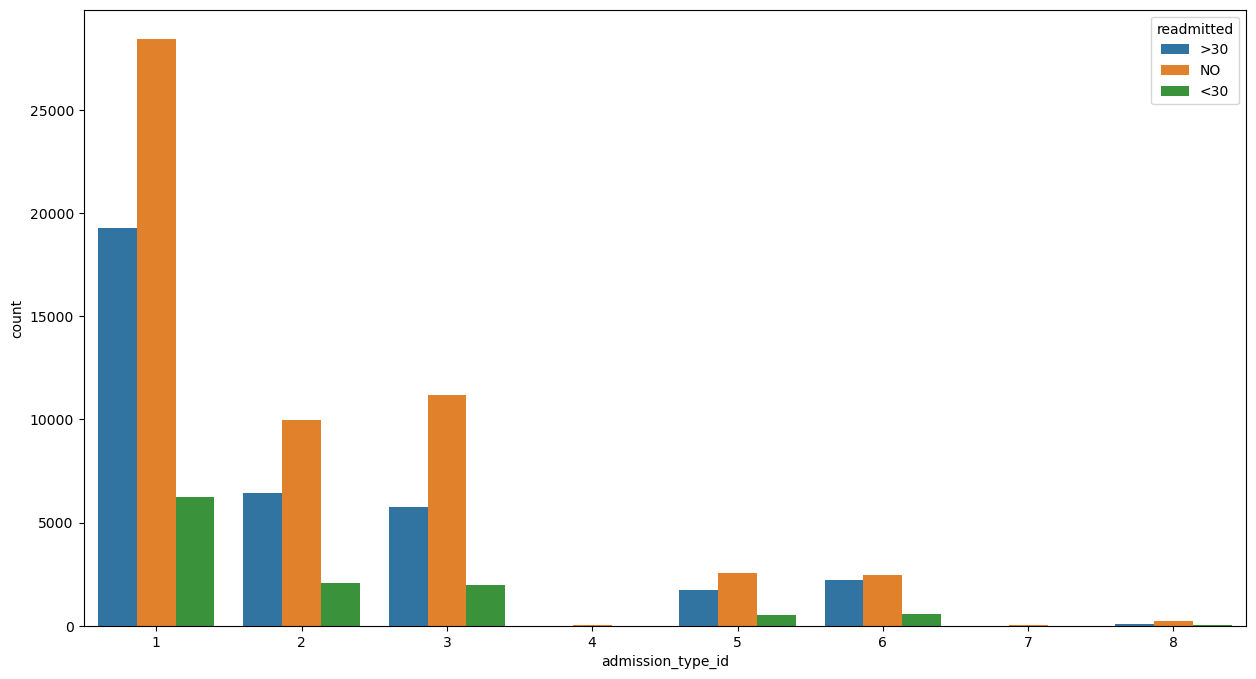

In [120]:
# admission type id vs readmission
sns.countplot(x=df_multi.admission_type_id,hue=df_multi.readmitted)

IN PATIENTS WHO WERE ADMITTED INITIALLY , MAJORITY OF THEM BELONG TO EMERGENCY CASE AND ELECTIVE CASES(If a patient is admitted in elective mode, it means that the admission was planned. In other words, the patient requires hospital care but may choose to wait for a more convenient time.)

In that most of them dint require readmission and patients readmitted <30 days are less in each category

<Axes: xlabel='discharge_disposition_id', ylabel='count'>

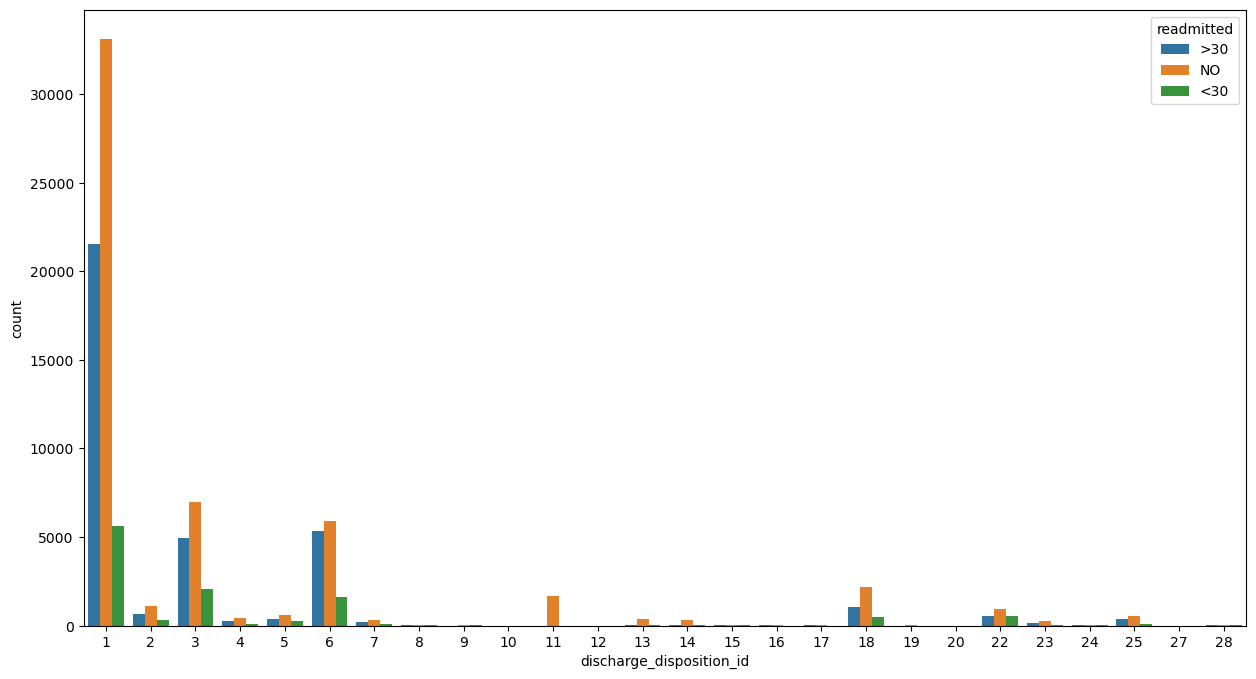

In [121]:
# dischare disposion id vs readmission
sns.countplot(x=df_multi.discharge_disposition_id,hue=df_multi.readmitted)

MAJORITY OF THE PATIENTS WERE DISCHARGED TO HOME WITHOUT ANY CARE(1) AND FEW OF THEM TO SERVICED NURSING FACILITY(3)

# MULTIVARIANT ANALYSIS

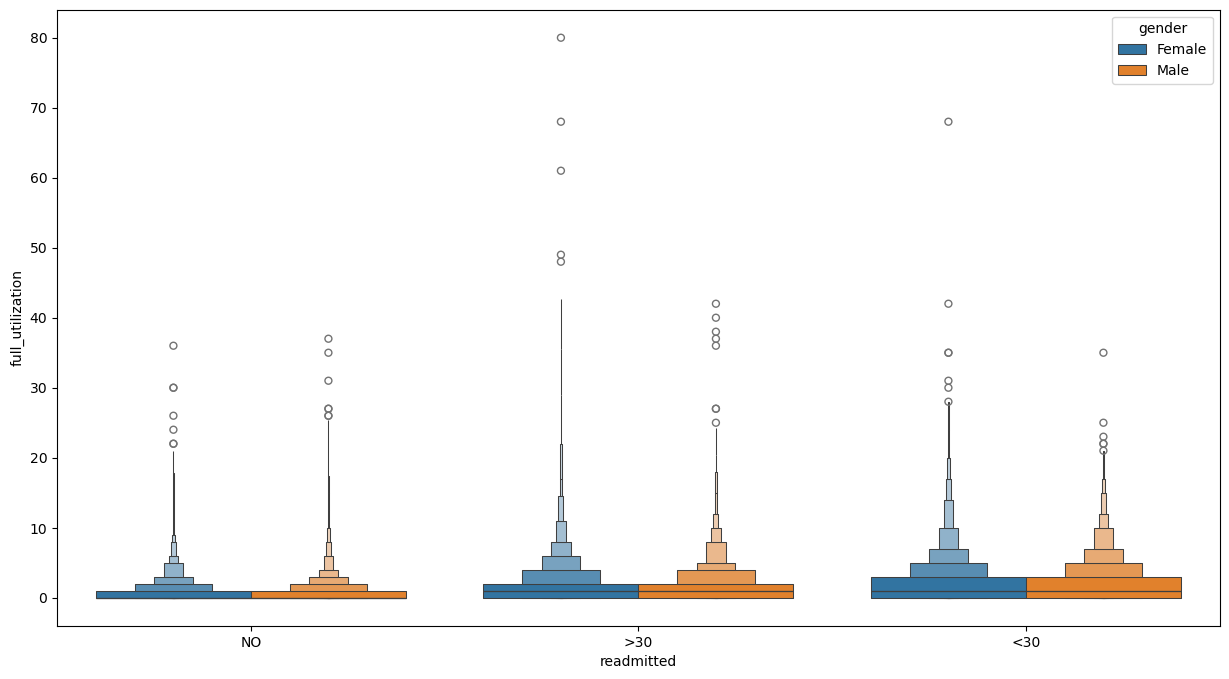

In [122]:
# Full utilazation vs readmitted vs gender

sns.boxenplot(x=df_multi.readmitted,y=df_multi.full_utilization,hue=df_multi.gender)
plt.show()

The “No” readmission category has fewer outliers than the “>30” and “<30” categories.The “>30” category shows more variability and higher values overall compared to the “No” readmission group.The “<30” category also exhibits considerable variability, with many outliers extending towards higher values.Patients who were not readmitted (“No” category) tend to have a more consistent distribution of the numerical variable.Patients who were readmitted after more than 30 days (“>30” category) show greater variability in the measurement.Patients readmitted within 30 days (“<30” category) also exhibit variability, but with higher values.

We can observe that patients who have not made any type of visist(either as inpatient, outpatint, or emergency)
dint get readmitted once they get discharged:
    
    1.Out of that 52.23% are female and 47.76% are male
    2.56.81% females and 43.1% males have made minimum 5 to 10  visits to the hospital before encounter and thet got readmitted <30 days
    3.57.2% females and 42.7% males have made minimum 5 to 10 visits to the hospital before encounter and thet got readmitted >30days

    Special Cases:
        1.Nearly 77% of Females and 23% got readmitted after 30 days of discharge when they make more than 30 visits (any type of vists)
        2.Nearly 85% of Females and 14% got readmitted before 30 days of discharge when they make more than 30 visits (any type of vists)



<Axes: xlabel='gender', ylabel='full_utilization'>

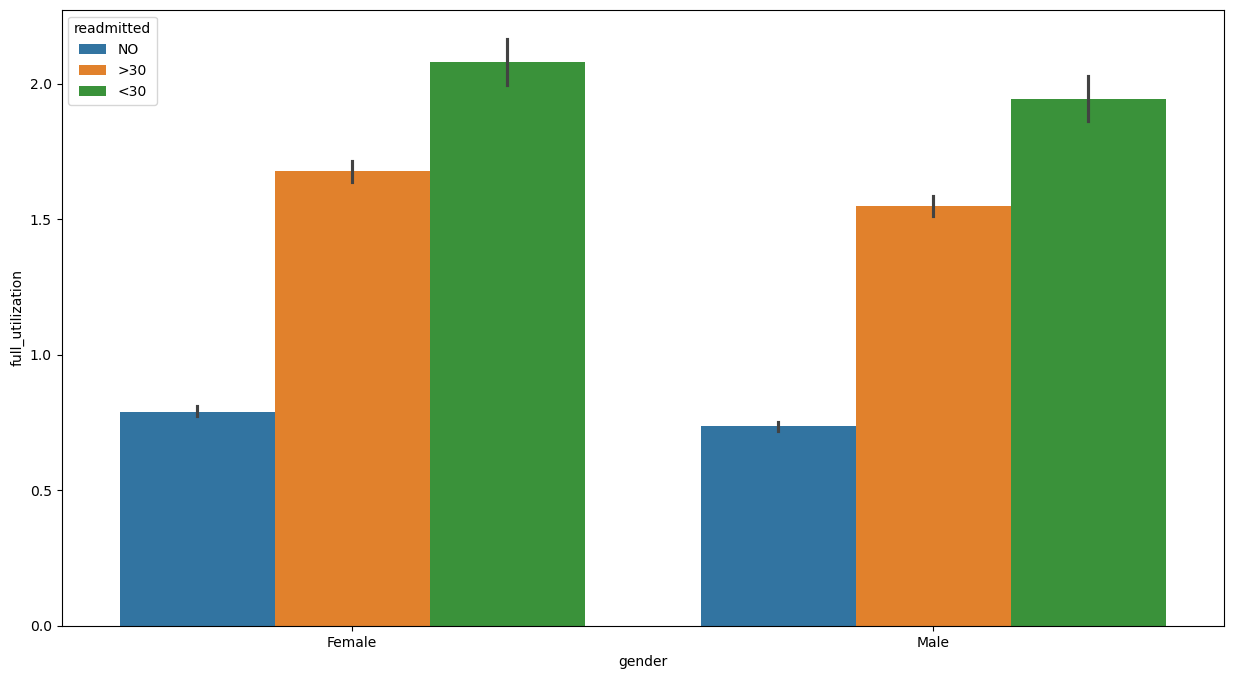

In [123]:
sns.barplot(x=df_multi.gender,y=df_multi.full_utilization,hue=df_multi.readmitted)


In the ‘<30’ readmission category, males have a higher evaluation score compared to females.In the ‘>30’ readmission category, females have a slightly higher score than males.In the ‘NO’ readmission category, both genders have relatively low scores compared to other categories, with males having a slightly higher score than females.

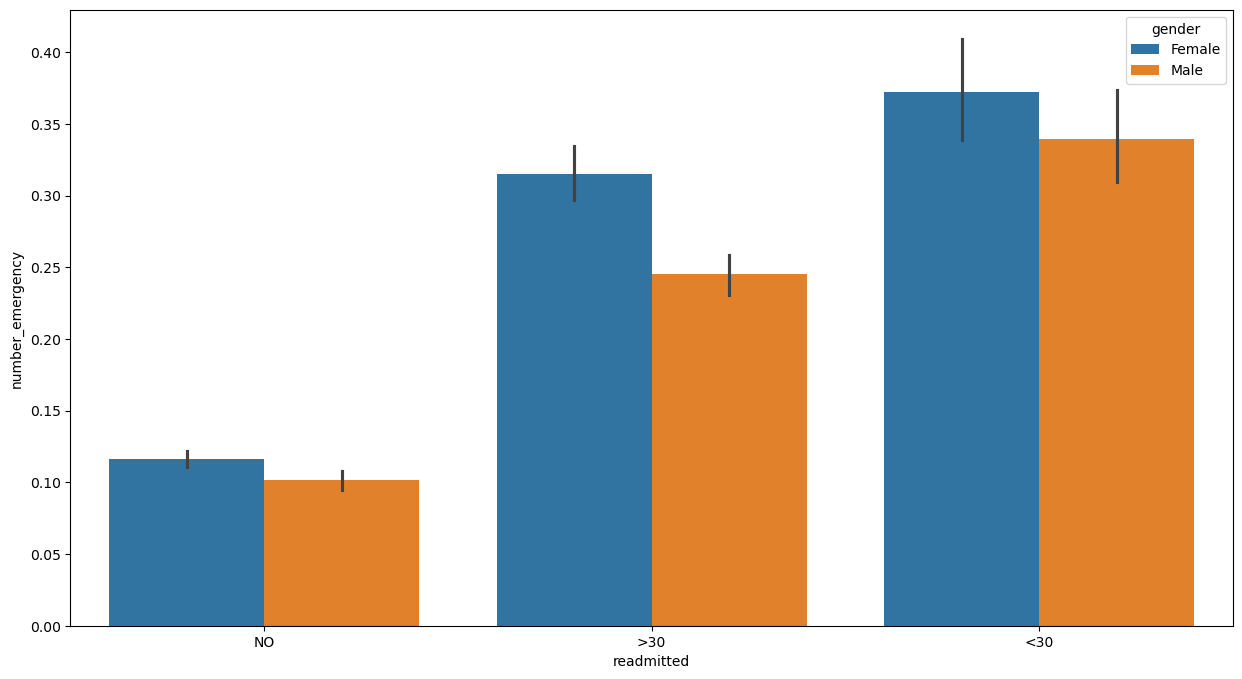

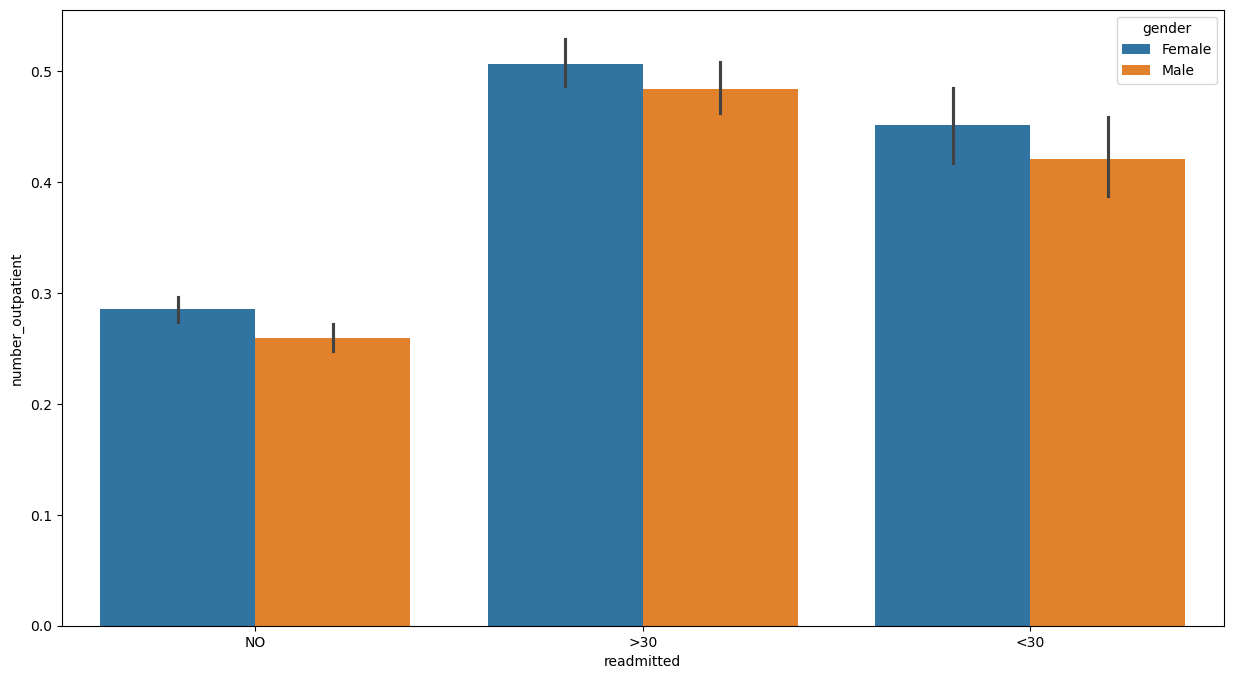

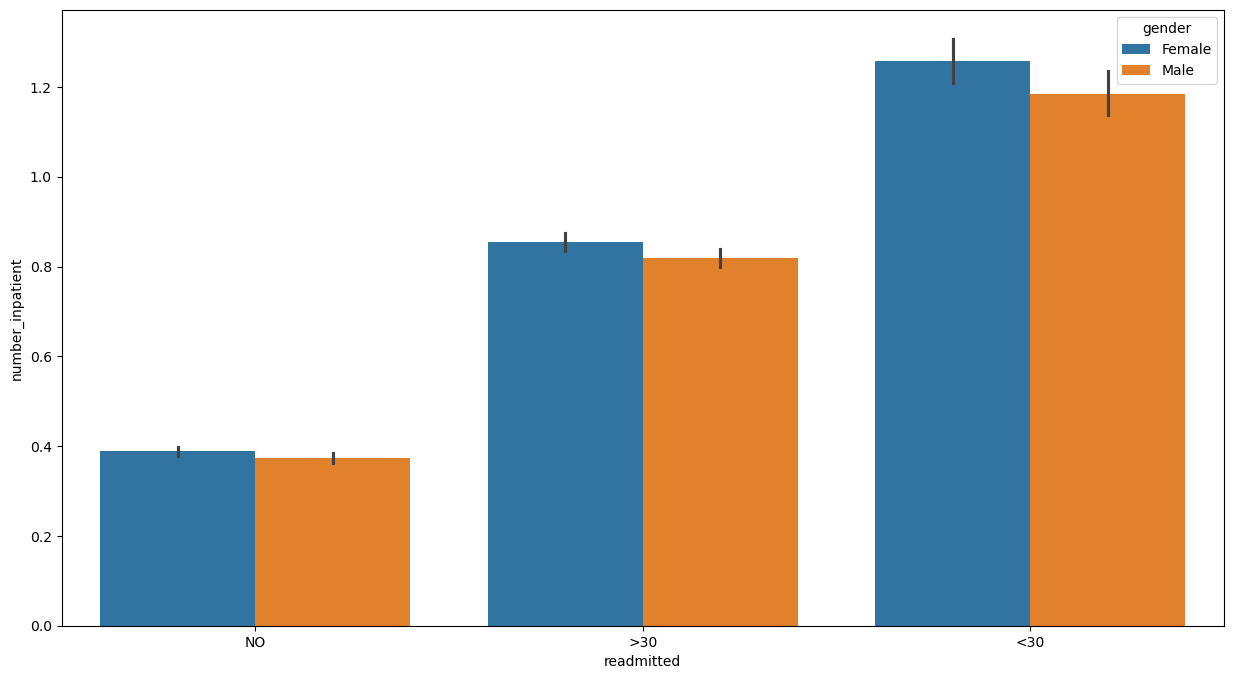

In [124]:
# to cross verify

visits=df_multi[["number_emergency","number_outpatient","number_inpatient"]]
h=df_multi.gender
fix=df_multi.readmitted

for i in visits:
    sns.barplot(x=fix,y=df_multi[i],hue=h)
    plt.show()

Males have a higher frequency of being readmitted within less than 30 days (“<30” category) compared to females.
Females have a slightly higher frequency of not being readmitted (“NO” category) compared to males.
Both genders show similar low readmission frequencies in the “>30” category.

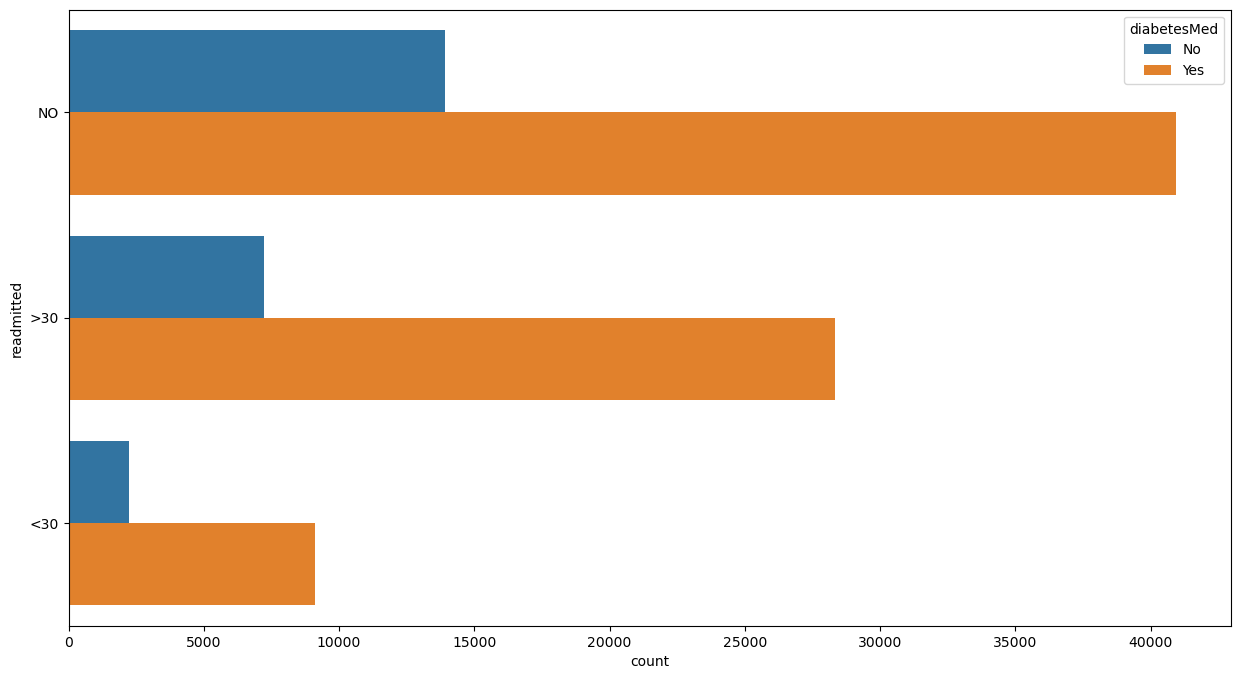

In [125]:
# diabetes med vs readmission

sns.countplot(hue=df_multi.diabetesMed, y=df_multi.readmitted)
plt.show()

The above graph evidently shows that majority of the patients are diabetic and received medications initially.
The small number of patients who dint get any medications either would have had other problems other than diabetes or 
had diabetes but failed to take medication which could have resulted in readmission.

<Axes: xlabel='readmitted', ylabel='count'>

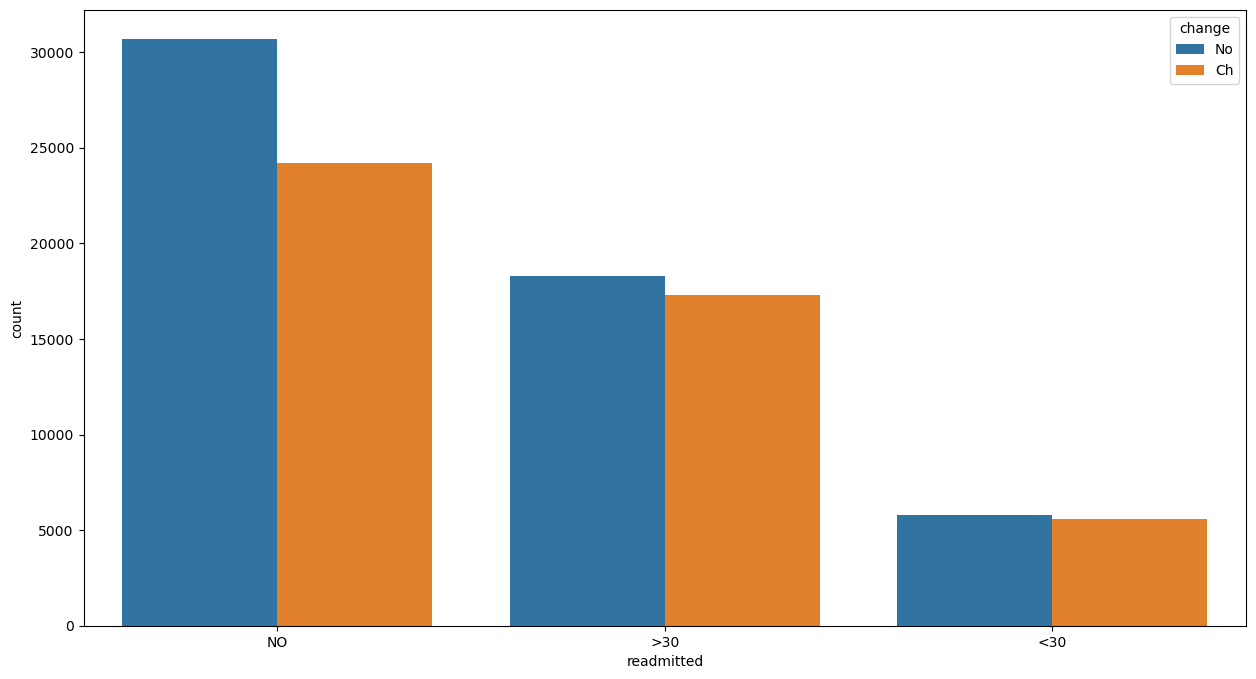

In [126]:
# change in dosage vs readmission


sns.countplot(hue=df_multi.change,x=df_multi.readmitted)

We can analyze this plot in 2 different dimensions:
    Firstly for patients who dint get readmitted, there we no major change in medications, this suggest the stable medicine
    regime, they responded well to initial medications.
    
    But for the patients who got readmitted, majority of them dint get any change in meications, this results in ineffective
    intial treatment procedure. Healthcare providers might have missed oppurtunities to capture and adjust medications in response
    to worsening symptoms or other clinical indicators that could have potentially prevented readmission.
    
    Similarly lifestyle factors, social determinants of health, or change in medications were made byt not properly documented.
    These are the external factors influencing the patients to get readmitted.
    These may not be properly captured by the healthcare managment.

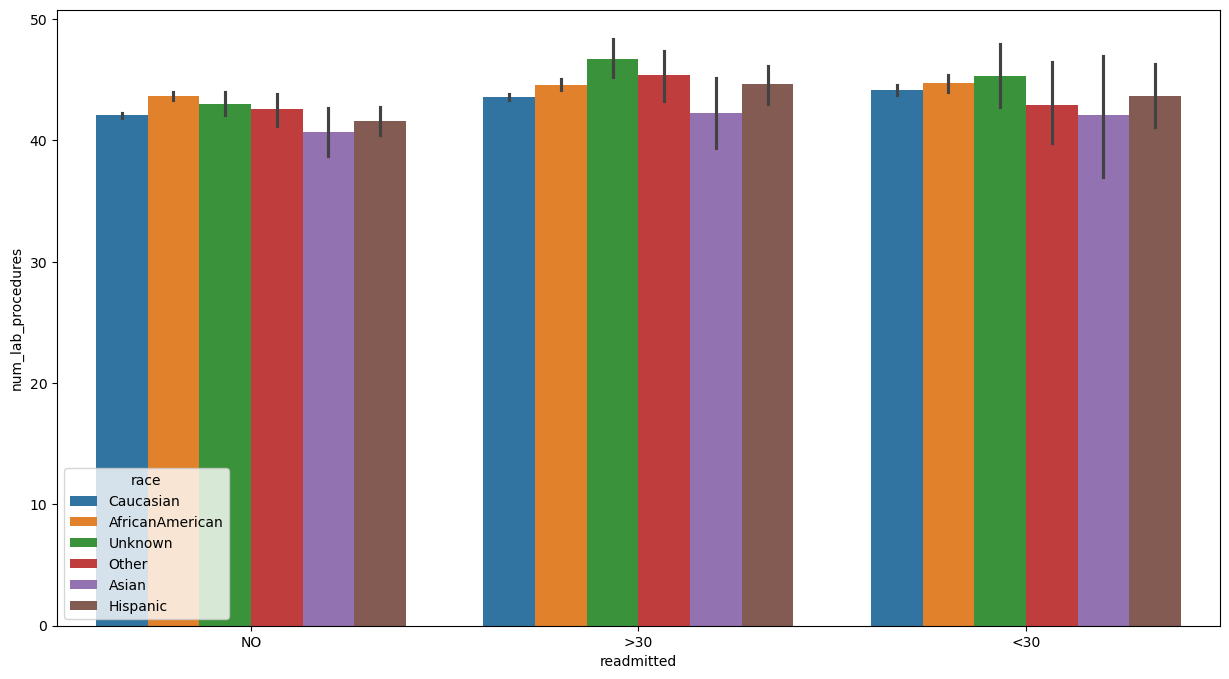

In [127]:
# lab procedures vs readmission vs race


sns.barplot(x=df_multi.readmitted,y=df_multi.num_lab_procedures,hue=df_multi.race)
plt.show()

The graph suggests that there may be a relationship between the number of lab procedures undergone by patients, their race, and their likelihood of readmission. Patients who undergo more lab procedures, particularly those from certain racial groups, appear to have a higher likelihood of being readmitted within 30 days compared to those with fewer lab procedures or those readmitted after 30 days.

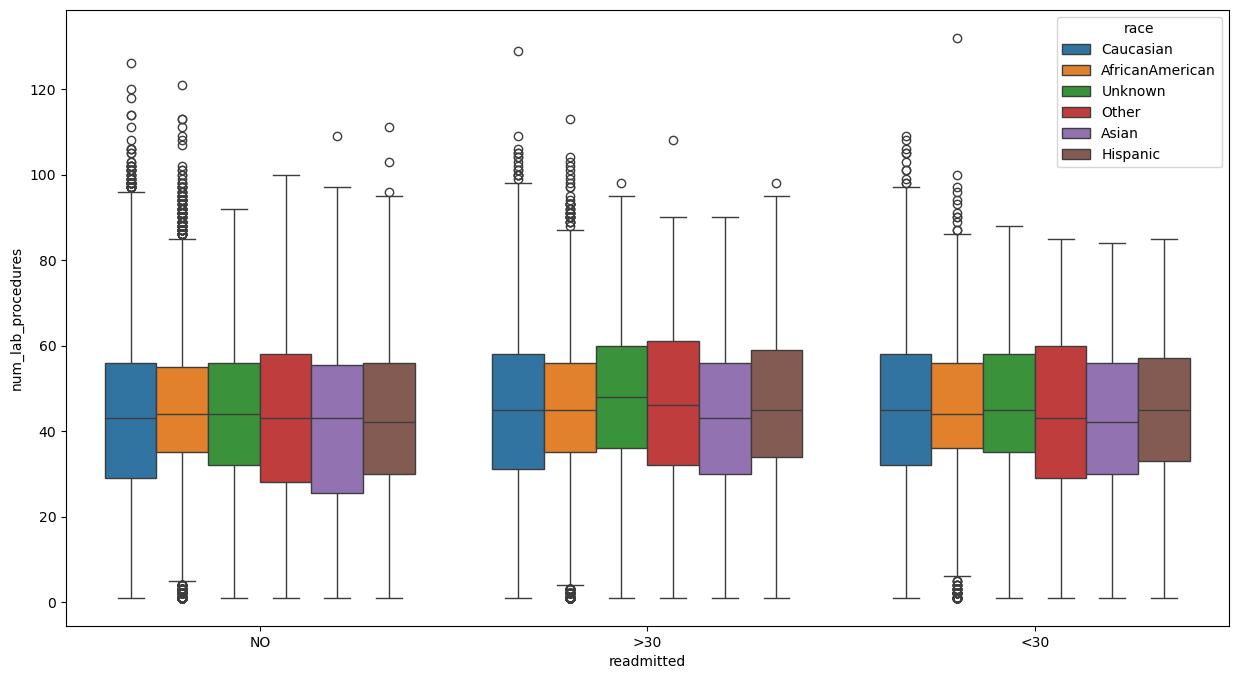

In [128]:
# lab procedures vs readmission vs race


sns.boxplot(x=df_multi.readmitted,y=df_multi.num_lab_procedures,hue=df_multi.race)
plt.show()

From this graph:

    1. There should be minimum 40 lab procedures performed to get substantiate evidences and say that patients dont get readmitted
   
   (Afro-american people are the highest followed by patients with Unknown race)
    
    2. Most of the Unknown race patients get readmitted after discharge

The graph suggests that there may be a correlation between the number of lab procedures undergone by patients, their race, and their likelihood of readmission within 30 days. Patients who experience more lab procedures, particularly those from certain racial groups, appear to have a higher probability of being readmitted within this timeframe compared to those with fewer lab procedures or those readmitted after 30 days.

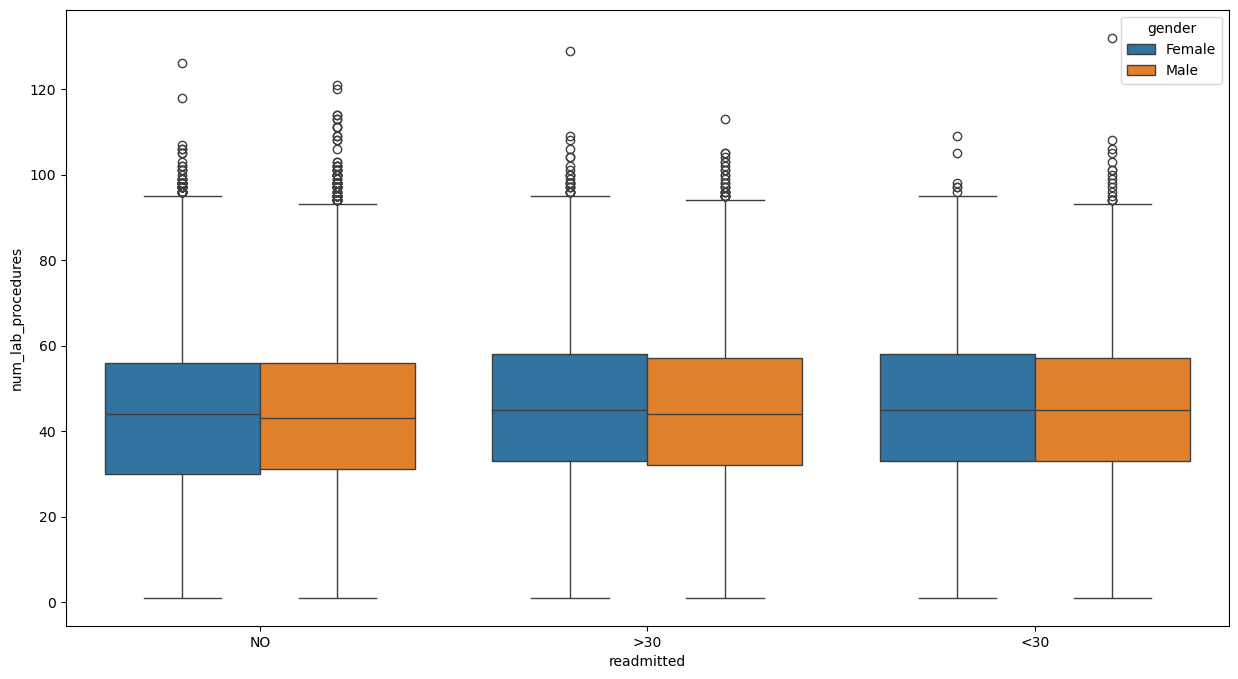

In [129]:
# lab procedures vs readmission vs gender


sns.boxplot(x=df_multi.readmitted,y=df_multi.num_lab_procedures,hue=df_multi.gender)
plt.show()

There is not much difference in male and female ratio in all 3 categories of readmission

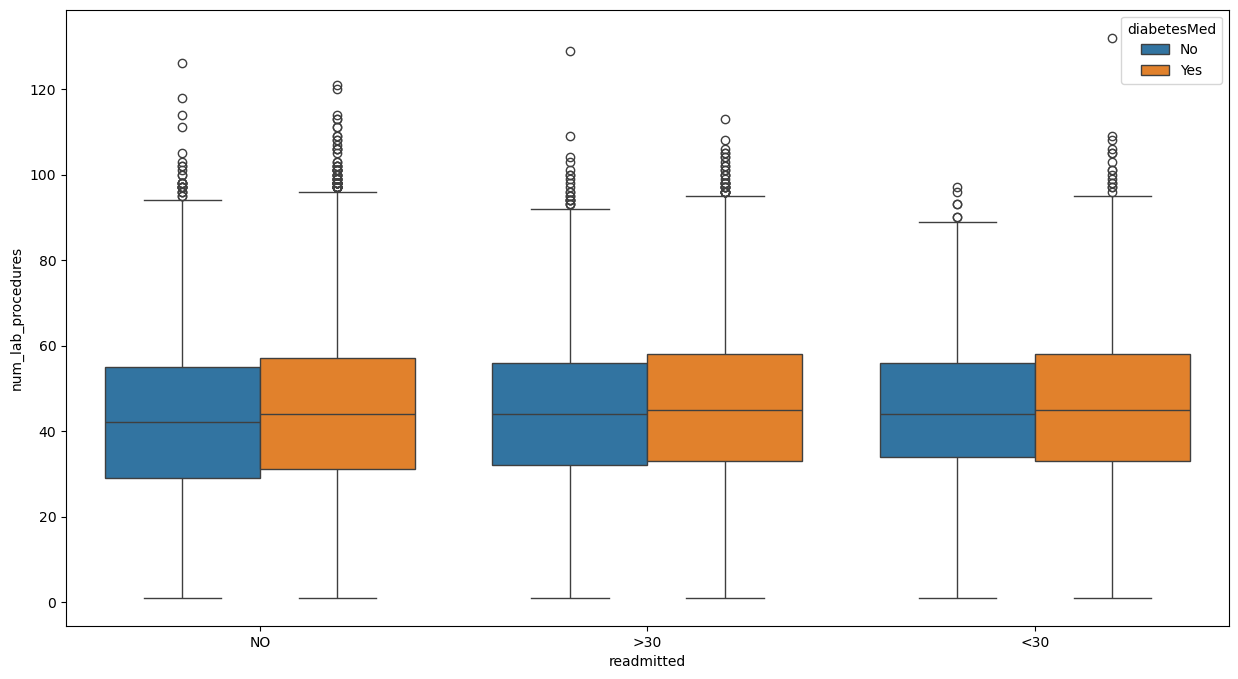

In [130]:
# lab procedures vs readmission vs diabeted med


sns.boxplot(x=df_multi.readmitted,y=df_multi.num_lab_procedures,hue=df_multi.diabetesMed)
plt.show()

The intricacies of this grapth tells us that nearly   5.61 % of patients(57% females and 42 % males) got readmitted and they were not prescribed with any kind of diabetic medications. Though this number is less, it still affects the hospital management .

There may be many reasons like, wrong predictions by doctors after analysing various lab results, no dosage in multiple visits etc.

Hence the hospital management shoudl act on this

sns.barplot(x=df_multi.readmitted,y=df_multi.num_lab_procedures,hue=df_multi.change)
plt.show()

Similarly nearly 14.27%(56% Females, 44% males) of patients were not advised to change their medications , which made them to get readmitted.

This could also act as a potential reason for mistake in hospital management side


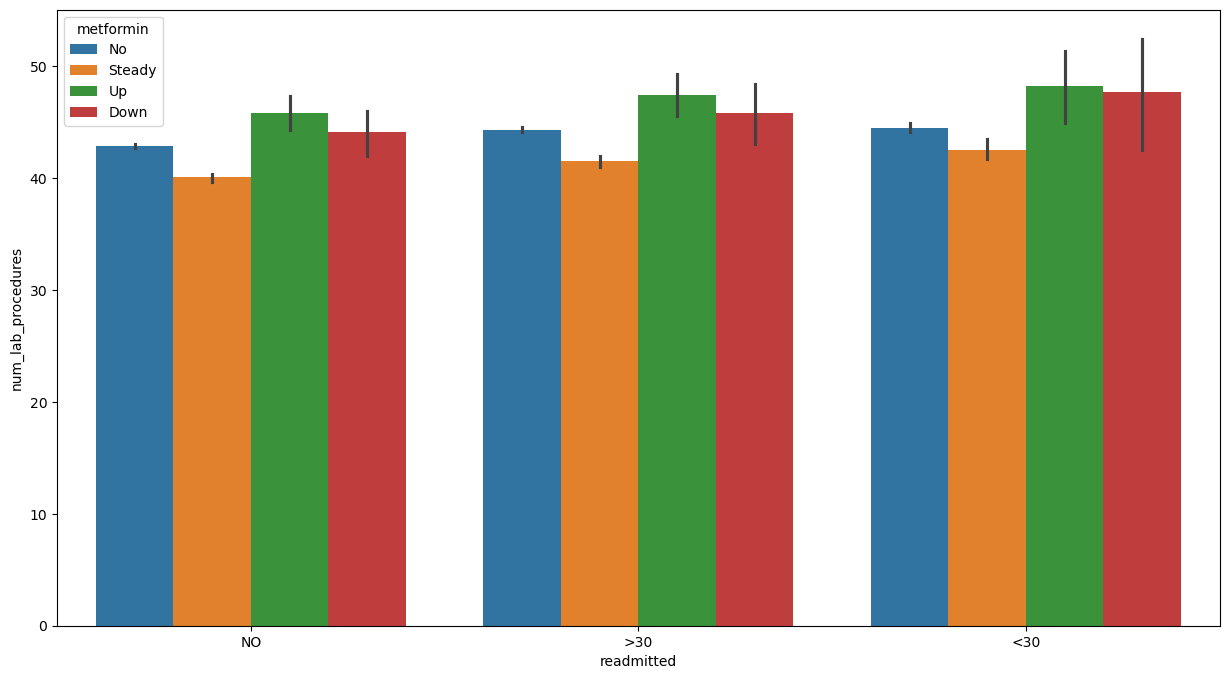

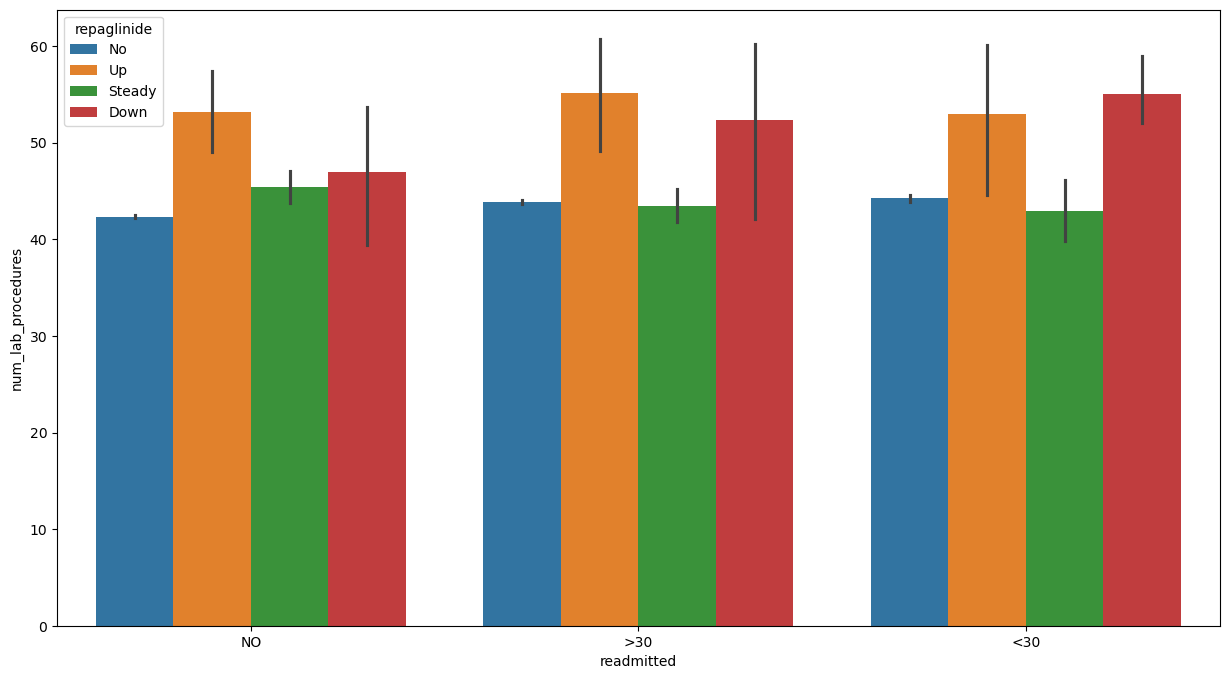

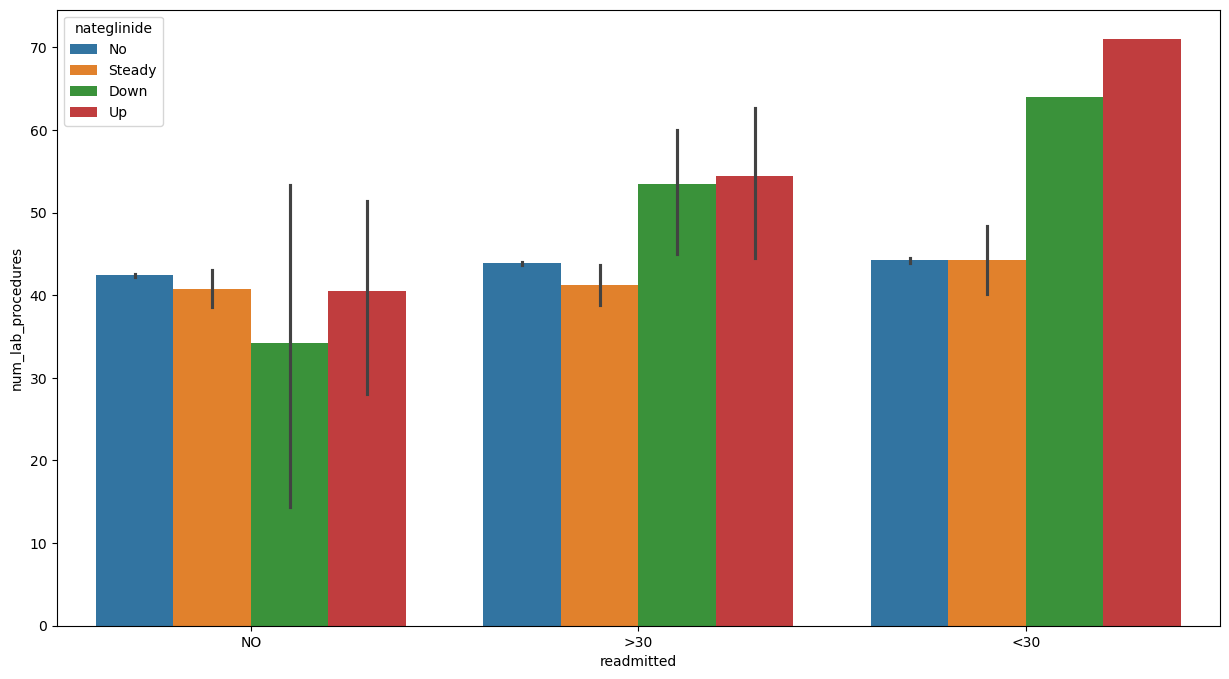

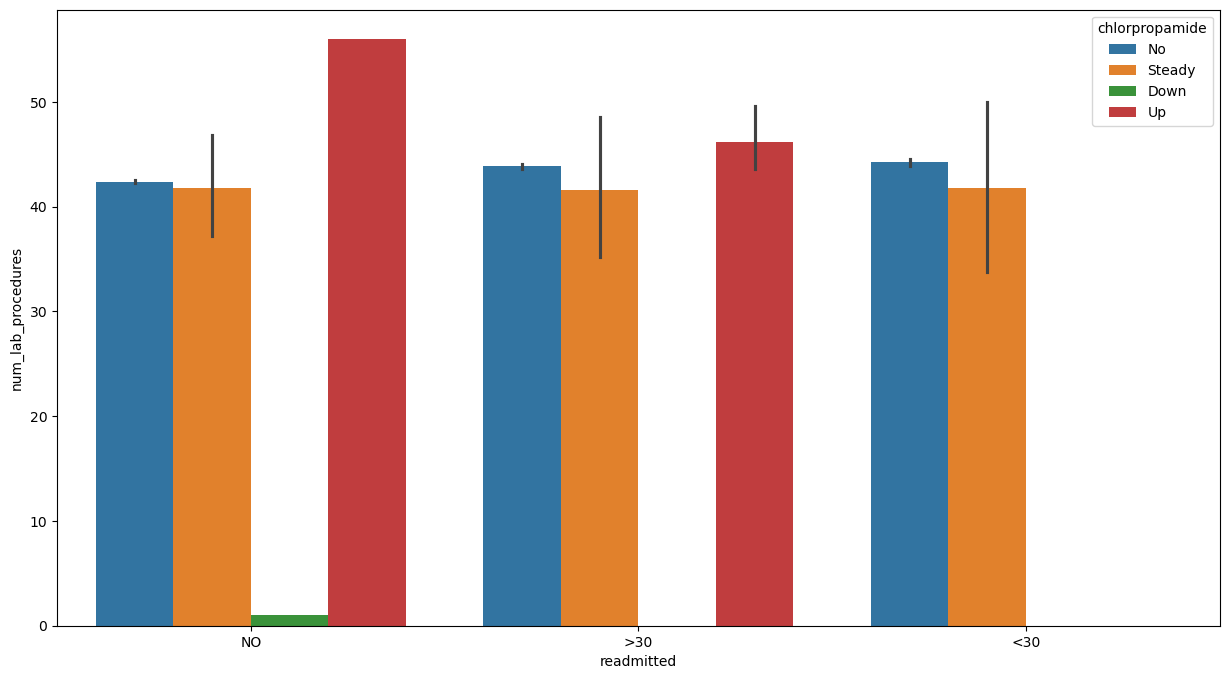

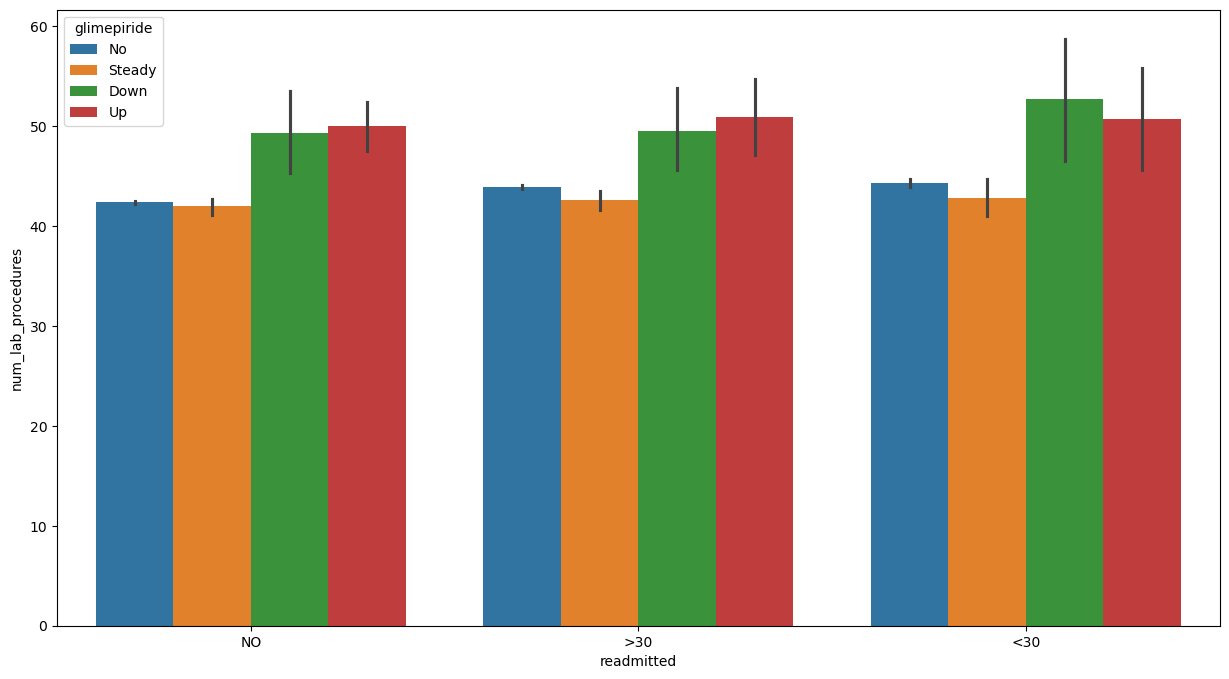

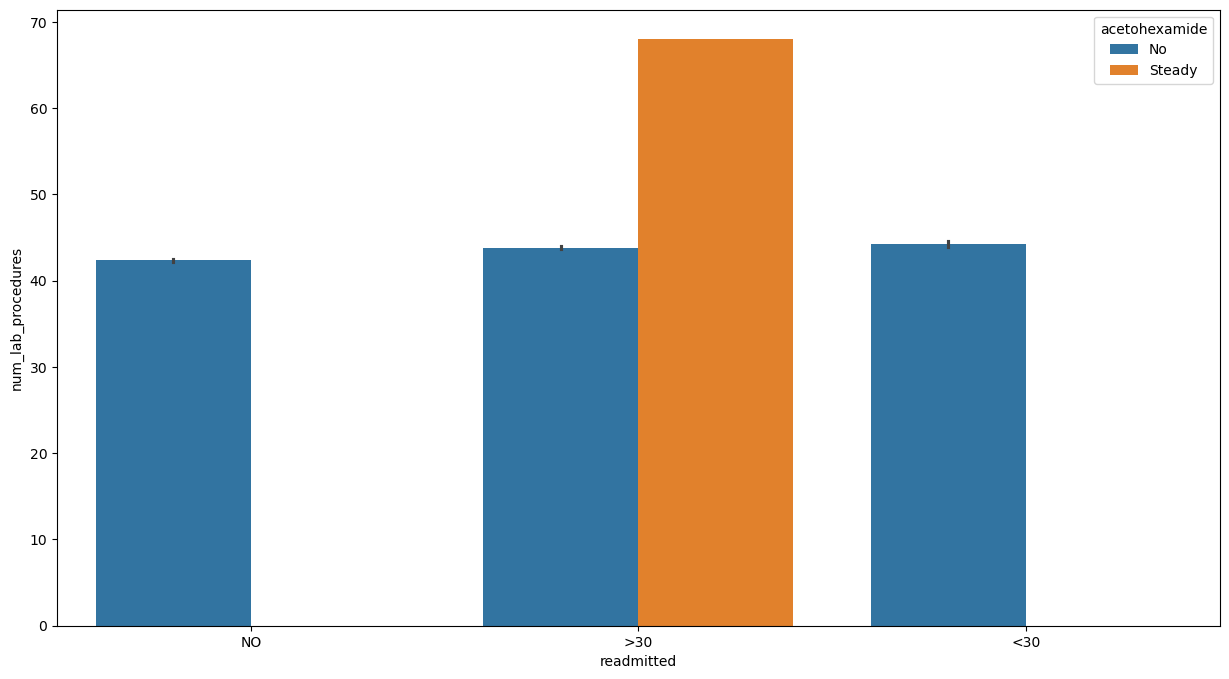

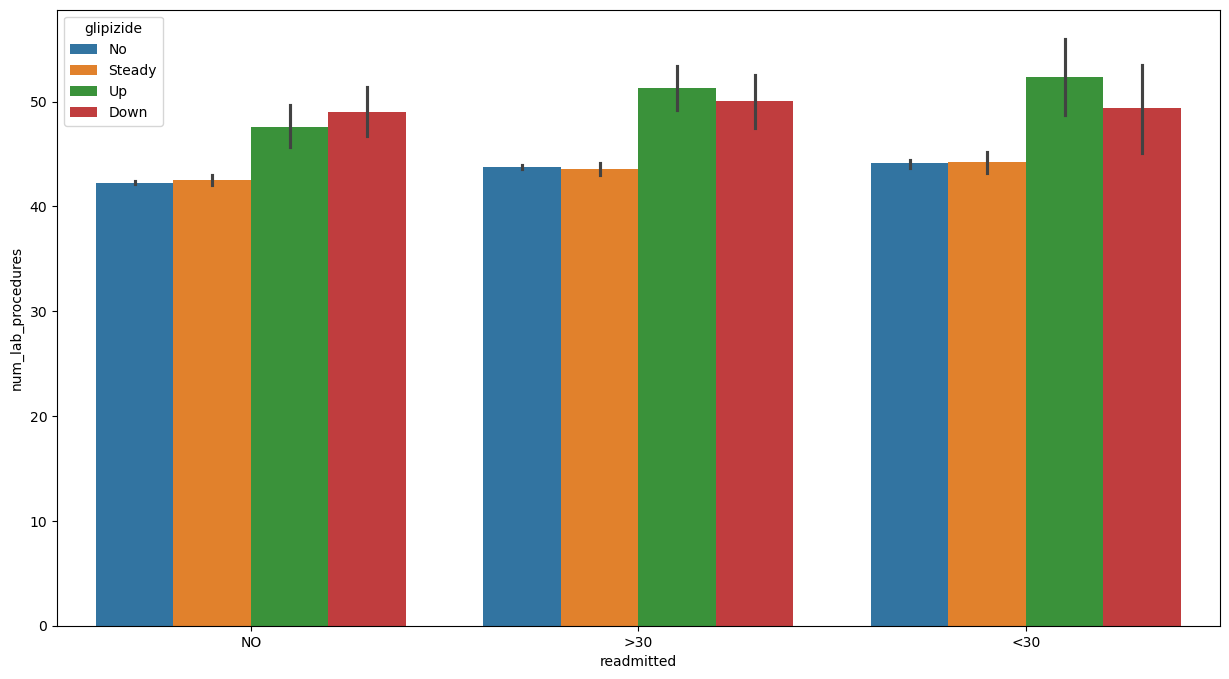

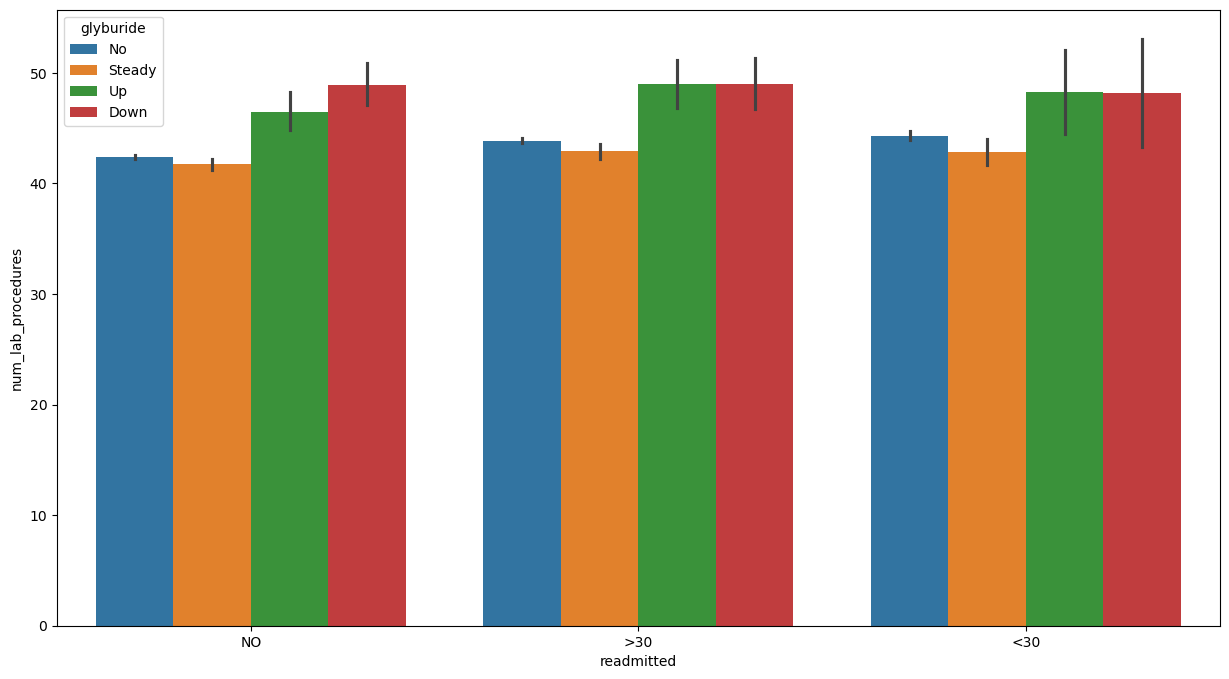

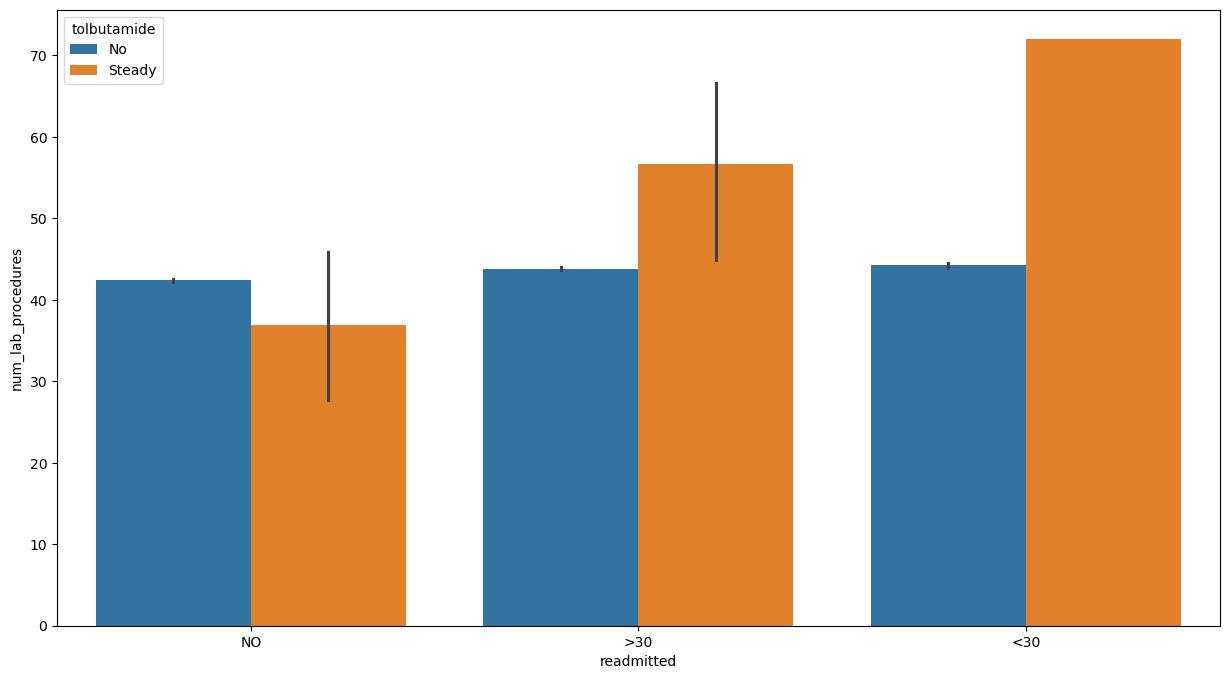

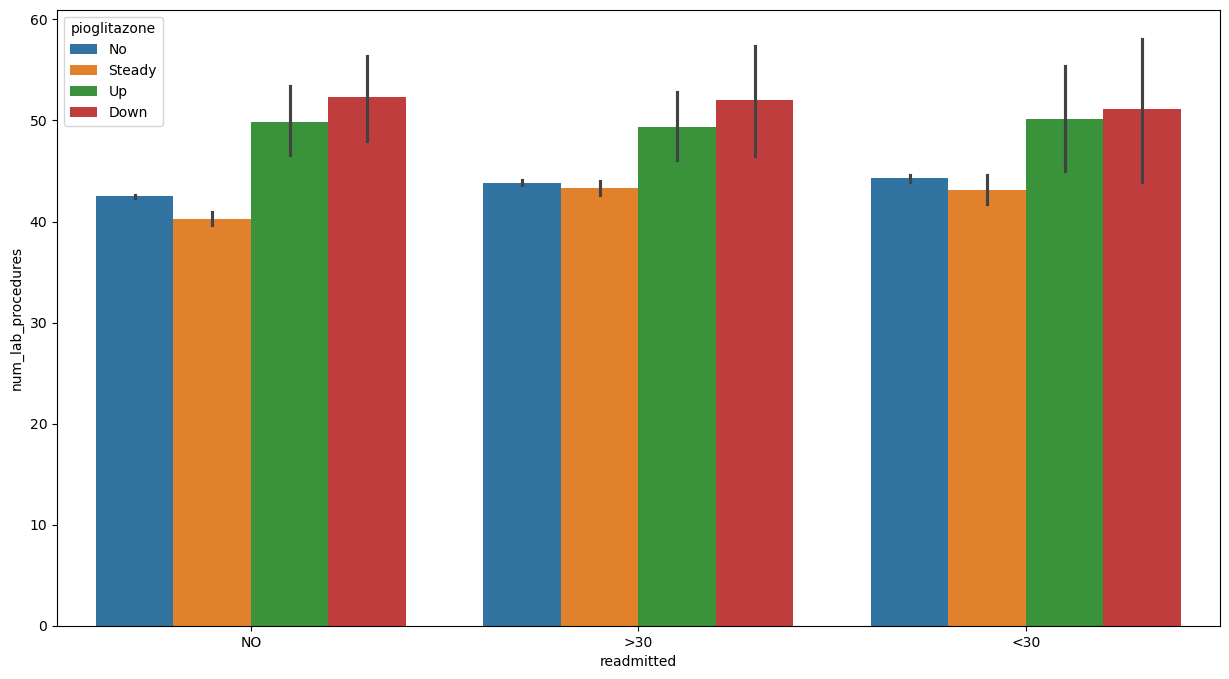

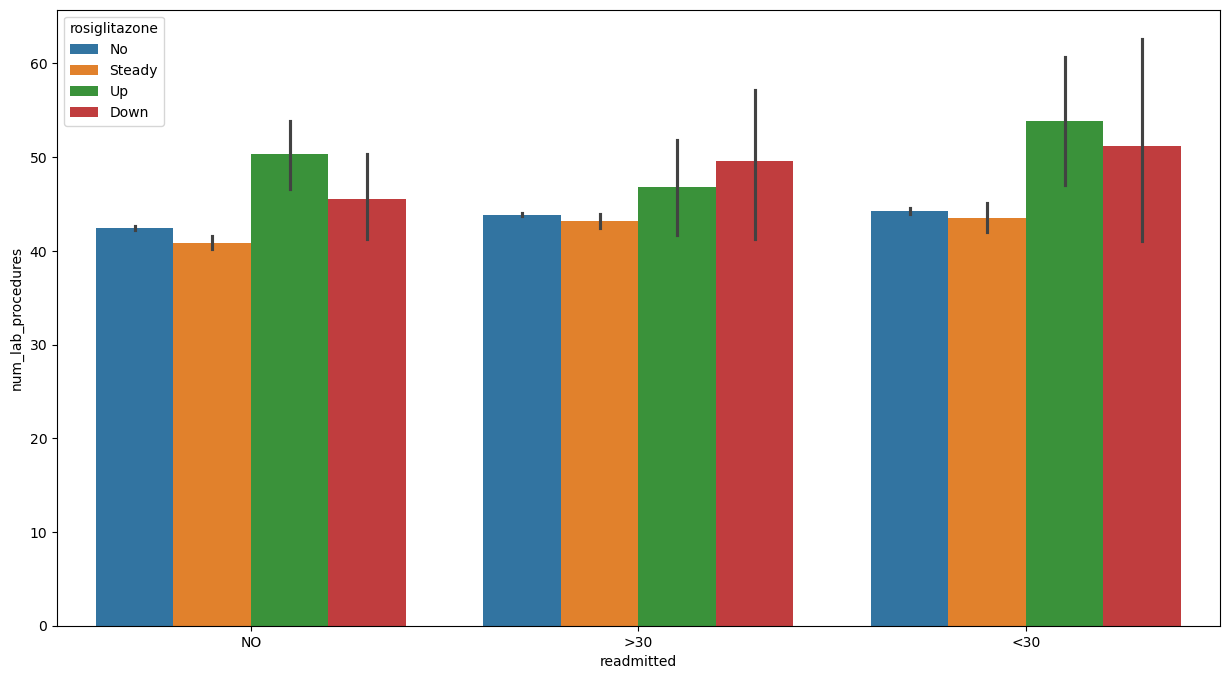

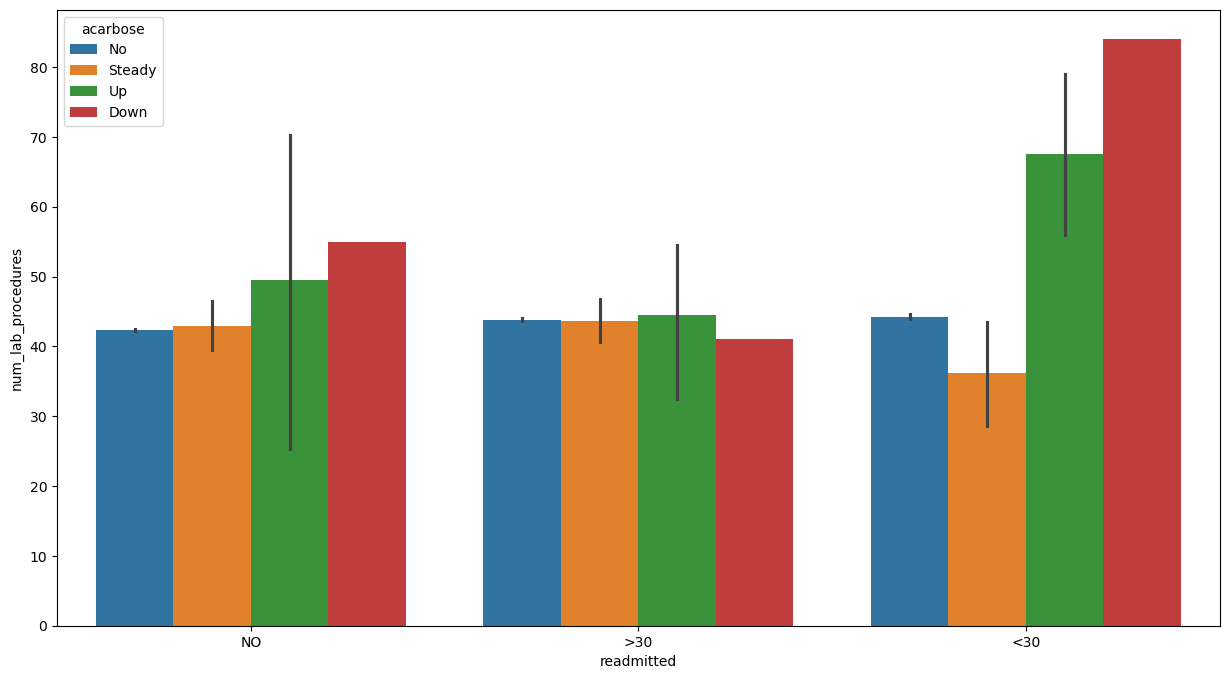

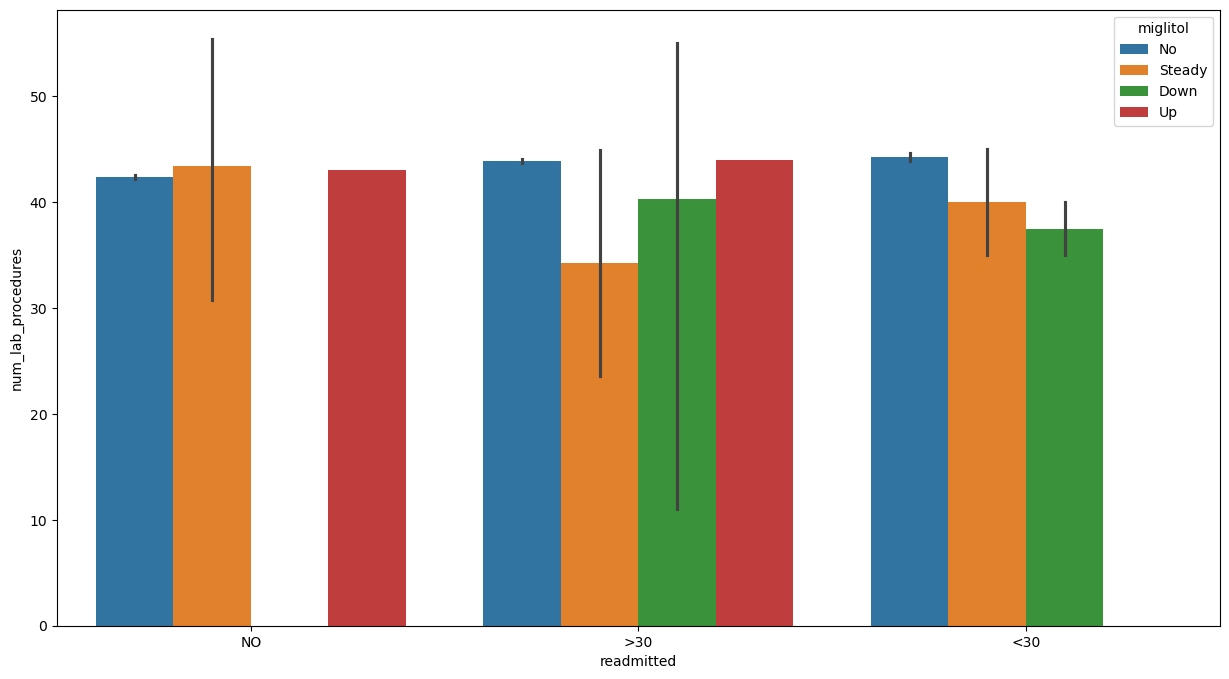

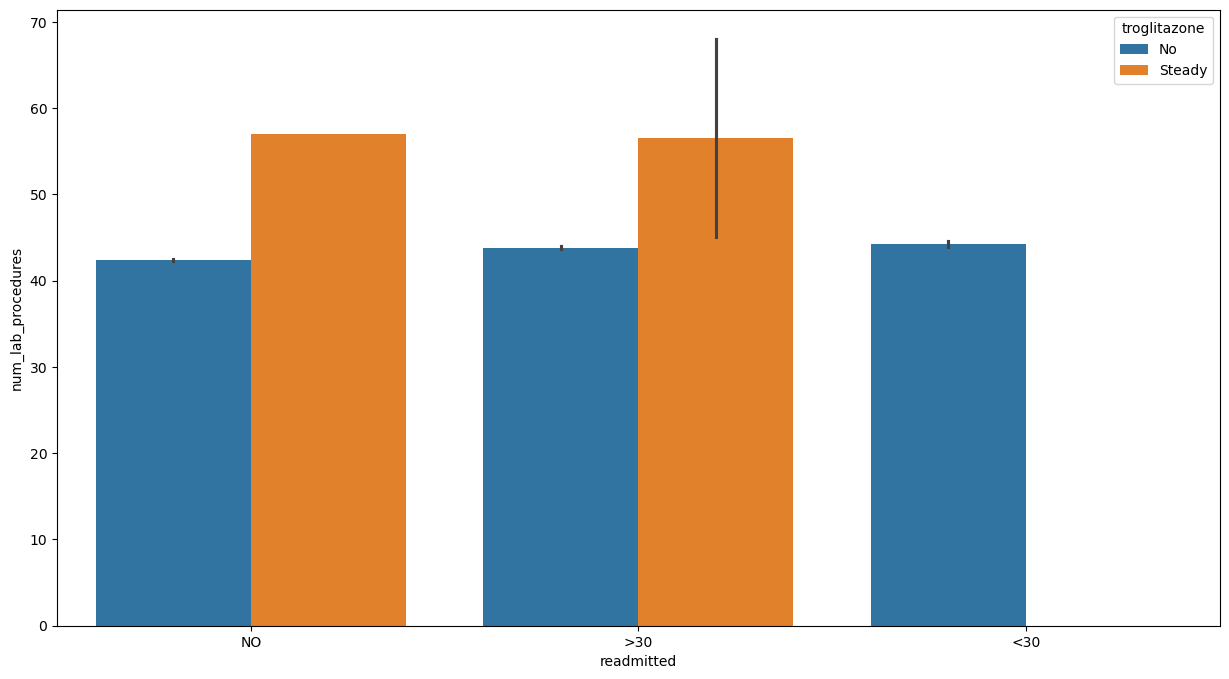

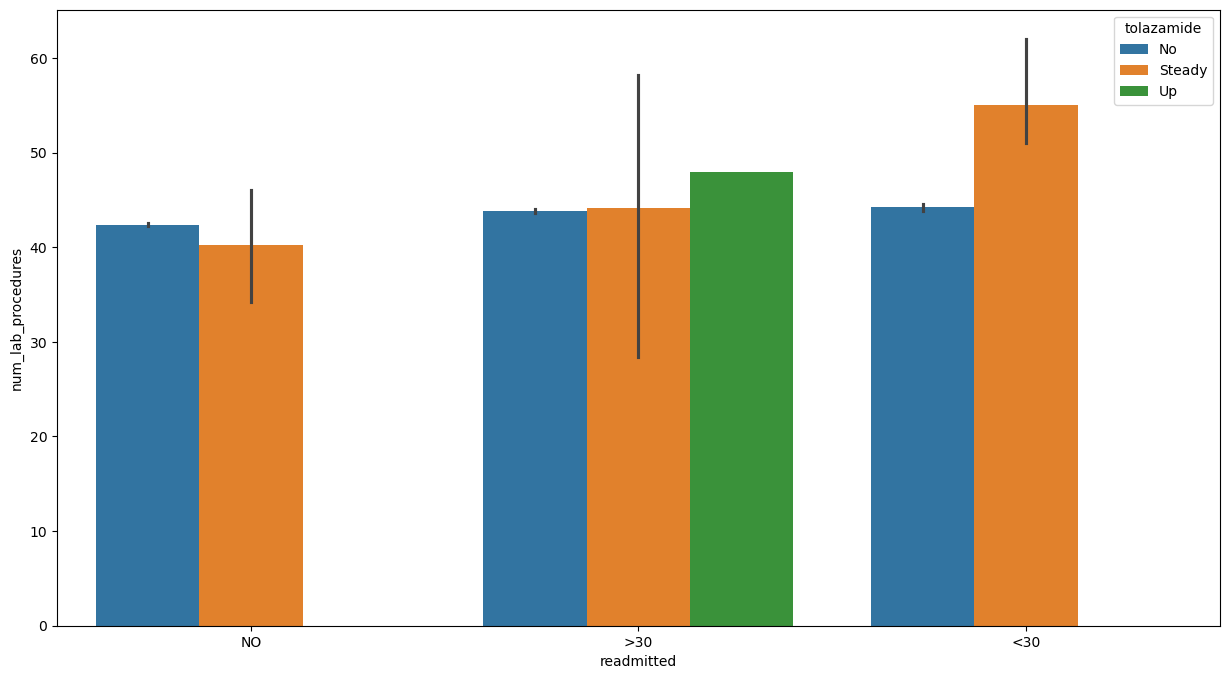

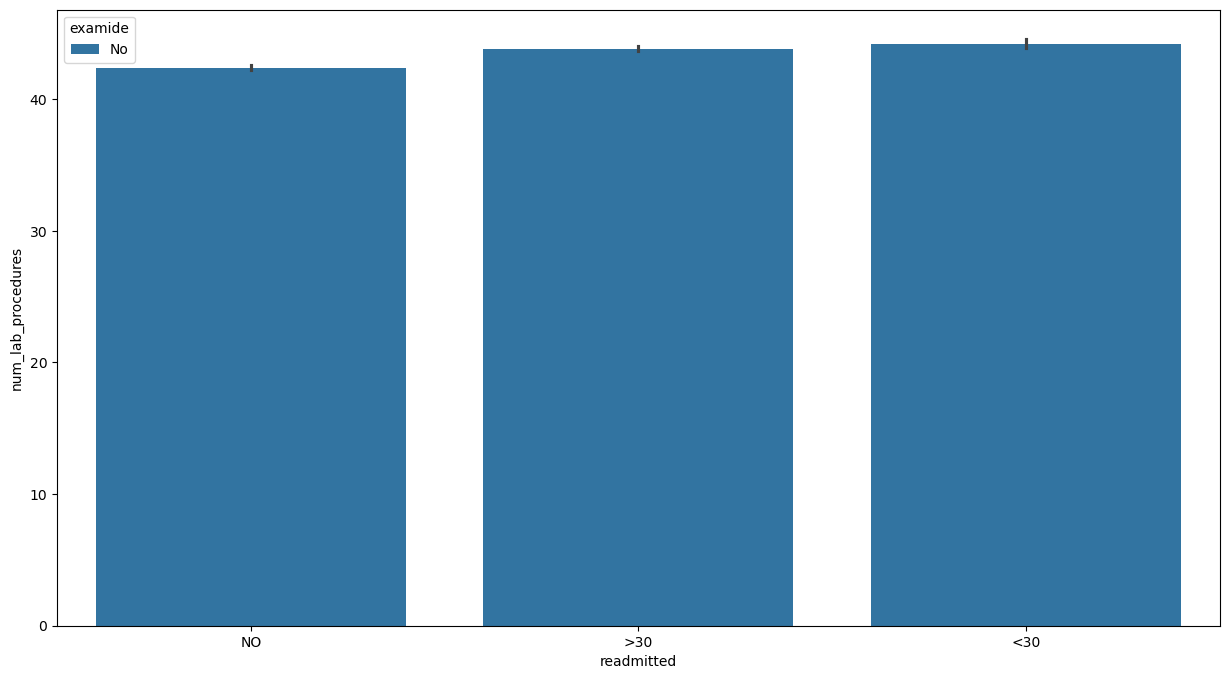

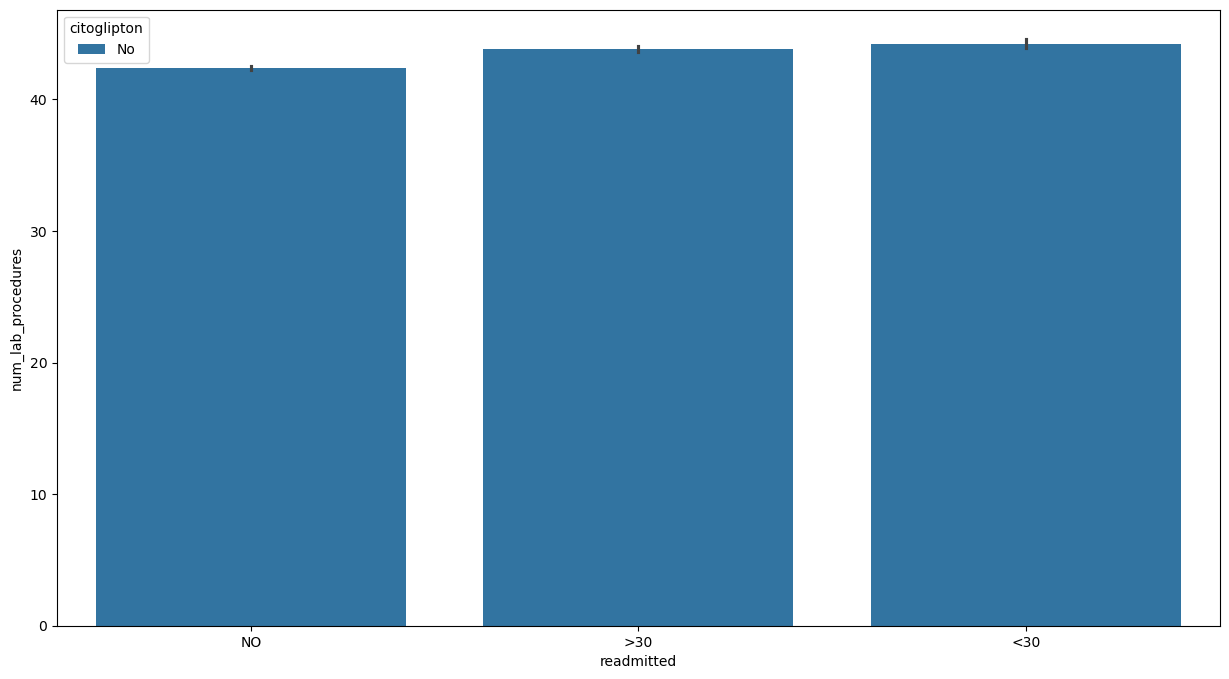

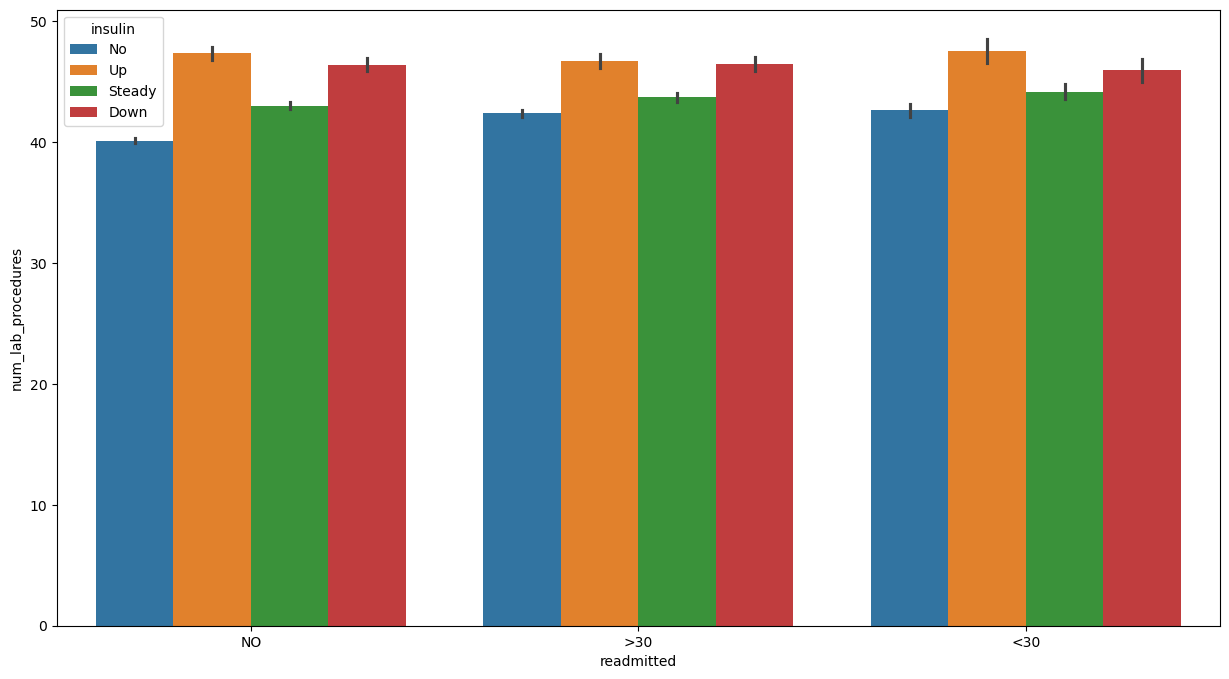

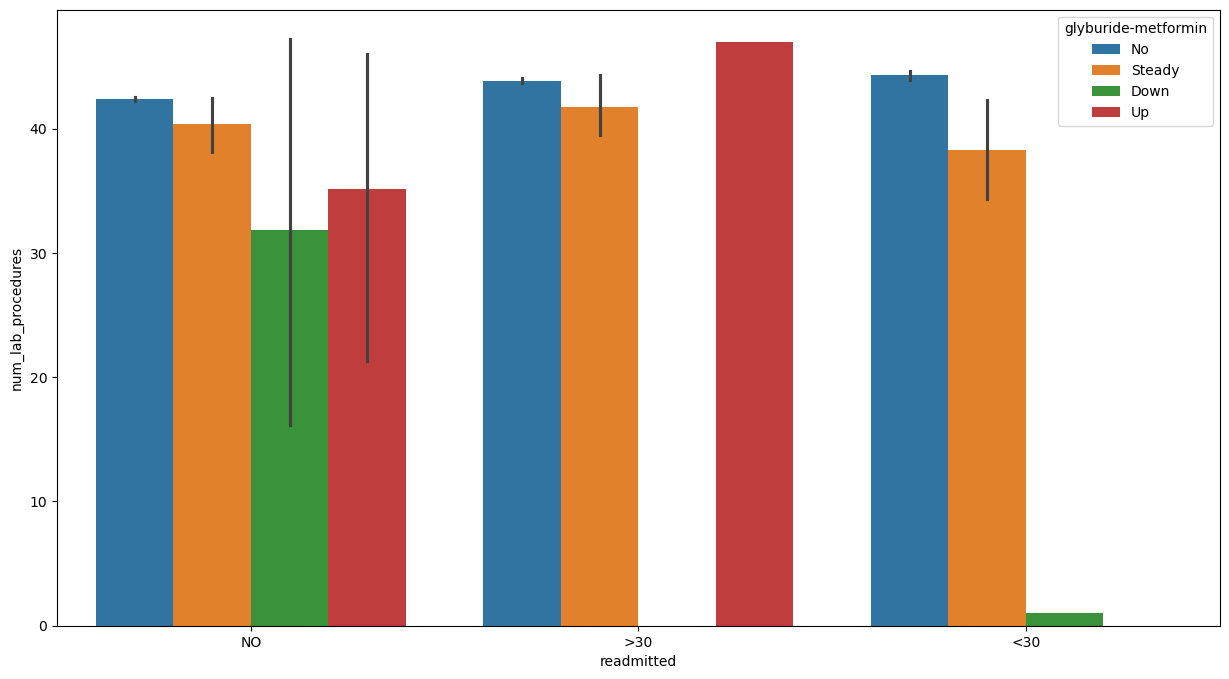

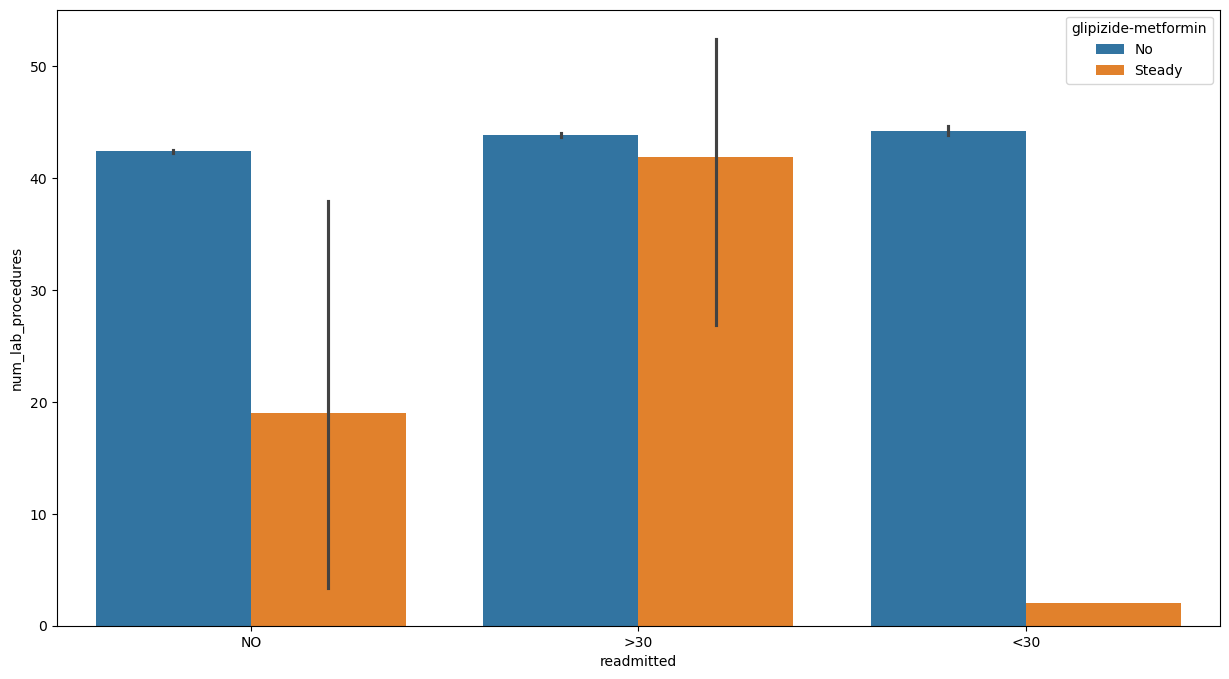

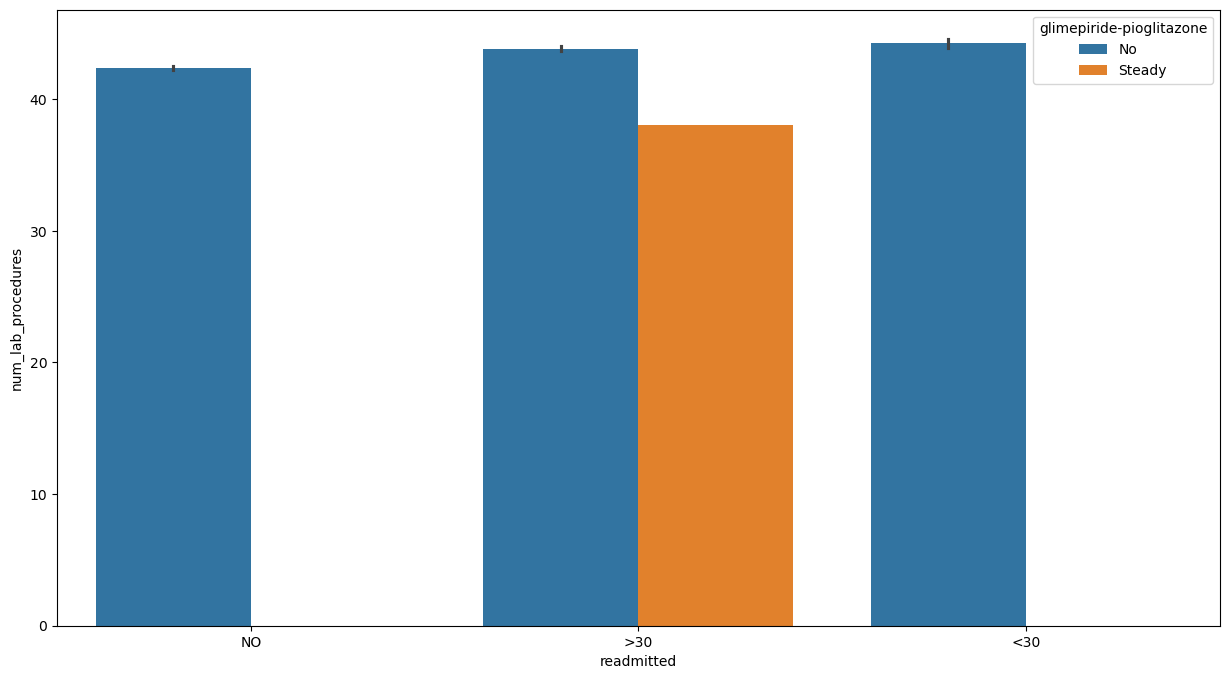

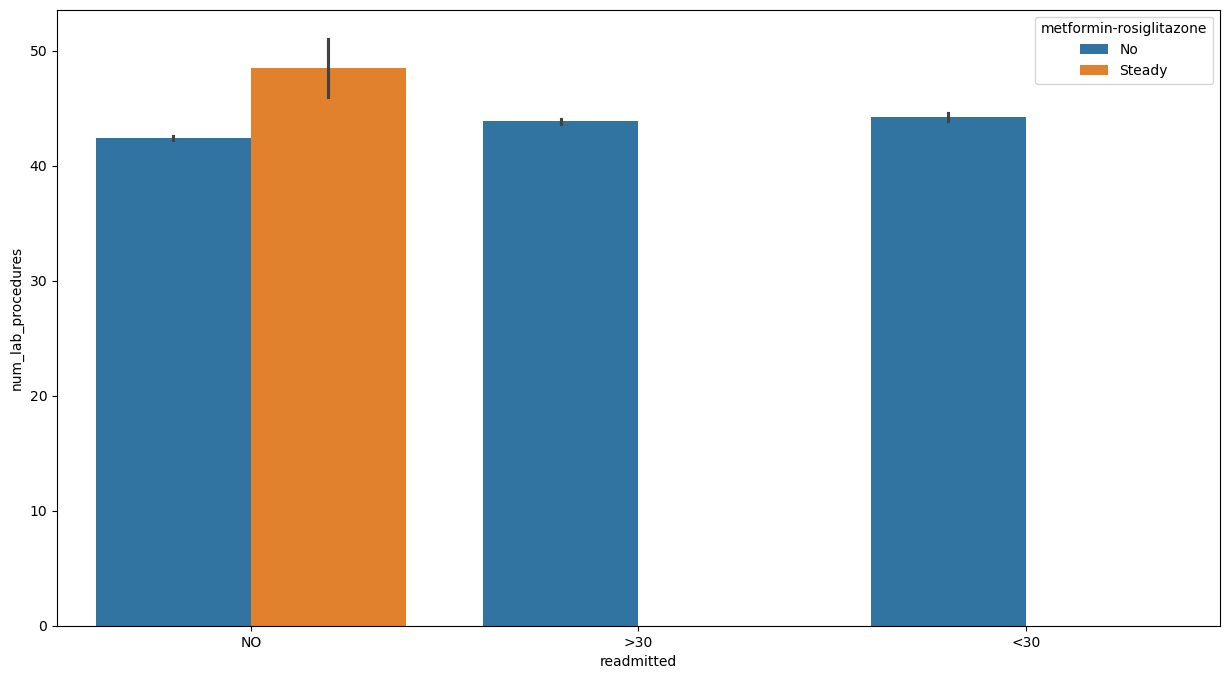

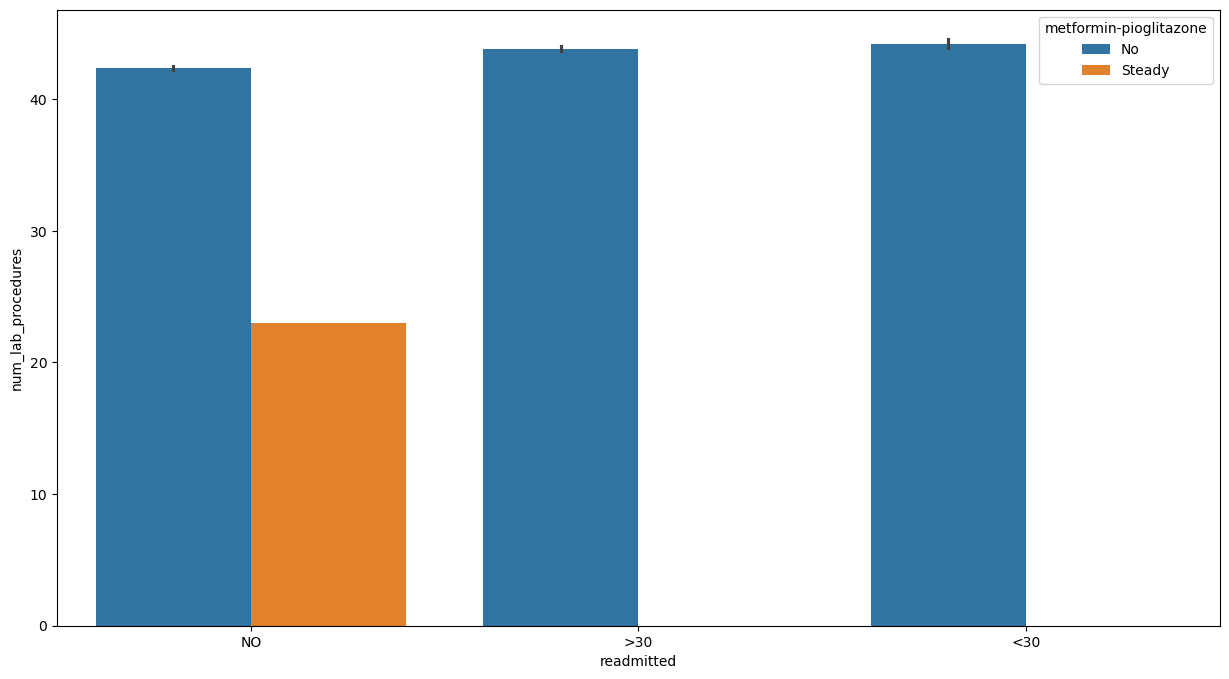

In [131]:
# drugs vs readmission vs lab procedures
h=df_multi.gender
fix=df_multi.readmitted

for i in drugs:
    sns.barplot(x=fix,y=df_multi.num_lab_procedures,hue=df_multi[i])
    plt.show()


Most Used Drugs:

    Glimepiride-Pioglitazone and Glipizide-Metformin are among the most used drugs. They consistently show higher lab procedure counts, especially with steady intake, across all readmission categories.

Commonly Used Drugs:
    
    Glyburide-Metformin and Metformin-Pioglitazone are commonly used. They also exhibit higher lab procedure counts, particularly with steady intake, but with some variability in readmission scenarios.

Less Used Drugs:

    Troglitazone, Tolazamide, Acarbose, Miglitol, Examide, and Citogliptone show mixed results in terms of lab procedure counts and readmission rates. They are less commonly used compared to the before mentioned medications.

Summary:

     In summary, Glimepiride-Pioglitazone and Glipizide-Metformin are often preferred due to their more consistent performance in terms of higher lab procedure counts, indicating more intensive monitoring, across various readmission scenarios. Glyburide-Metformin and Metformin-Pioglitazone are also commonly used but show some variability. Other drugs have less predictable effects and are therefore less commonly prescribed.

Main Observations:
    1.Firstly 35% of Patients were not prescribed with Citoglipton and examide(which is used to treate Hypertension and cardinal issue), which could be a reason that eventually led them to get readmitted.
    
    2.Secondly in a broader perspective, it seems like there is a good correlation between dosage readjustment and likelihood of readmission.
    
    3.There is a pattern observed between dosage adjustment vs treatement response and readmission status:-
        The patients who responded well to the initial medications dint get readmitted , which implies the drugs world             pretty well for them.
       
        Whereas for patients who were readmitted, especially within 30 days, there was a trend of increased dosage.
        Eg: If we analyze , for drug Acarbose, the % of Dosage has reduced for majority of the patients, which suggests 
            that the inital medications worked well for them. But it dint work well for patients who got readmitted in                 <30days and no drastic increase in dosage for patients readmitted >30days.
            
    4.This suggests that need for dosage adjustments in response to readmission could reflect underlying changes in the patient's condition or disease progression. Patients who experience readmission, especially within a shorter timeframe,would have experienced worsening symptoms or complications which resulted in an increase in dosage to  manage their condition effectively.
        
In summary, we infer that deciding the adjustment in dosage could be a part of broader treatement strategy, but if
healthcare providers(doctors) analyze how patients respond to medications individually, the aim of optimizing patients
treatment and reducing the readmission will increase.

In [132]:
num_multi=df_multi.select_dtypes(include=np.number)
cat_multi=df_multi.select_dtypes(include="object")

<Axes: >

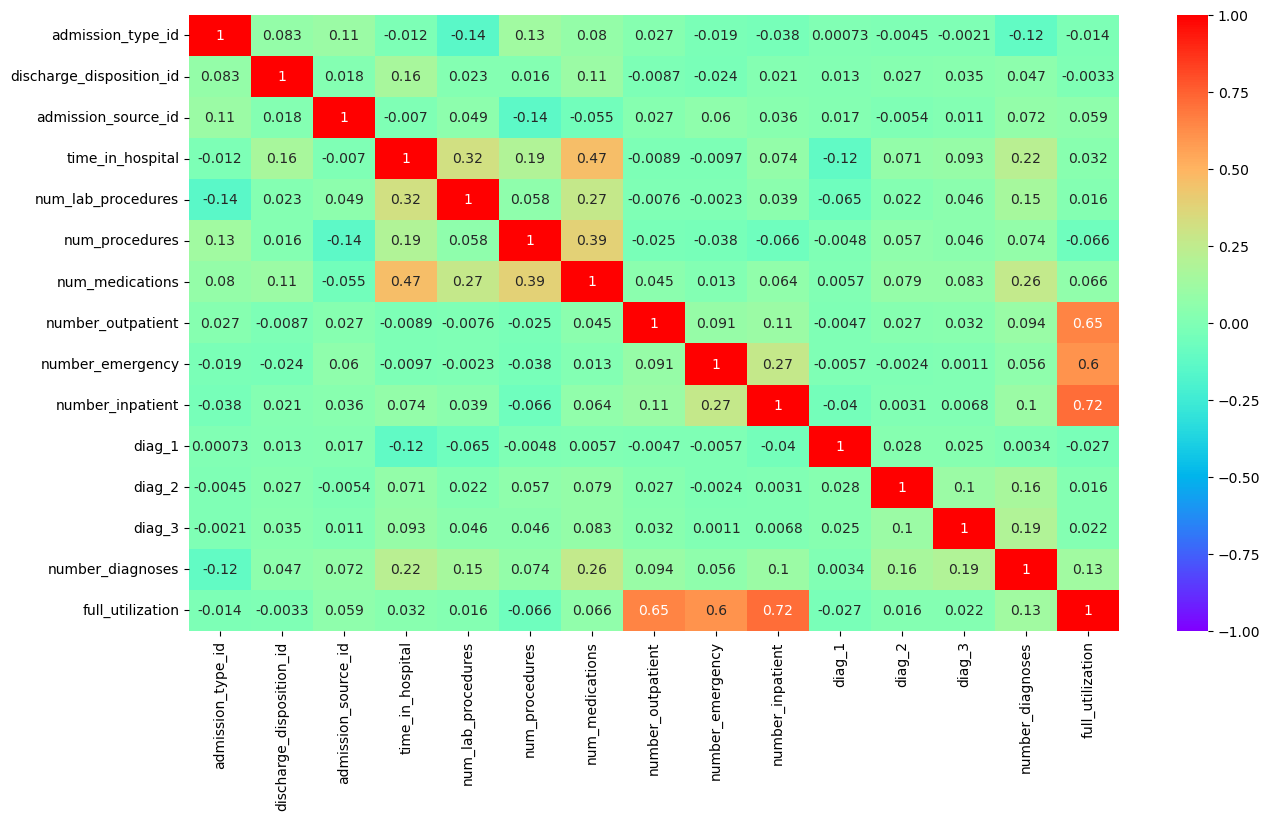

In [133]:
sns.heatmap(num_multi.corr(),annot=True,vmax=1,vmin=-1,cmap="rainbow")


# There are  high correlated features

In [ ]:
# all numerical column vs target variable


sns.pairplot(df_multi,hue="readmitted")
plt.show()

THERE ARE HIGHLY CORRELATED FEATURES:

Full utilization is a derived feature from (number_outpatients,inpatients, emergency)

In [133]:
# Check skewness

print("Skew for numerical columns","\n",num_multi.skew())

Skew for numerical columns 
 admission_type_id           1.591984
discharge_disposition_id    2.563067
admission_source_id         1.029935
time_in_hospital            1.133999
num_lab_procedures         -0.236544
num_procedures              1.316415
num_medications             1.326672
number_outpatient           8.832959
number_emergency           22.855582
number_inpatient            3.614139
diag_1                      0.268349
diag_2                      0.575734
diag_3                      0.674403
number_diagnoses           -0.876746
full_utilization            5.315210
dtype: float64


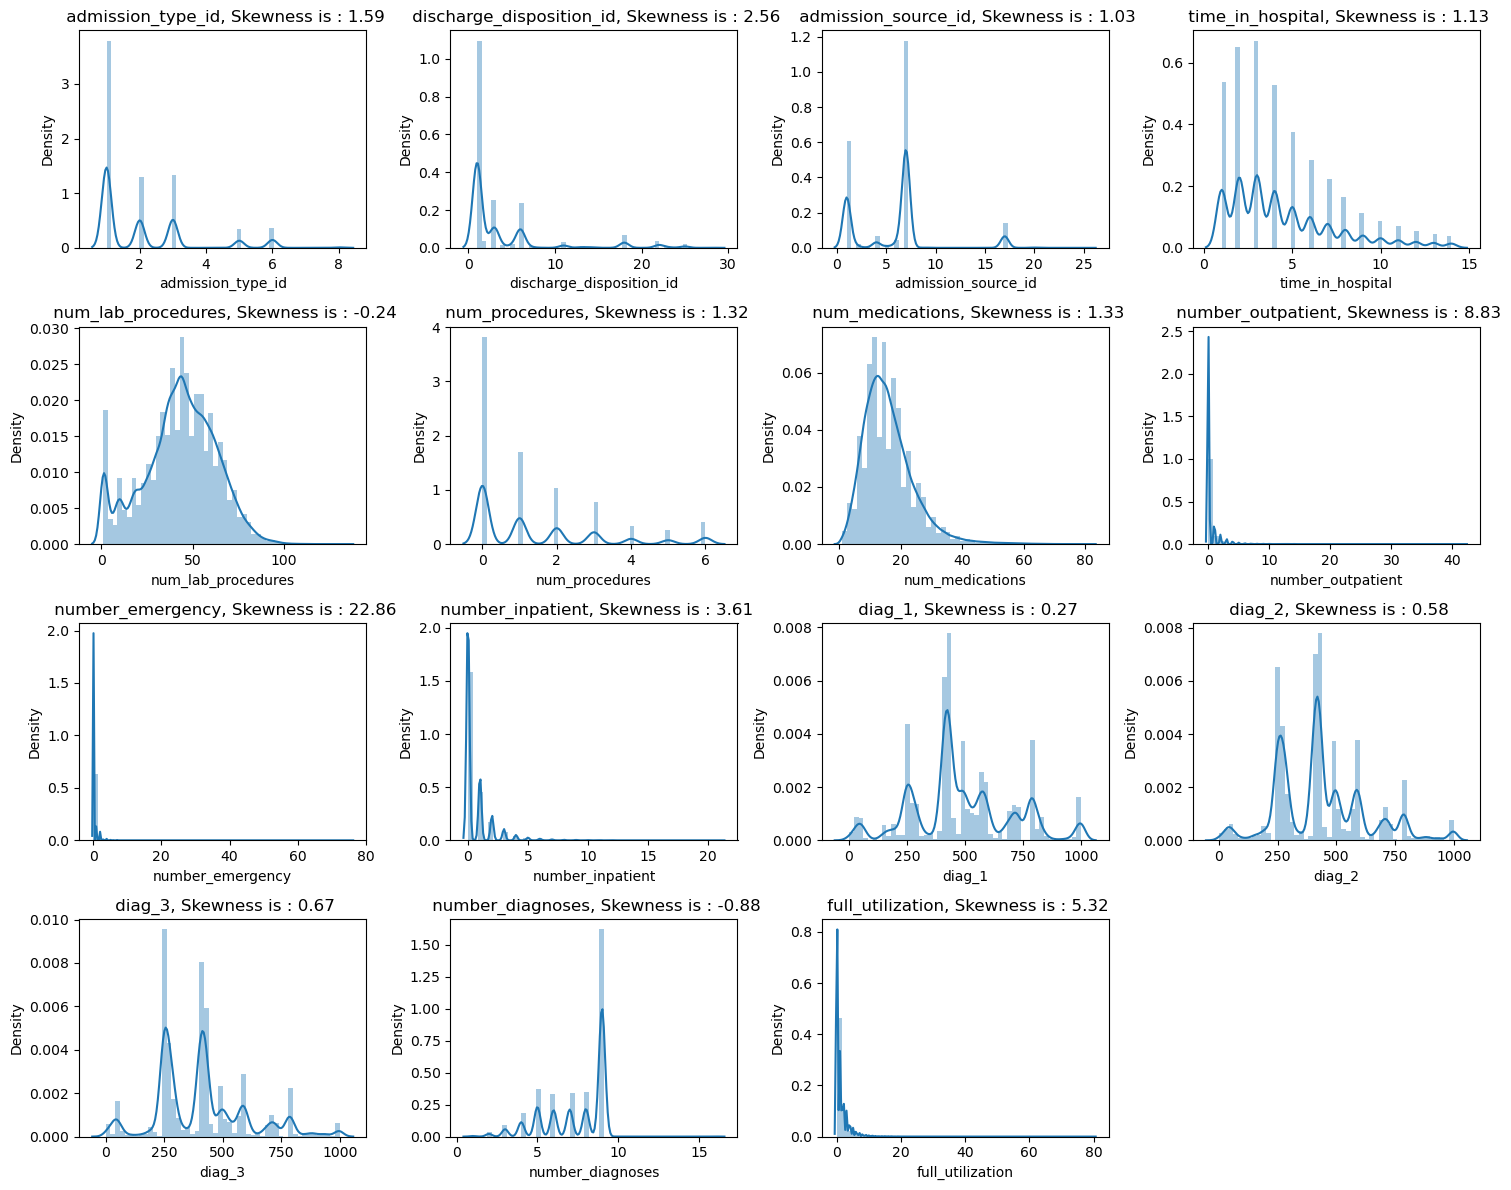

In [134]:
t=1
plt.figure(figsize=(15,12))

for i in num_multi.select_dtypes(np.number).columns:
    plt.subplot(4,4,t)
    sns.distplot(num_multi[i],kde=True)
    plt.title(f' {i}, Skewness is : {round(num_multi[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()



FROM THIS PLOT WE CAN SEE THAT MANY COLUMNS HAVE SKEWNESS. FURTHER INTROSPECTION IS NEEDED TO ELIMINATE OUTLIERS

CHECK FOR OUTLIERS:

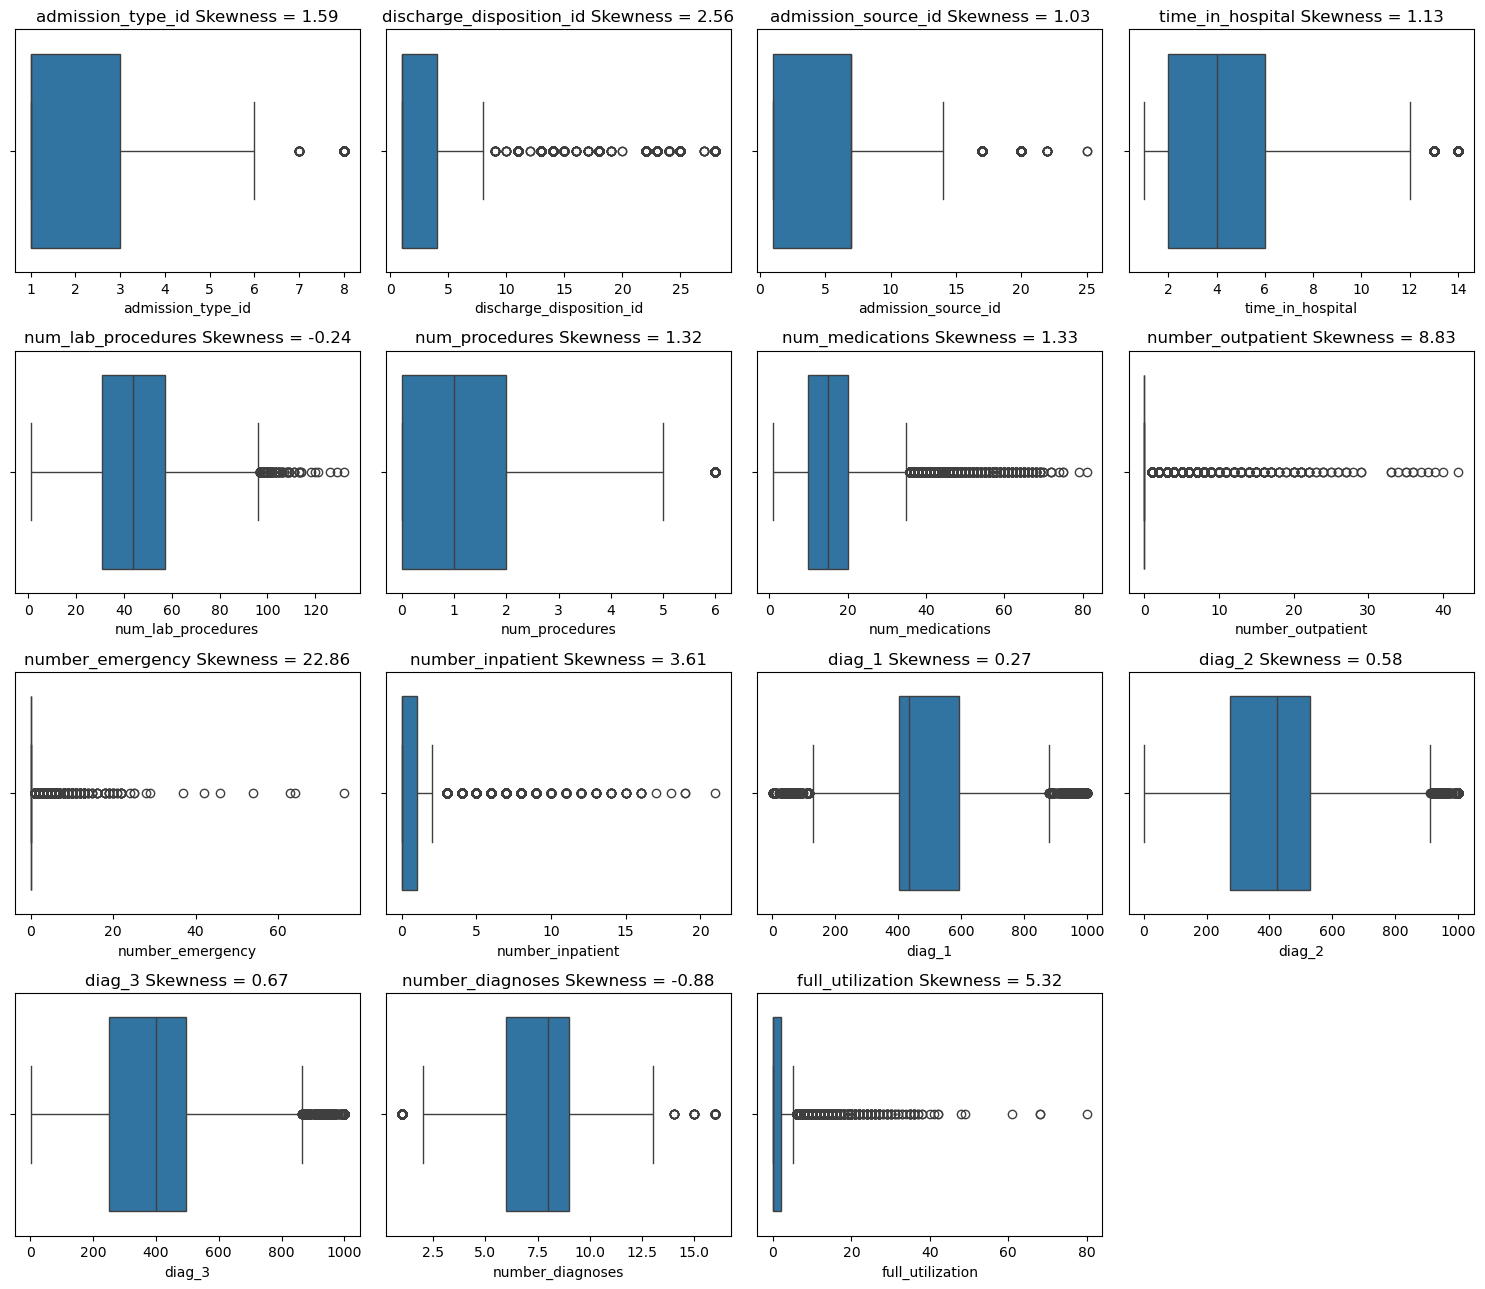

In [135]:
# check for outliers
t=1
plt.figure(figsize=(15,13))
for i in df_multi.select_dtypes(include=np.number).columns:
    plt.subplot(4,4,t)
    sns.boxplot(df_multi[i],orient='h')
    plt.title(f'{i} Skewness = {round(df_multi[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

THOUGH THERE ARE LOT OF OUTLIERS IN THE DATA:
1. ADMISSION SOURCE ID, DISCHARGE DISPOSITION ID, ADMISSION TYPE ID ,DIAG1,DIAG2,DIAG3 ARE CATEGORICAL IN NATURE. EACH COLUMN REPRESENT A UNIQUE OCCURANCES, WHICH ARE GENUINE OCCURANCE OF DATA( even columns like outpatient,inpatient,emergency and full utilization ):  Hence treating outliers for those column is not advisable, it may lead to overfitting during model building or loss in data


2. For columns number of diagnosis, time in hospital,number of lab procedures,number of procedures,medications, we can check and trerat outliers accordingly

In [113]:
# eg:
q1=num_multi.num_medications.quantile(0.25)
q3=num_multi.num_medications.quantile(0.75)

iqr=q3-q1
ul=q3+(1.5*iqr)

ll=q1-(1.5*iqr)

num_multi.num_medications[(num_multi.num_medications>ul) | (num_multi.num_medications<ll)].shape

(2557,)

In [114]:
# eg:
q1=df_multi.diag_1.quantile(0.75)
q2=df_multi.diag_1.quantile(0.25)

iqr=q1-q2
ul=q1+(1.5*iqr)
ll=q2-(1.5*iqr)
df_multi[(df_multi.diag_1<ll) | (df_multi.diag_1>ul)].shape

(8309, 47)

In [115]:
num_multi.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'full_utilization'],
      dtype='object')

In [116]:
df_multi.shape

(101766, 47)

In [133]:
df_out=df_multi.copy()       # copying to a different df to treat outliers
print(df_out.shape)

(101766, 47)


In [134]:
df_multi1=df_multi.copy()
df_multi1.shape

(101766, 47)

TREATING OUTLIERS FOR SELECTED COLUMNS: number of diagnosis, time in hospital,number of lab procedures,number of procedures,medications

In [135]:
outlier_col=df_multi[["num_medications","num_lab_procedures","time_in_hospital","number_diagnoses","num_procedures"]]

Q1=outlier_col.quantile(0.25) 
Q3=outlier_col.quantile(0.75) 
IQR = Q3 - Q1
lower = Q1-(1.5*IQR)
upper = Q3+(1.5*IQR)
df_out = df_out[~((outlier_col< (lower)) | (outlier_col> (upper))).any(axis=1)]

df_out.reset_index(drop=True,inplace=True)
print(df_out.shape)



(93078, 47)


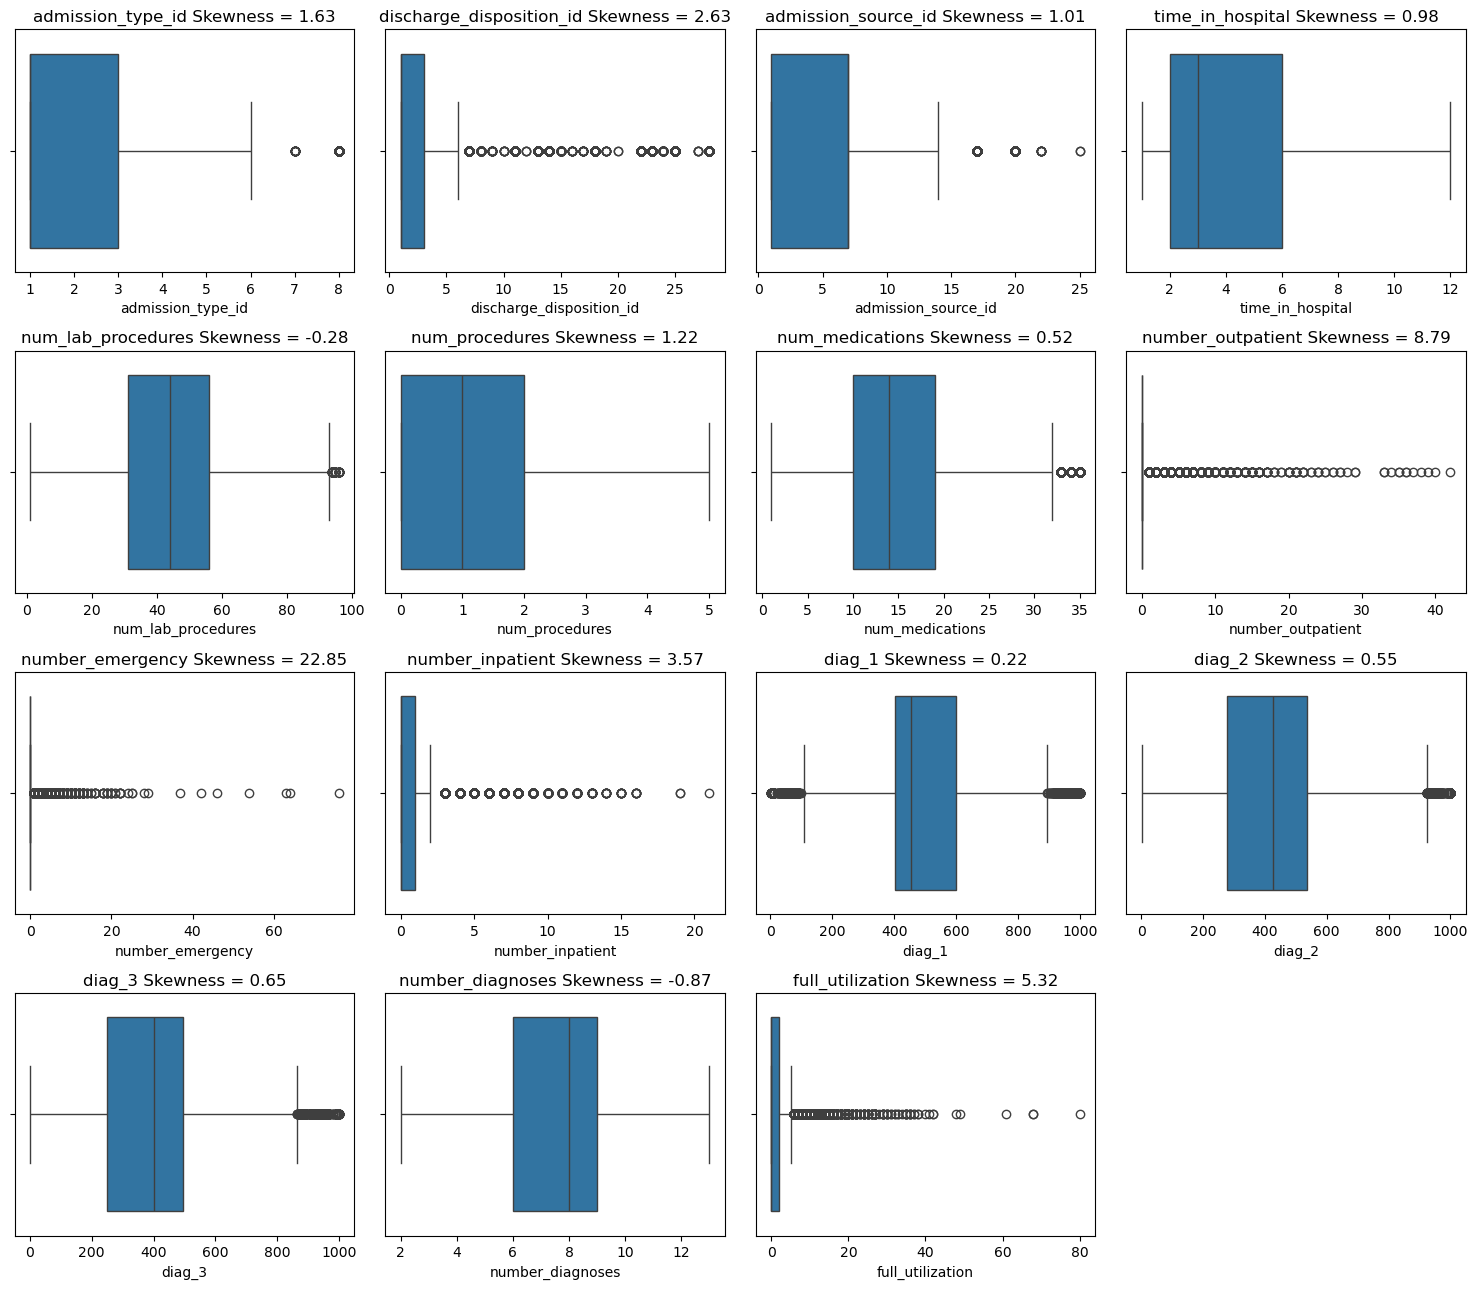

In [139]:
# check for outliers
t=1
plt.figure(figsize=(15,13))
for i in df_out.select_dtypes(include=np.number).columns:
    plt.subplot(4,4,t)
    sns.boxplot(df_out[i],orient='h')
    plt.title(f'{i} Skewness = {round(df_out[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [136]:
# FOR REDUCING THE SKEWNESS  , IF WE CAN DO TRANFORMATION TECHNIQUE FOR NUMERICAL COUMNS( yeo-johnson )
numerical_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                  'num_medications', 'number_outpatient', 'number_emergency', 
                  'number_inpatient', 'number_diagnoses', 'full_utilization']                          
df_out[numerical_cols] = df_out[numerical_cols].apply(lambda x: yeojohnson(x)[0])
print(df_out.shape)

(93078, 47)


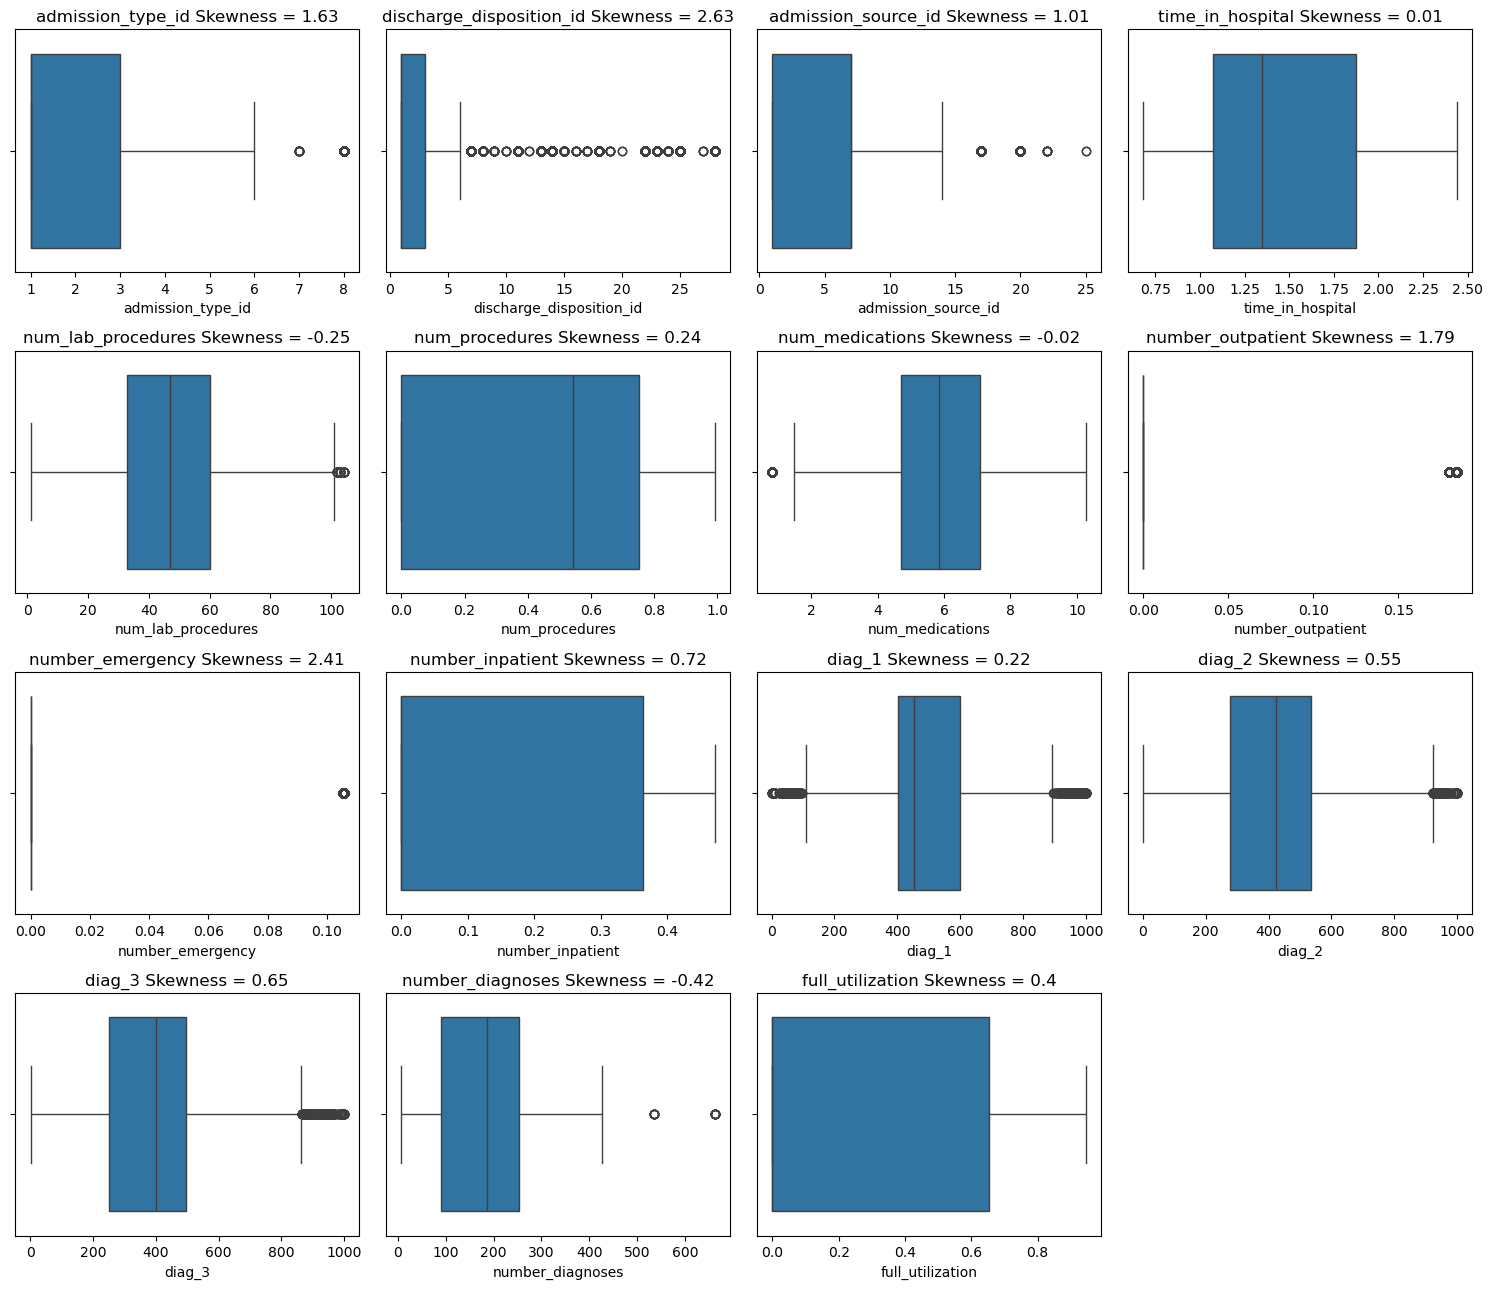

In [141]:
# check for outliers
# check for outliers
t=1
plt.figure(figsize=(15,13))
for i in df_out.select_dtypes(include=np.number).columns:
    plt.subplot(4,4,t)
    sns.boxplot(df_out[i],orient='h')
    plt.title(f'{i} Skewness = {round(df_out[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

FROM THE ABOVE PLOT THE SKEWNESS FOR RESPECTVE NUMERICAL COLUMNS HAS REDUCED

In [137]:
df_with_out=df_multi.copy()

In [138]:
df_with_out.shape

(101766, 47)

# STATISTICAL ANALYSIS

In [139]:
df_multi=df_out.copy()
df_multi.shape

(93078, 47)

In [124]:
from warnings import filterwarnings
filterwarnings('ignore')

# import 'stats' package from scipy library
from scipy import stats

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

In [125]:
# Drug metformin vs readmission

# H0: Drug and readmission are independent
# Ha: Drug and readmission are dependent
alpha=0.05
crosstab=pd.crosstab(df_multi["metformin"],df_multi.readmitted)
crosstab

stats.chi2_contingency(crosstab)
pvalue=2.4459172244508684e-20           # reject h0
print(pvalue<alpha)      # drug metformin and readmission are dependent

True


In [126]:
# gender vs readmitted

# H0: Gender and readmission are independent
# Ha: Gender and readmission are dependent
alpha=0.05
crosstab=pd.crosstab(df_multi["gender"],df_multi.readmitted)
crosstab

stats.chi2_contingency(crosstab)
pvalue=2.770917076035657e-08
print(pvalue<alpha)           # reject h0
# Gender and readmission are dependent


True


In [127]:
# race vs readmitted

# H0: Race and readmission are independent
# Ha: Race and readmission are dependent
alpha=0.05
crosstab=pd.crosstab(df_multi["race"],df_multi.readmitted)
crosstab

stats.chi2_contingency(crosstab)
pvalue=7.379468859169466e-55
print(pvalue<alpha)             # reject h0
# Race and readmission are dependent

True


In [128]:
# weight vs readmitted
# H0: weight and readmission are independent
# Ha: weight and readmission are dependent
alpha=0.05
crosstab=pd.crosstab(df_multi["weight"],df_multi.readmitted)
crosstab

stats.chi2_contingency(crosstab)
pvalue=2.87119227275831e-39
print(pvalue<alpha)             # reject h0
# Ha: weight and readmission are dependent
# but since more number of data is missing we will remove that column

True


In [129]:
# age vs readmitted
# H0: age and readmission are independent
# Ha: age and readmission are dependent
alpha=0.05
crosstab=pd.crosstab(df_multi["age"],df_multi.readmitted)
crosstab

stats.chi2_contingency(crosstab)
pvalue=2.87119227275831e-39
print(pvalue<alpha)             # reject h0
# Ha: weight and readmission are dependent
# but since more number of data is missing we will remove that column

True


In [130]:
# payercode vs readmitted
# H0: payer code and readmission are independent
# Ha: payer code and readmission are dependent
alpha=0.05
crosstab=pd.crosstab(df_multi["payer_code"],df_multi.readmitted)
crosstab

stats.chi2_contingency(crosstab)
pvalue=5.851119427933155e-84
print(pvalue<alpha)             # reject h0
# Ha: payer code and readmission are dependent

# but more number of data is missing we will remove that column

True


In [131]:
# medical speciality vs readmitted
# H0: medical speciality and readmission are independent
# Ha: medical speciality and readmission are dependent
alpha=0.05
crosstab=pd.crosstab(df_multi["medical_specialty"],df_multi.readmitted)
crosstab

stats.chi2_contingency(crosstab)
pvalue=3.147808486895829e-171
print(pvalue<alpha)             # reject h0
# Ha: medical speciality and readmission are dependent

# but more number of data is missing we will remove that column

True


In [132]:
# readmission vs number of procedures in hospital

# h0: All type of readmission require consist of average number of  procedure 
# ha: Atleast one type of readmission consists has different number of procedures





x1=df_multi[(df_multi.readmitted=="<30")]['num_procedures']
x2=df_multi[(df_multi.readmitted==">30")]['num_procedures']
x3=df_multi[(df_multi.readmitted=="NO")]['num_procedures']

alpha=0.05


# check for normality

normal1=stats.shapiro(x1)
normal2=stats.shapiro(x2)
normal3=stats.shapiro(x3)
normal4=stats.shapiro(df_multi['num_procedures'])

print(normal1, normal2, normal3,normal4)

# data is not normal 

# test of variance

levene=stats.levene(x1,x2,x3,df_multi['num_procedures'])
print(levene)       # all variance are unequal



f_stat,pval=stats.f_oneway(x1,x2,x3)        

print(f_stat, pval)
print(pval<alpha)            # reject h0


# ha: Atleast one type of readmission consists has different number of procedures


ShapiroResult(statistic=0.779954731464386, pvalue=0.0) ShapiroResult(statistic=0.7643218040466309, pvalue=0.0) ShapiroResult(statistic=0.7837174534797668, pvalue=0.0) ShapiroResult(statistic=0.777011513710022, pvalue=0.0)
LeveneResult(statistic=22.91436829176316, pvalue=7.980707004510434e-15)
95.09078191857205 5.5556202414044106e-42
True


In [133]:
comp=mc.MultiComparison                      # to find which category has different rate

comp=mc.MultiComparison(data=df_multi["num_procedures"],groups=df_multi.readmitted)
post_hoc=comp.tukeyhsd()
post_hoc.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

<Axes: xlabel='num_procedures', ylabel='Density'>

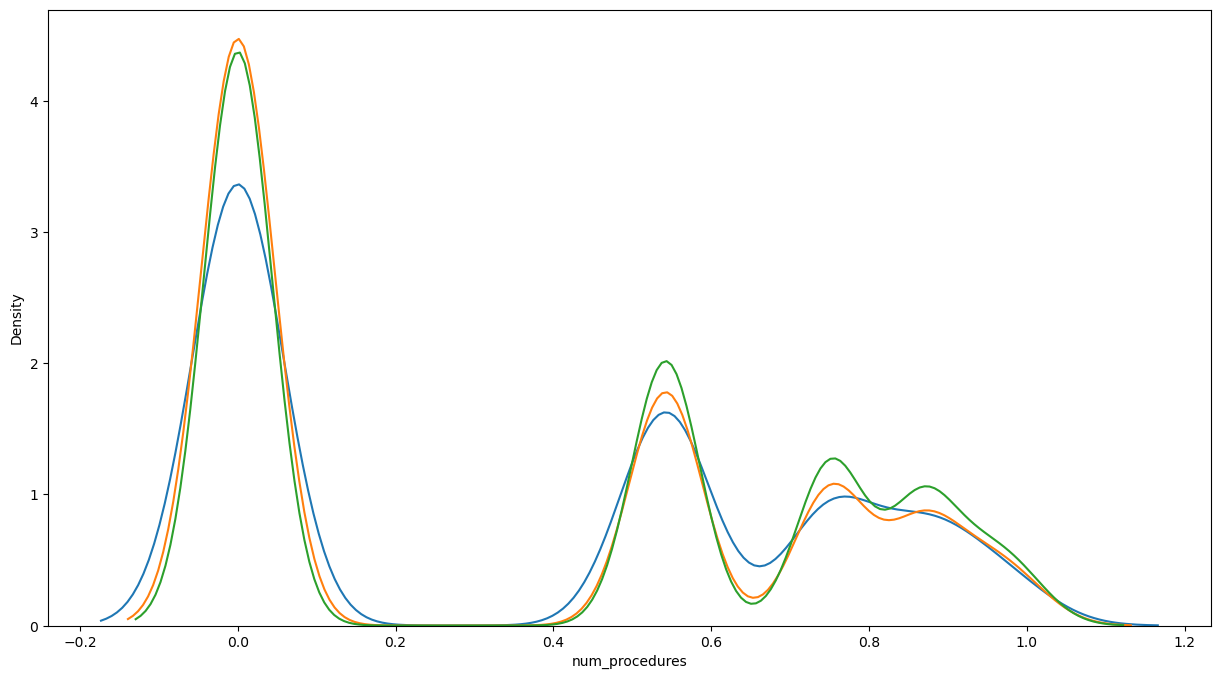

In [134]:
sns.distplot(x1,hist=False,label="x1")
sns.distplot(x2,hist=False,label="x2")
sns.distplot(x3,hist=False,label="x3")

In [135]:
# readmission vs number of medications in hospital


# h0: All type of readmission require equal medications
# ha: Atleast one type of readmission require differnet number of medications


x1=df_multi[(df_multi.readmitted=="<30")]['num_medications']
x2=df_multi[(df_multi.readmitted==">30")]['num_medications']
x3=df_multi[(df_multi.readmitted=="NO")]['num_medications']

alpha=0.05


# check for normality

normal1=stats.shapiro(x1)
normal2=stats.shapiro(x2)
normal3=stats.shapiro(x3)
normal4=stats.shapiro(df_multi['num_medications'])

print(normal1, normal2, normal3,normal4)

# data is not normal 

# test of variance

levene=stats.levene(x1,x2,x3,df_multi['num_medications'])
print(levene)       # all variance are unequal



f_stat,pval=stats.f_oneway(x1,x2,x3)        

print(f_stat, pval)
print(pval<alpha)            # reject h0


# ha: Atleast one type of readmission require differnet number of medications


ShapiroResult(statistic=0.9958657622337341, pvalue=1.1719052873331948e-16) ShapiroResult(statistic=0.995909571647644, pvalue=1.8156084642009816e-28) ShapiroResult(statistic=0.9954779148101807, pvalue=6.692748832888067e-35) ShapiroResult(statistic=0.9955483675003052, pvalue=1.638117904795711e-42)
LeveneResult(statistic=50.298123491180945, pvalue=1.7415227589440587e-32)
345.21335419313715 4.256734994236428e-150
True


In [136]:
comp=mc.MultiComparison                      # to find which category has different rate

comp=mc.MultiComparison(data=df_multi["num_medications"],groups=df_multi.readmitted)
post_hoc=comp.tukeyhsd()
post_hoc.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

<Axes: xlabel='num_medications', ylabel='Density'>

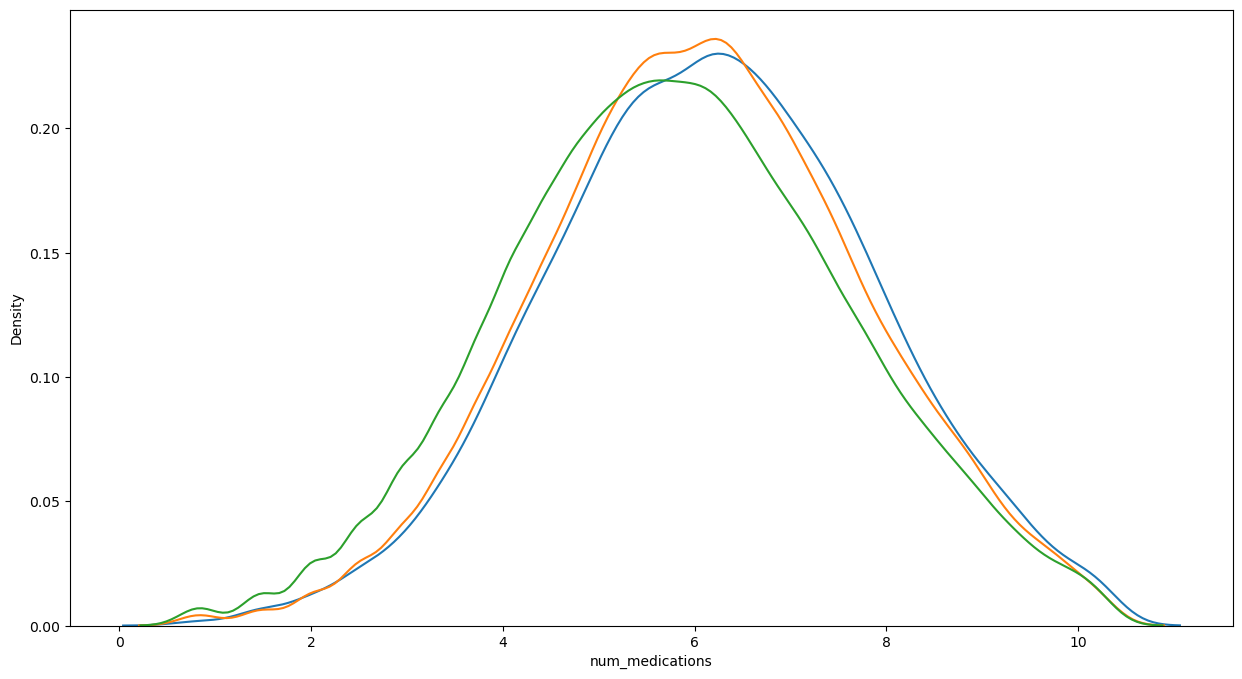

In [137]:
sns.distplot(x1,hist=False,label="x1")
sns.distplot(x2,hist=False,label="x2")
sns.distplot(x3,hist=False,label="x3")

In [138]:
# readmission vs time spent in hospital


# h0: All type of readmission require have average time rate in hospital
# ha: Atleast one type of readmission have average time rate in hospital


x1=df_multi[(df_multi.readmitted=="<30")]['time_in_hospital']
x2=df_multi[(df_multi.readmitted==">30")]['time_in_hospital']
x3=df_multi[(df_multi.readmitted=="NO")]['time_in_hospital']

alpha=0.05


# check for normality

normal1=stats.shapiro(x1)
normal2=stats.shapiro(x2)
normal3=stats.shapiro(x3)
normal4=stats.shapiro(df_multi.full_utilization)

print(normal1, normal2, normal3,normal4)

# data is not normal 

# test of variance

levene=stats.levene(x1,x2,x3,df_multi.time_in_hospital)
print(levene)       # all variance are unequal



f_stat,pval=stats.f_oneway(x1,x2,x3)        

print(f_stat, pval)
print(pval<alpha)            # reject h0


## ha: Atleast one type of readmission have average time rate


ShapiroResult(statistic=0.9592896103858948, pvalue=0.0) ShapiroResult(statistic=0.9563329815864563, pvalue=0.0) ShapiroResult(statistic=0.9496693015098572, pvalue=0.0) ShapiroResult(statistic=0.7535819411277771, pvalue=0.0)
LeveneResult(statistic=12.27194078656121, pvalue=5.041986748615989e-08)
245.7246155408201 3.6635963440257986e-107
True


In [139]:
# readmission vs number of lab procedure in hospital


# h0: All type of readmission require consist of equal number of lab procedure hospital
# ha: Atleast one type of readmission consists different number of lab procedures


x1=df_multi[(df_multi.readmitted=="<30")]['num_lab_procedures']
x2=df_multi[(df_multi.readmitted==">30")]['num_lab_procedures']
x3=df_multi[(df_multi.readmitted=="NO")]['num_lab_procedures']

alpha=0.05


# check for normality

normal1=stats.shapiro(x1)
normal2=stats.shapiro(x2)
normal3=stats.shapiro(x3)
normal4=stats.shapiro(df_multi.num_lab_procedures)

print(normal1, normal2, normal3,normal4)

# data is not normal 

# test of variance

levene=stats.levene(x1,x2,x3,df_multi.num_lab_procedures)
print(levene)       # all variance are unequal



f_stat,pval=stats.f_oneway(x1,x2,x3)        

print(f_stat, pval)
print(pval<alpha)            # reject h0


# ha: Atleast one type of readmission consists different number of lab procedures


ShapiroResult(statistic=0.9833779335021973, pvalue=4.021928942083502e-33) ShapiroResult(statistic=0.9820888042449951, pvalue=0.0) ShapiroResult(statistic=0.9836175441741943, pvalue=0.0) ShapiroResult(statistic=0.983173668384552, pvalue=0.0)
LeveneResult(statistic=4.104530702946235, pvalue=0.006383720914783524)
92.10288886880635 1.0958559067804295e-40
True


In [140]:
comp=mc.MultiComparison                      # to find which category has different rate

comp=mc.MultiComparison(data=df_multi["num_lab_procedures"],groups=df_multi.readmitted)
post_hoc=comp.tukeyhsd()
post_hoc.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

<Axes: xlabel='num_lab_procedures', ylabel='Density'>

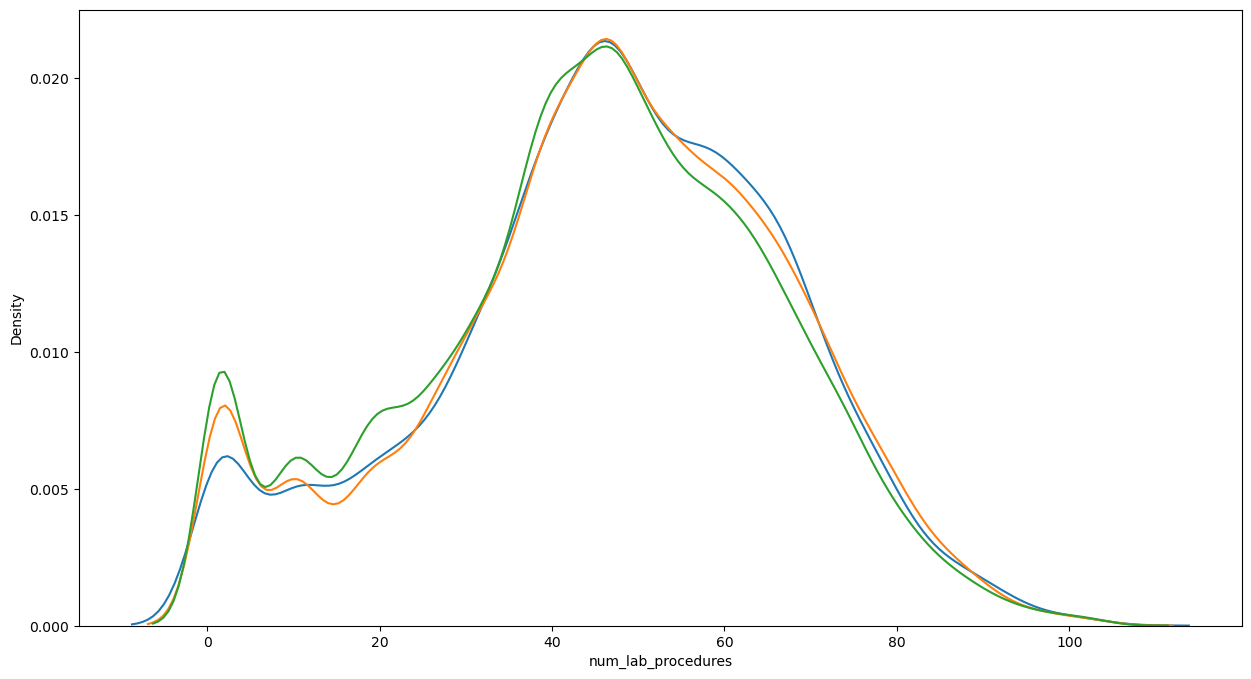

In [141]:
sns.distplot(x1,hist=False,label="x1")
sns.distplot(x2,hist=False,label="x2")
sns.distplot(x3,hist=False,label="x3")

In [142]:
comp=mc.MultiComparison                      # to find which category has different utilization rate

comp=mc.MultiComparison(data=df_multi["time_in_hospital"],groups=df_multi.readmitted)
post_hoc=comp.tukeyhsd()
post_hoc.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

<Axes: xlabel='num_lab_procedures', ylabel='Density'>

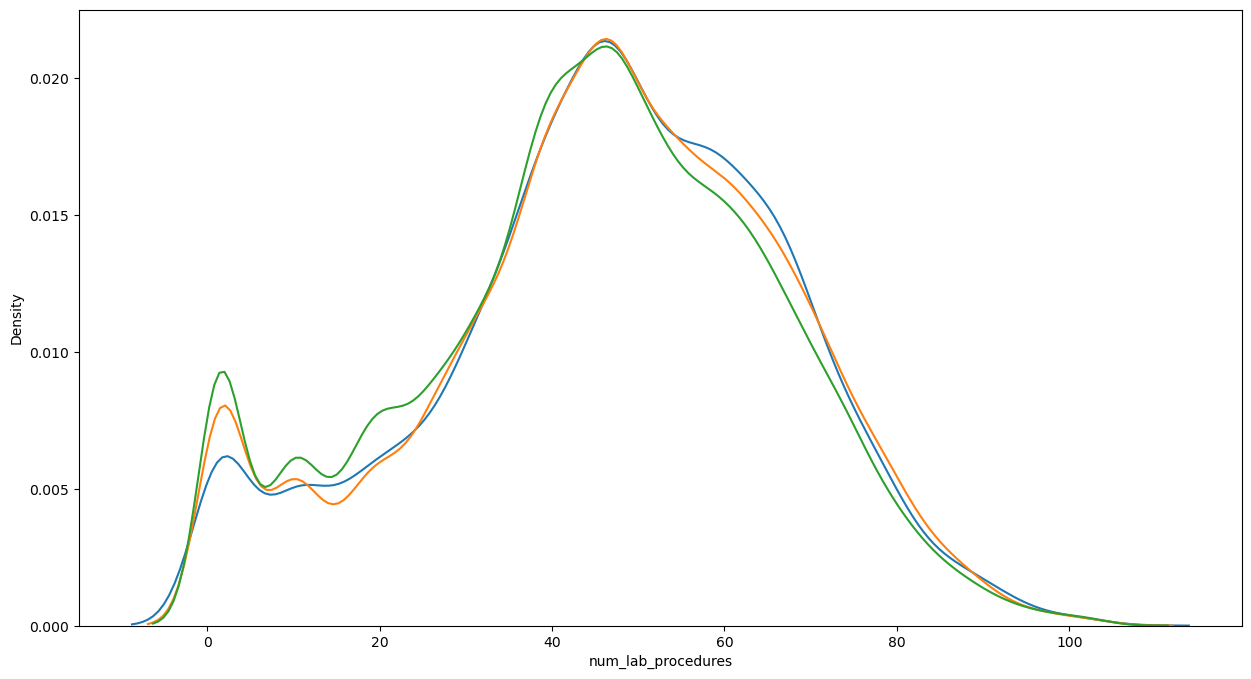

In [143]:
sns.distplot(x1,hist=False,label="x1")
sns.distplot(x2,hist=False,label="x2")
sns.distplot(x3,hist=False,label="x3")

In [144]:
# readmission vs number of diagnosis procedure in hospital


# h0: All type of readmission require consist of equal number of diagnosis 
# ha: Atleast one type of readmission consists different number of  diagnosis


x1=df_multi[(df_multi.readmitted=="<30")]['number_diagnoses']
x2=df_multi[(df_multi.readmitted==">30")]['number_diagnoses']
x3=df_multi[(df_multi.readmitted=="NO")]['number_diagnoses']

alpha=0.05


# check for normality

normal1=stats.shapiro(x1)
normal2=stats.shapiro(x2)
normal3=stats.shapiro(x3)
normal4=stats.shapiro(df_multi['number_diagnoses'])

print(normal1, normal2, normal3,normal4)

# data is not normal 

# test of variance

levene=stats.levene(x1,x2,x3,df_multi['number_diagnoses'])
print(levene)       # all variance are unequal



f_stat,pval=stats.f_oneway(x1,x2,x3)        

print(f_stat, pval)
print(pval<alpha)            # reject h0


# ha: Atleast one type of readmission consists different number of  diagnosis


ShapiroResult(statistic=0.7730835676193237, pvalue=0.0) ShapiroResult(statistic=0.781649112701416, pvalue=0.0) ShapiroResult(statistic=0.8171116709709167, pvalue=0.0) ShapiroResult(statistic=0.8029407262802124, pvalue=0.0)
LeveneResult(statistic=327.46022405994705, pvalue=4.335464848340964e-212)
589.795193186274 2.9157404905472424e-255
True


In [145]:
comp=mc.MultiComparison                      # to find which category has different rate

comp=mc.MultiComparison(data=df_multi["number_diagnoses"],groups=df_multi.readmitted)
post_hoc=comp.tukeyhsd()
post_hoc.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

<Axes: xlabel='number_diagnoses', ylabel='Density'>

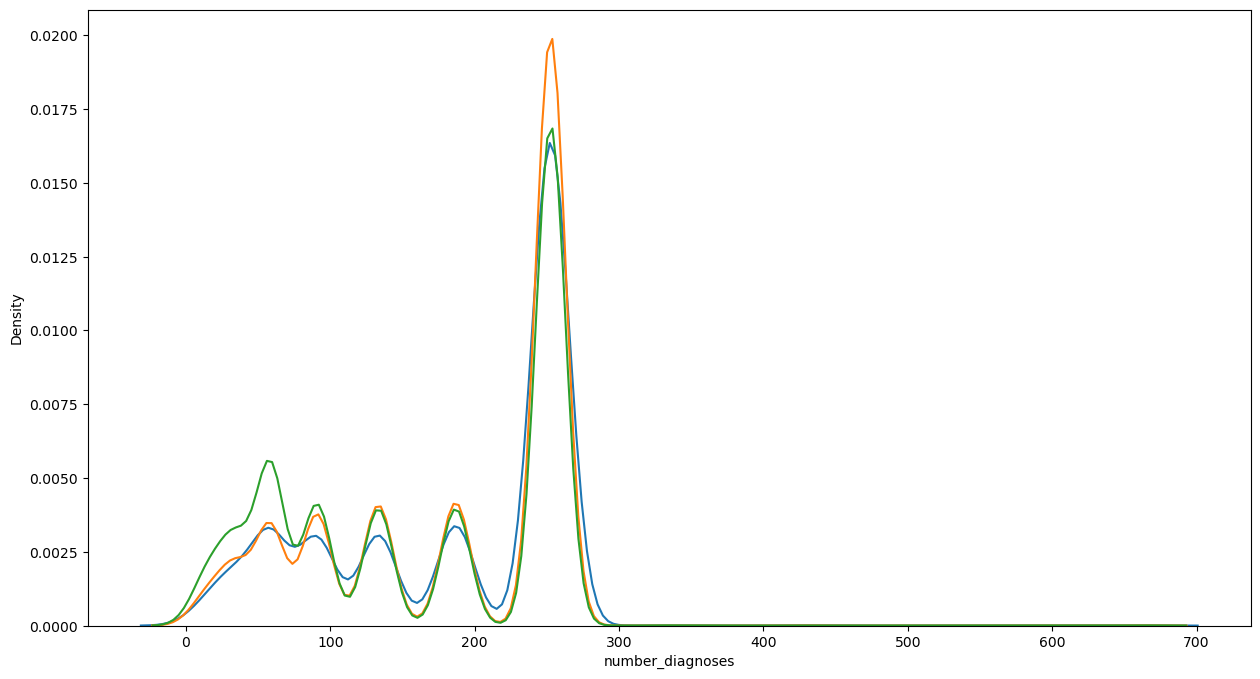

In [146]:
sns.distplot(x1,hist=False,label="x1")
sns.distplot(x2,hist=False,label="x2")
sns.distplot(x3,hist=False,label="x3")

In [147]:
# change in dosage vs readmission

# H0: change in dosage and readmission are independent
# Ha: change in dosage and readmission are dependent
alpha=0.05
crosstab=pd.crosstab(df_multi["change"],df_multi.readmitted)
crosstab

stats.chi2_contingency(crosstab)
pvalue=1.3620608235566452e-47
print(pvalue<alpha)                      # reject h0

#  change in dosage and readmission are dependent


True


In [148]:
# diabetes medication vs readmission 

# H0: prescribed medication for diabetes and readmission are independent
# Ha: prescribed medication for diabetes and readmission are dependent

alpha=0.05
crosstab=pd.crosstab(df_multi["diabetesMed"],df_multi.readmitted)
crosstab

stats.chi2_contingency(crosstab)
pvalue=1.175514151065395e-84
print(pvalue<alpha)                         # reject h0
# prescribed medication for diabetes and readmission are dependent

True


In [149]:
# full utilization vs readmitted

# h0: All type of readmission require have average full utilization rate
# ha: Atleast one type of readmission have different full utilization rate


x1=df_multi[(df_multi.readmitted=="<30")]["full_utilization"]
x2=df_multi[(df_multi.readmitted==">30")]["full_utilization"]
x3=df_multi[(df_multi.readmitted=="NO")]["full_utilization"]

alpha=0.05


# check for normality

normal1=stats.shapiro(x1)
normal2=stats.shapiro(x2)
normal3=stats.shapiro(x3)
normal4=stats.shapiro(df_multi.full_utilization)

print(normal1, normal2, normal3,normal4)

# data is not normal 

# test of variance

levene=stats.levene(x1,x2,x3,df_multi.full_utilization)
print(levene)       # all variance are unequal



f_stat,pval=stats.f_oneway(x1,x2,x3)        

print(f_stat, pval)
print(pval<alpha)            # reject h0

# Atleast one type of readmission have different full utilization rate

ShapiroResult(statistic=0.8062039613723755, pvalue=0.0) ShapiroResult(statistic=0.7964770793914795, pvalue=0.0) ShapiroResult(statistic=0.6874092817306519, pvalue=0.0) ShapiroResult(statistic=0.7535819411277771, pvalue=0.0)
LeveneResult(statistic=835.0845576352284, pvalue=0.0)
2905.318624422705 0.0
True


In [150]:
comp=mc.MultiComparison                      # to find which category has different utilization rate

comp=mc.MultiComparison(data=df_multi["full_utilization"],groups=df_multi.readmitted)
post_hoc=comp.tukeyhsd()
post_hoc.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

<Axes: xlabel='full_utilization', ylabel='Density'>

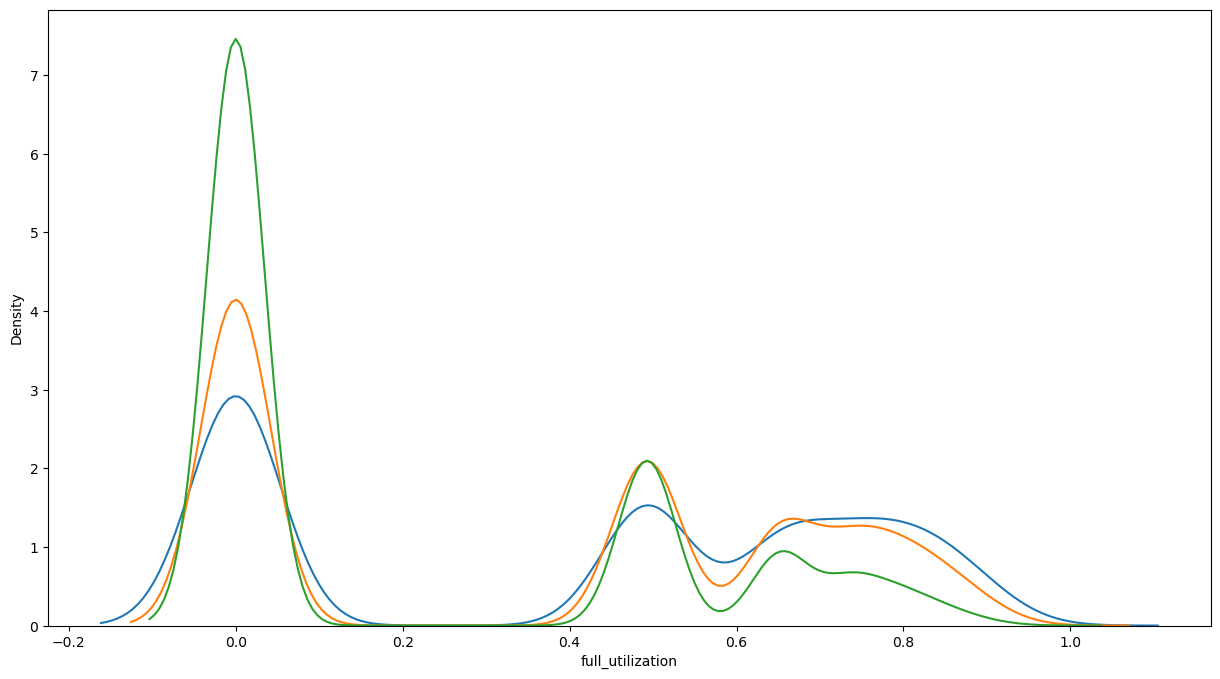

In [151]:
sns.distplot(x1,hist=False,label="x1")
sns.distplot(x2,hist=False,label="x2")
sns.distplot(x3,hist=False,label="x3")

The above plot shows the distribution of different type of readmission at different full utilization rate.
From this plot we can infer that full utilization affect readmission at various intervals.

It is not a default fact that people who have not made any visits doent require any readmission
or people who have made more visits require readmission.

### REDUNDANT COLUMNS:
    
FROM THE EXPLORATORY ANALYSIS WE SEE THAT FEATURES [AGE,WEIGHT,PAYER_CODE,MEDICAL_SPECIALITY] CONTAINS SIGNIFICANT UNKNOWN VALUES, WHICH DOESNT HELP IN MODEL BUILDING AND OTHER ANALYSIS
HENCE WE DROP THOSE COLUMNS WILL HELP IN FURTHER ANALYSIS

In [140]:
df_multi.drop(["age","weight","payer_code","medical_specialty"],axis=1,inplace=True)
df_with_out.drop(["age","weight","payer_code","medical_specialty"],axis=1,inplace=True)


In [141]:
print("TOTAL NUMBER OF COLUMNS BEFORE DROPPING ALL UNNECESSSARY COLUMNS :",df_multi.shape[1])


TOTAL NUMBER OF COLUMNS BEFORE DROPPING ALL UNNECESSSARY COLUMNS : 43


In [626]:
df_with_out.shape

(101766, 43)

In [143]:
df_multi.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'full_utilization'],
      dtype='object')

In [142]:
cat_multi=df_multi.select_dtypes("object")
cat_without=df_with_out.select_dtypes("object")
for i in cat_multi.columns:
    print("\n")
    print("No of unique records are :","column",i, df_multi[i].nunique())
    print("\n")



No of unique records are : column race 6




No of unique records are : column gender 2




No of unique records are : column metformin 4




No of unique records are : column repaglinide 4




No of unique records are : column nateglinide 4




No of unique records are : column chlorpropamide 4




No of unique records are : column glimepiride 4




No of unique records are : column acetohexamide 1




No of unique records are : column glipizide 4




No of unique records are : column glyburide 4




No of unique records are : column tolbutamide 2




No of unique records are : column pioglitazone 4




No of unique records are : column rosiglitazone 4




No of unique records are : column acarbose 4




No of unique records are : column miglitol 4




No of unique records are : column troglitazone 2




No of unique records are : column tolazamide 3




No of unique records are : column examide 1




No of unique records are : column citoglipton 1




No of unique records are : col

# ENCODING THE CATEGORICAL COLUMNS

WE ARE USING FREQUENCY ENCODING FOR ALL THE CATEGORICAL COLUMNS,AND TREAT THE FEATURES WITH ITS DISTRIBUTION,IN ORDER TO AVOID ANY ORDINALITY IN DATA, WHICH MAY AFFECT MODEL

 ADMISSION SOURCE ID, ADMISSION TYPE ID DISCHARGE DISPOSITION ID, DIAG1,DIAG2,DIAG3 ,ALL ARE CATEGORICAL ACCORDING TO ORIGINAL DATA, HENCE WE ARE NOT PERFORMING ENCODING FOR THESE FEATURES

In [157]:
cat_multi.columns

Index(['race', 'gender', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [158]:
num_multi.columns


Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'full_utilization'],
      dtype='object')

In [143]:
num_without=df_with_out.select_dtypes(np.number)
num_without.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'full_utilization'],
      dtype='object')

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'full_utilization'],
      dtype='object')

In [160]:
df.race.mode()[0]

'Caucasian'

In [144]:
df_multi["race"]=df_multi.race.replace("Unknown",df_multi.race.mode()[0])
print(df_multi.race.value_counts(),"\n\n")

df_multi["race"]=df_multi.race.map(df_multi.race.value_counts(normalize=True))

print(df_multi.race.value_counts())

race
Caucasian          71293
AfricanAmerican    17913
Hispanic            1922
Other               1357
Asian                593
Name: count, dtype: int64 


race
0.765949    71293
0.192451    17913
0.020649     1922
0.014579     1357
0.006371      593
Name: count, dtype: int64


In [145]:
mapping={"NO":0,">30":1,"<30":2}
df_multi["readmitted"]=df_multi.readmitted.replace(mapping)
df_multi.readmitted.value_counts()

readmitted
0    49868
1    32781
2    10429
Name: count, dtype: int64

In [146]:
df_multi["metformin"]=df_multi.metformin.map(df_multi.metformin.value_counts(normalize=True))
df_multi.metformin.value_counts()

metformin
0.802735    74717
0.181600    16903
0.010196      949
0.005469      509
Name: count, dtype: int64

In [147]:
df_multi["repaglinide"]=df_multi.repaglinide.map(df_multi.repaglinide.value_counts(normalize=True))
df_multi.repaglinide.value_counts()

repaglinide
0.984927    91675
0.013623     1268
0.001053       98
0.000398       37
Name: count, dtype: int64

In [148]:

drug_list=['nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

for d in drug_list:
    df_multi[d]=df_multi[d].map(df_multi[d].value_counts(normalize=True))

In [149]:
for d in drug_list:
    print(f' For features {d},{df_multi[d].value_counts}')

 For features nateglinide,<bound method IndexOpsMixin.value_counts of 0       0.993135
1       0.993135
2       0.993135
3       0.993135
4       0.993135
          ...   
93073   0.993135
93074   0.993135
93075   0.993135
93076   0.993135
93077   0.993135
Name: nateglinide, Length: 93078, dtype: float64>
 For features chlorpropamide,<bound method IndexOpsMixin.value_counts of 0       0.999183
1       0.999183
2       0.999183
3       0.999183
4       0.999183
          ...   
93073   0.999183
93074   0.999183
93075   0.999183
93076   0.999183
93077   0.999183
Name: chlorpropamide, Length: 93078, dtype: float64>
 For features glimepiride,<bound method IndexOpsMixin.value_counts of 0       0.949709
1       0.949709
2       0.949709
3       0.949709
4       0.045478
          ...   
93073   0.949709
93074   0.949709
93075   0.949709
93076   0.949709
93077   0.949709
Name: glimepiride, Length: 93078, dtype: float64>
 For features acetohexamide,<bound method IndexOpsMixin.value_counts of 0

In [150]:
for i in drug_list:
   print(df_multi[i].value_counts())

nateglinide
0.993135    92439
0.006521      607
0.000247       23
0.000097        9
Name: count, dtype: int64
chlorpropamide
0.999183    93002
0.000752       70
0.000054        5
0.000011        1
Name: count, dtype: int64
glimepiride
0.949709    88397
0.045478     4233
0.003019      281
0.001794      167
Name: count, dtype: int64
acetohexamide
1.000000    93078
Name: count, dtype: int64
glipizide
0.876426    81576
0.111347    10364
0.007080      659
0.005146      479
Name: count, dtype: int64
glyburide
0.896538    83448
0.090408     8415
0.007768      723
0.005286      492
Name: count, dtype: int64
tolbutamide
0.999785    93058
0.000215       20
Name: count, dtype: int64
pioglitazone
0.929027    86472
0.067642     6296
0.002245      209
0.001085      101
Name: count, dtype: int64
rosiglitazone
0.938116    87318
0.059509     5539
0.001612      150
0.000763       71
Name: count, dtype: int64
acarbose
0.997078    92806
0.002793      260
0.000097        9
0.000032        3
Name: count, dt

##### Drugs description

1.metformin: This column likely represents whether a patient was prescribed metformin, which is a common medication used to treat type 2 diabetes. It's an oral medication that helps control blood sugar levels.

2.repaglinide: This column likely represents whether a patient was prescribed repaglinide, which is another medication used to treat type 2 diabetes. It belongs to the class of drugs called meglitinides and helps stimulate insulin production in the pancreas.

3.nateglinide: Similar to repaglinide, nateglinide is another medication used to treat type 2 diabetes. It also belongs to the meglitinide class and helps stimulate insulin secretion.

4.chlorpropamide: Chlorpropamide is an oral medication that belongs to the sulfonylurea class and is used to treat type 2 diabetes by helping the pancreas produce more insulin.

5.glimepiride: Glimepiride is another sulfonylurea medication used to treat type 2 diabetes. It helps lower blood sugar levels by stimulating the release of insulin from the pancreas.

6.acetohexamide: Acetohexamide is a sulfonylurea medication that, like glimepiride and chlorpropamide, helps stimulate insulin production to lower blood sugar levels.

7.glipizide: Glipizide is yet another sulfonylurea medication used to treat type 2 diabetes. It works similarly to other sulfonylureas by increasing insulin release from the pancreas.

8.glyburide: Glyburide, also known as glibenclamide, is a sulfonylurea medication used to lower blood sugar levels in type 2 diabetes patients by stimulating insulin secretion.

9.tolbutamide: Tolbutamide is an older sulfonylurea medication that works by increasing insulin production in the pancreas to help control blood sugar levels.

10.pioglitazone: Pioglitazone is a medication that belongs to the thiazolidinedione class and is used to treat type 2 diabetes by improving insulin sensitivity in the body.

11.rosiglitazone: Rosiglitazone is another thiazolidinedione medication used to treat type 2 diabetes by improving insulin sensitivity and lowering blood sugar levels.

12.acarbose: Acarbose is an alpha-glucosidase inhibitor medication used to treat type 2 diabetes by slowing down the digestion of carbohydrates, which helps prevent spikes in blood sugar levels.

13.miglitol: Miglitol is another alpha-glucosidase inhibitor medication that works similarly to acarbose by slowing down carbohydrate digestion and reducing blood sugar spikes.

14.troglitazone: Troglitazone was a thiazolidinedione medication used to treat type 2 diabetes, but it was withdrawn from the market due to severe liver toxicity.

15.tolazamide: Tolazamide is another sulfonylurea medication used to treat type 2 diabetes by stimulating insulin release from the pancreas.

16.examide: This column might represent a medication or treatment named "examide," but without further context, it's difficult to provide specific information.

17.citoglipton: Similarly, this column might represent a medication or treatment named "citoglipton," but without further context, it's difficult to provide specific information.

18.insulin: This column likely represents whether a patient was prescribed insulin, which is a hormone used to treat diabetes by regulating blood sugar levels.

19.glyburide-metformin: This column might represent a combination medication containing both glyburide and metformin, two medications used to treat type 2 diabetes.

20.glipizide-metformin: Similarly, this column might represent a combination medication containing both glipizide and metformin.

21.glimepiride-pioglitazone: This column might represent a combination medication containing both glimepiride and pioglitazone.

22.metformin-rosiglitazone: This column might represent a combination medication containing both metformin and rosiglitazone.

23.metformin-pioglitazone: This column might represent a combination medication containing both metformin and pioglitazone.

In [151]:
df_multi["diabetesMed"]=df_multi.diabetesMed.map(df_multi.diabetesMed.value_counts(normalize=True))
print(df_multi.diabetesMed.value_counts(),"\n")

df_multi["change"]=df_multi.change.map(df_multi.change.value_counts(normalize=True))
print(df_multi.change.value_counts())




diabetesMed
0.765637    71264
0.234363    21814
Name: count, dtype: int64 

change
0.546499    50867
0.453501    42211
Name: count, dtype: int64


    diabetesMed: This column likely represents whether the patient was prescribed any diabetes medication or treatment.

    change: This column likely represents whether there was a change in the patient's medication or treatment.

In [152]:
df_multi["gender"]=df_multi.gender.replace({"Male":1,"Female":0})
df_multi.gender.value_counts()

gender
0    50596
1    42482
Name: count, dtype: int64

In [153]:
df_with_out.head()

race  gender  admission_type_id  discharge_disposition_id  \
0        Caucasian  Female                  6                        25   
1        Caucasian  Female                  1                         1   
2  AfricanAmerican  Female                  1                         1   
3        Caucasian    Male                  1                         1   
4        Caucasian    Male                  1                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    1                 1                  41               0   
1                    7                 3                  59               0   
2                    7                 2                  11               5   
3                    7                 2                  44               1   
4                    7                 1                  51               0   

   num_medications  number_outpatient  ...  insulin  glyburide-metformin  \
0                1                  0  ...       No                   No   
1               18                  0  ...       Up                   No   
2               13                  2  ...       No                   No   
3               16                  0  ...       Up                   No   
4                8                  0  ...   Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone change diabetesMed readmitted full_utilization  
0                      No     No          No         NO                0  
1                      No     Ch         Yes        >30                0  
2                      No     No         Yes         NO                3  
3                      No     Ch         Yes         NO                0  
4                      No     Ch         Yes         NO                0  

[5 rows x 43 columns]

In [154]:
# encoding for df_without columns

df_with_out["race"]=df_with_out.race.replace("Unknown",df_with_out.race.mode()[0])
print(df_with_out.race.value_counts(),"\n\n")

df_with_out["race"]=df_with_out.race.map(df_with_out.race.value_counts(normalize=True))

print(df_with_out.race.value_counts())



mapping={"NO":0,">30":1,"<30":2}
df_with_out["readmitted"]=df_with_out.readmitted.replace(mapping)
df_with_out.readmitted.value_counts()


df_with_out["metformin"]=df_with_out.metformin.map(df_with_out.metformin.value_counts(normalize=True))
df_with_out.metformin.value_counts()



df_with_out["repaglinide"]=df_with_out.repaglinide.map(df_with_out.repaglinide.value_counts(normalize=True))
df_with_out.repaglinide.value_counts()


for d in drug_list:
    df_with_out[d]=df_with_out[d].map(df_with_out[d].value_counts(normalize=True))


df_with_out["diabetesMed"]=df_with_out.diabetesMed.map(df_with_out.diabetesMed.value_counts(normalize=True))
print(df_with_out.diabetesMed.value_counts(),"\n")

df_with_out["change"]=df_with_out.change.map(df_with_out.change.value_counts(normalize=True))
print(df_with_out.change.value_counts())


df_with_out["gender"]=df_with_out.gender.replace({"Male":1,"Female":0})
print(df_with_out.gender.value_counts())



race
Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64 


race
0.770120    78372
0.188766    19210
0.020017     2037
0.014799     1506
0.006299      641
Name: count, dtype: int64
diabetesMed
0.770031    78363
0.229969    23403
Name: count, dtype: int64 

change
0.538048    54755
0.461952    47011
Name: count, dtype: int64
gender
0    54711
1    47055
Name: count, dtype: int64


In [155]:
df_with_out.head()

race  gender  admission_type_id  discharge_disposition_id  \
0 0.770120       0                  6                        25   
1 0.770120       0                  1                         1   
2 0.188766       0                  1                         1   
3 0.770120       1                  1                         1   
4 0.770120       1                  1                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    1                 1                  41               0   
1                    7                 3                  59               0   
2                    7                 2                  11               5   
3                    7                 2                  44               1   
4                    7                 1                  51               0   

   num_medications  number_outpatient  ...  insulin  glyburide-metformin  \
0                1                  0  ... 0.465607             0.993063   
1               18                  0  ... 0.111196             0.993063   
2               13                  2  ... 0.465607             0.993063   
3               16                  0  ... 0.111196             0.993063   
4                8                  0  ... 0.303137             0.993063   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0             0.999872                  0.999990                 0.999980   
1             0.999872                  0.999990                 0.999980   
2             0.999872                  0.999990                 0.999980   
3             0.999872                  0.999990                 0.999980   
4             0.999872                  0.999990                 0.999980   

   metformin-pioglitazone   change  diabetesMed  readmitted  full_utilization  
0                0.999990 0.538048     0.229969           0                 0  
1                0.999990 0.461952     0.770031           1                 0  
2                0.999990 0.538048     0.770031           0                 3  
3                0.999990 0.461952     0.770031           0                 0  
4                0.999990 0.461952     0.770031           0                 0  

[5 rows x 43 columns]

In [173]:
df_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93078 entries, 0 to 93077
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      93078 non-null  float64
 1   gender                    93078 non-null  int64  
 2   admission_type_id         93078 non-null  int64  
 3   discharge_disposition_id  93078 non-null  int64  
 4   admission_source_id       93078 non-null  int64  
 5   time_in_hospital          93078 non-null  float64
 6   num_lab_procedures        93078 non-null  float64
 7   num_procedures            93078 non-null  float64
 8   num_medications           93078 non-null  float64
 9   number_outpatient         93078 non-null  float64
 10  number_emergency          93078 non-null  float64
 11  number_inpatient          93078 non-null  float64
 12  diag_1                    93078 non-null  float64
 13  diag_2                    93078 non-null  float64
 14  diag_3

# MODEL BUILDING

In [156]:
def get_test_report(model, test_data):          
    test_pred=model.predict(test_data)
    return(classification_report(y_test, test_pred))


def plot_confusion_matrix(model, test_data):
    y_pred=model.predict(test_data)
    metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Blues")

In [157]:
df_multi.head()


race  gender  admission_type_id  discharge_disposition_id  \
0 0.765949       0                  1                         1   
1 0.192451       0                  1                         1   
2 0.765949       1                  1                         1   
3 0.765949       1                  1                         1   
4 0.765949       1                  3                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    7          1.348829           63.343763        0.000000   
1                    7          1.074994           11.430796        0.992542   
2                    7          1.074994           46.953452        0.542259   
3                    7          0.683695           54.589125        0.000000   
4                    2          1.559088           75.423626        0.542259   

   num_medications  number_outpatient  ...  insulin  glyburide-metformin  \
0         6.860572           0.000000  ... 0.105782             0.993199   
1         5.585666           0.183927  ... 0.474817             0.993199   
2         6.373017           0.000000  ... 0.105782             0.993199   
3         4.060288           0.000000  ... 0.302821             0.993199   
4         7.547078           0.000000  ... 0.302821             0.993199   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0             0.999860                  0.999989                 0.999989   
1             0.999860                  0.999989                 0.999989   
2             0.999860                  0.999989                 0.999989   
3             0.999860                  0.999989                 0.999989   
4             0.999860                  0.999989                 0.999989   

   metformin-pioglitazone   change  diabetesMed  readmitted  full_utilization  
0                0.999989 0.453501     0.765637           1          0.000000  
1                0.999989 0.546499     0.765637           0          0.731161  
2                0.999989 0.453501     0.765637           0          0.000000  
3                0.999989 0.453501     0.765637           0          0.000000  
4                0.999989 0.453501     0.765637           0          0.000000  

[5 rows x 43 columns]

In [158]:
X=df_multi.drop("readmitted",axis=1)

y=df_multi.readmitted
print(X.shape)
print(y.shape)

(93078, 42)
(93078,)


In [160]:
vif_list=[variance_inflation_factor(X.values,i)  for i in range(X.shape[1])]

vif_df=pd.DataFrame(vif_list,index=X.columns,columns=["VIF_SCORE"])
vif_df

VIF_SCORE
race                       1.034442
gender                     1.015337
admission_type_id          1.125117
discharge_disposition_id   1.041792
admission_source_id        1.068063
time_in_hospital           1.375453
num_lab_procedures         1.167704
num_procedures             1.198482
num_medications            1.573640
number_outpatient          2.534665
number_emergency           1.574755
number_inpatient           4.937608
diag_1                     1.035941
diag_2                     1.032508
diag_3                     1.044984
number_diagnoses           1.234890
metformin                  1.552868
repaglinide                1.038538
nateglinide                1.020644
chlorpropamide             1.005500
glimepiride                1.181350
acetohexamide              0.000000
glipizide                  1.475185
glyburide                  1.478496
tolbutamide                1.001298
pioglitazone               1.186975
rosiglitazone              1.162035
acarbose                   1.006829
miglitol                   1.001279
troglitazone               1.000483
tolazamide                 1.002915
examide                    0.000000
citoglipton                0.000000
insulin                    3.958529
glyburide-metformin        1.024729
glipizide-metformin        1.001953
glimepiride-pioglitazone   1.000329
metformin-rosiglitazone    1.000205
metformin-pioglitazone     1.000331
change                     3.647303
diabetesMed                2.166778
full_utilization           8.412217

THERE IS  MULTICOLLINEARITY  - DROPPING NUMBER OF OUTPATIENT COLUMN


In [160]:
X.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'full_utilization'],
      dtype='object')

In [159]:
X=df_multi.drop(["readmitted","number_outpatient"],axis=1)


In [160]:
X.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'full_utilization'],
      dtype='object')

In [163]:
y

0        1
1        0
2        0
3        0
4        0
        ..
93073    1
93074    0
93075    0
93076    0
93077    0
Name: readmitted, Length: 93078, dtype: int64

In [163]:
print(X.shape,y.shape)


(93078, 41) (93078,)


In [164]:
vif_list=[variance_inflation_factor(X.values,i)  for i in range(X.shape[1])]

vif_df=pd.DataFrame(vif_list,index=X.columns,columns=["VIF_SCORE"])
vif_df

VIF_SCORE
race                       1.033381
gender                     1.015337
admission_type_id          1.124637
discharge_disposition_id   1.041755
admission_source_id        1.068055
time_in_hospital           1.374379
num_lab_procedures         1.167365
num_procedures             1.198401
num_medications            1.571258
number_emergency           1.385950
number_inpatient           2.934374
diag_1                     1.035941
diag_2                     1.032393
diag_3                     1.044981
number_diagnoses           1.233975
metformin                  1.552832
repaglinide                1.038518
nateglinide                1.020609
chlorpropamide             1.005496
glimepiride                1.181156
acetohexamide              0.000000
glipizide                  1.475184
glyburide                  1.478453
tolbutamide                1.001294
pioglitazone               1.186963
rosiglitazone              1.162034
acarbose                   1.006797
miglitol                   1.001277
troglitazone               1.000483
tolazamide                 1.002905
examide                    0.000000
citoglipton                0.000000
insulin                    3.957504
glyburide-metformin        1.024711
glipizide-metformin        1.001876
glimepiride-pioglitazone   1.000317
metformin-rosiglitazone    1.000202
metformin-pioglitazone     1.000331
change                     3.646903
diabetesMed                2.166599
full_utilization           3.560418

In [166]:
df_multi.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'full_utilization'],
      dtype='object')

In [167]:
print(X.shape)
print(y.shape)

(93078, 41)
(93078,)


In [168]:
X.head()

race  gender  admission_type_id  discharge_disposition_id  \
0 0.765949       0                  1                         1   
1 0.192451       0                  1                         1   
2 0.765949       1                  1                         1   
3 0.765949       1                  1                         1   
4 0.765949       1                  3                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    7          1.348829           63.343763        0.000000   
1                    7          1.074994           11.430796        0.992542   
2                    7          1.074994           46.953452        0.542259   
3                    7          0.683695           54.589125        0.000000   
4                    2          1.559088           75.423626        0.542259   

   num_medications  number_emergency  ...  citoglipton  insulin  \
0         6.860572          0.000000  ...     1.000000 0.105782   
1         5.585666          0.000000  ...     1.000000 0.474817   
2         6.373017          0.000000  ...     1.000000 0.105782   
3         4.060288          0.000000  ...     1.000000 0.302821   
4         7.547078          0.000000  ...     1.000000 0.302821   

   glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
0             0.993199             0.999860                  0.999989   
1             0.993199             0.999860                  0.999989   
2             0.993199             0.999860                  0.999989   
3             0.993199             0.999860                  0.999989   
4             0.993199             0.999860                  0.999989   

   metformin-rosiglitazone  metformin-pioglitazone   change  diabetesMed  \
0                 0.999989                0.999989 0.453501     0.765637   
1                 0.999989                0.999989 0.546499     0.765637   
2                 0.999989                0.999989 0.453501     0.765637   
3                 0.999989                0.999989 0.453501     0.765637   
4                 0.999989                0.999989 0.453501     0.765637   

   full_utilization  
0          0.000000  
1          0.731161  
2          0.000000  
3          0.000000  
4          0.000000  

[5 rows x 41 columns]

TRAIN TEST SPLIT

In [161]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4,stratify=y)


print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (65154, 41)
X_test shape:  (27924, 41)
Y_train shape:  (65154,)
Y_test shape:  (27924,)


In [170]:
X_train.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'full_utilization'],
      dtype='object')

 The training set comprises 65154 samples with 41 features each, while the test set contains 27924 samples with the same 41 features, and their corresponding target labels are in arrays of lengths 65154 and 27924 respectively.

### EVALUATION METRIC

Using Domain Knowledge we are choosing recall as the primary evaluation metric for our model. Given the context of our problem. In healthcare, particularly when predicting the readmission of diabetic patients, the cost of false negatives can be very high. A false negative in this scenario means predicting that a patient will not be readmitted within 30 days when, in fact, they will be, which can lead to inadequate post-discharge care and potential complications.

Why Recall is Important:
Recall (also known as sensitivity or true positive rate) focuses on minimizing false negatives:

Recall for the "<30 days" class: This will tell us how many patients who actually need readmission within 30 days are correctly identified by your model.
## High recall means fewer patients are missed and not given the necessary follow-up care

Recall for the ">30 days" class: This helps in ensuring that patients who need to be followed up later are not missed.

Recall for the "No readmission" class: While still important, the false negatives here are not as critical as the first two cases.

### Why Prioritize Recall Over F1 Score and Accuracy
In the context of predicting diabetic patient readmissions, especially for the "<30 days" class, recall is paramount because:

Critical Misses: Missing a patient who needs to be readmitted within 30 days (false negative) can lead to severe health consequences. This makes recall crucial as it measures the proportion of actual positives correctly identified.

Healthcare Implications: Ensuring that patients who need immediate follow-up are identified correctly can improve patient outcomes, reduce complications, and potentially save lives.

# BASE MODEL: LOGISTIC REGRESSION


In [162]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [163]:
logreg=LogisticRegression(random_state=1)
logreg.fit(X_train,y_train)
pred_logreg=logreg.predict(X_test)

classification_report=metrics.classification_report(y_test,pred_logreg)
print(classification_report)

              precision    recall  f1-score   support

           0       0.54      0.98      0.69     14961
           1       0.40      0.03      0.05      9834
           2       0.18      0.00      0.00      3129

    accuracy                           0.53     27924
   macro avg       0.37      0.34      0.25     27924
weighted avg       0.45      0.53      0.39     27924



In [164]:
# from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

logreg_acc=accuracy_score(y_test,pred_logreg)
logreg_recall=recall_score(y_test,pred_logreg,labels=[2],average=None)
logreg_f1=f1_score(y_test,pred_logreg,labels=[2],average=None)
logreg_precision=precision_score(y_test,pred_logreg,labels=[2],average=None)

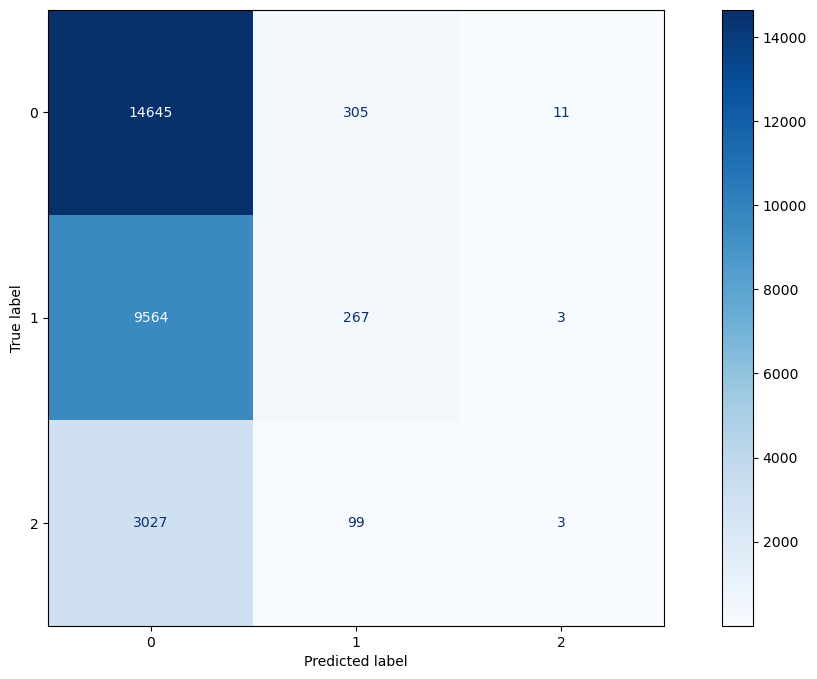

In [165]:
plot_confusion_matrix(logreg,X_test)

we're using logistic regression for classification and evaluating the model's performance using a classification report. Here's a breakdown of the report:

Precision: It measures the accuracy of the positive predictions. For class 0, the precision is 0.54, meaning that among all instances predicted as class 0, 54% were actually class 0. For class 1, the precision is 0.77, indicating that among all instances predicted as class 1, only 37% were actually class 1. For class 2, the precision is 0.

Recall: It measures the ability of the classifier to find all positive instances. For class 0, the recall is 0.98, indicating that the classifier correctly identified 98% of all actual class 0 instances. For class 1, the recall is 0.02, meaning that the classifier only captured 2% of all actual class 1 instances. For class 2, the recall is 0, meaning it hasnt captured the class 2 .

F1-score: It is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.69, for class 1, it's 0.04, and for class 2, it's 0.00.

Support: It represents the number of occurrences of each class in the dataset.

Accuracy: It is the proportion of correctly classified instances out of all instances. In this case, the accuracy is 0.53, meaning that the model correctly classified 53% of the instances.

Macro Average: It calculates the average metric for each class without considering class imbalance. For precision, recall, and F1-score, it's the average across all classes.

Weighted Average: It calculates the average metric for each class, weighted by the number of true instances for each class. It gives more weight to classes with more instances.

Overall, the model's performance appears to be better at predicting class 0 compared to the other classes, as indicated by higher precision, recall, and F1-score for class 0. However, it struggles with classes 1 and 2, especially in terms of recall and F1-score.

In [166]:
# USING RFE ,TO GET THE BEST FEATURES FOR THE BASE MODEL

from sklearn.feature_selection import RFE

logreg=LogisticRegression(random_state=1)
rfe=RFE(estimator=logreg,n_features_to_select=20)


rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(random_state=1), n_features_to_select=20)

In [167]:
feature_index=pd.Series(rfe.ranking_,index=X_train.columns).sort_values(ascending=True)
feature_index

acetohexamide                1
change                       1
metformin-pioglitazone       1
metformin-rosiglitazone      1
glimepiride-pioglitazone     1
glyburide-metformin          1
insulin                      1
citoglipton                  1
examide                      1
tolazamide                   1
troglitazone                 1
miglitol                     1
acarbose                     1
diabetesMed                  1
chlorpropamide               1
full_utilization             1
number_inpatient             1
time_in_hospital             1
number_emergency             1
metformin                    1
repaglinide                  2
glipizide-metformin          3
num_procedures               4
tolbutamide                  5
glipizide                    6
rosiglitazone                7
pioglitazone                 8
glyburide                    9
glimepiride                 10
num_medications             11
race                        12
nateglinide                 13
gender  

In [168]:
impfeature_rfe=feature_index[feature_index==1].index
impfeature_rfe


Index(['acetohexamide', 'change', 'metformin-pioglitazone',
       'metformin-rosiglitazone', 'glimepiride-pioglitazone',
       'glyburide-metformin', 'insulin', 'citoglipton', 'examide',
       'tolazamide', 'troglitazone', 'miglitol', 'acarbose', 'diabetesMed',
       'chlorpropamide', 'full_utilization', 'number_inpatient',
       'time_in_hospital', 'number_emergency', 'metformin'],
      dtype='object')

### K-NEAREST NEIGHBOURS

THOUGH KNN MODEL IS LESS SENSITIVE TO MULTICOLLINEARITY, IT STILL GETS AFFECTED DUE TO ITS RELIANCE ON DISTANCE METRICS

In [734]:
tuned_parameters={'n_neighbors':np.arange(10,50,5),
                 "metric":["euclidean","manhattan","Chebyshev"]}


knn_classification=KNeighborsClassifier()

knn_grid=GridSearchCV(estimator=knn_classification, param_grid=tuned_parameters,cv=5,scoring="accuracy")

knn_grid.fit(X_train,y_train)
print("Best parameters for KNN classifier :",knn_grid.best_params_,"\n")

Best parameters for KNN classifier : {'metric': 'manhattan', 'n_neighbors': 45} 



In [169]:
knn_classification = KNeighborsClassifier(n_neighbors = 45,metric='manhattan')
knn_model = knn_classification.fit(X_train,y_train)

test_pred=knn_classification.predict(X_test)
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.56      0.85      0.67     14961
           1       0.42      0.21      0.28      9834
           2       0.39      0.00      0.01      3129

    accuracy                           0.53     27924
   macro avg       0.45      0.36      0.32     27924
weighted avg       0.49      0.53      0.46     27924



In [170]:
knn_acc=accuracy_score(y_test,test_pred)
knn_recall=recall_score(y_test,test_pred,labels=[2],average=None)
knn_f1=f1_score(y_test,test_pred,labels=[2],average=None)
knn_precision=precision_score(y_test,test_pred,labels=[2],average=None)

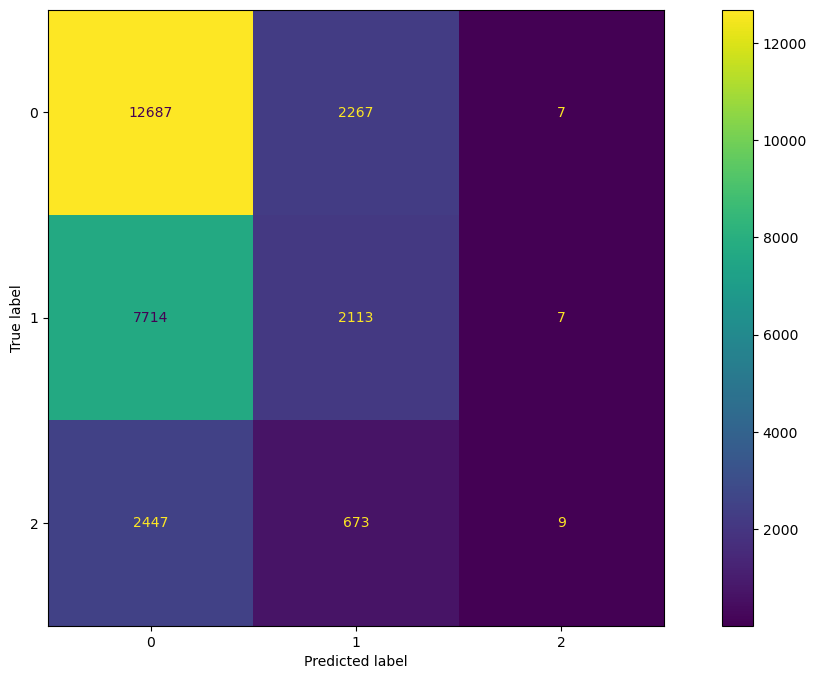

In [171]:
from sklearn.metrics import ConfusionMatrixDisplay

print(ConfusionMatrixDisplay.from_predictions(y_test,test_pred))

Recall: 0.00
Inference: The model fails entirely to identify patients who are readmitted within 30 days, capturing none of the actual readmission cases. This indicates a severe deficiency in the model’s ability to fulfill the primary objective.
Other Classes for Contex
t:
Class 0 (Not readmitted within 30 days):

Recall: 0.85
Inference: High recall suggests the model is good at identifying non-readmitted pat
ients.
Class 1 (Other or no data):

Recall: 0.21
Inference: The model also struggles with this class, but the critical issue remains wit
h Class 2.
Overall Model P
erformance:
Macro Average 
Recall: 0.36
Inference: This low recall average across all classes further highlights the model's inadequacies, especially its complete failure on Class 2.ithin 30 days.

### GAUSSIAN NAIVE BAYES

Multicollinearity is a Problem for GNB:

Independence Assumption:

GNB relies on the assumption that each feature contributes independently to the probability of a given class. When features are highly correlated, this assumption is violated.
Redundant Information: Correlated features provide redundant information, which can distort the probability estimates and reduce the classifier’s accuracy.

              precision    recall  f1-score   support

           0       0.62      0.73      0.67     14961
           1       0.39      0.02      0.04      9834
           2       0.16      0.50      0.25      3129

    accuracy                           0.46     27924
   macro avg       0.39      0.42      0.32     27924
weighted avg       0.48      0.46      0.40     27924



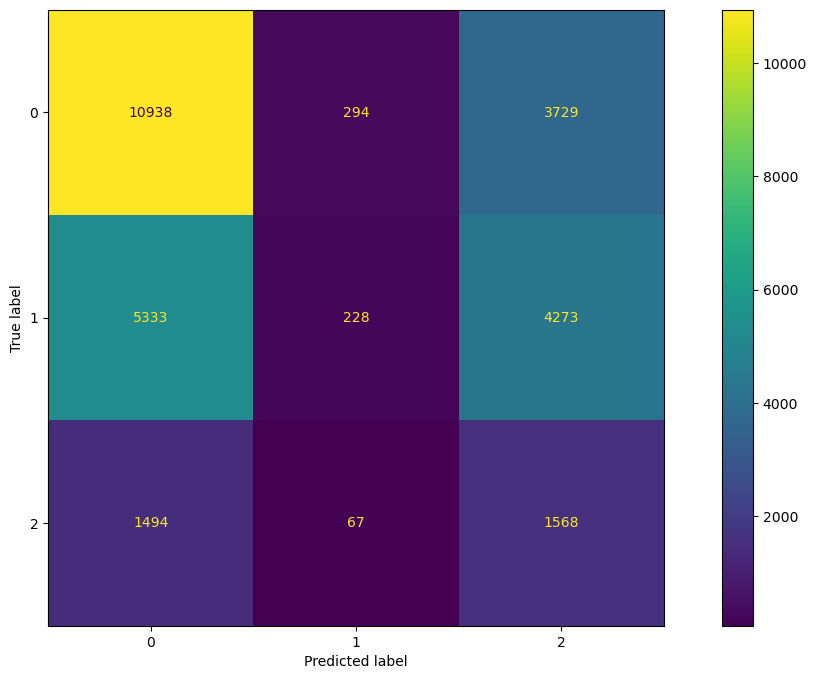

In [172]:
gnb=GaussianNB()
gnb_model=gnb.fit(X_train,y_train)

test_pred_gnb=gnb_model.predict(X_test)
print(metrics.classification_report(y_test, test_pred_gnb))

print(metrics.ConfusionMatrixDisplay.from_predictions(y_test,test_pred_gnb))

In [173]:
gnb_acc=accuracy_score(y_test,test_pred_gnb)
gnb_recall=recall_score(y_test,test_pred_gnb,labels=[2],average=None)
gnb_f1=f1_score(y_test,test_pred_gnb,labels=[2],average=None)
gnb_precision=precision_score(y_test,test_pred_gnb,labels=[2],average=None)



FOR THE FORTHCOMING MODELS, ALL THE FEATURES ARE USED ON MODEL BUILDING AS THESE MODELS ARE ROBUST TO MULTICOLLINEARITY

In [174]:
X_new=df_with_out.drop(["readmitted"],axis=1)

y_new=df_with_out.readmitted

print(X_new.shape)
print(y_new.shape)

(101766, 42)
(101766,)


In [168]:
print(X_new.shape)
print(y_new.shape)

(101766, 42)
(101766,)


In [175]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_new,y_new,test_size=0.3,random_state=4)


print("X_train shape: ",X_train_new.shape)
print("X_test shape: ",X_test_new.shape)
print("Y_train shape: ",y_train_new.shape)
print("Y_test shape: ",y_test_new.shape)

X_train shape:  (71236, 42)
X_test shape:  (30530, 42)
Y_train shape:  (71236,)
Y_test shape:  (30530,)


### DECISION TREE

In [188]:
param_grid={"max_depth":[10,15,20,25,30], 
            "min_samples_leaf":[3,15,30],
            "min_samples_split":[15,30,35,40,45],
            "max_features":["sqrt","log2"],
            "max_leaf_nodes":range(2,10,2)}

decision_tree_classification = DecisionTreeClassifier(random_state=10)

tree_grid = GridSearchCV(estimator = decision_tree_classification,
                        param_grid = param_grid, cv = 5,n_jobs=-1)

tree_grid_model = tree_grid.fit(X_train_new, y_train_new)

print('Best parameters for the decision tree classifier:', tree_grid_model.best_params_,'\n')



Best parameters for the decision tree classifier: {'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 8, 'min_samples_leaf': 3, 'min_samples_split': 15} 



Best parameters for the decision tree classifier: {'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 8, 'min_samples_leaf': 3, 'min_samples_split': 15} 


In [189]:
# AGAIN FINE TUNING
param_grid={"max_depth":range(2,10,2), 
            "min_samples_leaf":[3],
            "min_samples_split":range(3,15,3),
            "max_features":["log2"],
            "max_leaf_nodes":[6]}

decision_tree_classification = DecisionTreeClassifier(random_state=10)

tree_grid = GridSearchCV(estimator = decision_tree_classification,
                        param_grid = param_grid, cv = 5)

tree_grid_model = tree_grid.fit(X_train_new, y_train_new)

print('Best parameters for the decision tree classifier:', tree_grid_model.best_params_,'\n')

Best parameters for the decision tree classifier: {'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': 6, 'min_samples_leaf': 3, 'min_samples_split': 3} 



Best parameters for the decision tree classifier: {'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': 6, 'min_samples_leaf': 3, 'min_samples_split': 3} 


              precision    recall  f1-score   support

           0       0.62      0.75      0.68     16482
           1       0.45      0.44      0.44     10635
           2       0.00      0.00      0.00      3413

    accuracy                           0.56     30530
   macro avg       0.35      0.40      0.37     30530
weighted avg       0.49      0.56      0.52     30530



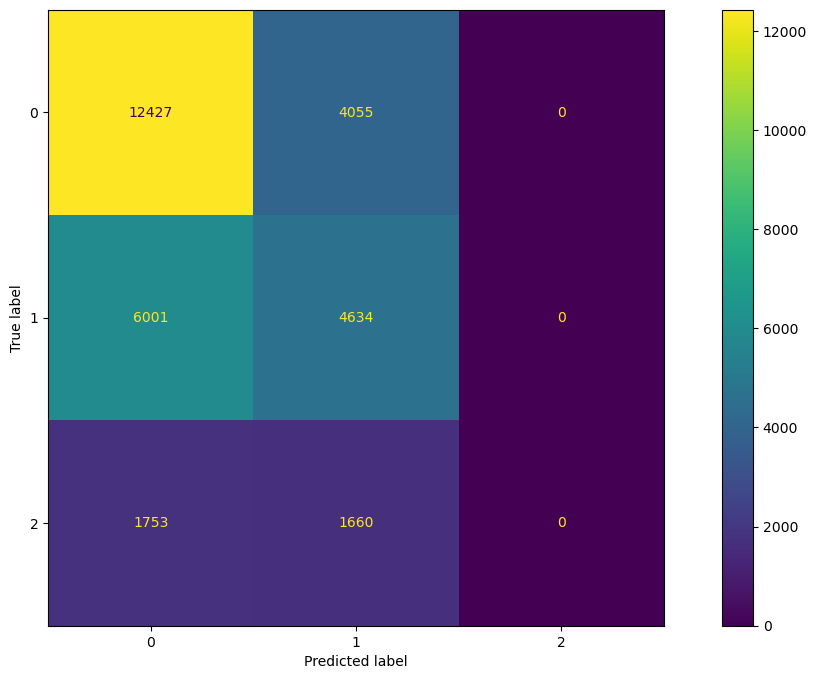

In [176]:
# final decision tree model

dt_model = DecisionTreeClassifier(max_depth = 4,
                                 min_samples_leaf =3,
                                 min_samples_split = 3,
                                max_features="log2",
                                  max_leaf_nodes=6,
                                  random_state=10)
                                                                              

dt_model = dt_model.fit(X_train_new, y_train_new)

test_pred_dt=dt_model.predict(X_test_new)
print(metrics.classification_report(y_test_new, test_pred_dt))

print(metrics.ConfusionMatrixDisplay.from_predictions(y_test_new,test_pred_dt))

In [177]:
dt_acc=accuracy_score(y_test_new,test_pred_dt)
dt_recall=recall_score(y_test_new,test_pred_dt,labels=[2],average=None)
dt_f1=f1_score(y_test_new,test_pred_dt,labels=[2],average=None)
dt_precision=precision_score(y_test_new,test_pred_dt,labels=[2],average=None)


In [178]:
# retriving important features from decision tree model

dt_imp_features=pd.DataFrame()

dt_imp_features["Features"]=X_train_new.columns
dt_imp_features["Feature_imp_val"]=dt_model.feature_importances_

dt_imp_features.sort_values("Feature_imp_val",ascending=False).reset_index()

index                  Features  Feature_imp_val
0      11          number_inpatient         0.577844
1      10          number_emergency         0.277549
2      15          number_diagnoses         0.077931
3       8           num_medications         0.066676
4      32               citoglipton         0.000000
5      25              pioglitazone         0.000000
6      26             rosiglitazone         0.000000
7      27                  acarbose         0.000000
8      28                  miglitol         0.000000
9      29              troglitazone         0.000000
10     30                tolazamide         0.000000
11     31                   examide         0.000000
12      0                      race         0.000000
13     33                   insulin         0.000000
14     23                 glyburide         0.000000
15     34       glyburide-metformin         0.000000
16     35       glipizide-metformin         0.000000
17     36  glimepiride-pioglitazone         0.000000
18     37   metformin-rosiglitazone         0.000000
19     38    metformin-pioglitazone         0.000000
20     39                    change         0.000000
21     40               diabetesMed         0.000000
22     24               tolbutamide         0.000000
23     21             acetohexamide         0.000000
24     22                 glipizide         0.000000
25      1                    gender         0.000000
26      2         admission_type_id         0.000000
27      3  discharge_disposition_id         0.000000
28      4       admission_source_id         0.000000
29      5          time_in_hospital         0.000000
30      6        num_lab_procedures         0.000000
31      7            num_procedures         0.000000
32      9         number_outpatient         0.000000
33     12                    diag_1         0.000000
34     13                    diag_2         0.000000
35     14                    diag_3         0.000000
36     16                 metformin         0.000000
37     17               repaglinide         0.000000
38     18               nateglinide         0.000000
39     19            chlorpropamide         0.000000
40     20               glimepiride         0.000000
41     41          full_utilization         0.000000

### RANDOM FOREST MODEL

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
# fine tuning
param_grid={ "max_depth":range(10,15,2), "min_samples_leaf":range(3,15,3),"min_samples_split":[15,30],"n_estimators":[300,500]}

rfc=RandomForestClassifier(random_state=123)
grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,n_jobs=-1)

grid_search.fit(X_train_new,y_train_new)

print("Best paramaters :",grid_search.best_params_)

Best paramaters : {'max_depth': 14, 'min_samples_leaf': 9, 'min_samples_split': 30, 'n_estimators': 500}


In [195]:
# again fine tuning
param_grid={ "max_depth":range(8,15,3), "min_samples_leaf":[9],"min_samples_split":range(30,40,2),"n_estimators":[500]}

rfc=RandomForestClassifier(random_state=123)
grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,n_jobs=-1)

grid_search.fit(X_train_new,y_train_new)

print("Best paramaters :",grid_search.best_params_)

Best paramaters : {'max_depth': 14, 'min_samples_leaf': 9, 'min_samples_split': 30, 'n_estimators': 500}


In [170]:
# again fine tuning
param_grid={ "max_depth":[14], "min_samples_leaf":[9],"min_samples_split":[30],"n_estimators":[500,600]}

rfc=RandomForestClassifier(random_state=123)
grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,n_jobs=-1)

grid_search.fit(X_train_new,y_train_new)

print("Best paramaters :",grid_search.best_params_)

Best paramaters : {'max_depth': 14, 'min_samples_leaf': 9, 'min_samples_split': 30, 'n_estimators': 500}


              precision    recall  f1-score   support

           0       0.61      0.85      0.71     16482
           1       0.50      0.35      0.41     10635
           2       0.80      0.00      0.00      3413

    accuracy                           0.58     30530
   macro avg       0.64      0.40      0.38     30530
weighted avg       0.59      0.58      0.53     30530



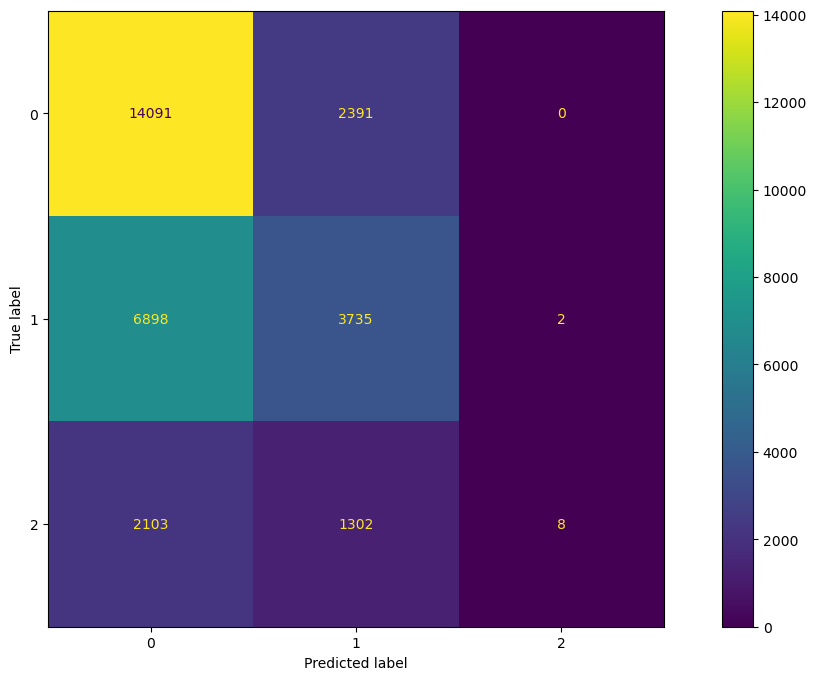

In [180]:
# final rf model

rfc=RandomForestClassifier(max_depth=14,min_samples_leaf=9,min_samples_split=30,n_estimators=500,random_state=123)

rfc_model=rfc.fit(X_train_new,y_train_new)


test_pred_rf=rfc_model.predict(X_test_new)
print(metrics.classification_report(y_test_new, test_pred_rf))

print(metrics.ConfusionMatrixDisplay.from_predictions(y_test_new,test_pred_rf))

In [181]:
rf_acc=accuracy_score(y_test_new,test_pred_rf)
rf_recall=recall_score(y_test_new,test_pred_rf,labels=[2],average=None)
rf_f1=f1_score(y_test_new,test_pred_rf,labels=[2],average=None)
rf_precision=precision_score(y_test_new,test_pred_rf,labels=[2],average=None)

In [182]:
# retriving important features from randm forest  model

rf_imp_features=pd.DataFrame()

rf_imp_features["Features"]=X_train_new.columns
rf_imp_features["Feature_imp_val"]=rfc_model.feature_importances_

rf_imp_features.sort_values("Feature_imp_val",ascending=False).reset_index()

index                  Features  Feature_imp_val
0      41          full_utilization         0.139969
1      11          number_inpatient         0.130482
2       3  discharge_disposition_id         0.086534
3      12                    diag_1         0.065153
4       6        num_lab_procedures         0.061632
5      13                    diag_2         0.059976
6      14                    diag_3         0.059403
7       8           num_medications         0.056540
8      15          number_diagnoses         0.050513
9       5          time_in_hospital         0.038265
10      4       admission_source_id         0.035157
11     10          number_emergency         0.032524
12      9         number_outpatient         0.029474
13      7            num_procedures         0.029071
14      2         admission_type_id         0.026725
15     33                   insulin         0.020110
16      0                      race         0.013102
17     40               diabetesMed         0.012962
18      1                    gender         0.010345
19     16                 metformin         0.008800
20     39                    change         0.007954
21     22                 glipizide         0.006869
22     23                 glyburide         0.005420
23     25              pioglitazone         0.004006
24     26             rosiglitazone         0.003924
25     20               glimepiride         0.002832
26     17               repaglinide         0.001301
27     34       glyburide-metformin         0.000500
28     18               nateglinide         0.000263
29     27                  acarbose         0.000190
30     19            chlorpropamide         0.000003
31     28                  miglitol         0.000002
32     36  glimepiride-pioglitazone         0.000000
33     38    metformin-pioglitazone         0.000000
34     37   metformin-rosiglitazone         0.000000
35     29              troglitazone         0.000000
36     35       glipizide-metformin         0.000000
37     32               citoglipton         0.000000
38     31                   examide         0.000000
39     30                tolazamide         0.000000
40     24               tolbutamide         0.000000
41     21             acetohexamide         0.000000

## GRADIENT BOOSTING MODEL

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

In [175]:
param_grid={
            "n_estimators":[100,200,300],
           "min_samples_split":[30,50,100],
           "learning_rate":[0.1]
           }


gbr=GradientBoostingClassifier(random_state=123)
grid_search=GridSearchCV(estimator=gbr,param_grid=param_grid,cv=5,n_jobs=-1)

grid_search.fit(X_train_new,y_train_new)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [100, 200, 300]})

In [178]:
print("Best paramaters :",grid_search.best_params_)

Best paramaters : {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 30, 'n_estimators': 300}


In [177]:
# tuning further

param_grid={
            "n_estimators":[300],
           "min_samples_split":[30],
           "learning_rate":[0.1],
          "max_depth":range(3,15,3)
           }


gbr=GradientBoostingClassifier(random_state=123)
grid_search=GridSearchCV(estimator=gbr,param_grid=param_grid,cv=5,n_jobs=-1)

grid_search.fit(X_train_new,y_train_new)

print("Best paramaters :",grid_search.best_params_)

Best paramaters : {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 30, 'n_estimators': 300}


              precision    recall  f1-score   support

           0       0.62      0.84      0.72     16482
           1       0.51      0.38      0.44     10635
           2       0.43      0.03      0.05      3413

    accuracy                           0.59     30530
   macro avg       0.52      0.42      0.40     30530
weighted avg       0.56      0.59      0.55     30530



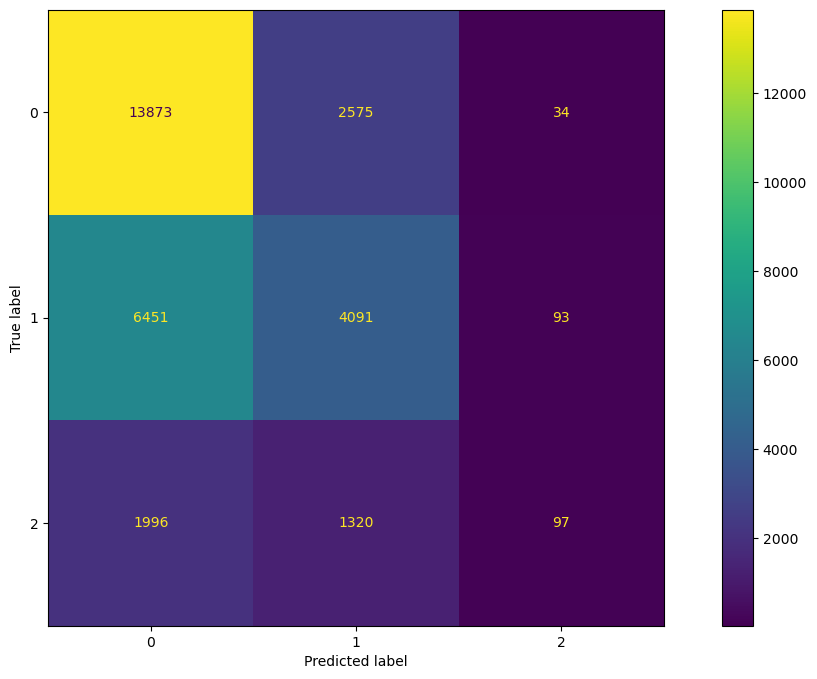

In [184]:
# final gb model
gbr=GradientBoostingClassifier(n_estimators=300,learning_rate=0.1,min_samples_split=30,max_depth=3)

gbr.fit(X_train_new,y_train_new)

test_pred_gb=gbr.predict(X_test_new)
print(metrics.classification_report(y_test_new, test_pred_gb))

print(metrics.ConfusionMatrixDisplay.from_predictions(y_test_new,test_pred_gb))

In [185]:
gb_acc=accuracy_score(y_test_new,test_pred_gb)
gb_recall=recall_score(y_test_new,test_pred_gb,labels=[2],average=None)
gb_f1=f1_score(y_test_new,test_pred_gb,labels=[2],average=None)
gb_precision=precision_score(y_test_new,test_pred_gb,labels=[2],average=None)

In [186]:
# retriving important features from gradient boosting model

gb_imp_features=pd.DataFrame()

gb_imp_features["Features"]=X_train_new.columns
gb_imp_features["Feature_imp_val"]=gbr.feature_importances_

gb_imp_features.sort_values("Feature_imp_val",ascending=False).reset_index()

index                  Features  Feature_imp_val
0      41          full_utilization         0.238450
1       3  discharge_disposition_id         0.181635
2      11          number_inpatient         0.164424
3      12                    diag_1         0.057397
4      13                    diag_2         0.047863
5      15          number_diagnoses         0.046521
6       4       admission_source_id         0.040877
7       6        num_lab_procedures         0.033933
8      14                    diag_3         0.032669
9       8           num_medications         0.028541
10      2         admission_type_id         0.018973
11      5          time_in_hospital         0.017538
12     40               diabetesMed         0.015647
13      7            num_procedures         0.014638
14     10          number_emergency         0.012412
15     33                   insulin         0.008684
16      9         number_outpatient         0.007362
17      0                      race         0.006760
18     16                 metformin         0.005653
19     26             rosiglitazone         0.002795
20     25              pioglitazone         0.002616
21     23                 glyburide         0.002606
22     22                 glipizide         0.002310
23      1                    gender         0.001947
24     27                  acarbose         0.001799
25     17               repaglinide         0.001567
26     34       glyburide-metformin         0.001293
27     20               glimepiride         0.000640
28     18               nateglinide         0.000606
29     39                    change         0.000603
30     19            chlorpropamide         0.000434
31     28                  miglitol         0.000272
32     30                tolazamide         0.000137
33     21             acetohexamide         0.000132
34     35       glipizide-metformin         0.000119
35     24               tolbutamide         0.000062
36     36  glimepiride-pioglitazone         0.000055
37     29              troglitazone         0.000030
38     32               citoglipton         0.000000
39     31                   examide         0.000000
40     37   metformin-rosiglitazone         0.000000
41     38    metformin-pioglitazone         0.000000

## XGBOOST MODEL

In [199]:
#!pip install xgboost

In [187]:
from xgboost import XGBClassifier

In [183]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [30, 50, 100],
    "learning_rate": [0.1]
}

xgb_model = XGBClassifier(random_state=123)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train_new, y_train_new)

print("Best parameters found:", grid_search.best_params_)

[12:46:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Best parameters found: {'learning_rate': 0.1, 'min_samples_split': 30, 'n_estimators': 200}


In [209]:
# again fine tuning
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [200],
    "min_samples_split": [10,20,30],
    "learning_rate": [0.1]
}

xgb_model = XGBClassifier(random_state=123)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train_new, y_train_new)

print("Best parameters found:", grid_search.best_params_)

[19:07:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Best parameters found: {'learning_rate': 0.1, 'min_samples_split': 10, 'n_estimators': 200}


In [199]:
# again fine tuning
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [200],
    "min_samples_split": range(3,10,3),
    "learning_rate": [0.1]
}

xgb_model = XGBClassifier(random_state=123)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train_new, y_train_new)

print("Best parameters found:", grid_search.best_params_)

[10:36:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Best parameters found: {'learning_rate': 0.1, 'min_samples_split': 3, 'n_estimators': 200}


In [249]:
xgb_model.classes_

array([0, 1, 2], dtype=int64)

[20:06:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.62      0.83      0.71     16482
           1       0.51      0.40      0.45     10635
           2       0.45      0.03      0.06      3413

    accuracy                           0.59     30530
   macro avg       0.53      0.42      0.41     30530
weighted avg       0.56      0.59      0.55     30530



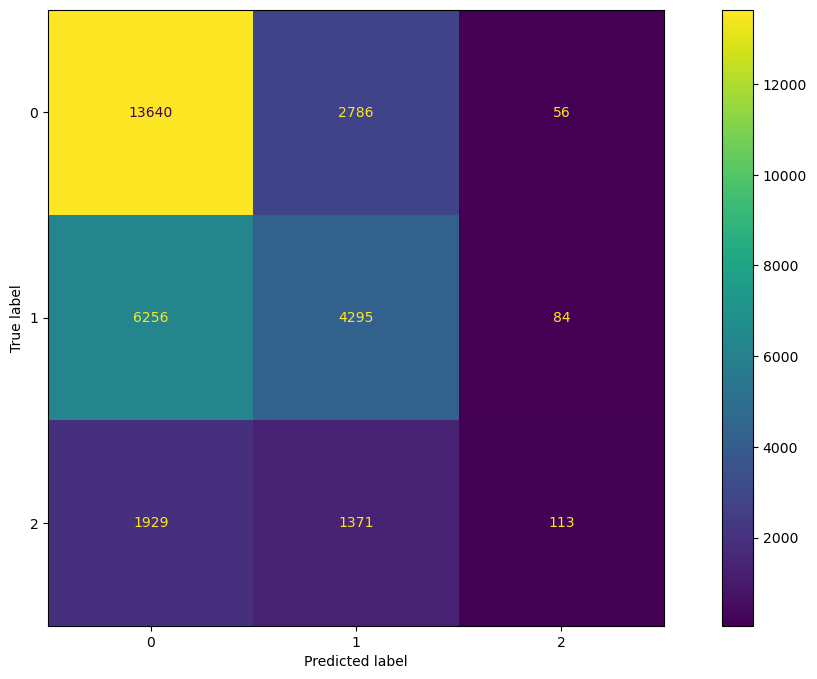

In [188]:
#final XGBoost model

xgb_model = XGBClassifier(learning_rate=0.1, min_samples_split=3, n_estimators=200, random_state=123)

xgb_model.fit(X_train_new, y_train_new)

test_pred_xgb = xgb_model.predict(X_test_new)

print(metrics.classification_report(y_test_new, test_pred_xgb))

print(metrics.ConfusionMatrixDisplay.from_predictions(y_test_new,test_pred_xgb))


In [189]:
xgb_acc=accuracy_score(y_test_new,test_pred_xgb)
xgb_recall=recall_score(y_test_new,test_pred_xgb,labels=[2],average=None)
xgb_f1=f1_score(y_test_new,test_pred_xgb,labels=[2],average=None)
xgb_precision=precision_score(y_test_new,test_pred_xgb,labels=[2],average=None)

In [190]:
# retriving important features from Xtreme gradient boosting model

xgb_imp_features=pd.DataFrame()

xgb_imp_features["Features"]=X_train_new.columns
xgb_imp_features["Feature_imp_val"]=xgb_model.feature_importances_

xgb_imp_features.sort_values("Feature_imp_val",ascending=False).reset_index()

index                  Features  Feature_imp_val
0      41          full_utilization         0.157723
1      11          number_inpatient         0.130793
2       3  discharge_disposition_id         0.074900
3      40               diabetesMed         0.043675
4       4       admission_source_id         0.038653
5      15          number_diagnoses         0.036664
6       2         admission_type_id         0.025643
7      12                    diag_1         0.023427
8       7            num_procedures         0.023145
9      10          number_emergency         0.021785
10     16                 metformin         0.021746
11     13                    diag_2         0.021288
12     33                   insulin         0.020823
13      0                      race         0.020613
14      6        num_lab_procedures         0.020295
15      5          time_in_hospital         0.020229
16     14                    diag_3         0.019818
17      8           num_medications         0.019731
18     22                 glipizide         0.019520
19     27                  acarbose         0.019014
20      9         number_outpatient         0.018482
21     26             rosiglitazone         0.018159
22     20               glimepiride         0.018118
23     25              pioglitazone         0.018044
24     39                    change         0.017999
25      1                    gender         0.017143
26     23                 glyburide         0.016494
27     17               repaglinide         0.015930
28     34       glyburide-metformin         0.014982
29     30                tolazamide         0.014208
30     28                  miglitol         0.013399
31     18               nateglinide         0.013258
32     35       glipizide-metformin         0.010942
33     24               tolbutamide         0.006935
34     19            chlorpropamide         0.006422
35     31                   examide         0.000000
36     32               citoglipton         0.000000
37     29              troglitazone         0.000000
38     36  glimepiride-pioglitazone         0.000000
39     37   metformin-rosiglitazone         0.000000
40     38    metformin-pioglitazone         0.000000
41     21             acetohexamide         0.000000

### STACKING MODEL WITH XGB,GB AS BASE MODEL AND GAUSSIAN NB AS META MODEL

[20:07:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:09:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:10:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not 

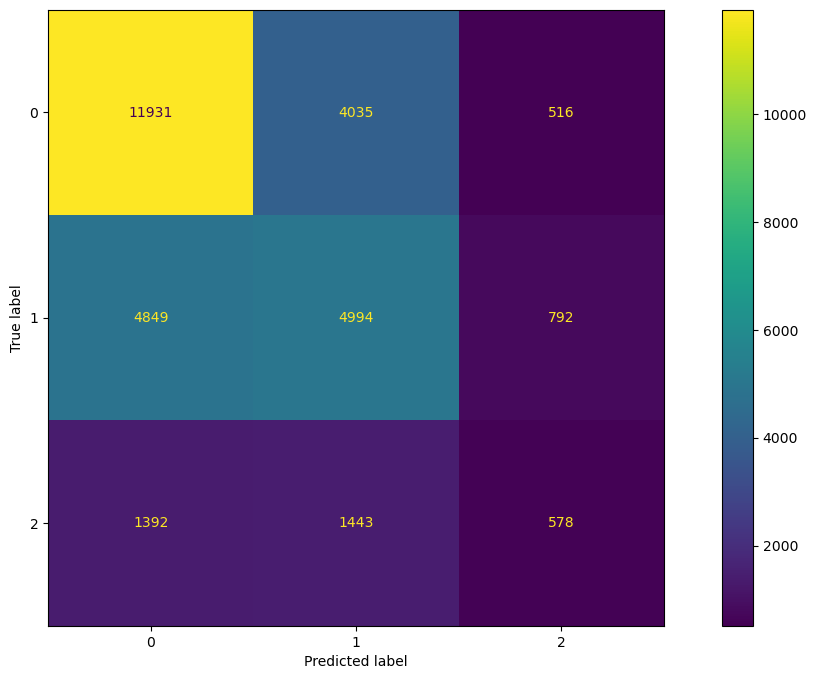

In [191]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

base_classifiers = [
    ('xgb', XGBClassifier(learning_rate=0.1, min_samples_split=3, n_estimators=200, random_state=123)),
    ('gb', GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, random_state=123,min_samples_split=30,max_depth=3))
]


stacking_model = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=GaussianNB()
)

stacking_model.fit(X_train_new, y_train_new)

test_pred_stacking = stacking_model.predict(X_test_new)


print("Classification Report for Stacking Model:")
print(metrics.classification_report(y_test_new, test_pred_stacking))


conf_matrix_stacking = metrics.confusion_matrix(y_test_new, test_pred_stacking)
conf_matrix_display_stacking = metrics.ConfusionMatrixDisplay(conf_matrix_stacking, display_labels=stacking_model.classes_)
conf_matrix_display_stacking.plot()


In [192]:
stack_acc=accuracy_score(y_test_new,test_pred_stacking)
stack_recall=recall_score(y_test_new,test_pred_stacking,labels=[2],average=None)
stack_f1=f1_score(y_test_new,test_pred_stacking,labels=[2],average=None)
stack_precision=precision_score(y_test_new,test_pred_stacking,labels=[2],average=None)

### STACKING MODEL WITH LOGISTIC REGRESSION AS BASE MODEL AND GNB AS META MODEL

Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0       0.55      0.84      0.67     14961
           1       0.43      0.21      0.28      9834
           2       0.13      0.02      0.03      3129

    accuracy                           0.53     27924
   macro avg       0.37      0.36      0.32     27924
weighted avg       0.46      0.53      0.46     27924



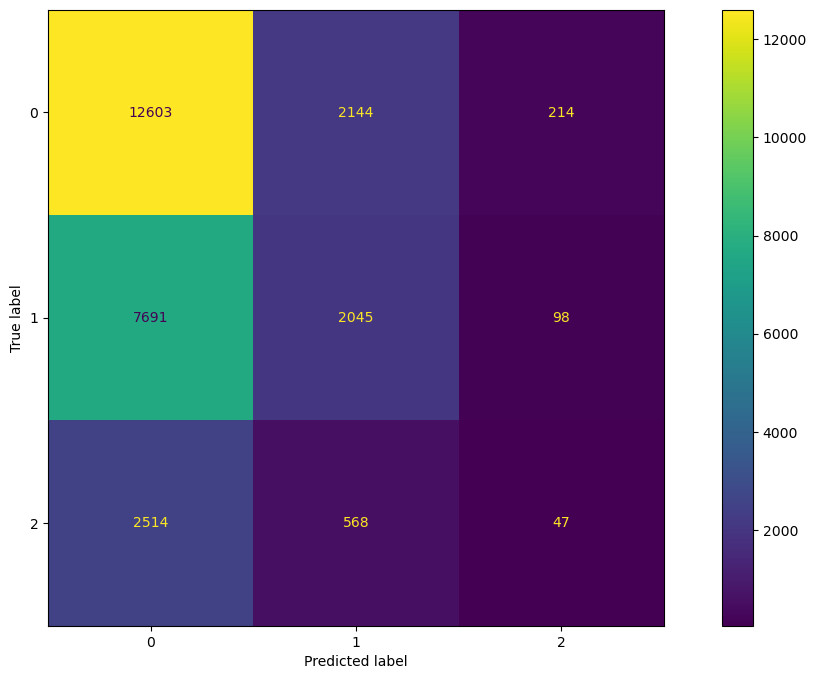

In [193]:
# stacking with logistic regreesion as base model
base_classifiers = [
    ('xgb', LogisticRegression(random_state=123))
]


stacking_model = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=GaussianNB()
)

stacking_model.fit(X_train, y_train)

test_pred_stacking_2 = stacking_model.predict(X_test)


print("Classification Report for Stacking Model:")
print(metrics.classification_report(y_test, test_pred_stacking_2))

print(metrics.ConfusionMatrixDisplay.from_predictions(y_test,test_pred_stacking_2))


In [194]:
stack2_acc=accuracy_score(y_test,test_pred_stacking_2)
stack2_recall=recall_score(y_test,test_pred_stacking_2,labels=[2],average=None)
stack2_f1=f1_score(y_test,test_pred_stacking_2,labels=[2],average=None)
stack2_precision=precision_score(y_test,test_pred_stacking_2,labels=[2],average=None)

## ADA BOOSTING MODEL

In [195]:
from sklearn.ensemble import AdaBoostClassifier

In [196]:
X_train_new.shape
y_train_new.shape

(71236,)

In [195]:
# parameter tuning
tuned_paramaters = [{'n_estimators': range(100,500,100),"learning_rate" :[0.1, 0.01, 0.001, 0.15, 0.015] }]
   
    
ada_model = AdaBoostClassifier(random_state = 123)
ada_grid = GridSearchCV(estimator = ada_model, 
                       param_grid = tuned_paramaters, cv = 5,n_jobs=-1)
ada_model = ada_grid.fit(X_train_new, y_train_new)
print('Best parameters: ', ada_model.best_params_, '\n')

Best parameters:  {'learning_rate': 0.15, 'n_estimators': 400} 



              precision    recall  f1-score   support

           0       0.61      0.87      0.71     16482
           1       0.51      0.33      0.40     10635
           2       0.40      0.01      0.02      3413

    accuracy                           0.58     30530
   macro avg       0.50      0.40      0.38     30530
weighted avg       0.55      0.58      0.53     30530



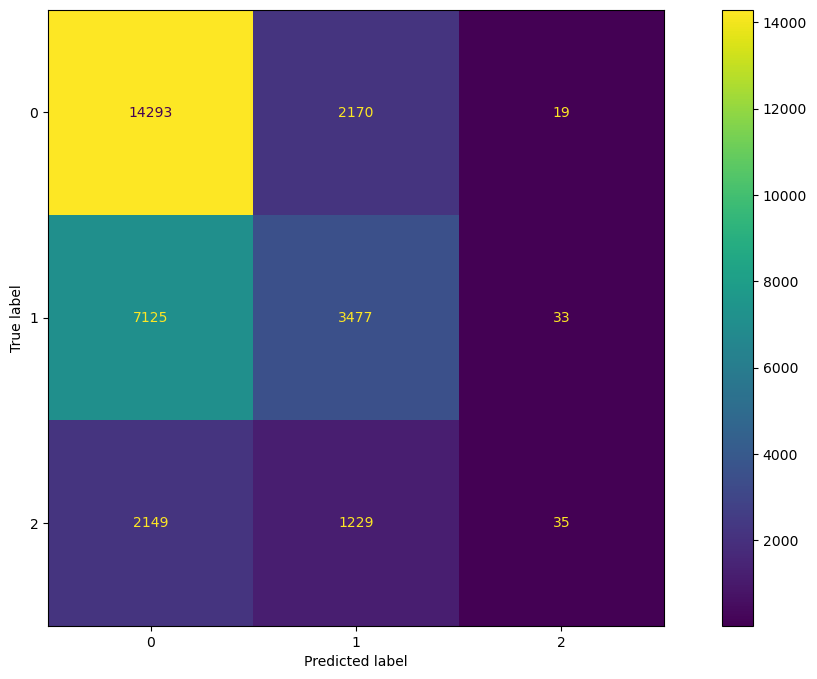

In [197]:
# final adaboost model
ada_model = AdaBoostClassifier(n_estimators=400,learning_rate=0.15,random_state = 123)

ada_model.fit(X_train_new,y_train_new)
test_pred_Ada=ada_model.predict(X_test_new)


print(metrics.classification_report(y_test_new, test_pred_Ada))

print(metrics.ConfusionMatrixDisplay.from_predictions(y_test_new,test_pred_Ada))




In [198]:
ada_acc=accuracy_score(y_test_new,test_pred_Ada)
ada_recall=recall_score(y_test_new,test_pred_Ada,labels=[2],average=None)
ada_f1=f1_score(y_test_new,test_pred_Ada,labels=[2],average=None)
ada_precision=precision_score(y_test_new,test_pred_Ada,labels=[2],average=None)

In [199]:
# retriving important features from Xtreme gradient boosting model

ada_imp_features=pd.DataFrame()

ada_imp_features["Features"]=X_train_new.columns
ada_imp_features["Feature_imp_val"]=ada_model.feature_importances_

ada_imp_features.sort_values("Feature_imp_val",ascending=False).reset_index()

index                  Features  Feature_imp_val
0       3  discharge_disposition_id         0.492500
1      12                    diag_1         0.067500
2      11          number_inpatient         0.062500
3      14                    diag_3         0.042500
4      13                    diag_2         0.040000
5       4       admission_source_id         0.030000
6       8           num_medications         0.030000
7      10          number_emergency         0.027500
8      15          number_diagnoses         0.022500
9      41          full_utilization         0.022500
10      2         admission_type_id         0.022500
11      9         number_outpatient         0.020000
12      5          time_in_hospital         0.020000
13     40               diabetesMed         0.017500
14      7            num_procedures         0.015000
15     16                 metformin         0.015000
16      6        num_lab_procedures         0.012500
17     33                   insulin         0.012500
18     20               glimepiride         0.007500
19      1                    gender         0.005000
20     26             rosiglitazone         0.005000
21      0                      race         0.005000
22     22                 glipizide         0.002500
23     27                  acarbose         0.002500
24     18               nateglinide         0.000000
25     17               repaglinide         0.000000
26     39                    change         0.000000
27     38    metformin-pioglitazone         0.000000
28     37   metformin-rosiglitazone         0.000000
29     36  glimepiride-pioglitazone         0.000000
30     35       glipizide-metformin         0.000000
31     34       glyburide-metformin         0.000000
32     32               citoglipton         0.000000
33     23                 glyburide         0.000000
34     31                   examide         0.000000
35     30                tolazamide         0.000000
36     29              troglitazone         0.000000
37     28                  miglitol         0.000000
38     19            chlorpropamide         0.000000
39     25              pioglitazone         0.000000
40     24               tolbutamide         0.000000
41     21             acetohexamide         0.000000

### TABLE SHOWING METRICS FOR DIFFERENT MODELS

In [200]:
index=['Accuracy', 'Recall','Precision','F1 Score']
metric_table=pd.DataFrame({"Logistic_regression":[logreg_acc,logreg_recall,logreg_precision,logreg_f1],
                            "KNN":[knn_acc,knn_recall,knn_precision,knn_f1],
                            "Gausian NB":[gnb_acc,gnb_recall,gnb_precision,gnb_f1],
                            "Decision Tree":[dt_acc,dt_recall,dt_precision,dt_f1],
                            "Random Forest":[rf_acc,rf_recall,rf_precision,rf_f1],
                            "Gradient Boosting":[gb_acc,gb_recall,gb_precision,gb_f1],
                            "XGB":[xgb_acc,xgb_recall,xgb_precision,xgb_f1],
                           "AdaBoost":[ada_acc,ada_recall,ada_precision,ada_f1],
                            "Stacking Model":[stack_acc,stack_recall,stack_precision,stack_f1],
                            "Stacking Model2":[stack2_acc,stack2_recall,stack2_precision,stack2_f1]},index=index)

round(metric_table,2)

Logistic_regression                      KNN  \
Accuracy                  0.534128                 0.530332   
Recall     [0.0009587727708533077]  [0.0028763183125599234]   
Precision    [0.17647058823529413]      [0.391304347826087]   
F1 Score   [0.0019071837253655435]   [0.005710659898477157]   

                      Gausian NB Decision Tree            Random Forest  \
Accuracy                0.456023      0.558827                 0.584147   
Recall      [0.5011185682326622]         [0.0]  [0.0023439789041898623]   
Precision   [0.1638453500522466]         [0.0]                    [0.8]   
F1 Score   [0.24694857862823844]         [0.0]   [0.004674262342973999]   

                Gradient Boosting                     XGB  \
Accuracy                 0.591582                0.591156   
Recall      [0.02842074421330208]  [0.033108702021681806]   
Precision    [0.4330357142857143]   [0.44664031620553357]   
F1 Score   [0.053340665383557875]   [0.06164757228587016]   

                         AdaBoost         Stacking Model  \
Accuracy                 0.583197               0.573305   
Recall     [0.010254907705830648]  [0.16935247582771756]   
Precision   [0.40229885057471265]   [0.3064687168610817]   
F1 Score                   [0.02]  [0.21815436874882052]   

                  Stacking Model2  
Accuracy                 0.526250  
Recall     [0.015020773410035155]  
Precision    [0.1309192200557103]  
F1 Score    [0.02694954128440367]

In [201]:
# Sort the DataFrame by the 'Recall' index
sorted_metric_table = metric_table.sort_values(by='Recall', axis=1, ascending=False)

rounded_sorted_metric_table = round(sorted_metric_table, 2)
rounded_sorted_metric_table


Gausian NB         Stacking Model  \
Accuracy                0.456023               0.573305   
Recall      [0.5011185682326622]  [0.16935247582771756]   
Precision   [0.1638453500522466]   [0.3064687168610817]   
F1 Score   [0.24694857862823844]  [0.21815436874882052]   

                              XGB       Gradient Boosting  \
Accuracy                 0.591156                0.591582   
Recall     [0.033108702021681806]   [0.02842074421330208]   
Precision   [0.44664031620553357]    [0.4330357142857143]   
F1 Score    [0.06164757228587016]  [0.053340665383557875]   

                  Stacking Model2                AdaBoost  \
Accuracy                 0.526250                0.583197   
Recall     [0.015020773410035155]  [0.010254907705830648]   
Precision    [0.1309192200557103]   [0.40229885057471265]   
F1 Score    [0.02694954128440367]                  [0.02]   

                               KNN            Random Forest  \
Accuracy                  0.530332                 0.584147   
Recall     [0.0028763183125599234]  [0.0023439789041898623]   
Precision      [0.391304347826087]                    [0.8]   
F1 Score    [0.005710659898477157]   [0.004674262342973999]   

               Logistic_regression Decision Tree  
Accuracy                  0.534128      0.558827  
Recall     [0.0009587727708533077]         [0.0]  
Precision    [0.17647058823529413]         [0.0]  
F1 Score   [0.0019071837253655435]         [0.0]

In [203]:
# Sort the DataFrame by the 'accuracy' index
sorted_metric_table = metric_table.sort_values(by='Accuracy', axis=1, ascending=False)

rounded_sorted_metric_table = round(sorted_metric_table, 2)
rounded_sorted_metric_table


Gradient Boosting                     XGB  \
Accuracy                 0.591582                0.591156   
Recall      [0.02842074421330208]  [0.033108702021681806]   
Precision    [0.4330357142857143]   [0.44664031620553357]   
F1 Score   [0.053340665383557875]   [0.06164757228587016]   

                     Random Forest                AdaBoost  \
Accuracy                  0.584147                0.583197   
Recall     [0.0023439789041898623]  [0.010254907705830648]   
Precision                    [0.8]   [0.40229885057471265]   
F1 Score    [0.004674262342973999]                  [0.02]   

                  Stacking Model Decision Tree      Logistic_regression  \
Accuracy                0.573305      0.558827                 0.534128   
Recall     [0.16935247582771756]         [0.0]  [0.0009587727708533077]   
Precision   [0.3064687168610817]         [0.0]    [0.17647058823529413]   
F1 Score   [0.21815436874882052]         [0.0]  [0.0019071837253655435]   

                               KNN         Stacking Model2  \
Accuracy                  0.530332                0.526250   
Recall     [0.0028763183125599234]  [0.015020773410035155]   
Precision      [0.391304347826087]    [0.1309192200557103]   
F1 Score    [0.005710659898477157]   [0.02694954128440367]   

                      Gausian NB  
Accuracy                0.456023  
Recall      [0.5011185682326622]  
Precision   [0.1638453500522466]  
F1 Score   [0.24694857862823844]

 FROM THE LIST OF RESULTS OF EACH MODEL, WE CAN INFER THAT:

 The Recall which is our main evaluation metric is highest for  Gaussian Naive Bayes model, and Stacking Model.
 
Possible resons for better results:


1.Naive Bayes assumes that features are independent given the class label. This can be advantageous if the features are actually independent or weakly correlated.
Naive Bayes handles categorical data well, which is  beneficial since our dataset includes categorical features.
Naive Bayes is computationally efficient, making it suitable for large datasets.

2.Combining Strengths: Stacking combines the predictions of multiple base models(Logistic regression and Gaussian NB in our case) (meta-model), leveraging the strengths of each model to improve overall performance.
By using a diverse set of base models, the stacking model can capture different patterns and relationships in the data, leading to better generalization.
The meta-model can learn to weigh the base models appropriately, reducing the risk of overfitting that might occur with individual models.

## ANALYSING THE BEST FEATURES PRODUCED BY DIFFERENT MODELS BASED ON FEATURE IMPORTANCE SCORE

In [204]:
top_features_logreg=feature_index[feature_index==1].head(5).index.to_list()
top_features_logreg

['acetohexamide',
 'change',
 'metformin-pioglitazone',
 'metformin-rosiglitazone',
 'glimepiride-pioglitazone']

In [205]:
dt_imp_features.sort_values("Feature_imp_val",ascending=False).head(5)

Features  Feature_imp_val
11  number_inpatient         0.577844
10  number_emergency         0.277549
15  number_diagnoses         0.077931
8    num_medications         0.066676
32       citoglipton         0.000000

In [704]:
rf_imp_features.sort_values("Feature_imp_val",ascending=False).head(5)

Features  Feature_imp_val
40          full_utilization         0.143782
10          number_inpatient         0.129023
3   discharge_disposition_id         0.088039
11                    diag_1         0.066500
6         num_lab_procedures         0.062633

In [206]:
gb_imp_features.sort_values("Feature_imp_val",ascending=False).head(5)

Features  Feature_imp_val
41          full_utilization         0.238450
3   discharge_disposition_id         0.181635
11          number_inpatient         0.164424
12                    diag_1         0.057397
13                    diag_2         0.047863

In [207]:
xgb_imp_features.sort_values("Feature_imp_val",ascending=False).head(5)

Features  Feature_imp_val
41          full_utilization         0.157723
11          number_inpatient         0.130793
3   discharge_disposition_id         0.074900
40               diabetesMed         0.043675
4        admission_source_id         0.038653

In [208]:
ada_imp_features.sort_values("Feature_imp_val",ascending=False).head(5)

Features  Feature_imp_val
3   discharge_disposition_id         0.492500
12                    diag_1         0.067500
11          number_inpatient         0.062500
14                    diag_3         0.042500
13                    diag_2         0.040000

In [209]:
# Building model with best features

top_features_xgb = xgb_imp_features.sort_values("Feature_imp_val", ascending=False).head(5)['Features']
top_features_rf = rf_imp_features.sort_values("Feature_imp_val", ascending=False).head(5)['Features']
top_features_gb = gb_imp_features.sort_values("Feature_imp_val", ascending=False).head(5)['Features']
top_features_dt = dt_imp_features.sort_values("Feature_imp_val", ascending=False).head(5)['Features']
top_features_ada=ada_imp_features.sort_values("Feature_imp_val",ascending=False).head(5)["Features"]
top_features_lr = top_features_logreg


In [210]:
# Combine all top features and remove duplicates
best_features = pd.Series(
    list(top_features_xgb) + 
    list(top_features_rf) + 
    list(top_features_gb) + 
    list(top_features_dt) + 
    top_features_lr
).unique()

best_features

array(['full_utilization', 'number_inpatient', 'discharge_disposition_id',
       'diabetesMed', 'admission_source_id', 'diag_1',
       'num_lab_procedures', 'diag_2', 'number_emergency',
       'number_diagnoses', 'num_medications', 'citoglipton',
       'acetohexamide', 'change', 'metformin-pioglitazone',
       'metformin-rosiglitazone', 'glimepiride-pioglitazone'],
      dtype=object)

In [211]:
X_train_new_best = X_train_new[best_features]
X_test_new_best = X_test_new[best_features]

PICKING BEST MODELS:

In terms of accuracy and recall, XGB,GB,GaussianNB,Stacking(XGB+GB+GNB) give better results.
    
Hence lets build those model with these best features

In [212]:
print(X_train_new_best.columns)
print(X_test_new_best.columns)

Index(['full_utilization', 'number_inpatient', 'discharge_disposition_id',
       'diabetesMed', 'admission_source_id', 'diag_1', 'num_lab_procedures',
       'diag_2', 'number_emergency', 'number_diagnoses', 'num_medications',
       'citoglipton', 'acetohexamide', 'change', 'metformin-pioglitazone',
       'metformin-rosiglitazone', 'glimepiride-pioglitazone'],
      dtype='object')
Index(['full_utilization', 'number_inpatient', 'discharge_disposition_id',
       'diabetesMed', 'admission_source_id', 'diag_1', 'num_lab_procedures',
       'diag_2', 'number_emergency', 'number_diagnoses', 'num_medications',
       'citoglipton', 'acetohexamide', 'change', 'metformin-pioglitazone',
       'metformin-rosiglitazone', 'glimepiride-pioglitazone'],
      dtype='object')


In [213]:
print(X_train_new_best.shape, y_train_new.shape)
print(X_test_new_best.shape, y_test_new.shape)

(71236, 17) (71236,)
(30530, 17) (30530,)


IN THE ABOVE STEPS , WE HAVE EXTRACTED THE BEST FEATURES FROM EACH MODEL AND RETRIEVD THE TOP 5 AMONG EACH MODEL, AND GATHERED 14 BEST UNIQUE FEATURES BASED ON FEATURE IMPORTANCE. 
    
NOW WE ARE GOING TO SELECT  4 BEST MODELS FROM THE TABLE BASED ON METRIC SCORE AND TRY EXECUTING THOSE MODELS WITH THESE BEST FETAURES, INORDER TO CHECK WHETHER THE METRIC VALUE CAN BE IMPROVED OR NOT.

BEST MODELS:

1.GAUSSIAN NB

2.STACKING( XGB , GB AS BASE AND GAUSSIAN NB AS META MODEL)

3.XG-BOOST

4.GRADIANT BOOSTING
 
5.VOTING CLASSIFIER TO CHECK THE METRIC BASED ON HARD VOTING

## GAUSSIAN NAIVE BAYES WITH BEST FEATURES

              precision    recall  f1-score   support

           0       0.58      0.91      0.71     16482
           1       0.51      0.13      0.21     10635
           2       0.25      0.14      0.18      3413

    accuracy                           0.55     30530
   macro avg       0.45      0.39      0.37     30530
weighted avg       0.52      0.55      0.48     30530



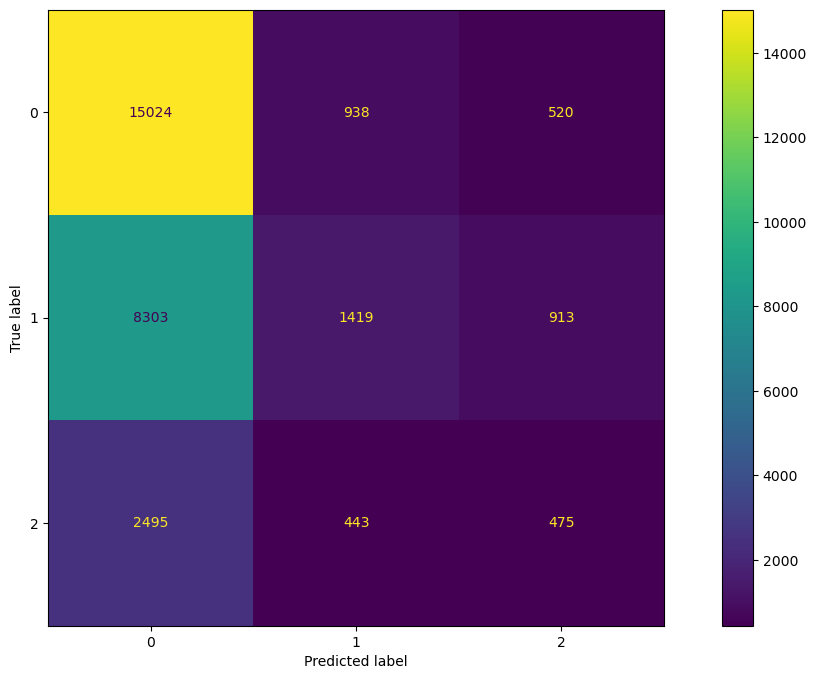

In [214]:
gnb=GaussianNB()
gnb_model=gnb.fit(X_train_new_best,y_train_new)

test_pred_gnb_best=gnb_model.predict(X_test_new_best)
print(metrics.classification_report(y_test_new, test_pred_gnb_best))

print(metrics.ConfusionMatrixDisplay.from_predictions(y_test_new,test_pred_gnb_best))

In [215]:
gnb_best_acc=accuracy_score(y_test_new,test_pred_gnb_best)
gnb_best_recall=recall_score(y_test_new,test_pred_gnb_best,labels=[2],average=None)
gnb_best_f1=f1_score(y_test_new,test_pred_gnb_best,labels=[2],average=None)
gnb_best_precision=precision_score(y_test_new,test_pred_gnb_best,labels=[2],average=None)

## GRADIANT BOOSTING WITH BEST FEATURES

              precision    recall  f1-score   support

           0       0.62      0.84      0.71     16482
           1       0.51      0.38      0.43     10635
           2       0.45      0.03      0.05      3413

    accuracy                           0.59     30530
   macro avg       0.53      0.42      0.40     30530
weighted avg       0.56      0.59      0.54     30530



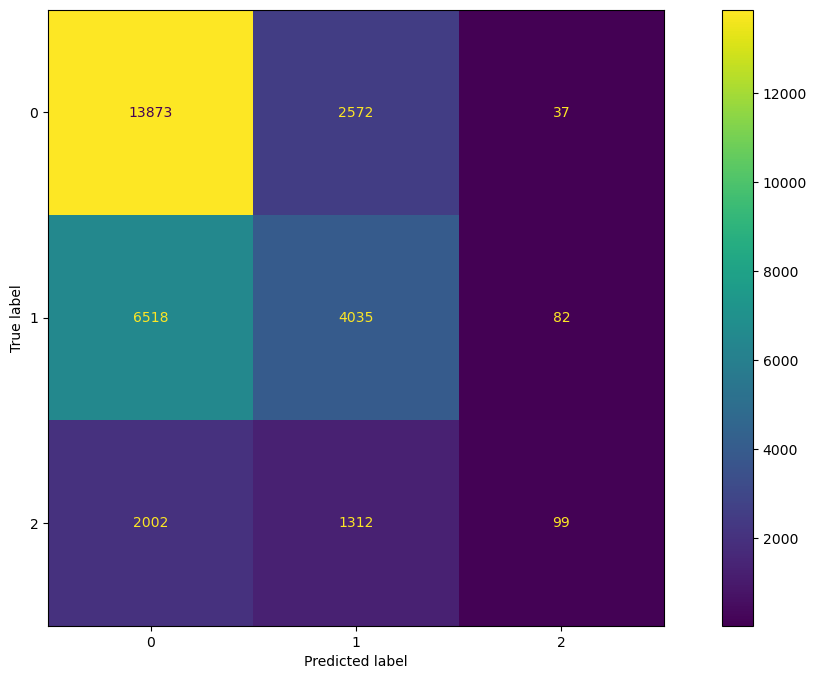

In [216]:
gbr=GradientBoostingClassifier(n_estimators=300,learning_rate=0.1,min_samples_split=30,max_depth=3)

gbr.fit(X_train_new_best,y_train_new)


test_pred_gb_best=gbr.predict(X_test_new_best)
print(metrics.classification_report(y_test_new, test_pred_gb_best))

print(metrics.ConfusionMatrixDisplay.from_predictions(y_test_new,test_pred_gb_best))

In [217]:
gb_best_acc=accuracy_score(y_test_new,test_pred_gb_best)
gb_best_recall=recall_score(y_test_new,test_pred_gb_best,labels=[2],average=None)
gb_best_f1=f1_score(y_test_new,test_pred_gb_best,labels=[2],average=None)
gb_best_precision=precision_score(y_test_new,test_pred_gb_best,labels=[2],average=None)

## XGB MODEL WITH BEST FEATURES

[20:26:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.62      0.83      0.71     16482
           1       0.50      0.39      0.44     10635
           2       0.42      0.03      0.06      3413

    accuracy                           0.59     30530
   macro avg       0.51      0.42      0.40     30530
weighted avg       0.56      0.59      0.54     30530



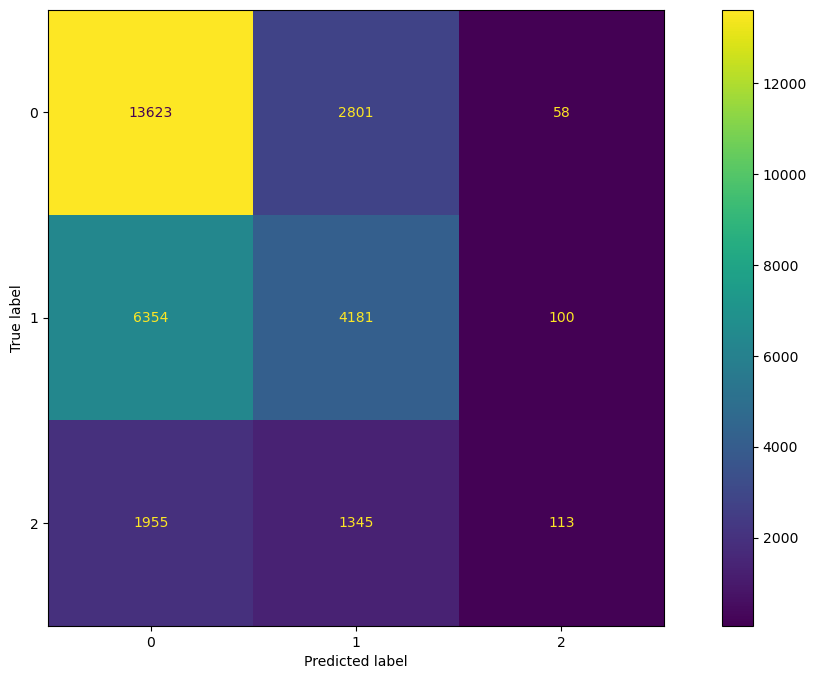

In [218]:
xgb_model = XGBClassifier(learning_rate=0.1, min_samples_split=3, n_estimators=200, random_state=123)

xgb_model.fit(X_train_new_best, y_train_new)

test_pred_xgb_best = xgb_model.predict(X_test_new_best)

print(metrics.classification_report(y_test_new, test_pred_xgb_best))

print(metrics.ConfusionMatrixDisplay.from_predictions(y_test_new,test_pred_xgb_best))

In [219]:
xgb_best_acc=accuracy_score(y_test_new,test_pred_xgb_best)
xgb_best_recall=recall_score(y_test_new,test_pred_xgb_best,labels=[2],average=None)
xgb_best_f1=f1_score(y_test_new,test_pred_xgb_best,labels=[2],average=None)
xgb_best_precision=precision_score(y_test_new,test_pred_xgb_best,labels=[2],average=None)

## STACKING MODEL WITH BEST FEATURES

[20:26:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:28:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:28:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not 

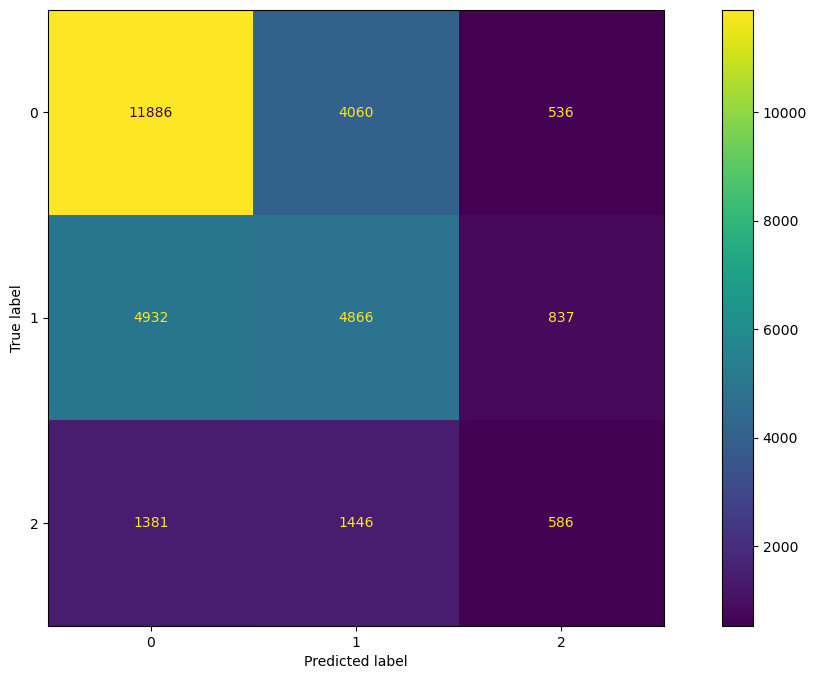

In [220]:
base_classifiers = [
    ('xgb', XGBClassifier(learning_rate=0.1, min_samples_split=3, n_estimators=200, random_state=123)),
    ('gb', GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, random_state=123,min_samples_split=30,max_depth=3))
]


stacking_model = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=GaussianNB()
)

stacking_model.fit(X_train_new_best, y_train_new)

test_pred_stacking_best = stacking_model.predict(X_test_new_best)


print("Classification Report for Stacking Model:")
print(metrics.classification_report(y_test_new, test_pred_stacking_best))


conf_matrix_stacking = metrics.confusion_matrix(y_test_new, test_pred_stacking_best)
conf_matrix_display_stacking = metrics.ConfusionMatrixDisplay(conf_matrix_stacking, display_labels=stacking_model.classes_)
conf_matrix_display_stacking.plot()


In [221]:
stack1_best_acc=accuracy_score(y_test_new,test_pred_stacking_best)
stack1_best_recall=recall_score(y_test_new,test_pred_stacking_best,labels=[2],average=None)
stack1_best_f1=f1_score(y_test_new,test_pred_stacking_best,labels=[2],average=None)
stack1_best_precision=precision_score(y_test_new,test_pred_stacking_best,labels=[2],average=None)

## VOTING CLASSIFIER WITH BEST FEATURES

In [222]:
from sklearn.ensemble import VotingClassifier

[20:33:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Classification Report for Voting Model:
              precision    recall  f1-score   support

           0       0.61      0.85      0.71     16482
           1       0.51      0.36      0.42     10635
           2       0.41      0.03      0.06      3413

    accuracy                           0.59     30530
   macro avg       0.51      0.41      0.40     30530
weighted avg       0.56      0.59      0.54     30530



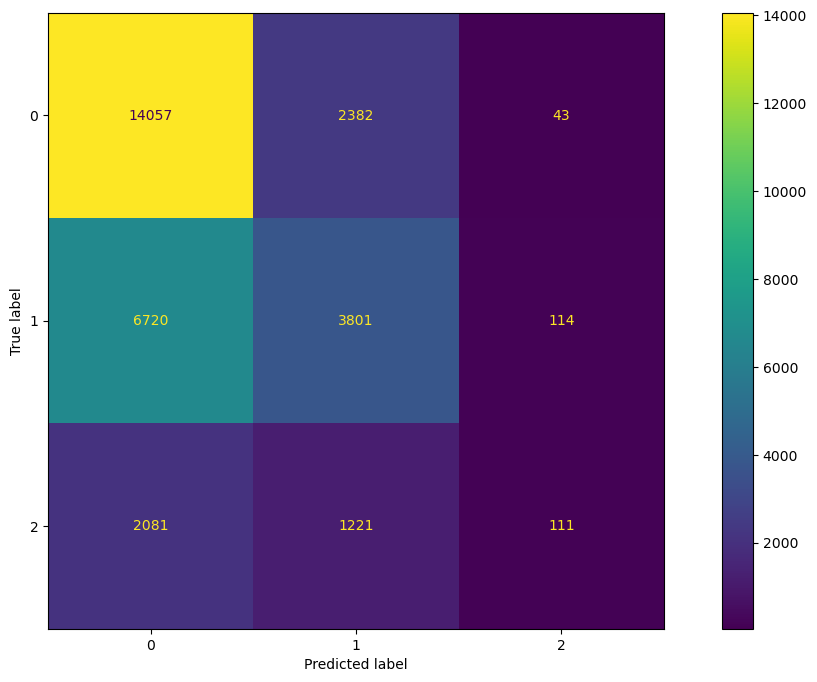

In [223]:
base_classifiers = [
    ('xgb', XGBClassifier(learning_rate=0.1, min_samples_split=3, n_estimators=200, random_state=123)),
    ('gb', GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, random_state=123,min_samples_split=30,max_depth=3)),
    ('nb', GaussianNB())
]

voting_model = VotingClassifier(
    estimators=base_classifiers,
    voting='hard'                                      # Using 'hard' voting for majority rule voting
)

voting_model.fit(X_train_new_best, y_train_new)

test_pred_voting_best = voting_model.predict(X_test_new_best)

print("Classification Report for Voting Model:")
print(metrics.classification_report(y_test_new, test_pred_voting_best))

conf_matrix_voting = metrics.confusion_matrix(y_test_new, test_pred_voting_best)
conf_matrix_display_voting = metrics.ConfusionMatrixDisplay(conf_matrix_voting, display_labels=voting_model.classes_)
conf_matrix_display_voting.plot()

In [224]:
voting_best_acc=accuracy_score(y_test_new,test_pred_voting_best)
voting_best_recall=recall_score(y_test_new,test_pred_voting_best,labels=[2],average=None)
voting_best_f1=f1_score(y_test_new,test_pred_voting_best,labels=[2],average=None)
voting_best_precision=precision_score(y_test_new,test_pred_voting_best,labels=[2],average=None)

OVERALL INFERENCES:

Gaussian Naive Bayes, Gradient Boosting, and XGBoost models exhibit poor performance in correctly identifying positive cases, as reflected in their low recall scores.

The stacking model shows the most promise among the evaluated models, with improved recall compared to individual base models.

Despite combining multiple models, the voting classifier does not demonstrate significant improvement in identifying positive cases compared to individual models.

### TABLE OF METRICS WITH BEST FEATURES,IMPLEMENTED ON BEST MODELS

In [225]:
best_index=['Accuracy', 'Recall','Precision','F1 Score']
best_metric_table=pd.DataFrame({"Gausian NB":[gnb_best_acc,gnb_best_recall,gb_best_precision,gnb_best_f1],
                            "Gradient Boosting":[gb_best_acc,gb_best_recall,gb_best_precision,gb_best_f1],
                            "XGB":[xgb_best_acc,xgb_best_recall,xgb_best_precision,xgb_best_f1],
                            "Stacking Model":[stack1_best_acc,stack1_best_recall,stack1_best_precision,stack1_best_f1],
                           "Voting Classifier":[voting_best_acc,voting_best_recall,voting_best_precision,voting_best_f1]},index=best_index)

round(best_metric_table,2)

Gausian NB       Gradient Boosting  \
Accuracy                0.554143                0.589813   
Recall     [0.13917374743627306]  [0.029006738939349547]   
Precision   [0.4541284403669725]    [0.4541284403669725]   
F1 Score   [0.17853786882165007]  [0.054530432387771964]   

                              XGB         Stacking Model  \
Accuracy                 0.586865               0.567900   
Recall     [0.033108702021681806]  [0.17169645473190742]   
Precision   [0.41697416974169743]   [0.2991322103113834]   
F1 Score   [0.061346362649294245]  [0.21816827997021593]   

               Voting Classifier  
Accuracy                0.588569  
Recall     [0.03252270729563434]  
Precision   [0.4141791044776119]  
F1 Score   [0.06030969845150774]

In [226]:
# sort by recall
best_metric_table.sort_values(by="Recall",axis=1,ascending=False)

Stacking Model             Gausian NB  \
Accuracy                0.567900               0.554143   
Recall     [0.17169645473190742]  [0.13917374743627306]   
Precision   [0.2991322103113834]   [0.4541284403669725]   
F1 Score   [0.21816827997021593]  [0.17853786882165007]   

                              XGB      Voting Classifier  \
Accuracy                 0.586865               0.588569   
Recall     [0.033108702021681806]  [0.03252270729563434]   
Precision   [0.41697416974169743]   [0.4141791044776119]   
F1 Score   [0.061346362649294245]  [0.06030969845150774]   

                Gradient Boosting  
Accuracy                 0.589813  
Recall     [0.029006738939349547]  
Precision    [0.4541284403669725]  
F1 Score   [0.054530432387771964]

In [227]:
# sort by accuracy
best_metric_table.sort_values(by="Accuracy",axis=1,ascending=False)

Gradient Boosting      Voting Classifier  \
Accuracy                 0.589813               0.588569   
Recall     [0.029006738939349547]  [0.03252270729563434]   
Precision    [0.4541284403669725]   [0.4141791044776119]   
F1 Score   [0.054530432387771964]  [0.06030969845150774]   

                              XGB         Stacking Model  \
Accuracy                 0.586865               0.567900   
Recall     [0.033108702021681806]  [0.17169645473190742]   
Precision   [0.41697416974169743]   [0.2991322103113834]   
F1 Score   [0.061346362649294245]  [0.21816827997021593]   

                      Gausian NB  
Accuracy                0.554143  
Recall     [0.13917374743627306]  
Precision   [0.4541284403669725]  
F1 Score   [0.17853786882165007]

INFERENCE:

1. From the table above, we have built models which had produced best results with the cumulative best features from all the models build earlier.
2. Out of the filtered best features, XGB,GB,GNB,Stacking Model,Voting Classifier(best models) were used to build models.

3.Recall: 
       - Recall wise , Stacking(0.1716) is the best result fetching followed by GNB(0.1391)
4.Accuracy:
       - Accuracy wise GNB is the best model (0.58)

Despite building models with best features , the GNB,Stacking models build earlier had produced better results.


## OVERALL INFERENCE:

In the context of predicting patients who get readmitted within 30 days of discharge, a recall of 0.50 for this class (patients who do get readmitted) has specific implications:

Detection Rate: The model correctly identifies 50% of the patients who actually get readmitted within 30 days. This means that half of the readmissions are being correctly predicted by the model.

Missed Readmissions: The model fails to identify the other 50% of the patients who are readmitted. These missed cases are critical as they represent patients who will return to the hospital without the system anticipating it, potentially leading to unpreparedness in resource allocation and patient management.

Clinical Impact: In a healthcare setting, missing 50% of readmissions might have significant implications. Early identification of patients at risk of readmission is crucial for providing timely interventions, follow-up care, and support. A recall of 0.50 suggests that many patients who need such interventions are not being flagged by the model.

Cost-Benefit Analysis: Considering the cost and resource implications of false positives (patients predicted to be readmitted who are not) and false negatives (patients not predicted to be readmitted who are), a recall of 0.50 might not be sufficient. Improving recall could reduce the number of missed readmissions, but it may also increase false positives.


PROCEEDING FURTHER:
 Inorder to improve recall, advanced feature enginerring can be done. By integrating more data sources such as electronic health records (EHR), patient demographics, socioeconomic factors, medication history, type of lab results,etc.these can add more meaning to the data, and we can get better insights and take it forward to model building.